In [17]:
#################################################################
# Set Working Directory
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import pickle

import sys
sys.path.append('/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/')

#from MDPtools import *
from model import MDP_model
from maze_functions import createSamples, opt_maze_trajectory, opt_model_trajectory, fitted_Q, \
    get_maze_transition_reward, policy_accuracy, fitted_Q_policy_accuracy
from testing import cluster_size, next_clusters, training_value_error, purity

In [3]:
# Set Parameters
#N = 170
T_max = 25
max_k = 25
clustering = 'Agglomerative'
n_clusters = None
distance_threshold = 0.5
random_state = 0
pfeatures = 2
actions = [0, 1, 2, 3]
h = -1
cv = 5
th = 0
classification = 'DecisionTreeClassifier'
#classification = 'RandomForestClassifier'
split_classifier_params = {'random_state':0, 'max_depth':2}

In [5]:
# list of maze options to choose from:
mazes = {1: 'maze-v0',
         2: 'maze-sample-3x3-v0',
         3: 'maze-random-3x3-v0',
         4: 'maze-sample-5x5-v0',
         5: 'maze-random-5x5-v0',
         6: 'maze-sample-10x10-v0',
         7: 'maze-random-10x10-v0',
         8: 'maze-sample-100x100-v0',
         9: 'maze-random-100x100-v0',
         10: 'maze-random-10x10-plus-v0', # has portals 
         11: 'maze-random-20x20-plus-v0', # has portals 
         12: 'maze-random-30x30-plus-v0'} # has portals 

In [16]:
# Set Ns we want to investigate
Ns = [20, 30, 70]

Splitting... |#Clusters:2:   0%|          | 0/23 [00:00<?, ?it/s]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].uniqu

Splitting... |#Clusters:7:  22%|██▏       | 5/23 [00:05<00:20,  1.15s/it]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER

Splitting... |#Clusters:12:  43%|████▎     | 10/23 [00:11<00:14,  1.09s/it]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

Optimal # of clusters reached


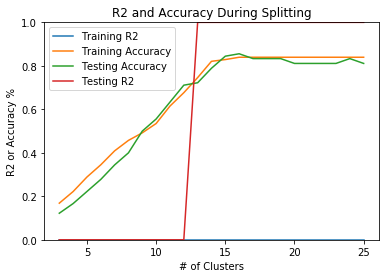

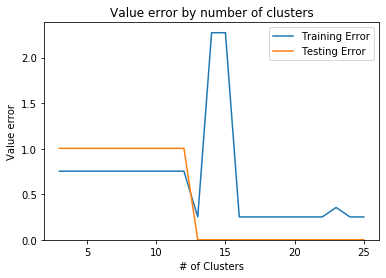

Splitting... |#Clusters:2:   0%|          | 0/23 [00:00<?, ?it/s]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].uniqu

Splitting... |#Clusters:7:  22%|██▏       | 5/23 [00:04<00:17,  1.05it/s]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['CLUSTER'] = test_clusters
Splitting... |#Clusters:12:  43%|████▎     | 10/23 [00:10<00:15,  1.22s/it]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureW

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureW

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

Optimal # of clusters reached


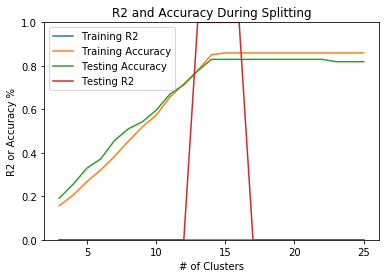

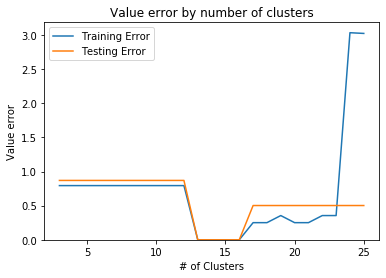

Splitting... |#Clusters:2:   0%|          | 0/23 [00:00<?, ?it/s]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].uniqu

Splitting... |#Clusters:7:  22%|██▏       | 5/23 [00:04<00:16,  1.10it/s]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

1 taking action 3 , but this transition is never seen in the data. Data point: 2 22


/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['CLUSTER'] = test_clusters
Splitting... |#Clusters:18:  70%|██████▉   | 16/23 [00:24<00:13,  1.99s/it]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

 3 taking action 2 , but this transition is never seen in the data. Data point: 2 24


/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

 4 taking action 2 , but this transition is never seen in the data. Data point: 3 24
Optimal # of clusters reached


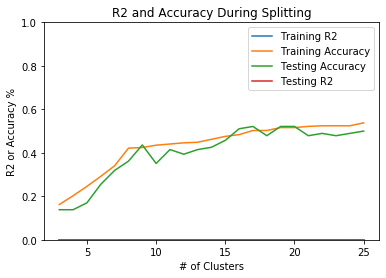

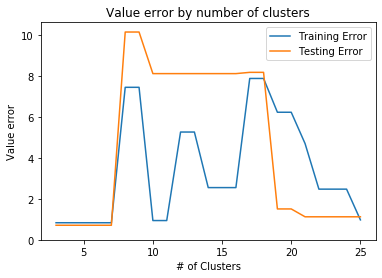

Splitting... |#Clusters:2:   0%|          | 0/23 [00:00<?, ?it/s]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].uniqu

Splitting... |#Clusters:7:  22%|██▏       | 5/23 [00:03<00:13,  1.31it/s]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER

Splitting... |#Clusters:12:  43%|████▎     | 10/23 [00:08<00:11,  1.11it/s]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/t

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/t

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/t

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/t

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/t

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/t

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureW

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureW

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureW

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureW

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureW

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureW

Optimal # of clusters reached


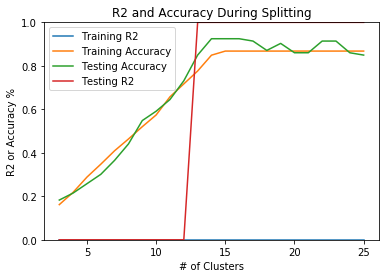

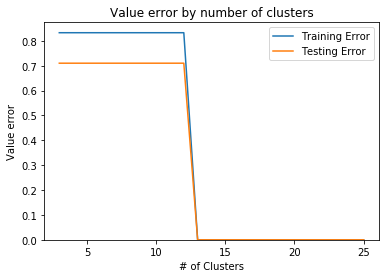

Splitting... |#Clusters:2:   0%|          | 0/23 [00:00<?, ?it/s]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].uniqu

Splitting... |#Clusters:7:  22%|██▏       | 5/23 [00:03<00:13,  1.34it/s]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER

Splitting... |#Clusters:12:  43%|████▎     | 10/23 [00:08<00:11,  1.14it/s]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

Optimal # of clusters reached


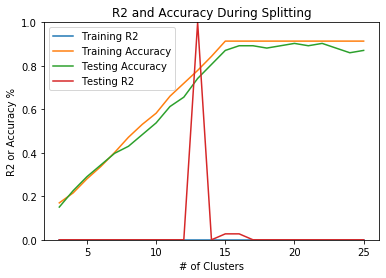

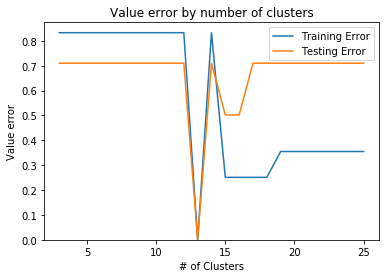

Splitting... |#Clusters:2:   0%|          | 0/19 [00:00<?, ?it/s]

best clusters: 21


Splitting... |#Clusters:12:  53%|█████▎    | 10/19 [00:06<00:05,  1.56it/s]

Splitting... |#Clusters:13:  58%|█████▊    | 11/19 [00:06<00:05,  1.52it/s]

Splitting... |#Clusters:15:  68%|██████▊   | 13/19 [00:08<00:04,  1.47it/s]

Splitting... |#Clusters:16:  74%|███████▎  | 14/19 [00:08<00:03,  1.41it/s]

Splitting... |#Clusters:17:  79%|███████▉  | 15/19 [00:09<00:02,  1.43it/s]

Splitting... |#Clusters:18:  84%|████████▍ | 16/19 [00:10<00:02,  1.34it/s]

Splitting... |#Clusters:19:  89%|████████▉ | 17/19 [00:11<00:01,  1.24it/s]

Splitting... |#Clusters:20:  95%|█████████▍| 18/19 [00:12<00:00,  1.15it/s]

Splitting... |#Clusters:20:  95%|█████████▍| 18/19 [00:13<00:00,  1.33it/s]

Optimal # of clusters reached


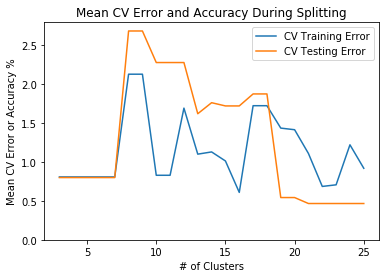

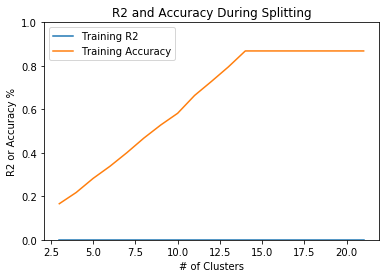

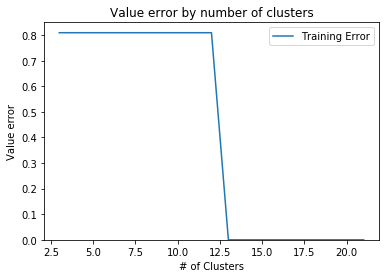

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


     ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  \
0     0     0   0.974773  -0.032015      2 -0.004           0   
1     0     1   1.047728  -0.248039      2 -0.004           1   
2     0     2   2.961352  -0.648084      0 -0.004           2   
3     0     3   2.359208  -0.829174      2 -0.004           2   
4     0     4   2.945540  -0.787330      1 -0.004           2   
..   ..   ...        ...        ...    ...    ...         ...   
459  19    16   4.732461  -2.157572      1 -0.004          14   
460  19    17   4.579180  -3.252723      3 -0.004          19   
461  19    18   4.352719  -3.604445      3 -0.004          19   
462  19    19   4.902953  -3.503282      1 -0.004          19   
463  19    20   4.243482  -4.958639   None  1.000          24   

                                          x_t2  \
0    [1.2955962964804075, -0.5826437382507882]   
1    [2.106903213732781, -0.24399264829618827]   
2     [2.4964507030040135, -0.976697639777133]   
3    [2.39532886627

  0%|          | 0/100 [00:00<?, ?it/s]

[-0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792  0.976
  1.      -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792
  0.976    1.      -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.0079

  1%|          | 1/100 [00:00<00:13,  7.32it/s]

[array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([0.00799363]) array([0.00799363])
 array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([0.00752323]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([0.14251706]) array([-0.0117616])
 array([-0.0117616]) array([0.79820134]) array([0.64439309])
 array([1.01199363]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([-0.0117616]) array([0.00799363])
 array([0.00799363]) array([0.12323222]) array([0.08466256])
 array([-0.0117616]) array([-0.0117616]) array([0.02774886])
 array([-0.0117616]) array([0.00799363]) array([0.4129751])
 array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) arra

[array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([-0.0117616]) array([0.00752323])
 array([0.00752323]) array([0.00752323]) array([0.00752323])
 array([0.00752323]) array([0.00752323]) array([0.00799363])
 array([0.00799363]) array([0.00799363]) array([0.00799363])
 array([0.00799363]) array([0.00799363]) array([0.02680806])
 array([0.02680806]) array([0.02680806]) array([0.02680806])
 array([0.02727846]) array([0.02774886]) array([0.02774886])
 array([0.02774886]) array([0.0460929]) array([0.0475041])
 array([0.06537773]) array([0.06537773]) array([0.06725933])
 array([0.08466256]) array([0.10441779]) array([0.12323222])
 array([0.14251706]) array([0.16227229]) array([0.18108672])
 array([0.20037155]) array([0.39321987]) array([0.4125047])
 array([0.4129751]) array([0.43178954]) array([0.45107437])
 array([0.45107437]) array([0.4703592]) array([0.50939926])
 array([0.60629382]) array([0

  2%|▏         | 2/100 [00:08<04:28,  2.74s/it]

[array([-0.01552637]) array([-0.01552637]) array([-0.01552637])
 array([-0.01552637]) array([-0.01552637]) array([-0.01552637])
 array([-0.01552637]) array([-0.01552637]) array([-0.01552637])
 array([-0.00341248]) array([0.00917776]) array([0.04236953])
 array([0.04765206]) array([-0.01475196]) array([-0.01552637])
 array([0.06574913]) array([0.00149822]) array([-0.01401444])
 array([0.01093242]) array([0.81691141]) array([0.06989772])
 array([0.70454913]) array([0.88559363]) array([0.65399192])
 array([1.09208702]) array([-0.01552637]) array([-0.01552637])
 array([-0.01552637]) array([-0.01552637]) array([-0.0113409])
 array([-0.01552637]) array([-0.01552637]) array([-0.00158708])
 array([-0.00623351]) array([0.00453438]) array([0.01273711])
 array([0.04162278]) array([0.02760054]) array([0.05884636])
 array([0.04724642]) array([0.03085182]) array([0.24983593])
 array([0.06502083]) array([0.01348616]) array([0.51055669])
 array([0.03468006]) array([-0.01174654]) array([-0.0147704])
 a

[array([-0.01552637]) array([-0.01552637]) array([-0.01552637])
 array([-0.01552637]) array([-0.01552637]) array([-0.0147704])
 array([-0.0147704]) array([-0.0147704]) array([-0.01476579])
 array([-0.01475196]) array([-0.01439242]) array([-0.01437398])
 array([-0.01401444]) array([-0.01401444]) array([-0.01400061])
 array([-0.01363645]) array([-0.01363645]) array([-0.01359036])
 array([-0.01325847]) array([-0.0132385]) array([-0.01323158])
 array([-0.01284438]) array([-0.01250251]) array([-0.01250251])
 array([-0.01246102]) array([-0.0121153]) array([-0.0121153])
 array([-0.01174654]) array([-0.0113409]) array([-0.01126714])
 array([-0.00947864]) array([-0.00940873]) array([-0.00903535])
 array([-0.0083447]) array([-0.00829322]) array([-0.008284])
 array([-0.0068174]) array([-0.00623351]) array([-0.0060768])
 array([-0.0054591]) array([-0.0050719]) array([-0.00491519])
 array([-0.00379968]) array([-0.00341248]) array([-0.00333411])
 array([-0.00313589]) array([-0.00313589]) array([-0.0

  3%|▎         | 3/100 [00:18<07:37,  4.72s/it]

[array([-0.01921584]) array([-0.01884542]) array([-0.01021438])
 array([-0.01731855]) array([0.0002442]) array([-0.00992563])
 array([-0.01921311]) array([-0.01557594]) array([-0.00117402])
 array([0.07134086]) array([0.06541004]) array([0.07485175])
 array([0.03936682]) array([0.03781973]) array([0.09727167])
 array([0.10723073]) array([0.11013122]) array([0.09651318])
 array([0.50574446]) array([0.85058976]) array([0.66107355])
 array([0.67136281]) array([0.77609569]) array([0.67466085])
 array([1.1773985]) array([-0.01888156]) array([-0.01921584])
 array([-0.00618132]) array([-0.00143156]) array([0.0084728])
 array([0.01396648]) array([-0.00370142]) array([0.01134913])
 array([0.01893243]) array([0.11032806]) array([0.06063557])
 array([0.07888486]) array([0.09757675]) array([0.10446702])
 array([0.03398192]) array([0.04736145]) array([0.28068072])
 array([0.06625891]) array([0.1176579]) array([0.46625383])
 array([0.04201827]) array([0.0329657]) array([0.05560547])
 array([0.771948

[array([-0.01921584]) array([-0.01921584]) array([-0.01921584])
 array([-0.01921506]) array([-0.01921424]) array([-0.01921424])
 array([-0.01921393]) array([-0.01921311]) array([-0.01921212])
 array([-0.01921099]) array([-0.01920951]) array([-0.01914898])
 array([-0.01901527]) array([-0.01898704]) array([-0.01897552])
 array([-0.01893775]) array([-0.01888156]) array([-0.01884542])
 array([-0.01872413]) array([-0.01868099]) array([-0.0186607])
 array([-0.01864304]) array([-0.01864304]) array([-0.01864304])
 array([-0.01863275]) array([-0.01860509]) array([-0.01850933])
 array([-0.01847499]) array([-0.01806297]) array([-0.01785324])
 array([-0.01772674]) array([-0.01731855]) array([-0.01722354])
 array([-0.01714328]) array([-0.01623764]) array([-0.01623764])
 array([-0.01563719]) array([-0.01557594]) array([-0.01556997])
 array([-0.01540663]) array([-0.01410627]) array([-0.01404479])
 array([-0.01325944]) array([-0.01319836]) array([-0.01319836])
 array([-0.01230935]) array([-0.01210104]

  4%|▍         | 4/100 [00:27<09:36,  6.01s/it]

[array([-0.01251083]) array([-0.01543396]) array([0.05728598])
 array([-0.01268211]) array([0.21799738]) array([0.03250509])
 array([-0.01191519]) array([0.04912167]) array([0.07845132])
 array([0.07941104]) array([0.0944939]) array([0.1737943])
 array([0.27632134]) array([0.1809093]) array([0.217153])
 array([0.10309877]) array([0.32782588]) array([0.62726127])
 array([0.63574463]) array([0.78511817]) array([0.7065337])
 array([0.80168928]) array([0.76101941]) array([0.69029819])
 array([1.07271757]) array([-0.02164914]) array([-0.01190256])
 array([0.05381347]) array([0.07329028]) array([0.06919864])
 array([0.32080475]) array([0.05037885]) array([0.07285357])
 array([0.05691119]) array([0.11035535]) array([0.0966658])
 array([0.16696496]) array([0.38786265]) array([0.39571327])
 array([0.10593886]) array([0.14693935]) array([0.26228197])
 array([0.13687029]) array([0.38875387]) array([0.39700427])
 array([0.39620447]) array([0.09828377]) array([0.6821257])
 array([0.82410747]) array

[array([-0.02278255]) array([-0.02278125]) array([-0.02277974])
 array([-0.0227783]) array([-0.02277727]) array([-0.02277258])
 array([-0.02276612]) array([-0.02276546]) array([-0.022702])
 array([-0.02269953]) array([-0.02267966]) array([-0.02259115])
 array([-0.0224633]) array([-0.02246248]) array([-0.0224613])
 array([-0.02245895]) array([-0.02245456]) array([-0.02240089])
 array([-0.02214582]) array([-0.02183775]) array([-0.02165256])
 array([-0.02164914]) array([-0.02136794]) array([-0.0208067])
 array([-0.02073846]) array([-0.02063731]) array([-0.02053978])
 array([-0.02034869]) array([-0.02034299]) array([-0.0202915])
 array([-0.02024714]) array([-0.02005091]) array([-0.01992013])
 array([-0.01974458]) array([-0.01937261]) array([-0.01934629])
 array([-0.01928687]) array([-0.01924045]) array([-0.01919492])
 array([-0.01907389]) array([-0.01861098]) array([-0.01850284])
 array([-0.01808558]) array([-0.01793253]) array([-0.01687685])
 array([-0.01671854]) array([-0.01669779]) arra

  5%|▌         | 5/100 [00:35<10:45,  6.80s/it]

[array([0.06314122]) array([0.06169319]) array([0.00443259])
 array([0.06178531]) array([0.20080357]) array([0.06089911])
 array([0.03665603]) array([0.09416422]) array([0.12587328])
 array([0.09004963]) array([0.26425755]) array([0.32383964])
 array([0.22024082]) array([0.26990886]) array([0.51791059])
 array([0.32190069]) array([0.54045368]) array([0.70121029])
 array([0.65937255]) array([0.75467814]) array([0.71729983])
 array([0.77584641]) array([0.75238069]) array([0.61180128])
 array([1.168883]) array([-0.01435361]) array([0.07093728])
 array([0.09959941]) array([0.14391134]) array([0.17953506])
 array([0.28701273]) array([0.12460159]) array([0.15135605])
 array([0.09739696]) array([0.15860247]) array([0.29423902])
 array([0.28922559]) array([0.27526826]) array([0.27108786])
 array([0.28700443]) array([0.24555045]) array([0.25174423])
 array([0.30181421]) array([0.27448091]) array([0.41876729])
 array([0.51866017]) array([0.56485535]) array([0.73413592])
 array([0.7625737]) array

[array([-0.02292358]) array([-0.02277508]) array([-0.02170993])
 array([-0.02157505]) array([-0.02127868]) array([-0.02046143])
 array([-0.02030044]) array([-0.02029873]) array([-0.01987127])
 array([-0.01977898]) array([-0.01945819]) array([-0.01928885])
 array([-0.01870149]) array([-0.01866101]) array([-0.01860438])
 array([-0.01846896]) array([-0.01739734]) array([-0.01726335])
 array([-0.01556222]) array([-0.01524888]) array([-0.01470886])
 array([-0.01460753]) array([-0.01435361]) array([-0.00876652])
 array([-0.0039386]) array([-0.00329288]) array([-0.00318216])
 array([-0.00312981]) array([-0.00273944]) array([-0.00254674])
 array([-0.00249681]) array([9.03161987e-06]) array([0.00370846])
 array([0.0043395]) array([0.00443259]) array([0.006849])
 array([0.00716342]) array([0.01040316]) array([0.01201834])
 array([0.01205852]) array([0.01357807]) array([0.01439517])
 array([0.01464974]) array([0.01485373]) array([0.0152028])
 array([0.01722178]) array([0.02018316]) array([0.02025

  6%|▌         | 6/100 [00:45<11:47,  7.52s/it]

[array([0.17194911]) array([0.10773474]) array([0.08663045])
 array([0.11841585]) array([0.22886263]) array([0.12129913])
 array([0.10739123]) array([0.18090087]) array([0.1527882])
 array([0.20407443]) array([0.26320352]) array([0.30149801])
 array([0.579267]) array([0.31413507]) array([0.62233764])
 array([0.57869372]) array([0.60020974]) array([0.6890739])
 array([0.6991465]) array([0.74867553]) array([0.72583278])
 array([0.73218456]) array([0.72935529]) array([0.543241])
 array([1.13474105]) array([0.0273282]) array([0.11546346])
 array([0.15486188]) array([0.15609159]) array([0.21318405])
 array([0.28703766]) array([0.1173799]) array([0.26381335])
 array([0.20694938]) array([0.27112763]) array([0.27658775])
 array([0.30689276]) array([0.60521741]) array([0.51535645])
 array([0.51200351]) array([0.27649614]) array([0.32454896])
 array([0.52745323]) array([0.33047031]) array([0.43008602])
 array([0.64775445]) array([0.64703205]) array([0.72542332])
 array([0.73420326]) array([0.730

[array([0.00371305]) array([0.0045782]) array([0.00619184])
 array([0.00874955]) array([0.00944109]) array([0.01286446])
 array([0.01483281]) array([0.01734652]) array([0.01973314])
 array([0.02167394]) array([0.02172057]) array([0.02400536])
 array([0.02602652]) array([0.02715009]) array([0.0273282])
 array([0.02872846]) array([0.03378183]) array([0.03470061])
 array([0.03587998]) array([0.03681453]) array([0.03732648])
 array([0.03776466]) array([0.03780088]) array([0.03997737])
 array([0.04030573]) array([0.04048616]) array([0.04206912])
 array([0.04327724]) array([0.04452903]) array([0.04485078])
 array([0.04603403]) array([0.04734161]) array([0.04861929])
 array([0.05141772]) array([0.05208796]) array([0.05234058])
 array([0.05352076]) array([0.05466028]) array([0.05493934])
 array([0.05525002]) array([0.05612704]) array([0.05692375])
 array([0.05709998]) array([0.05899013]) array([0.06050789])
 array([0.0613143]) array([0.0623603]) array([0.06289497])
 array([0.06633989]) array([

  7%|▋         | 7/100 [00:54<12:26,  8.03s/it]

[array([0.18660464]) array([0.16941107]) array([0.20346494])
 array([0.16870289]) array([0.30453018]) array([0.19389971])
 array([0.15195452]) array([0.22878661]) array([0.29764612])
 array([0.27384757]) array([0.31509903]) array([0.51507971])
 array([0.6333756]) array([0.37361278]) array([0.66859256])
 array([0.64016236]) array([0.65108387]) array([0.69778801])
 array([0.68937473]) array([0.70838946]) array([0.70091589])
 array([0.70985738]) array([0.71829525]) array([0.55284331])
 array([1.15344675]) array([0.12803223]) array([0.21955644])
 array([0.22440841]) array([0.18838654]) array([0.30791577])
 array([0.3406766]) array([0.26759676]) array([0.30910845])
 array([0.26525864]) array([0.33272976]) array([0.30553502])
 array([0.48750465]) array([0.63787119]) array([0.55599136])
 array([0.60280311]) array([0.54324705]) array([0.52219471])
 array([0.61865303]) array([0.52472162]) array([0.53206373])
 array([0.66569983]) array([0.67614241]) array([0.71075416])
 array([0.72632259]) array

[array([0.04285742]) array([0.04341013]) array([0.04792455])
 array([0.05416259]) array([0.05612739]) array([0.0660083])
 array([0.07046749]) array([0.07883873]) array([0.08228766])
 array([0.08326709]) array([0.08375304]) array([0.08486161])
 array([0.08612764]) array([0.08637074]) array([0.08842426])
 array([0.08926345]) array([0.09017616]) array([0.09072377])
 array([0.09080731]) array([0.09111427]) array([0.09226816])
 array([0.09261267]) array([0.09270622]) array([0.09274606])
 array([0.09396259]) array([0.09743284]) array([0.10282647])
 array([0.10291971]) array([0.1059891]) array([0.10690421])
 array([0.10708109]) array([0.10970215]) array([0.11010114])
 array([0.11246402]) array([0.11473493]) array([0.11603719])
 array([0.11707721]) array([0.11843276]) array([0.11959584])
 array([0.12268437]) array([0.12631181]) array([0.12794407])
 array([0.12803223]) array([0.12953164]) array([0.12989899])
 array([0.13009085]) array([0.13614703]) array([0.13889848])
 array([0.13989964]) array

  8%|▊         | 8/100 [01:03<12:47,  8.34s/it]

[array([0.21236181]) array([0.23473211]) array([0.25674722])
 array([0.22926466]) array([0.35458278]) array([0.25253234])
 array([0.18223864]) array([0.27804532]) array([0.30241895])
 array([0.30315482]) array([0.49349324]) array([0.58500096])
 array([0.64764602]) array([0.42252957]) array([0.66981262])
 array([0.63521369]) array([0.65986223]) array([0.68432763])
 array([0.6794255]) array([0.68938722]) array([0.68227589])
 array([0.69130119]) array([0.6749909]) array([0.61025034])
 array([1.32079448]) array([0.1646772]) array([0.24050057])
 array([0.28906967]) array([0.28013328]) array([0.33822439])
 array([0.41304527]) array([0.27536049]) array([0.3703962])
 array([0.28840141]) array([0.3812428]) array([0.52975589])
 array([0.58646362]) array([0.6678492]) array([0.6076744])
 array([0.64142224]) array([0.61067094]) array([0.578983])
 array([0.63497869]) array([0.61286705]) array([0.59635134])
 array([0.65742679]) array([0.67532139]) array([0.69128483])
 array([0.68984541]) array([0.696

[array([0.10552812]) array([0.11657934]) array([0.12410209])
 array([0.12906712]) array([0.14357891]) array([0.14582496])
 array([0.14970942]) array([0.15104908]) array([0.1524326])
 array([0.15300871]) array([0.15301373]) array([0.1566131])
 array([0.15726158]) array([0.15767656]) array([0.15785644])
 array([0.15882073]) array([0.16248847]) array([0.16289181])
 array([0.1633299]) array([0.16346758]) array([0.1646772])
 array([0.16587091]) array([0.16630533]) array([0.16706599])
 array([0.16765324]) array([0.16779061]) array([0.16943349])
 array([0.17080087]) array([0.17265605]) array([0.17271637])
 array([0.17355197]) array([0.17369]) array([0.17375297])
 array([0.1753753]) array([0.1767653]) array([0.17800839])
 array([0.17801053]) array([0.17805012]) array([0.17916982])
 array([0.17917886]) array([0.18031296]) array([0.18067327])
 array([0.18113668]) array([0.18223864]) array([0.18284939])
 array([0.18302065]) array([0.18303313]) array([0.18436176])
 array([0.18557868]) array([0.189

  9%|▉         | 9/100 [01:12<12:45,  8.41s/it]

[array([0.26431837]) array([0.28942166]) array([0.27743191])
 array([0.27906229]) array([0.37465961]) array([0.31320195])
 array([0.25555573]) array([0.31617754]) array([0.33721602])
 array([0.44221836]) array([0.58276281]) array([0.59389617])
 array([0.64740198]) array([0.4104175]) array([0.65896396])
 array([0.64799311]) array([0.65191551]) array([0.66016154])
 array([0.65723617]) array([0.65837532]) array([0.66455707])
 array([0.66152784]) array([0.66062844]) array([0.61859532])
 array([1.41601988]) array([0.19580992]) array([0.27582026])
 array([0.34481992]) array([0.30700423]) array([0.39054203])
 array([0.41034069]) array([0.30794005]) array([0.44375361])
 array([0.4129579]) array([0.47906676]) array([0.57365193])
 array([0.6161828]) array([0.65052068]) array([0.62844698])
 array([0.64632523]) array([0.61498293]) array([0.61403934])
 array([0.64015179]) array([0.61697393]) array([0.63047955])
 array([0.66016772]) array([0.66249183]) array([0.66715151])
 array([0.67154494]) array(

[array([0.17632282]) array([0.17756775]) array([0.17978068])
 array([0.18090641]) array([0.18546069]) array([0.18824542])
 array([0.18991723]) array([0.19075094]) array([0.1915209])
 array([0.19217713]) array([0.19409499]) array([0.19479504])
 array([0.1954177]) array([0.19580992]) array([0.19626544])
 array([0.19707433]) array([0.19709625]) array([0.19779629])
 array([0.19845298]) array([0.20122324]) array([0.20357098])
 array([0.20371318]) array([0.20772046]) array([0.21267085])
 array([0.21379159]) array([0.21668128]) array([0.21745038])
 array([0.21952953]) array([0.21998147]) array([0.22036757])
 array([0.22039134]) array([0.22085608]) array([0.22092915])
 array([0.22155795]) array([0.221809]) array([0.22383579])
 array([0.22450281]) array([0.22526803]) array([0.2273008])
 array([0.22938075]) array([0.22987912]) array([0.23049108])
 array([0.23091174]) array([0.23135102]) array([0.23192525])
 array([0.23200663]) array([0.2320763]) array([0.23336473])
 array([0.23508997]) array([0.

 10%|█         | 10/100 [01:21<12:52,  8.59s/it]

[array([0.31546371]) array([0.31788998]) array([0.31929608])
 array([0.30485421]) array([0.42502043]) array([0.38624102])
 array([0.30750183]) array([0.36573431]) array([0.43595632])
 array([0.50153831]) array([0.6016484]) array([0.61971697])
 array([0.63469887]) array([0.47326508]) array([0.64398509])
 array([0.63679901]) array([0.64110428]) array([0.64257642])
 array([0.64176308]) array([0.64951428]) array([0.64457112])
 array([0.64393096]) array([0.64677907]) array([0.64356287])
 array([1.44117508]) array([0.25370315]) array([0.32149335])
 array([0.4171982]) array([0.36885434]) array([0.45670066])
 array([0.46049413]) array([0.44274482]) array([0.50375259])
 array([0.46495776]) array([0.53392576]) array([0.60561381])
 array([0.62144504]) array([0.63322594]) array([0.62307542])
 array([0.63489456]) array([0.62442781]) array([0.62145559])
 array([0.63094898]) array([0.62725178]) array([0.61816842])
 array([0.6361716]) array([0.64579023]) array([0.64577897])
 array([0.64276625]) array(

[array([0.23035284]) array([0.23109035]) array([0.23233894])
 array([0.23315212]) array([0.23316796]) array([0.23928781])
 array([0.24066667]) array([0.24313047]) array([0.24319574])
 array([0.24451774]) array([0.24882223]) array([0.25086189])
 array([0.25167817]) array([0.25370315]) array([0.2537556])
 array([0.25472173]) array([0.2548636]) array([0.25525073])
 array([0.25549505]) array([0.25610898]) array([0.25718689])
 array([0.25748682]) array([0.25824995]) array([0.25843444])
 array([0.25847411]) array([0.25926504]) array([0.25935041])
 array([0.26056349]) array([0.26087641]) array([0.26139826])
 array([0.26190028]) array([0.26238622]) array([0.26244021])
 array([0.26315495]) array([0.26493429]) array([0.26553195])
 array([0.26582634]) array([0.26614878]) array([0.26768913])
 array([0.26820878]) array([0.27106698]) array([0.27175085])
 array([0.27462331]) array([0.2749193]) array([0.27575539])
 array([0.27633616]) array([0.27966209]) array([0.28131365])
 array([0.28227135]) array(

 11%|█         | 11/100 [01:30<13:01,  8.78s/it]

[array([0.40573275]) array([0.37547095]) array([0.36393388])
 array([0.3598301]) array([0.47222471]) array([0.39609989])
 array([0.3414622]) array([0.42309189]) array([0.51461002])
 array([0.57389106]) array([0.61786584]) array([0.61164113])
 array([0.6203951]) array([0.51544348]) array([0.6211917])
 array([0.62309811]) array([0.62018555]) array([0.62634823])
 array([0.62534131]) array([0.62914398]) array([0.62732104])
 array([0.6274251]) array([0.64060323]) array([0.63693729])
 array([1.42221235]) array([0.30979715]) array([0.37804289])
 array([0.41554692]) array([0.42790292]) array([0.50994065])
 array([0.50633602]) array([0.51096087]) array([0.55281202])
 array([0.5415484]) array([0.5836658]) array([0.60736984])
 array([0.61844076]) array([0.62334463]) array([0.61370398])
 array([0.62257598]) array([0.62853548]) array([0.62884146])
 array([0.61678081]) array([0.6254016]) array([0.60793675])
 array([0.62681575]) array([0.62299096]) array([0.6273199])
 array([0.63241456]) array([0.627

[array([0.25429693]) array([0.26438197]) array([0.26532564])
 array([0.26800199]) array([0.2812158]) array([0.28292096])
 array([0.28331773]) array([0.28468295]) array([0.28553753])
 array([0.28601141]) array([0.28737831]) array([0.28771019])
 array([0.28888213]) array([0.29160188]) array([0.29275193])
 array([0.29430065]) array([0.2958717]) array([0.2967514])
 array([0.29684233]) array([0.30109798]) array([0.30210636])
 array([0.30224856]) array([0.3030627]) array([0.30435161])
 array([0.30491248]) array([0.30497823]) array([0.30575889])
 array([0.30742133]) array([0.30770134]) array([0.30851394])
 array([0.30979715]) array([0.31148779]) array([0.31427095])
 array([0.31462516]) array([0.3186033]) array([0.32097457])
 array([0.32165114]) array([0.3268557]) array([0.32756562])
 array([0.32771253]) array([0.32875433]) array([0.32983703])
 array([0.33216434]) array([0.33385166]) array([0.33392997])
 array([0.3363601]) array([0.33762095]) array([0.34025179])
 array([0.34046328]) array([0.3

 12%|█▏        | 12/100 [01:40<13:18,  9.08s/it]

[array([0.38097454]) array([0.39920735]) array([0.40679985])
 array([0.41678427]) array([0.50292016]) array([0.44595632])
 array([0.41121825]) array([0.48451445]) array([0.55259271])
 array([0.58378727]) array([0.60391465]) array([0.60892404])
 array([0.6052378]) array([0.54983682]) array([0.60927771])
 array([0.60810901]) array([0.60764931]) array([0.60922538])
 array([0.60961365]) array([0.63145922]) array([0.61072165])
 array([0.62346194]) array([0.64516848]) array([0.63111524])
 array([1.46567149]) array([0.35415571]) array([0.41198194])
 array([0.46912815]) array([0.50195205]) array([0.53946749])
 array([0.52519722]) array([0.54731518]) array([0.5793366])
 array([0.56113649]) array([0.60701328]) array([0.60660131])
 array([0.61751474]) array([0.60727682]) array([0.60169479])
 array([0.60727158]) array([0.60840293]) array([0.61578234])
 array([0.6024196]) array([0.61585992]) array([0.61157375])
 array([0.60613068]) array([0.60892753]) array([0.61082422])
 array([0.61221077]) array(

[array([0.2928883]) array([0.30112157]) array([0.31237685])
 array([0.3151369]) array([0.32105868]) array([0.32600319])
 array([0.333605]) array([0.33697837]) array([0.33726929])
 array([0.33925811]) array([0.34424085]) array([0.34671842])
 array([0.34728054]) array([0.34750341]) array([0.3479166])
 array([0.34887674]) array([0.35046582]) array([0.35083707])
 array([0.35098224]) array([0.35228841]) array([0.35415571])
 array([0.35479577]) array([0.35480074]) array([0.3558542])
 array([0.35770318]) array([0.35791069]) array([0.35796291])
 array([0.35815127]) array([0.35854944]) array([0.35916627])
 array([0.35925448]) array([0.35929811]) array([0.359982])
 array([0.36330664]) array([0.36341173]) array([0.36398422])
 array([0.3645336]) array([0.36631627]) array([0.36728283])
 array([0.36747765]) array([0.36927874]) array([0.36940106])
 array([0.37285566]) array([0.37595985]) array([0.37778127])
 array([0.37805075]) array([0.37930352]) array([0.37963291])
 array([0.38037856]) array([0.380

 13%|█▎        | 13/100 [01:50<13:37,  9.40s/it]

[array([0.44166633]) array([0.4493955]) array([0.43674308])
 array([0.47154936]) array([0.541597]) array([0.47580662])
 array([0.46817014]) array([0.52967651]) array([0.58049788])
 array([0.58385545]) array([0.6004969]) array([0.59958766])
 array([0.59344621]) array([0.57004486]) array([0.59178146])
 array([0.59078035]) array([0.59222704]) array([0.59587364])
 array([0.60036791]) array([0.63409076]) array([0.60512638])
 array([0.62822902]) array([0.64765061]) array([0.65296974])
 array([1.49750406]) array([0.39229761]) array([0.43173348])
 array([0.49921921]) array([0.5416837]) array([0.56841413])
 array([0.54765721]) array([0.57408128]) array([0.57882116])
 array([0.57618905]) array([0.58998023]) array([0.59438404])
 array([0.60129455]) array([0.59622201]) array([0.60036672])
 array([0.59488529]) array([0.59476985]) array([0.60519125])
 array([0.58975613]) array([0.60461459]) array([0.617918])
 array([0.59330488]) array([0.593388]) array([0.59117981])
 array([0.61401454]) array([0.619

[array([0.35755919]) array([0.3601167]) array([0.36128044])
 array([0.36259166]) array([0.36814588]) array([0.36881365])
 array([0.36927943]) array([0.36966333]) array([0.37039809])
 array([0.37148031]) array([0.37234351]) array([0.37257587])
 array([0.37503101]) array([0.37579611]) array([0.37583409])
 array([0.37713568]) array([0.37927168]) array([0.37951501])
 array([0.38050007]) array([0.38764861]) array([0.39014638])
 array([0.39082274]) array([0.39229761]) array([0.39333018])
 array([0.39357579]) array([0.39366903]) array([0.3939761])
 array([0.3941275]) array([0.39598889]) array([0.39643687])
 array([0.3975048]) array([0.39784311]) array([0.39854477])
 array([0.40032107]) array([0.40226111]) array([0.40306874])
 array([0.40327987]) array([0.40372659]) array([0.40390601])
 array([0.40540727]) array([0.40725016]) array([0.40853022])
 array([0.4094905]) array([0.40972052]) array([0.40977008])
 array([0.41328425]) array([0.41411568]) array([0.41684036])
 array([0.41748712]) array([0

 14%|█▍        | 14/100 [01:59<13:27,  9.39s/it]

[array([0.48421967]) array([0.4936637]) array([0.48967172])
 array([0.5134413]) array([0.55239376]) array([0.52386139])
 array([0.51292625]) array([0.55340075]) array([0.56738574])
 array([0.57845358]) array([0.58357328]) array([0.58744322])
 array([0.58387263]) array([0.57008724]) array([0.57783446])
 array([0.58257164]) array([0.5862192]) array([0.58992258])
 array([0.59481296]) array([0.63323217]) array([0.6012019])
 array([0.6346277]) array([0.64212938]) array([0.65917883])
 array([1.496323]) array([0.41466903]) array([0.48483103])
 array([0.53468187]) array([0.55475041]) array([0.56492915])
 array([0.55867671]) array([0.56844452]) array([0.57709166])
 array([0.57338893]) array([0.58517634]) array([0.58219981])
 array([0.58445012]) array([0.58484952]) array([0.59035481])
 array([0.58530475]) array([0.60201026]) array([0.59890917])
 array([0.58442991]) array([0.60361494]) array([0.61689738])
 array([0.58045552]) array([0.57762161]) array([0.59145018])
 array([0.61628322]) array([0.6

[array([0.38979805]) array([0.39559107]) array([0.39652634])
 array([0.39878746]) array([0.4025592]) array([0.40265151])
 array([0.4029]) array([0.40318971]) array([0.40454342])
 array([0.40626567]) array([0.40641168]) array([0.40711868])
 array([0.40736459]) array([0.40779858]) array([0.40821019])
 array([0.40902896]) array([0.40946374]) array([0.41049494])
 array([0.41466903]) array([0.41610999]) array([0.42194093])
 array([0.42590709]) array([0.42592243]) array([0.42711094])
 array([0.42818354]) array([0.42870723]) array([0.42882961])
 array([0.42971415]) array([0.43068217]) array([0.4311986])
 array([0.4313869]) array([0.43266352]) array([0.43432515])
 array([0.43878009]) array([0.44228577]) array([0.44234207])
 array([0.44240282]) array([0.44265217]) array([0.4450788])
 array([0.44690538]) array([0.44718713]) array([0.44777218])
 array([0.44780758]) array([0.44948046]) array([0.44984746])
 array([0.45038102]) array([0.45106454]) array([0.45133645])
 array([0.45498094]) array([0.45

 15%|█▌        | 15/100 [02:08<12:57,  9.15s/it]

[array([0.51139983]) array([0.51812747]) array([0.52046773])
 array([0.53983458]) array([0.55899306]) array([0.53967122])
 array([0.52950525]) array([0.55161286]) array([0.56676016])
 array([0.57203872]) array([0.59888969]) array([0.58562208])
 array([0.57475034]) array([0.56881658]) array([0.57293436])
 array([0.57357232]) array([0.58089072]) array([0.59075691])
 array([0.60013724]) array([0.63759477]) array([0.60282713])
 array([0.63311328]) array([0.65420477]) array([0.64095556])
 array([1.52994529]) array([0.46913032]) array([0.51163049])
 array([0.54752681]) array([0.55601745]) array([0.56527014])
 array([0.56745794]) array([0.56521646]) array([0.57009432])
 array([0.56656399]) array([0.58330548]) array([0.57830419])
 array([0.59798262]) array([0.57514051]) array([0.57791517])
 array([0.58077809]) array([0.57920154]) array([0.59149542])
 array([0.57144217]) array([0.58028219]) array([0.61360378])
 array([0.57560942]) array([0.57253625]) array([0.58840908])
 array([0.61513049]) arr

[array([0.4222892]) array([0.43317387]) array([0.43356394])
 array([0.43368967]) array([0.43688885]) array([0.43697016])
 array([0.43771848]) array([0.44634212]) array([0.44928259])
 array([0.45076294]) array([0.45189969]) array([0.45202751])
 array([0.45277098]) array([0.45618035]) array([0.45705132])
 array([0.45840036]) array([0.45938208]) array([0.46001956])
 array([0.46101537]) array([0.46220774]) array([0.46913032])
 array([0.47033157]) array([0.47208546]) array([0.4746902])
 array([0.47490032]) array([0.47502924]) array([0.47555462])
 array([0.47570307]) array([0.47694209]) array([0.47833477])
 array([0.47850691]) array([0.47872283]) array([0.4788661])
 array([0.48028935]) array([0.48088286]) array([0.48106064])
 array([0.48247256]) array([0.48503456]) array([0.48548832])
 array([0.48703204]) array([0.48855095]) array([0.48955803])
 array([0.49002831]) array([0.49038681]) array([0.49039052])
 array([0.49076083]) array([0.49129498]) array([0.49274791])
 array([0.49325006]) array(

 16%|█▌        | 16/100 [02:17<12:51,  9.18s/it]

[array([0.526495]) array([0.52564056]) array([0.53190766])
 array([0.53765134]) array([0.56406274]) array([0.54013638])
 array([0.53073483]) array([0.55041913]) array([0.56491447])
 array([0.5684702]) array([0.57458589]) array([0.57475306])
 array([0.57124486]) array([0.56821663]) array([0.57642305])
 array([0.57955737]) array([0.57959948]) array([0.59314846])
 array([0.60198635]) array([0.64151323]) array([0.60351393])
 array([0.64246605]) array([0.63782118]) array([0.61749174])
 array([1.51850162]) array([0.49478601]) array([0.52705333])
 array([0.54700008]) array([0.55143544]) array([0.55860966])
 array([0.57499242]) array([0.5610768]) array([0.56530729])
 array([0.56597638]) array([0.59002515]) array([0.57222112])
 array([0.57362531]) array([0.57709471]) array([0.57786277])
 array([0.57229643]) array([0.58273405]) array([0.60297802])
 array([0.57596048]) array([0.58550047]) array([0.60583303])
 array([0.57162787]) array([0.56983563]) array([0.5925852])
 array([0.61842063]) array([0

[array([0.46590008]) array([0.46780714]) array([0.47123225])
 array([0.47382654]) array([0.47614716]) array([0.47871108])
 array([0.47979962]) array([0.4813715]) array([0.48138464])
 array([0.48600883]) array([0.48712576]) array([0.48753243])
 array([0.48798324]) array([0.48873145]) array([0.49083471])
 array([0.49084289]) array([0.49110105]) array([0.49280738])
 array([0.49317296]) array([0.49413391]) array([0.49478601])
 array([0.49620487]) array([0.49725519]) array([0.49829432])
 array([0.50119255]) array([0.50246781]) array([0.50290652])
 array([0.50350499]) array([0.50375905]) array([0.50550979])
 array([0.50575811]) array([0.50640357]) array([0.50675336])
 array([0.5074754]) array([0.50796196]) array([0.50852318])
 array([0.50883285]) array([0.50907405]) array([0.50936126])
 array([0.50963953]) array([0.50987671]) array([0.51113522])
 array([0.512317]) array([0.51279803]) array([0.51376563])
 array([0.51474009]) array([0.51531419]) array([0.51598596])
 array([0.51627908]) array([

 17%|█▋        | 17/100 [02:26<12:32,  9.06s/it]

[array([0.52952162]) array([0.52951248]) array([0.53308352])
 array([0.53793445]) array([0.56136586]) array([0.54065084])
 array([0.53308324]) array([0.54567785]) array([0.56471904])
 array([0.56916585]) array([0.60383685]) array([0.58279391])
 array([0.56791203]) array([0.56589616]) array([0.57070997])
 array([0.56185185]) array([0.57515115]) array([0.59516585])
 array([0.60762023]) array([0.63010669]) array([0.61141642])
 array([0.62383003]) array([0.671548]) array([0.6324394])
 array([1.57159796]) array([0.51314251]) array([0.532717])
 array([0.54527938]) array([0.54507633]) array([0.55937401])
 array([0.56628559]) array([0.56170756]) array([0.56088864])
 array([0.5598245]) array([0.56220861]) array([0.57962411])
 array([0.6030357]) array([0.57091098]) array([0.57826841])
 array([0.56564305]) array([0.57067649]) array([0.59567817])
 array([0.56523679]) array([0.58043488]) array([0.59119316])
 array([0.57027059]) array([0.56986753]) array([0.59275255])
 array([0.62240946]) array([0.6

[array([0.49151423]) array([0.4944441]) array([0.4966339])
 array([0.49846658]) array([0.5001187]) array([0.50171592])
 array([0.50223278]) array([0.503009]) array([0.5037883])
 array([0.50551263]) array([0.5059338]) array([0.50608379])
 array([0.50682696]) array([0.50743831]) array([0.5075814])
 array([0.5085104]) array([0.50884177]) array([0.508878])
 array([0.50905394]) array([0.50988078]) array([0.51004345])
 array([0.51035551]) array([0.51047982]) array([0.51048852])
 array([0.51169438]) array([0.51193852]) array([0.5121557])
 array([0.51221958]) array([0.51233485]) array([0.51289633])
 array([0.51306522]) array([0.51314251]) array([0.51329821])
 array([0.51378766]) array([0.51388946]) array([0.51400032])
 array([0.51434257]) array([0.51551254]) array([0.5155398])
 array([0.51715667]) array([0.5172227]) array([0.51738041])
 array([0.51825039]) array([0.51871581]) array([0.51918463])
 array([0.51996877]) array([0.52055984]) array([0.52102049])
 array([0.52124301]) array([0.52218615

 18%|█▊        | 18/100 [02:35<12:25,  9.09s/it]

[array([0.52650058]) array([0.52653142]) array([0.53199353])
 array([0.53330969]) array([0.5639133]) array([0.54342421])
 array([0.52847048]) array([0.54493488]) array([0.5484456])
 array([0.55237742]) array([0.57556728]) array([0.57237251])
 array([0.57398504]) array([0.56427349]) array([0.57211933])
 array([0.5776044]) array([0.58421255]) array([0.59743967])
 array([0.5963817]) array([0.64654394]) array([0.60238893])
 array([0.6359487]) array([0.65952908]) array([0.64514747])
 array([1.56177788]) array([0.51306657]) array([0.53423711])
 array([0.54924448]) array([0.54945876]) array([0.55218019])
 array([0.56983933]) array([0.54711257]) array([0.56136003])
 array([0.55700693]) array([0.58537756]) array([0.56636597])
 array([0.57651983]) array([0.5828603]) array([0.58102295])
 array([0.57215306]) array([0.56645435]) array([0.56910444])
 array([0.57258558]) array([0.57777862]) array([0.59461793])
 array([0.57275413]) array([0.57306074]) array([0.60043727])
 array([0.61196923]) array([0.

[array([0.49684329]) array([0.49832008]) array([0.50062959])
 array([0.50239059]) array([0.50732391]) array([0.50747445])
 array([0.50766978]) array([0.50821851]) array([0.50844155])
 array([0.50863372]) array([0.50875155]) array([0.50947428])
 array([0.50965718]) array([0.51053642]) array([0.51067542])
 array([0.5108284]) array([0.5114826]) array([0.51187517])
 array([0.51275096]) array([0.51306657]) array([0.513405])
 array([0.51347268]) array([0.51393781]) array([0.51403068])
 array([0.51460582]) array([0.51469965]) array([0.51478977])
 array([0.51481201]) array([0.51483165]) array([0.51512587])
 array([0.51528512]) array([0.51539078]) array([0.51573179])
 array([0.51649419]) array([0.51667006]) array([0.51697045])
 array([0.51717883]) array([0.51730658]) array([0.51744148])
 array([0.51768421]) array([0.51785122]) array([0.51845927])
 array([0.51880195]) array([0.51888315]) array([0.51906016])
 array([0.51915781]) array([0.51918509]) array([0.520702])
 array([0.5209186]) array([0.5

 19%|█▉        | 19/100 [02:44<12:24,  9.19s/it]

[array([0.53008648]) array([0.52298592]) array([0.52478744])
 array([0.53297037]) array([0.54744479]) array([0.53245423])
 array([0.52951882]) array([0.53877846]) array([0.55969638])
 array([0.56347999]) array([0.5617262]) array([0.55861288])
 array([0.56528849]) array([0.55836696]) array([0.57691672])
 array([0.56417184]) array([0.57978773]) array([0.59241219])
 array([0.59781184]) array([0.65220632]) array([0.61439789])
 array([0.63507148]) array([0.64081208]) array([0.66444388])
 array([1.54560013]) array([0.51196481]) array([0.52726776])
 array([0.53513436]) array([0.54230688]) array([0.55397139])
 array([0.55707854]) array([0.55451592]) array([0.55781831])
 array([0.55687058]) array([0.56015081]) array([0.56027518])
 array([0.56214962]) array([0.56638367]) array([0.56644229])
 array([0.56274201]) array([0.59941165]) array([0.59998618])
 array([0.56226311]) array([0.60252111]) array([0.58495878])
 array([0.57749167]) array([0.57964273]) array([0.58786087])
 array([0.6263182]) array

[array([0.50152588]) array([0.50356339]) array([0.50421287])
 array([0.5047243]) array([0.5076544]) array([0.50823222])
 array([0.5086982]) array([0.50897549]) array([0.50926563])
 array([0.51011306]) array([0.51064015]) array([0.51086175])
 array([0.51133816]) array([0.51153342]) array([0.51157579])
 array([0.51181271]) array([0.51196481]) array([0.51197578])
 array([0.51226412]) array([0.51243449]) array([0.51282069])
 array([0.51295795]) array([0.51363951]) array([0.51368729])
 array([0.5142258]) array([0.5145416]) array([0.51456683])
 array([0.51520261]) array([0.51522522]) array([0.51551825])
 array([0.51554574]) array([0.51575649]) array([0.5160709])
 array([0.51608328]) array([0.51621879]) array([0.51666379])
 array([0.51675006]) array([0.5171859]) array([0.51783224])
 array([0.51797244]) array([0.51910704]) array([0.51932199])
 array([0.51956778]) array([0.51968554]) array([0.51989894])
 array([0.52001531]) array([0.5203685]) array([0.52050598])
 array([0.52054455]) array([0.52

 20%|██        | 20/100 [02:54<12:24,  9.31s/it]

[array([0.51995845]) array([0.52484005]) array([0.52608048])
 array([0.52690095]) array([0.56262708]) array([0.53935706])
 array([0.52626578]) array([0.53813963]) array([0.545853])
 array([0.54513943]) array([0.57451811]) array([0.5723998])
 array([0.56776042]) array([0.56175859]) array([0.56888764])
 array([0.56567381]) array([0.58121734]) array([0.5992604])
 array([0.5992311]) array([0.63848327]) array([0.60910393])
 array([0.64980235]) array([0.6616311]) array([0.64478513])
 array([1.56537114]) array([0.50774628]) array([0.52658056])
 array([0.54426091]) array([0.54085131]) array([0.55497648])
 array([0.5655571]) array([0.54585499]) array([0.55774504])
 array([0.54488834]) array([0.55682444]) array([0.56999022])
 array([0.5712122]) array([0.56913378]) array([0.57202185])
 array([0.56333267]) array([0.57119504]) array([0.57226853])
 array([0.56576996]) array([0.60538571]) array([0.58907932])
 array([0.57408567]) array([0.56965693]) array([0.5974439])
 array([0.63097056]) array([0.623

[array([0.50061264]) array([0.50103413]) array([0.50220178])
 array([0.50347005]) array([0.50459007]) array([0.50502266])
 array([0.50546241]) array([0.50564569]) array([0.50604537])
 array([0.50710561]) array([0.50774628]) array([0.50913955])
 array([0.50925024]) array([0.50970281]) array([0.50978642])
 array([0.51003898]) array([0.51039621]) array([0.51040346])
 array([0.5104791]) array([0.51082041]) array([0.51112104])
 array([0.51119689]) array([0.5113755]) array([0.51141886])
 array([0.51148173]) array([0.51148728]) array([0.51159906])
 array([0.51193325]) array([0.51198266]) array([0.51211753])
 array([0.51242676]) array([0.51251667]) array([0.51270822])
 array([0.51281167]) array([0.51294743]) array([0.51314021])
 array([0.51337644]) array([0.51353177]) array([0.51356149])
 array([0.51382896]) array([0.513868]) array([0.51417449])
 array([0.51427048]) array([0.51436217]) array([0.51455459])
 array([0.51498233]) array([0.51504903]) array([0.51509502])
 array([0.51545412]) array([

 21%|██        | 21/100 [03:03<12:11,  9.26s/it]

[array([0.52714679]) array([0.52250097]) array([0.51616051])
 array([0.52667924]) array([0.55436229]) array([0.52827058])
 array([0.52279624]) array([0.53777056]) array([0.53983639])
 array([0.55369842]) array([0.59522388]) array([0.57405128])
 array([0.56304278]) array([0.5624061]) array([0.57398146])
 array([0.56340752]) array([0.57791251]) array([0.60088273])
 array([0.60548838]) array([0.6493809]) array([0.6053001])
 array([0.63807455]) array([0.65042107]) array([0.64499845])
 array([1.58320792]) array([0.50808383]) array([0.52590471])
 array([0.53842423]) array([0.53584421]) array([0.551253])
 array([0.56712397]) array([0.53486132]) array([0.55532441])
 array([0.54960293]) array([0.56719893]) array([0.57506716])
 array([0.57983486]) array([0.56558216]) array([0.56568014])
 array([0.57328016]) array([0.56705992]) array([0.57361635])
 array([0.56101838]) array([0.57176341]) array([0.60104618])
 array([0.57540372]) array([0.57757303]) array([0.59762887])
 array([0.6203231]) array([0.

[array([0.49885323]) array([0.49948229]) array([0.50090325])
 array([0.50110424]) array([0.50174331]) array([0.50215908])
 array([0.50292474]) array([0.5033941]) array([0.50349357])
 array([0.50351069]) array([0.50352557]) array([0.50428012])
 array([0.5043135]) array([0.50534181]) array([0.5056005])
 array([0.50586435]) array([0.50631402]) array([0.50666705])
 array([0.50751938]) array([0.5080663]) array([0.50808383])
 array([0.50842805]) array([0.50846406]) array([0.50863209])
 array([0.50875159]) array([0.50905768]) array([0.50912676])
 array([0.5093061]) array([0.50974447]) array([0.50989766])
 array([0.51126876]) array([0.5118335]) array([0.51185422])
 array([0.51186531]) array([0.51193755]) array([0.51245229])
 array([0.51281459]) array([0.51283204]) array([0.51342134])
 array([0.51362496]) array([0.51378175]) array([0.51382061])
 array([0.51409306]) array([0.51422029]) array([0.51476824])
 array([0.51552723]) array([0.51590258]) array([0.51616051])
 array([0.51630151]) array([0.

 22%|██▏       | 22/100 [03:12<11:58,  9.21s/it]

[array([0.51960953]) array([0.52400489]) array([0.5212239])
 array([0.52309038]) array([0.55235735]) array([0.54175696])
 array([0.52084466]) array([0.53296606]) array([0.54771449])
 array([0.55707963]) array([0.57585563]) array([0.57500953])
 array([0.5666568]) array([0.56069354]) array([0.57519459])
 array([0.57319888]) array([0.57877287]) array([0.59828254])
 array([0.60976198]) array([0.65012904]) array([0.61633033])
 array([0.65882521]) array([0.66011895]) array([0.64609583])
 array([1.56832357]) array([0.51046339]) array([0.52856807])
 array([0.5462241]) array([0.53319503]) array([0.55057978])
 array([0.55979993]) array([0.54379287]) array([0.55478658])
 array([0.55215138]) array([0.57395213]) array([0.57020455])
 array([0.58031281]) array([0.56710852]) array([0.57047841])
 array([0.5635596]) array([0.56666879]) array([0.58033849])
 array([0.56757509]) array([0.57629138]) array([0.59926425])
 array([0.57448269]) array([0.57737975]) array([0.59098472])
 array([0.63086555]) array([

[array([0.49520574]) array([0.49777511]) array([0.49981597])
 array([0.50016567]) array([0.50203384]) array([0.50220497])
 array([0.50374885]) array([0.50377125]) array([0.50407587])
 array([0.50433795]) array([0.50453181]) array([0.50558911])
 array([0.50574974]) array([0.50586102]) array([0.5059359])
 array([0.50598113]) array([0.50613059]) array([0.50619245])
 array([0.50669778]) array([0.50673154]) array([0.50681271])
 array([0.5069581]) array([0.50702959]) array([0.50706837])
 array([0.50719145]) array([0.50729013]) array([0.50758741])
 array([0.5076754]) array([0.50781006]) array([0.50839835])
 array([0.50892529]) array([0.50911367]) array([0.50938707])
 array([0.50943318]) array([0.50951363]) array([0.50966689])
 array([0.50972348]) array([0.51037877]) array([0.51046339])
 array([0.5106461]) array([0.51065637]) array([0.51074958])
 array([0.51093932]) array([0.51141398]) array([0.51146885])
 array([0.5127682]) array([0.51332452]) array([0.51375427])
 array([0.51389871]) array([0

 23%|██▎       | 23/100 [03:21<11:52,  9.26s/it]

[array([0.5252068]) array([0.52297064]) array([0.53071282])
 array([0.51932254]) array([0.55471639]) array([0.53451214])
 array([0.51882274]) array([0.53714223]) array([0.55401109])
 array([0.55168015]) array([0.58679926]) array([0.59235047])
 array([0.5712313]) array([0.55365104]) array([0.57419548])
 array([0.57158425]) array([0.58187465]) array([0.60529802])
 array([0.62065576]) array([0.65003484]) array([0.61850061])
 array([0.64874227]) array([0.65500104]) array([0.65280893])
 array([1.57466957]) array([0.50529096]) array([0.52498535])
 array([0.53996186]) array([0.53345199]) array([0.5477456])
 array([0.55343748]) array([0.54880078]) array([0.555877])
 array([0.55189094]) array([0.5632296]) array([0.56894809])
 array([0.61653804]) array([0.57041773]) array([0.57401498])
 array([0.56456589]) array([0.56321512]) array([0.61523585])
 array([0.5712187]) array([0.59480383]) array([0.61068258])
 array([0.57345748]) array([0.57481098]) array([0.6024507])
 array([0.62939233]) array([0.63

[array([0.49514011]) array([0.49735932]) array([0.49833724])
 array([0.49873953]) array([0.50052693]) array([0.50123429])
 array([0.50125152]) array([0.50191167]) array([0.50309734])
 array([0.50339127]) array([0.50377463]) array([0.50393332])
 array([0.50395598]) array([0.50511345]) array([0.50529096])
 array([0.50543167]) array([0.50549348]) array([0.50561004])
 array([0.5059984]) array([0.50628907]) array([0.50636682])
 array([0.50663033]) array([0.5067328]) array([0.50679479])
 array([0.50703642]) array([0.50750659]) array([0.50768117])
 array([0.50780664]) array([0.50780784]) array([0.50803394])
 array([0.50834588]) array([0.50894797]) array([0.50921775])
 array([0.50950249]) array([0.5096504]) array([0.50990643])
 array([0.50998678]) array([0.51007616]) array([0.51035265])
 array([0.51050373]) array([0.51056355]) array([0.51135541])
 array([0.51136435]) array([0.51138524]) array([0.5134139])
 array([0.5136574]) array([0.51367375]) array([0.51408133])
 array([0.51419891]) array([0

 24%|██▍       | 24/100 [03:31<11:42,  9.25s/it]

[array([0.52095116]) array([0.52229546]) array([0.5265055])
 array([0.52281019]) array([0.5646275]) array([0.53604835])
 array([0.51933781]) array([0.53174293]) array([0.54471487])
 array([0.55531315]) array([0.59369922]) array([0.58891375])
 array([0.58406519]) array([0.56096974]) array([0.58262411])
 array([0.58010055]) array([0.5901939]) array([0.60926585])
 array([0.60961114]) array([0.65219892]) array([0.61368193])
 array([0.64170025]) array([0.67949968]) array([0.65188128])
 array([1.57205449]) array([0.50591129]) array([0.52513159])
 array([0.54518958]) array([0.54004479]) array([0.55621475])
 array([0.57000008]) array([0.54252891]) array([0.5558804])
 array([0.54963526]) array([0.57553658]) array([0.57901538])
 array([0.59133338]) array([0.59212622]) array([0.59174893])
 array([0.57788506]) array([0.57902733]) array([0.57970388])
 array([0.57960593]) array([0.59625845]) array([0.61886866])
 array([0.58120952]) array([0.5851623]) array([0.60412351])
 array([0.62829611]) array([0

[array([0.49319165]) array([0.49688963]) array([0.49757287])
 array([0.49808494]) array([0.49940429]) array([0.50027273])
 array([0.50041314]) array([0.50168768]) array([0.50305641])
 array([0.50364594]) array([0.50385521]) array([0.50392542])
 array([0.50415528]) array([0.50451001]) array([0.50460501])
 array([0.50463553]) array([0.5050138]) array([0.50503403])
 array([0.5054057]) array([0.5058702]) array([0.50591129])
 array([0.50647799]) array([0.50680542]) array([0.50680718])
 array([0.50716566]) array([0.50736141]) array([0.50739841])
 array([0.5078776]) array([0.50840913]) array([0.50882161])
 array([0.50889193]) array([0.50900663]) array([0.50917766])
 array([0.50937657]) array([0.50954021]) array([0.50967584])
 array([0.50968339]) array([0.50999392]) array([0.51006188])
 array([0.51045434]) array([0.51063696]) array([0.51065076])
 array([0.51096787]) array([0.51139464]) array([0.51166352])
 array([0.51169047]) array([0.51212095]) array([0.51234384])
 array([0.51251538]) array([

 25%|██▌       | 25/100 [03:40<11:46,  9.42s/it]

[array([0.52487504]) array([0.51828061]) array([0.52091675])
 array([0.52300921]) array([0.54503768]) array([0.53559975])
 array([0.51816852]) array([0.53488724]) array([0.55189441])
 array([0.57017434]) array([0.57749026]) array([0.5756833])
 array([0.57376306]) array([0.5521568]) array([0.5840558])
 array([0.57357037]) array([0.58809138]) array([0.6043266])
 array([0.60853789]) array([0.66115056]) array([0.61724834])
 array([0.66480653]) array([0.6577602]) array([0.63599295])
 array([1.54840845]) array([0.50533184]) array([0.52378813])
 array([0.53808776]) array([0.53701714]) array([0.54368783])
 array([0.55640015]) array([0.5478711]) array([0.55879733])
 array([0.5621912]) array([0.58319189]) array([0.56974585])
 array([0.57370636]) array([0.57575021]) array([0.57065025])
 array([0.57641176]) array([0.5730397]) array([0.59178375])
 array([0.57022138]) array([0.56890114]) array([0.60541657])
 array([0.58238152]) array([0.58536236]) array([0.60007662])
 array([0.63297234]) array([0.65

[array([0.49394025]) array([0.49546073]) array([0.49666174])
 array([0.49727461]) array([0.49819447]) array([0.50035225])
 array([0.50040296]) array([0.50048363]) array([0.5007418])
 array([0.50149463]) array([0.50183703]) array([0.5019502])
 array([0.50295087]) array([0.50326523]) array([0.50342434])
 array([0.50380435]) array([0.50438098]) array([0.50471527])
 array([0.50509693]) array([0.50532123]) array([0.50533184])
 array([0.50543602]) array([0.50551682]) array([0.50578872])
 array([0.50612662]) array([0.50621165]) array([0.50668799])
 array([0.50690581]) array([0.50703381]) array([0.50732016])
 array([0.50732187]) array([0.50774703]) array([0.50849454])
 array([0.50850686]) array([0.50853342]) array([0.50877032])
 array([0.50938253]) array([0.5099749]) array([0.51040983])
 array([0.51065688]) array([0.51079656]) array([0.51120822])
 array([0.511236]) array([0.51185391]) array([0.51199481])
 array([0.51235159]) array([0.51243976]) array([0.51271084])
 array([0.51343536]) array([0

 26%|██▌       | 26/100 [03:49<11:23,  9.24s/it]

[array([0.52111506]) array([0.51960627]) array([0.5210759])
 array([0.52249146]) array([0.54899038]) array([0.52691859])
 array([0.51925364]) array([0.53008439]) array([0.56146721])
 array([0.56133823]) array([0.57654165]) array([0.56932282])
 array([0.57120238]) array([0.5615361]) array([0.57927419])
 array([0.5701681]) array([0.59523638]) array([0.61130626])
 array([0.62481267]) array([0.64301272]) array([0.63312981])
 array([0.63421621]) array([0.66295283]) array([0.62522327])
 array([1.59222916]) array([0.50534628]) array([0.52561339])
 array([0.53460273]) array([0.53445984]) array([0.55324068])
 array([0.55426254]) array([0.55711994]) array([0.55638961])
 array([0.5578787]) array([0.5626942]) array([0.55776668])
 array([0.58685244]) array([0.5742793]) array([0.57514646])
 array([0.57010707]) array([0.56411604]) array([0.58331411])
 array([0.56885113]) array([0.57697426]) array([0.58993977])
 array([0.58014138]) array([0.58163425]) array([0.60261313])
 array([0.64187065]) array([0.

[array([0.49302187]) array([0.49472932]) array([0.49480698])
 array([0.49508004]) array([0.49787231]) array([0.50007356])
 array([0.5000881]) array([0.50019944]) array([0.50049927])
 array([0.50052591]) array([0.50124998]) array([0.50133895])
 array([0.50194141]) array([0.50264464]) array([0.50285439])
 array([0.50377745]) array([0.50392771]) array([0.5043649])
 array([0.50447729]) array([0.50508061]) array([0.50520798])
 array([0.50534628]) array([0.50544976]) array([0.50552814])
 array([0.50557631]) array([0.50598062]) array([0.50600385])
 array([0.50611003]) array([0.5063008]) array([0.50643827])
 array([0.50659974]) array([0.50669833]) array([0.5067498])
 array([0.50836017]) array([0.50910436]) array([0.50913978])
 array([0.50929892]) array([0.5093135]) array([0.50969024])
 array([0.50973047]) array([0.50982682]) array([0.51004844])
 array([0.51040831]) array([0.51078063]) array([0.5110799])
 array([0.51113286]) array([0.51114828]) array([0.51203291])
 array([0.51292055]) array([0.

 27%|██▋       | 27/100 [03:58<11:10,  9.18s/it]

[array([0.51794421]) array([0.51954935]) array([0.51662592])
 array([0.5198549]) array([0.55518574]) array([0.53051849])
 array([0.51604753]) array([0.54153643]) array([0.54814255])
 array([0.54641919]) array([0.56474017]) array([0.57935063])
 array([0.58613422]) array([0.5698564]) array([0.58161177])
 array([0.59149728]) array([0.59870011]) array([0.61865816])
 array([0.61290059]) array([0.6414772]) array([0.62384156])
 array([0.63403648]) array([0.65209389]) array([0.615696])
 array([1.5404401]) array([0.50384053]) array([0.5167195])
 array([0.53568302]) array([0.54150424]) array([0.55151381])
 array([0.565798]) array([0.54624003]) array([0.55059773])
 array([0.54923152]) array([0.57695515]) array([0.55467068])
 array([0.6090519]) array([0.57973002]) array([0.58158346])
 array([0.58182975]) array([0.58882191]) array([0.59355833])
 array([0.59078521]) array([0.59355793]) array([0.59355407])
 array([0.58381865]) array([0.58269226]) array([0.61740182])
 array([0.62519572]) array([0.6328

[array([0.49364429]) array([0.4948967]) array([0.49519831])
 array([0.49604352]) array([0.50003602]) array([0.50029214])
 array([0.50052229]) array([0.50080532]) array([0.50123332])
 array([0.5021308]) array([0.50259057]) array([0.50303491])
 array([0.50320799]) array([0.50353232]) array([0.50359492])
 array([0.50380779]) array([0.50384053]) array([0.50435748])
 array([0.50447771]) array([0.50472188]) array([0.50478513])
 array([0.50484614]) array([0.5048783]) array([0.50496747])
 array([0.50531505]) array([0.50537942]) array([0.50570825])
 array([0.50580554]) array([0.50596757]) array([0.50663684])
 array([0.50676287]) array([0.50679017]) array([0.50683004])
 array([0.50694502]) array([0.50700223]) array([0.50735212])
 array([0.50739085]) array([0.5078471]) array([0.5084981])
 array([0.50851502]) array([0.50882325]) array([0.50883202])
 array([0.50890292]) array([0.50896267]) array([0.50939026])
 array([0.51022186]) array([0.5122698]) array([0.51266095])
 array([0.51269641]) array([0.

 28%|██▊       | 28/100 [04:08<11:07,  9.27s/it]

[array([0.51562129]) array([0.52013096]) array([0.5145381])
 array([0.52723492]) array([0.5507665]) array([0.52589983])
 array([0.52372089]) array([0.53196301]) array([0.55984208])
 array([0.55199278]) array([0.58211784]) array([0.57708724])
 array([0.57659127]) array([0.56419325]) array([0.59641516])
 array([0.57317345]) array([0.59711639]) array([0.61081613])
 array([0.60660086]) array([0.63642018]) array([0.61552694])
 array([0.62473448]) array([0.63446493]) array([0.61173194])
 array([1.55300921]) array([0.50089839]) array([0.51706937])
 array([0.53548653]) array([0.53202144]) array([0.54747949])
 array([0.56384124]) array([0.54234751]) array([0.54798921])
 array([0.54446844]) array([0.55675223]) array([0.5800457])
 array([0.58116457]) array([0.57335453]) array([0.57465664])
 array([0.57485374]) array([0.57552933]) array([0.58714963])
 array([0.57007319]) array([0.57691648]) array([0.58044133])
 array([0.58766219]) array([0.59633881]) array([0.60447752])
 array([0.622948]) array([0

[array([0.49285147]) array([0.49312152]) array([0.49332396])
 array([0.49351688]) array([0.49410256]) array([0.49456226])
 array([0.49667968]) array([0.49825065]) array([0.49829295])
 array([0.49870617]) array([0.49874427]) array([0.49929399])
 array([0.49958352]) array([0.49967757]) array([0.49977165])
 array([0.49980882]) array([0.49986543]) array([0.50089839])
 array([0.50172897]) array([0.50186929]) array([0.50296283])
 array([0.50343247]) array([0.50343472]) array([0.50353136])
 array([0.50360608]) array([0.50362276]) array([0.50375046])
 array([0.50400423]) array([0.50406264]) array([0.5041233])
 array([0.50430184]) array([0.50484598]) array([0.50516172])
 array([0.50528483]) array([0.50566428]) array([0.50581281])
 array([0.50605789]) array([0.50670706]) array([0.50678552])
 array([0.50740518]) array([0.50750931]) array([0.5075294])
 array([0.50776166]) array([0.50781205]) array([0.50785445])
 array([0.50835022]) array([0.508519]) array([0.50918518])
 array([0.51057942]) array([

 29%|██▉       | 29/100 [04:17<10:51,  9.17s/it]

[array([0.51947753]) array([0.52763389]) array([0.52241376])
 array([0.52099303]) array([0.55086844]) array([0.52914022])
 array([0.51904104]) array([0.53411393]) array([0.53911774])
 array([0.56089171]) array([0.56371868]) array([0.56457718])
 array([0.58005135]) array([0.55202995]) array([0.58668974])
 array([0.57756958]) array([0.59049383]) array([0.602736])
 array([0.59582579]) array([0.62376696]) array([0.6037094])
 array([0.62536391]) array([0.61718587]) array([0.66655664])
 array([1.54616426]) array([0.49980776]) array([0.52561224])
 array([0.53672159]) array([0.53080754]) array([0.54421996])
 array([0.56282054]) array([0.53364347]) array([0.56339849])
 array([0.54973092]) array([0.56197237]) array([0.55987656])
 array([0.56297448]) array([0.58242022]) array([0.57724045])
 array([0.57605664]) array([0.56566942]) array([0.60349831])
 array([0.57570409]) array([0.60177692]) array([0.59798778])
 array([0.58720175]) array([0.58790746]) array([0.60031256])
 array([0.61665349]) array(

[array([0.49090129]) array([0.490964]) array([0.49203206])
 array([0.49211125]) array([0.49376716]) array([0.49387309])
 array([0.49627345]) array([0.49645626]) array([0.49672852])
 array([0.49723484]) array([0.49762095]) array([0.49762759])
 array([0.49827307]) array([0.49886821]) array([0.49891598])
 array([0.49966282]) array([0.49980776]) array([0.49991374])
 array([0.50015374]) array([0.50155853]) array([0.5020369])
 array([0.50211285]) array([0.50237071]) array([0.50248092])
 array([0.50282325]) array([0.50328247]) array([0.50334966])
 array([0.50352344]) array([0.50357071]) array([0.50392711])
 array([0.50402802]) array([0.50437089]) array([0.50442308])
 array([0.50442933]) array([0.50531729]) array([0.50540636])
 array([0.50583133]) array([0.5060736]) array([0.50719416])
 array([0.50725856]) array([0.50754103]) array([0.50758946])
 array([0.50797384]) array([0.50885222]) array([0.50911988])
 array([0.50919562]) array([0.50978643]) array([0.51045009])
 array([0.51069766]) array([

 30%|███       | 30/100 [04:26<10:37,  9.10s/it]

[array([0.52175163]) array([0.51994518]) array([0.51773566])
 array([0.52286082]) array([0.54647634]) array([0.524929])
 array([0.51726424]) array([0.53011905]) array([0.54281705])
 array([0.54823431]) array([0.57963033]) array([0.58168505])
 array([0.57278668]) array([0.55490523]) array([0.58194419])
 array([0.57238535]) array([0.58300501]) array([0.58591465])
 array([0.59199946]) array([0.60942333]) array([0.59262154])
 array([0.60634037]) array([0.63647846]) array([0.633314])
 array([1.57644886]) array([0.50305886]) array([0.52708156])
 array([0.53510009]) array([0.53510249]) array([0.55790421])
 array([0.55847872]) array([0.54462774]) array([0.55317767])
 array([0.54570312]) array([0.55370825]) array([0.57207604])
 array([0.60297895]) array([0.57399082]) array([0.57121165])
 array([0.57445898]) array([0.58552925]) array([0.57328784])
 array([0.57079924]) array([0.60552713]) array([0.60380785])
 array([0.58091911]) array([0.58149568]) array([0.58775708])
 array([0.6043298]) array([0

[array([0.48973101]) array([0.49267528]) array([0.49583778])
 array([0.49672548]) array([0.49788745]) array([0.49926725])
 array([0.49971783]) array([0.50000762]) array([0.5000188])
 array([0.50092892]) array([0.50159505]) array([0.5017129])
 array([0.50192361]) array([0.50282387]) array([0.50305886])
 array([0.50360637]) array([0.50442138]) array([0.50484721])
 array([0.50489688]) array([0.50546385]) array([0.50546607])
 array([0.5061529]) array([0.50660187]) array([0.50662285])
 array([0.50666493]) array([0.50688115]) array([0.50693077])
 array([0.507392]) array([0.50750559]) array([0.50750729])
 array([0.50814165]) array([0.50831938]) array([0.50893682])
 array([0.50911047]) array([0.50918673]) array([0.50983005])
 array([0.51006931]) array([0.51030592]) array([0.51040502])
 array([0.51042254]) array([0.51048279]) array([0.5104978])
 array([0.51058915]) array([0.51076223]) array([0.51083637])
 array([0.51118645]) array([0.51153764]) array([0.51174884])
 array([0.51271178]) array([0.

 31%|███       | 31/100 [04:35<10:24,  9.05s/it]

[array([0.52118634]) array([0.52050812]) array([0.5193727])
 array([0.51660302]) array([0.54362674]) array([0.52169986])
 array([0.51738929]) array([0.53656931]) array([0.53551974])
 array([0.56578758]) array([0.59262267]) array([0.58722808])
 array([0.56607485]) array([0.54744759]) array([0.5690653])
 array([0.56820687]) array([0.5717726]) array([0.57843574])
 array([0.57891313]) array([0.63493877]) array([0.59002608])
 array([0.62772874]) array([0.64022794]) array([0.63855156])
 array([1.58016675]) array([0.50429153]) array([0.52403825])
 array([0.52836026]) array([0.53139915]) array([0.54549072])
 array([0.55255627]) array([0.53377131]) array([0.56256911])
 array([0.55526905]) array([0.58686805]) array([0.58057723])
 array([0.60612315]) array([0.56685841]) array([0.56609226])
 array([0.58395475]) array([0.58057839]) array([0.58555608])
 array([0.57173395]) array([0.58269476]) array([0.60369034])
 array([0.56851923]) array([0.5685318]) array([0.57904653])
 array([0.59215216]) array([

[array([0.49519115]) array([0.49697011]) array([0.49767622])
 array([0.4978634]) array([0.500525]) array([0.50241932])
 array([0.5027195]) array([0.50284042]) array([0.50310485])
 array([0.5031806]) array([0.50320285]) array([0.50320562])
 array([0.50361243]) array([0.50392316]) array([0.5039237])
 array([0.50397159]) array([0.50421487]) array([0.50423123])
 array([0.50428326]) array([0.50429153]) array([0.50430419])
 array([0.50435772]) array([0.50459718]) array([0.50461821])
 array([0.5049862]) array([0.50500817]) array([0.50511562])
 array([0.50570894]) array([0.50580432]) array([0.50592702])
 array([0.50629054]) array([0.50659387]) array([0.50665716])
 array([0.50714764]) array([0.50717283]) array([0.50726436])
 array([0.50747716]) array([0.50789123]) array([0.50820446])
 array([0.5083954]) array([0.50850236]) array([0.50904926])
 array([0.5094261]) array([0.5104459]) array([0.5104571])
 array([0.51054331]) array([0.51063861]) array([0.51099834])
 array([0.51102376]) array([0.51103

 32%|███▏      | 32/100 [04:45<10:37,  9.38s/it]

[array([0.51278806]) array([0.51464696]) array([0.52027406])
 array([0.51924543]) array([0.54390739]) array([0.53027889])
 array([0.51579035]) array([0.52707019]) array([0.55934181])
 array([0.56453362]) array([0.63916334]) array([0.6230287])
 array([0.56756836]) array([0.55050169]) array([0.56253425])
 array([0.57480749]) array([0.5647682]) array([0.57240567])
 array([0.59796377]) array([0.62430855]) array([0.60037216])
 array([0.63185]) array([0.63267976]) array([0.69332462])
 array([1.63639455]) array([0.50277202]) array([0.51621539])
 array([0.53699807]) array([0.53200585]) array([0.55047603])
 array([0.54903017]) array([0.55683103]) array([0.56809851])
 array([0.55933263]) array([0.57659025]) array([0.62202677])
 array([0.64492947]) array([0.57262126]) array([0.57232989])
 array([0.57158716]) array([0.57719339]) array([0.64535382])
 array([0.57367723]) array([0.64516459]) array([0.59470562])
 array([0.56186738]) array([0.56257021]) array([0.57521978])
 array([0.61203876]) array([0

[array([0.49379219]) array([0.49425937]) array([0.49610104])
 array([0.49611611]) array([0.49620362]) array([0.49793424])
 array([0.49854375]) array([0.49895314]) array([0.49895927])
 array([0.50000566]) array([0.50035727]) array([0.50044939])
 array([0.50091085]) array([0.50113662]) array([0.50144309])
 array([0.50171891]) array([0.50187504]) array([0.50197616])
 array([0.50198058]) array([0.50224823]) array([0.50277202])
 array([0.50307352]) array([0.50325189]) array([0.5034363])
 array([0.50347699]) array([0.50354112]) array([0.50356852])
 array([0.50358482]) array([0.50372775]) array([0.50402678])
 array([0.50439639]) array([0.50472359]) array([0.50475112])
 array([0.5048545]) array([0.50506276]) array([0.50523233])
 array([0.50526805]) array([0.50605591]) array([0.50643515])
 array([0.50659547]) array([0.50680522]) array([0.50680865])
 array([0.5070128]) array([0.50766708]) array([0.50806015])
 array([0.50836198]) array([0.5085418]) array([0.50915681])
 array([0.50943633]) array([

 33%|███▎      | 33/100 [04:55<10:40,  9.55s/it]

[array([0.51775946]) array([0.51817568]) array([0.51148112])
 array([0.51650671]) array([0.55288971]) array([0.52377412])
 array([0.51448192]) array([0.53734394]) array([0.55448813])
 array([0.60596712]) array([0.61199759]) array([0.63196807])
 array([0.62379562]) array([0.55000986]) array([0.55871859])
 array([0.61287314]) array([0.56949714]) array([0.59210315])
 array([0.59589682]) array([0.63266129]) array([0.59877975])
 array([0.62153862]) array([0.64510241]) array([0.63852671])
 array([1.6058621]) array([0.49811157]) array([0.51716849])
 array([0.52579678]) array([0.53768349]) array([0.54989375])
 array([0.5583997]) array([0.55096989]) array([0.59212986])
 array([0.57632147]) array([0.62091884]) array([0.61318444])
 array([0.6255837]) array([0.63108645]) array([0.62464562])
 array([0.62321667]) array([0.61942383]) array([0.61219587])
 array([0.61576643]) array([0.62802653]) array([0.63650769])
 array([0.56856929]) array([0.55644639]) array([0.59012834])
 array([0.60714369]) array(

[array([0.49046287]) array([0.49130041]) array([0.49294584])
 array([0.49326201]) array([0.49406052]) array([0.49421944])
 array([0.49468735]) array([0.49528815]) array([0.49555324])
 array([0.49582985]) array([0.49676467]) array([0.49688506])
 array([0.49713749]) array([0.49731547]) array([0.49796237])
 array([0.49799501]) array([0.4980039]) array([0.49811157])
 array([0.49853707]) array([0.49867897]) array([0.49900006])
 array([0.49917021]) array([0.49977161]) array([0.49997689])
 array([0.50125282]) array([0.50150086]) array([0.50238123])
 array([0.50252165]) array([0.50297013]) array([0.50324748])
 array([0.50348713]) array([0.50378157]) array([0.50406437])
 array([0.50439589]) array([0.50442125]) array([0.50451303])
 array([0.50483979]) array([0.50497692]) array([0.50520625])
 array([0.50532203]) array([0.50585231]) array([0.50728024])
 array([0.50777067]) array([0.50807566]) array([0.50876])
 array([0.50889788]) array([0.50981799]) array([0.51000092])
 array([0.51033675]) array([

 34%|███▍      | 34/100 [05:04<10:18,  9.36s/it]

[array([0.51070207]) array([0.51701294]) array([0.51330188])
 array([0.52489828]) array([0.53815939]) array([0.52272915])
 array([0.51974244]) array([0.53614331]) array([0.58653586])
 array([0.60148865]) array([0.62222198]) array([0.63194934])
 array([0.59627903]) array([0.57339861]) array([0.57582868])
 array([0.60214299]) array([0.57613727]) array([0.58528655])
 array([0.59085323]) array([0.65244833]) array([0.59932803])
 array([0.64806429]) array([0.66011381]) array([0.69536025])
 array([1.58888608]) array([0.49916748]) array([0.51273446])
 array([0.52903869]) array([0.54248103]) array([0.58217402])
 array([0.5515007]) array([0.5832523]) array([0.58934324])
 array([0.5861196]) array([0.60931642]) array([0.60749943])
 array([0.63304737]) array([0.60432913]) array([0.60471285])
 array([0.60684903]) array([0.62148868]) array([0.64235324])
 array([0.59669733]) array([0.64493457]) array([0.63233374])
 array([0.59985779]) array([0.5799244]) array([0.58636545])
 array([0.61309062]) array([

[array([0.48876756]) array([0.49061715]) array([0.49104927])
 array([0.4919671]) array([0.49273515]) array([0.49306193])
 array([0.49357429]) array([0.49367807]) array([0.49478743])
 array([0.49593272]) array([0.49632188]) array([0.49693142])
 array([0.49745611]) array([0.49806343]) array([0.49819003])
 array([0.49854582]) array([0.49883184]) array([0.4988398])
 array([0.49886329]) array([0.49916748]) array([0.49919529])
 array([0.49931512]) array([0.49981915]) array([0.5007615])
 array([0.50086076]) array([0.50096938]) array([0.50149431])
 array([0.50162162]) array([0.50204706]) array([0.50218478])
 array([0.50232431]) array([0.50271672]) array([0.50316753])
 array([0.50355738]) array([0.50357555]) array([0.50386286])
 array([0.50387584]) array([0.50413519]) array([0.50451572])
 array([0.50467598]) array([0.50469973]) array([0.50537596])
 array([0.50562513]) array([0.50585714]) array([0.50593658])
 array([0.50593778]) array([0.50608747]) array([0.50726218])
 array([0.50799442]) array(

 35%|███▌      | 35/100 [05:13<09:59,  9.22s/it]

[array([0.51288704]) array([0.51732605]) array([0.51727068])
 array([0.52217218]) array([0.56197969]) array([0.53184056])
 array([0.5176392]) array([0.56188953]) array([0.58306883])
 array([0.60697514]) array([0.64011354]) array([0.62298314])
 array([0.61451175]) array([0.57970935]) array([0.58591925])
 array([0.61273147]) array([0.59092494]) array([0.59208803])
 array([0.62058781]) array([0.64791344]) array([0.61635284])
 array([0.64351787]) array([0.65960637]) array([0.67542945])
 array([1.6216174]) array([0.4966628]) array([0.51858754])
 array([0.53676601]) array([0.56554666]) array([0.57546014])
 array([0.57293784]) array([0.58041262]) array([0.60222966])
 array([0.59659813]) array([0.61497356]) array([0.6177388])
 array([0.64851936]) array([0.62174208]) array([0.62120329])
 array([0.62370259]) array([0.61946241]) array([0.67744047])
 array([0.61344551]) array([0.64225145]) array([0.63504017])
 array([0.5893272]) array([0.57810423]) array([0.58963134])
 array([0.63155414]) array([0

[array([0.48888379]) array([0.49043328]) array([0.49047439])
 array([0.49097344]) array([0.49129954]) array([0.49174954])
 array([0.49199832]) array([0.49261824]) array([0.49269035])
 array([0.49273529]) array([0.49294835]) array([0.49362735])
 array([0.49384459]) array([0.49393685]) array([0.49429955])
 array([0.49436432]) array([0.49498081]) array([0.49527151])
 array([0.49536574]) array([0.49643412]) array([0.4966628])
 array([0.49712099]) array([0.49795438]) array([0.49988434])
 array([0.49991488]) array([0.50107271]) array([0.50148043])
 array([0.50153823]) array([0.50191089]) array([0.5020812])
 array([0.50252533]) array([0.502571]) array([0.50303036])
 array([0.50451671]) array([0.50483924]) array([0.50538352])
 array([0.50552912]) array([0.50563603]) array([0.50578178])
 array([0.50651594]) array([0.5065963]) array([0.5067538])
 array([0.50786071]) array([0.50838927]) array([0.50863977])
 array([0.50892504]) array([0.50914005]) array([0.50967693])
 array([0.51288704]) array([0.

 36%|███▌      | 36/100 [05:21<09:43,  9.12s/it]

[array([0.51889015]) array([0.53981485]) array([0.53036651])
 array([0.54523197]) array([0.57987461]) array([0.54665194])
 array([0.54636471]) array([0.56331613]) array([0.59243684])
 array([0.60766356]) array([0.63176608]) array([0.63817109])
 array([0.62608861]) array([0.58607536]) array([0.58869833])
 array([0.62201135]) array([0.58683601]) array([0.60903322])
 array([0.61124988]) array([0.67464935]) array([0.6137778])
 array([0.65465912]) array([0.69573188]) array([0.66889476])
 array([1.62455052]) array([0.50215323]) array([0.51779095])
 array([0.54616145]) array([0.57221745]) array([0.58415399])
 array([0.5840435]) array([0.59135443]) array([0.60361082])
 array([0.60116474]) array([0.63377509]) array([0.63708926])
 array([0.6449975]) array([0.62936264]) array([0.62755049])
 array([0.62691029]) array([0.62498039]) array([0.63534793])
 array([0.62141849]) array([0.66781492]) array([0.65016682])
 array([0.60455713]) array([0.58734438]) array([0.60420244])
 array([0.62953577]) array(

[array([0.48816108]) array([0.4897468]) array([0.49241965])
 array([0.49304617]) array([0.49308503]) array([0.49394723])
 array([0.49487981]) array([0.49524663]) array([0.49569133])
 array([0.49615812]) array([0.49747482]) array([0.49754082])
 array([0.4980931]) array([0.49812515]) array([0.49826927])
 array([0.49843975]) array([0.4995475]) array([0.50004268])
 array([0.50066378]) array([0.5014559]) array([0.50215323])
 array([0.50329426]) array([0.50343378]) array([0.50363668])
 array([0.50623731]) array([0.50713219]) array([0.50743108])
 array([0.50824619]) array([0.50849077]) array([0.50908906])
 array([0.50978455]) array([0.51033708]) array([0.51196762])
 array([0.51275169]) array([0.51285427]) array([0.51336667])
 array([0.51393378]) array([0.5144876]) array([0.51492372])
 array([0.51569158]) array([0.51593259]) array([0.51602779])
 array([0.5174085]) array([0.51779095]) array([0.51783811])
 array([0.51841249]) array([0.51889015]) array([0.51889244])
 array([0.51967086]) array([0.

 37%|███▋      | 37/100 [05:30<09:19,  8.88s/it]

[array([0.53612631]) array([0.54758965]) array([0.54439814])
 array([0.55185303]) array([0.58280754]) array([0.55895957])
 array([0.54905437]) array([0.57309293]) array([0.60709536])
 array([0.61320233]) array([0.64043]) array([0.63734037])
 array([0.62357113]) array([0.5907796]) array([0.59151023])
 array([0.61488215]) array([0.59368735]) array([0.60283049])
 array([0.62921841]) array([0.68343102]) array([0.62766901])
 array([0.69961424]) array([0.698748]) array([0.7203342])
 array([1.6316753]) array([0.517738]) array([0.53745973])
 array([0.56272945]) array([0.57893379]) array([0.58968318])
 array([0.58512952]) array([0.60264123]) array([0.6141493])
 array([0.6065689]) array([0.63678162]) array([0.61849723])
 array([0.6397425]) array([0.62419819]) array([0.61860946])
 array([0.64105351]) array([0.64544257]) array([0.64558385])
 array([0.62161399]) array([0.64790968]) array([0.67031966])
 array([0.60839833]) array([0.59229721]) array([0.60548477])
 array([0.65426391]) array([0.690545]

[array([0.49694379]) array([0.49746651]) array([0.49875741])
 array([0.50186205]) array([0.50211867]) array([0.50292825])
 array([0.50336691]) array([0.50344066]) array([0.50386546])
 array([0.50413408]) array([0.504316]) array([0.50504192])
 array([0.50564092]) array([0.50578971]) array([0.50677137])
 array([0.50738867]) array([0.50792128]) array([0.50834248])
 array([0.50892617]) array([0.50939559]) array([0.51010444])
 array([0.51085229]) array([0.5136413]) array([0.517738])
 array([0.51971876]) array([0.51992193]) array([0.52057953])
 array([0.52102265]) array([0.52122334]) array([0.52137201])
 array([0.52179729]) array([0.52227061]) array([0.52241194])
 array([0.52262945]) array([0.52335932]) array([0.52343935])
 array([0.52476366]) array([0.52484084]) array([0.52493618])
 array([0.52499822]) array([0.52502823]) array([0.52607279])
 array([0.52627134]) array([0.52635191]) array([0.52676747])
 array([0.52706119]) array([0.52709518]) array([0.52710121])
 array([0.52736607]) array([0

 38%|███▊      | 38/100 [05:39<09:21,  9.06s/it]

[array([0.54716338]) array([0.55085081]) array([0.55316719])
 array([0.55873909]) array([0.59093762]) array([0.55962936])
 array([0.55394354]) array([0.58000879]) array([0.60748188])
 array([0.62019663]) array([0.66068093]) array([0.65675811])
 array([0.6190607]) array([0.59992572]) array([0.59995964])
 array([0.62147151]) array([0.61025435]) array([0.62705067])
 array([0.6374713]) array([0.69808896]) array([0.65406296])
 array([0.69357566]) array([0.70061755]) array([0.72694618])
 array([1.63955163]) array([0.52068349]) array([0.54823567])
 array([0.56351333]) array([0.5809161]) array([0.59605818])
 array([0.59736463]) array([0.60095591]) array([0.61781771])
 array([0.61534825]) array([0.63981943]) array([0.65270242])
 array([0.66314272]) array([0.6232305]) array([0.62616952])
 array([0.63074549]) array([0.63211146]) array([0.65586681])
 array([0.62108008]) array([0.65839727]) array([0.65568711])
 array([0.61547242]) array([0.59931604]) array([0.61894978])
 array([0.6654854]) array([0

[array([0.507953]) array([0.51011783]) array([0.51142192])
 array([0.51153787]) array([0.51183745]) array([0.51256748])
 array([0.51418406]) array([0.51486286]) array([0.51490858])
 array([0.51536793]) array([0.51541752]) array([0.51614932])
 array([0.5168415]) array([0.51692625]) array([0.5173701])
 array([0.51797957]) array([0.51805079]) array([0.51810576])
 array([0.51834512]) array([0.5185229]) array([0.52068349])
 array([0.52145146]) array([0.52334074]) array([0.5238794])
 array([0.52646504]) array([0.52781442]) array([0.52799012])
 array([0.52826584]) array([0.52946868]) array([0.52961268])
 array([0.52987109]) array([0.53045751]) array([0.53071358])
 array([0.53086023]) array([0.53127215]) array([0.53274483])
 array([0.53278023]) array([0.53360955]) array([0.53371684])
 array([0.53405008]) array([0.53410444]) array([0.53431593])
 array([0.53448427]) array([0.53449756]) array([0.53531306])
 array([0.53610419]) array([0.53675506]) array([0.53773197])
 array([0.53803363]) array([0.

 39%|███▉      | 39/100 [05:48<09:08,  9.00s/it]

[array([0.54524301]) array([0.55841687]) array([0.55356012])
 array([0.56627045]) array([0.60743178]) array([0.56697932])
 array([0.56025961]) array([0.58277233]) array([0.61114328])
 array([0.64149253]) array([0.64009151]) array([0.65176547])
 array([0.63857875]) array([0.60724854]) array([0.60422421])
 array([0.64263339]) array([0.61917888]) array([0.64723696])
 array([0.65167319]) array([0.69907172]) array([0.65774421])
 array([0.69362395]) array([0.71481051]) array([0.71170653])
 array([1.6219169]) array([0.53030861]) array([0.54930039])
 array([0.56706597]) array([0.58761838]) array([0.59888977])
 array([0.61761057]) array([0.60552313]) array([0.63162019])
 array([0.62480447]) array([0.65259548]) array([0.63465543])
 array([0.6529388]) array([0.64232118]) array([0.64696049])
 array([0.64670182]) array([0.65472048]) array([0.68420026])
 array([0.6400903]) array([0.68052127]) array([0.6658388])
 array([0.61692657]) array([0.60186847]) array([0.65404936])
 array([0.67779205]) array([

[array([0.51623484]) array([0.51831675]) array([0.51905216])
 array([0.51972252]) array([0.51980187]) array([0.52118931])
 array([0.52139473]) array([0.52275561]) array([0.5237574])
 array([0.52501111]) array([0.52535778]) array([0.52572147])
 array([0.52607978]) array([0.5267889]) array([0.52710105])
 array([0.52780579]) array([0.52816888]) array([0.52867805])
 array([0.53030861]) array([0.53034257]) array([0.53161111])
 array([0.53245614]) array([0.5329017]) array([0.53318804])
 array([0.53321377]) array([0.53417336]) array([0.53418033])
 array([0.53430721]) array([0.53436499]) array([0.53473273])
 array([0.53505441]) array([0.5357219]) array([0.53674068])
 array([0.53681537]) array([0.5368762]) array([0.53722517])
 array([0.53730892]) array([0.5373703]) array([0.53744262])
 array([0.53750397]) array([0.53754226]) array([0.53847453])
 array([0.53977317]) array([0.54003914]) array([0.54027605])
 array([0.54067575]) array([0.54100411]) array([0.54107313])
 array([0.54174696]) array([0.

 40%|████      | 40/100 [05:56<08:46,  8.78s/it]

[array([0.55593258]) array([0.55417783]) array([0.56693144])
 array([0.57124779]) array([0.61521042]) array([0.58543777])
 array([0.56335589]) array([0.58780561]) array([0.62716788])
 array([0.63452585]) array([0.64856966]) array([0.65895133])
 array([0.64321999]) array([0.61638113]) array([0.61374754])
 array([0.62976797]) array([0.61883909]) array([0.64518812])
 array([0.65247663]) array([0.70208676]) array([0.66311691])
 array([0.70985699]) array([0.69969708]) array([0.70539278])
 array([1.61574746]) array([0.54052449]) array([0.56027994])
 array([0.59031293]) array([0.60364175]) array([0.61781718])
 array([0.62587395]) array([0.62478371]) array([0.62891417])
 array([0.62594016]) array([0.65217462]) array([0.64548504])
 array([0.65906689]) array([0.63838994]) array([0.63154634])
 array([0.65267957]) array([0.64851178]) array([0.64028291])
 array([0.6317186]) array([0.65453349]) array([0.66290977])
 array([0.62487433]) array([0.62573711]) array([0.64475363])
 array([0.67928109]) arra

[array([0.52138815]) array([0.52276799]) array([0.52373522])
 array([0.52520487]) array([0.52565236]) array([0.52685972])
 array([0.52781907]) array([0.52806176]) array([0.52808689])
 array([0.52832494]) array([0.52833467]) array([0.52881933])
 array([0.52905742]) array([0.52936836]) array([0.52954316])
 array([0.52979169]) array([0.52983623]) array([0.53132383])
 array([0.53168348]) array([0.53313001]) array([0.53400968])
 array([0.53466991]) array([0.5364456]) array([0.53881174])
 array([0.53972878]) array([0.54022216]) array([0.54028022])
 array([0.54052449]) array([0.54089715]) array([0.54212053])
 array([0.54276342]) array([0.54409047]) array([0.54512803])
 array([0.54544534]) array([0.54544723]) array([0.54550091])
 array([0.5456699]) array([0.54570943]) array([0.54597495])
 array([0.54606121]) array([0.54647692]) array([0.54676176])
 array([0.54785264]) array([0.54807891]) array([0.54874129])
 array([0.54882168]) array([0.54901453]) array([0.55023668])
 array([0.55085851]) array

 41%|████      | 41/100 [06:05<08:39,  8.81s/it]

[array([0.56697234]) array([0.57641002]) array([0.5625114])
 array([0.58038037]) array([0.61322551]) array([0.5836676])
 array([0.57209461]) array([0.60488703]) array([0.62684964])
 array([0.63093751]) array([0.63273009]) array([0.63902363])
 array([0.62775282]) array([0.61824517]) array([0.62123725])
 array([0.63176221]) array([0.63209061]) array([0.6511559])
 array([0.67279759]) array([0.68430843]) array([0.67274727])
 array([0.68261519]) array([0.68222279]) array([0.6920274])
 array([1.59097549]) array([0.54242257]) array([0.57070993])
 array([0.59228038]) array([0.60699474]) array([0.61133914])
 array([0.6220694]) array([0.6175021]) array([0.62627387])
 array([0.62788322]) array([0.64197225]) array([0.63500837])
 array([0.6382584]) array([0.63271853]) array([0.63269614])
 array([0.63651463]) array([0.64546935]) array([0.6464675])
 array([0.63182196]) array([0.64824927]) array([0.66263503])
 array([0.62642639]) array([0.62336398]) array([0.64658621])
 array([0.68415088]) array([0.68

[array([0.52859808]) array([0.53197737]) array([0.53266636])
 array([0.53377105]) array([0.53435133]) array([0.53473889])
 array([0.53520586]) array([0.53572717]) array([0.53669833])
 array([0.53677203]) array([0.53769509]) array([0.53797941])
 array([0.53801939]) array([0.53819465]) array([0.53919637])
 array([0.5392478]) array([0.53936634]) array([0.53958986])
 array([0.54077177]) array([0.54121976]) array([0.54129496])
 array([0.54242257]) array([0.54284152]) array([0.54316149])
 array([0.54441575]) array([0.5449332]) array([0.54582696])
 array([0.54643151]) array([0.54739928]) array([0.54743916])
 array([0.54750167]) array([0.54765829]) array([0.54921016])
 array([0.54976424]) array([0.55067805]) array([0.55241459])
 array([0.55241817]) array([0.55463775]) array([0.55551532])
 array([0.55588732]) array([0.55628602]) array([0.55703262])
 array([0.55730811]) array([0.55753566]) array([0.55895343])
 array([0.55956415]) array([0.56120432]) array([0.56208574])
 array([0.56215665]) array

 42%|████▏     | 42/100 [06:15<08:41,  9.00s/it]

[array([0.5705469]) array([0.58322263]) array([0.58564281])
 array([0.58978198]) array([0.63517894]) array([0.59633949])
 array([0.57990913]) array([0.5996871]) array([0.61841418])
 array([0.62149411]) array([0.63466989]) array([0.6358794])
 array([0.62284752]) array([0.63051116]) array([0.62595217])
 array([0.61670645]) array([0.63726108]) array([0.66330436])
 array([0.65572485]) array([0.67819906]) array([0.66515542])
 array([0.67095853]) array([0.7069707]) array([0.69897039])
 array([1.62763874]) array([0.55217677]) array([0.57473167])
 array([0.60357011]) array([0.60314385]) array([0.61996644])
 array([0.64026802]) array([0.61424157]) array([0.62025837])
 array([0.61599631]) array([0.62256967]) array([0.63484034])
 array([0.6573384]) array([0.62959663]) array([0.63569011])
 array([0.62361594]) array([0.63119888]) array([0.65240765])
 array([0.61850865]) array([0.63524984]) array([0.67134007])
 array([0.62536813]) array([0.62724686]) array([0.66492613])
 array([0.66739987]) array([0

[array([0.53317079]) array([0.53769477]) array([0.54040822])
 array([0.54077168]) array([0.54179593]) array([0.54279939])
 array([0.5434903]) array([0.54389599]) array([0.54467872])
 array([0.54479069]) array([0.54487817]) array([0.54712396])
 array([0.54727624]) array([0.54815278]) array([0.54835339])
 array([0.54900891]) array([0.54939344]) array([0.54966317])
 array([0.55140992]) array([0.55159687]) array([0.55161237])
 array([0.55217677]) array([0.55273582]) array([0.55304099])
 array([0.55416225]) array([0.55456657]) array([0.55535139])
 array([0.55557519]) array([0.55661929]) array([0.55672405])
 array([0.55700157]) array([0.55831109]) array([0.55849413])
 array([0.5585416]) array([0.559424]) array([0.55951628])
 array([0.55957943]) array([0.56015222]) array([0.56050421])
 array([0.56070142]) array([0.56113836]) array([0.56146285])
 array([0.5619726]) array([0.56218211]) array([0.5630123])
 array([0.56306668]) array([0.5635479]) array([0.56371298])
 array([0.56398973]) array([0.5

 43%|████▎     | 43/100 [06:24<08:33,  9.01s/it]

[array([0.58814086]) array([0.58055459]) array([0.57798016])
 array([0.59339822]) array([0.60844646]) array([0.59454455])
 array([0.58126823]) array([0.60210684]) array([0.60448])
 array([0.61348757]) array([0.63870674]) array([0.63013985])
 array([0.61643739]) array([0.62091304]) array([0.63791929])
 array([0.61801942]) array([0.64114708]) array([0.64654895])
 array([0.64961249]) array([0.69514877]) array([0.64769262])
 array([0.6915294]) array([0.69309461]) array([0.69615715])
 array([1.59069277]) array([0.55974524]) array([0.59066842])
 array([0.60425378]) array([0.60195848]) array([0.60914808])
 array([0.61947107]) array([0.60243421]) array([0.61787975])
 array([0.61496846]) array([0.63682152]) array([0.62229449])
 array([0.63213219]) array([0.62373798]) array([0.62585902])
 array([0.61886108]) array([0.64286268]) array([0.66502119])
 array([0.61788552]) array([0.64958002]) array([0.6635176])
 array([0.63463169]) array([0.63891627]) array([0.64828804])
 array([0.6587898]) array([0.

[array([0.54171926]) array([0.54590182]) array([0.54590355])
 array([0.54618936]) array([0.54822428]) array([0.54857563])
 array([0.54894965]) array([0.54950066]) array([0.55046212])
 array([0.55062361]) array([0.5507244]) array([0.55075816])
 array([0.55123084]) array([0.55144996]) array([0.55272736])
 array([0.55328791]) array([0.55344425]) array([0.55349645])
 array([0.55557771]) array([0.55567662]) array([0.55895577])
 array([0.55974524]) array([0.56049279]) array([0.56219002])
 array([0.56228174]) array([0.56273002]) array([0.5630194])
 array([0.56311998]) array([0.56359642]) array([0.56380139])
 array([0.5639093]) array([0.56399706]) array([0.56405356])
 array([0.56424685]) array([0.5644]) array([0.56522055])
 array([0.56629927]) array([0.56668986]) array([0.56676332])
 array([0.56697019]) array([0.56762904]) array([0.56950057])
 array([0.56950523]) array([0.56986687]) array([0.57032498])
 array([0.57120434]) array([0.57202976]) array([0.5721435])
 array([0.57215955]) array([0.57

 44%|████▍     | 44/100 [06:33<08:24,  9.02s/it]

[array([0.58203577]) array([0.58161474]) array([0.58735971])
 array([0.5892811]) array([0.61274086]) array([0.59294609])
 array([0.58223806]) array([0.59460006]) array([0.61219201])
 array([0.61628031]) array([0.63057364]) array([0.63775303])
 array([0.62346679]) array([0.61433122]) array([0.62595279])
 array([0.621805]) array([0.62607514]) array([0.63964237])
 array([0.65063687]) array([0.67671226]) array([0.66498153])
 array([0.67585618]) array([0.68153815]) array([0.67143775])
 array([1.58846743]) array([0.56737805]) array([0.5885596])
 array([0.5999602]) array([0.59772752]) array([0.6160173])
 array([0.62001324]) array([0.60886148]) array([0.61120076])
 array([0.60875392]) array([0.626181]) array([0.63342099])
 array([0.63725886]) array([0.62524273]) array([0.62603993])
 array([0.62378052]) array([0.63424276]) array([0.63476167])
 array([0.62179429]) array([0.63845007]) array([0.64207963])
 array([0.6272687]) array([0.62777083]) array([0.63858422])
 array([0.67614183]) array([0.680

[array([0.54955193]) array([0.55243198]) array([0.55340346])
 array([0.5543576]) array([0.55568953]) array([0.5570758])
 array([0.5582422]) array([0.55998877]) array([0.56085753])
 array([0.56154456]) array([0.56176166]) array([0.56231857])
 array([0.56233944]) array([0.56243111]) array([0.56285139])
 array([0.56288856]) array([0.56291292]) array([0.56305299])
 array([0.5631834]) array([0.56321847]) array([0.56349776])
 array([0.56352352]) array([0.5639513]) array([0.56398989])
 array([0.56417541]) array([0.56528847]) array([0.56580488])
 array([0.56622871]) array([0.56737805]) array([0.56862955])
 array([0.56927484]) array([0.56942993]) array([0.56951597])
 array([0.56976195]) array([0.56980613]) array([0.56994314])
 array([0.57028049]) array([0.57038421]) array([0.57071279])
 array([0.57078965]) array([0.57092807]) array([0.57220547])
 array([0.57232843]) array([0.5723732]) array([0.57287611])
 array([0.57373414]) array([0.57415772]) array([0.57459966])
 array([0.57496392]) array([0.

 45%|████▌     | 45/100 [06:43<08:29,  9.27s/it]

[array([0.57855408]) array([0.57371441]) array([0.57571854])
 array([0.58011807]) array([0.61714734]) array([0.58961746])
 array([0.57780237]) array([0.59432362]) array([0.60515098])
 array([0.6113194]) array([0.64456613]) array([0.64717073])
 array([0.62158597]) array([0.61817719]) array([0.62149341])
 array([0.61253906]) array([0.63470724]) array([0.64577835])
 array([0.65166717]) array([0.67230623]) array([0.65715042])
 array([0.66498148]) array([0.67081414]) array([0.68874216])
 array([1.62600818]) array([0.56778837]) array([0.58625421])
 array([0.59950242]) array([0.59432088]) array([0.60580606])
 array([0.62795424]) array([0.60142507]) array([0.61074739])
 array([0.60818791]) array([0.62294346]) array([0.64744792])
 array([0.67012637]) array([0.62435213]) array([0.62337421])
 array([0.62183625]) array([0.61697383]) array([0.68900864])
 array([0.61496268]) array([0.64850636]) array([0.65251625])
 array([0.62625027]) array([0.61888771]) array([0.65050228])
 array([0.65946614]) arra

[array([0.55336288]) array([0.55417763]) array([0.55453089])
 array([0.55482448]) array([0.55716037]) array([0.55937305])
 array([0.55955744]) array([0.55994097]) array([0.56070525])
 array([0.56098258]) array([0.56104352]) array([0.56248424])
 array([0.56284543]) array([0.5628674]) array([0.56304414])
 array([0.56416413]) array([0.5641877]) array([0.56439421])
 array([0.56460323]) array([0.56462579]) array([0.56613115])
 array([0.5664259]) array([0.56651571]) array([0.56664443])
 array([0.56675712]) array([0.56679989]) array([0.56685827])
 array([0.56704431]) array([0.56738599]) array([0.56774766])
 array([0.56778837]) array([0.56791321]) array([0.56816662])
 array([0.56830914]) array([0.56883216]) array([0.56885449])
 array([0.56891153]) array([0.56921937]) array([0.56996356])
 array([0.57032138]) array([0.5708191]) array([0.57106783])
 array([0.57107275]) array([0.57120479]) array([0.57164738])
 array([0.57247437]) array([0.57249593]) array([0.57263509])
 array([0.57271033]) array([

 46%|████▌     | 46/100 [06:52<08:21,  9.29s/it]

[array([0.57757091]) array([0.57620019]) array([0.57149115])
 array([0.58033248]) array([0.61090139]) array([0.58057731])
 array([0.57488572]) array([0.5883572]) array([0.60310265])
 array([0.60483547]) array([0.64439267]) array([0.64789735])
 array([0.63611621]) array([0.61260036]) array([0.61863873])
 array([0.62237083]) array([0.62318483]) array([0.63903882])
 array([0.64107323]) array([0.67497751]) array([0.64404386])
 array([0.64971935]) array([0.71525019]) array([0.69718872])
 array([1.65182754]) array([0.56282436]) array([0.57894077])
 array([0.59112981]) array([0.58784193]) array([0.61017127])
 array([0.62187283]) array([0.59997542]) array([0.62792794])
 array([0.61206785]) array([0.62673718]) array([0.64020533])
 array([0.64127681]) array([0.63363584]) array([0.64432536])
 array([0.62240084]) array([0.64664645]) array([0.63189633])
 array([0.62107804]) array([0.65802114]) array([0.66588834])
 array([0.6220978]) array([0.62745774]) array([0.63990174])
 array([0.65389397]) array

[array([0.55315214]) array([0.55430316]) array([0.55517678])
 array([0.55651603]) array([0.55707185]) array([0.55855409])
 array([0.55895321]) array([0.55903795]) array([0.5590957])
 array([0.55978599]) array([0.55996287]) array([0.56018874])
 array([0.56060784]) array([0.56102565]) array([0.56113962])
 array([0.56124377]) array([0.56184346]) array([0.56188024])
 array([0.56221876]) array([0.56223719]) array([0.56231058])
 array([0.56237935]) array([0.56277281]) array([0.56282436])
 array([0.56298729]) array([0.56319736]) array([0.56376732])
 array([0.5640132]) array([0.56408838]) array([0.56416115])
 array([0.56457557]) array([0.56473488]) array([0.56477618])
 array([0.56492719]) array([0.56498197]) array([0.56510102])
 array([0.56523882]) array([0.5656651]) array([0.56572276])
 array([0.56584388]) array([0.5664624]) array([0.56676566])
 array([0.56690271]) array([0.56834628]) array([0.56850778])
 array([0.56897424]) array([0.56900335]) array([0.56908928])
 array([0.56987682]) array([

 47%|████▋     | 47/100 [07:01<08:04,  9.15s/it]

[array([0.57532613]) array([0.57578961]) array([0.5751307])
 array([0.57746441]) array([0.59835661]) array([0.57794076])
 array([0.57110896]) array([0.59049281]) array([0.60463921])
 array([0.62164723]) array([0.63156029]) array([0.64341882])
 array([0.621913]) array([0.60842438]) array([0.61901671])
 array([0.62341129]) array([0.6197147]) array([0.62818533])
 array([0.62926405]) array([0.70967069]) array([0.63579882])
 array([0.70216953]) array([0.69732504]) array([0.67087621])
 array([1.59894813]) array([0.55875778]) array([0.57777618])
 array([0.58569918]) array([0.58961115]) array([0.60597813])
 array([0.60971117]) array([0.60201309]) array([0.62572424])
 array([0.6193899]) array([0.64674189]) array([0.63286482])
 array([0.64225122]) array([0.6262702]) array([0.62704626])
 array([0.63685223]) array([0.63439569]) array([0.63360564])
 array([0.62376726]) array([0.63172109]) array([0.65439567])
 array([0.61671574]) array([0.6219755]) array([0.62946559])
 array([0.6548472]) array([0.69

[array([0.54893884]) array([0.55056966]) array([0.55093643])
 array([0.55120726]) array([0.55281991]) array([0.55347728])
 array([0.554646]) array([0.55467619]) array([0.55505813])
 array([0.55508816]) array([0.55548407]) array([0.55580291])
 array([0.55644543]) array([0.55673453]) array([0.55770678])
 array([0.55798643]) array([0.55805423]) array([0.55813945])
 array([0.55836552]) array([0.55839585]) array([0.55845383])
 array([0.55854298]) array([0.55875778]) array([0.55923043])
 array([0.55936546]) array([0.5594636]) array([0.55960326])
 array([0.55978761]) array([0.55984015]) array([0.55987572])
 array([0.56049634]) array([0.56052172]) array([0.56066589])
 array([0.56067216]) array([0.56088436]) array([0.56131177])
 array([0.5614497]) array([0.56168252]) array([0.56204634])
 array([0.56214002]) array([0.56214494]) array([0.56234924])
 array([0.56288244]) array([0.56293677]) array([0.56316408])
 array([0.56340497]) array([0.5635206]) array([0.56353859])
 array([0.56379976]) array([0

 48%|████▊     | 48/100 [07:10<07:50,  9.04s/it]

[array([0.56446074]) array([0.56786873]) array([0.57702334])
 array([0.57758112]) array([0.59905044]) array([0.58429024])
 array([0.57093171]) array([0.5876196]) array([0.62284355])
 array([0.62315799]) array([0.63220402]) array([0.63237934])
 array([0.61629821]) array([0.60980449]) array([0.61288382])
 array([0.61827691]) array([0.61907866]) array([0.6259096])
 array([0.66460966]) array([0.69194111]) array([0.66804404])
 array([0.69295409]) array([0.69360975]) array([0.70363883])
 array([1.61520321]) array([0.55548472]) array([0.57089782])
 array([0.58735859]) array([0.59167236]) array([0.61056276])
 array([0.60775687]) array([0.61434162]) array([0.61725189])
 array([0.6138898]) array([0.62050366]) array([0.63258245])
 array([0.63348833]) array([0.61976299]) array([0.62298883])
 array([0.6165969]) array([0.62872306]) array([0.62863007])
 array([0.61928521]) array([0.64944467]) array([0.64771652])
 array([0.61309243]) array([0.61204179]) array([0.62004505])
 array([0.68835456]) array([

[array([0.5459502]) array([0.54858573]) array([0.54910773])
 array([0.55024572]) array([0.55192766]) array([0.5519871])
 array([0.55251006]) array([0.55270771]) array([0.55350038])
 array([0.55373754]) array([0.55468894]) array([0.55471436])
 array([0.55490014]) array([0.55540515]) array([0.55548472])
 array([0.55683712]) array([0.5570189]) array([0.55709381])
 array([0.55709524]) array([0.55734897]) array([0.55741796])
 array([0.55774413]) array([0.55782396]) array([0.55797492])
 array([0.55801123]) array([0.55831891]) array([0.55852613])
 array([0.55889578]) array([0.5591305]) array([0.55938966])
 array([0.55957117]) array([0.55961047]) array([0.55962833])
 array([0.55976426]) array([0.55988033]) array([0.5599237])
 array([0.56007432]) array([0.56065058]) array([0.56069919])
 array([0.56069941]) array([0.56117385]) array([0.56162004])
 array([0.56179671]) array([0.56260536]) array([0.56277028])
 array([0.5629784]) array([0.56360655]) array([0.56365638])
 array([0.56366889]) array([0.

 49%|████▉     | 49/100 [07:18<07:32,  8.87s/it]

[array([0.57339942]) array([0.56929699]) array([0.58457465])
 array([0.57246107]) array([0.62923021]) array([0.58197475])
 array([0.56751503]) array([0.5964613]) array([0.60253743])
 array([0.61932512]) array([0.65655297]) array([0.65347654])
 array([0.61914189]) array([0.61682751]) array([0.61747619])
 array([0.6136849]) array([0.63232843]) array([0.65746063])
 array([0.65355576]) array([0.69051152]) array([0.67027694])
 array([0.68371874]) array([0.73887409]) array([0.69467177])
 array([1.63285066]) array([0.55382176]) array([0.56834902])
 array([0.58841681]) array([0.59792041]) array([0.6041411])
 array([0.63284676]) array([0.60335052]) array([0.61623155])
 array([0.60907775]) array([0.61563802]) array([0.6489731])
 array([0.66128161]) array([0.62063733]) array([0.62223037])
 array([0.62495136]) array([0.62529778]) array([0.64635832])
 array([0.61583005]) array([0.62712904]) array([0.65394377])
 array([0.61059078]) array([0.60331665]) array([0.65877345])
 array([0.67399619]) array([

[array([0.54397569]) array([0.54549667]) array([0.54798412])
 array([0.54801849]) array([0.54952989]) array([0.5496064])
 array([0.54988266]) array([0.5502706]) array([0.55038024])
 array([0.55057964]) array([0.55066848]) array([0.55109168])
 array([0.55109851]) array([0.55133479]) array([0.55149792])
 array([0.5520791]) array([0.55258647]) array([0.55342642])
 array([0.55359536]) array([0.55382176]) array([0.55430891])
 array([0.55439555]) array([0.55493522]) array([0.55503798])
 array([0.55514779]) array([0.55525596]) array([0.55597796])
 array([0.55636337]) array([0.55636631]) array([0.55641996])
 array([0.55678173]) array([0.55706683]) array([0.55710178])
 array([0.55721784]) array([0.55748889]) array([0.55763672])
 array([0.55831639]) array([0.55862829]) array([0.55969228])
 array([0.5597873]) array([0.56045774]) array([0.56049887])
 array([0.56073088]) array([0.56119393]) array([0.56219178])
 array([0.56229103]) array([0.56259549]) array([0.56386849])
 array([0.5645203]) array([0

 50%|█████     | 50/100 [07:27<07:24,  8.90s/it]

[array([0.57057815]) array([0.57626104]) array([0.57001301])
 array([0.58596812]) array([0.6072224]) array([0.58924956])
 array([0.57702105]) array([0.58776514]) array([0.59930467])
 array([0.61723786]) array([0.6423542]) array([0.63359938])
 array([0.62271682]) array([0.61284204]) array([0.62959747])
 array([0.63456408]) array([0.63216124]) array([0.64942159])
 array([0.65041407]) array([0.72555904]) array([0.66019051])
 array([0.72820678]) array([0.72303633]) array([0.69858157])
 array([1.61181842]) array([0.55244434]) array([0.57055746])
 array([0.59537888]) array([0.59626916]) array([0.60459745])
 array([0.61453613]) array([0.5996619]) array([0.61291381])
 array([0.61178883]) array([0.63897028]) array([0.62325871])
 array([0.6566431]) array([0.63108682]) array([0.63150999])
 array([0.61863811]) array([0.62215253]) array([0.64909608])
 array([0.6305167]) array([0.64714105]) array([0.65512132])
 array([0.62644759]) array([0.63313517]) array([0.65787862])
 array([0.67162375]) array([0

[array([0.54175878]) array([0.54274693]) array([0.54302275])
 array([0.54517774]) array([0.54546957]) array([0.54661824])
 array([0.54677962]) array([0.54714074]) array([0.54770481])
 array([0.54884677]) array([0.54913868]) array([0.55003003])
 array([0.55044373]) array([0.55059748]) array([0.55073717])
 array([0.55134845]) array([0.5515435]) array([0.55244434])
 array([0.55256245]) array([0.55279829]) array([0.55300342])
 array([0.55406481]) array([0.55420004]) array([0.55467664])
 array([0.55526696]) array([0.55690863]) array([0.55731646])
 array([0.55742005]) array([0.55767554]) array([0.55782776])
 array([0.55787769]) array([0.55809513]) array([0.55809775])
 array([0.55812529]) array([0.55835999]) array([0.55839563])
 array([0.55870796]) array([0.55926824]) array([0.55974313])
 array([0.56033025]) array([0.56048333]) array([0.56092097])
 array([0.56095835]) array([0.56102185]) array([0.56113566])
 array([0.56329926]) array([0.56336668]) array([0.56344759])
 array([0.56349218]) arra

 51%|█████     | 51/100 [07:36<07:21,  9.01s/it]

[array([0.57449675]) array([0.57626286]) array([0.573539])
 array([0.57604962]) array([0.59603438]) array([0.59008246])
 array([0.57417132]) array([0.59242366]) array([0.61544937])
 array([0.61556281]) array([0.63146727]) array([0.62987617])
 array([0.62485061]) array([0.60866377]) array([0.62603193])
 array([0.6259274]) array([0.6350095]) array([0.65436094])
 array([0.66488096]) array([0.70151099]) array([0.68553175])
 array([0.69458993]) array([0.7211895]) array([0.68595218])
 array([1.60718972]) array([0.5552281]) array([0.58131202])
 array([0.59481636]) array([0.59392329]) array([0.60648458])
 array([0.60301609]) array([0.61238991]) array([0.61500949])
 array([0.61117079]) array([0.62410144]) array([0.62438596])
 array([0.64202464]) array([0.62555449]) array([0.62648184])
 array([0.62883974]) array([0.62808064]) array([0.62630505])
 array([0.62544042]) array([0.62837734]) array([0.64728629])
 array([0.62778446]) array([0.63111403]) array([0.64447854])
 array([0.7033296]) array([0.7

[array([0.54176861]) array([0.54354934]) array([0.54483074])
 array([0.54518467]) array([0.54518802]) array([0.54645511])
 array([0.54799029]) array([0.54834859]) array([0.54861821])
 array([0.54875211]) array([0.54882819]) array([0.54903113])
 array([0.54949665]) array([0.55013381]) array([0.55029228])
 array([0.55096414]) array([0.55171338]) array([0.55283414])
 array([0.55513271]) array([0.55514709]) array([0.55515142])
 array([0.5552281]) array([0.5560389]) array([0.55709891])
 array([0.55774467]) array([0.55793253]) array([0.55814692])
 array([0.55825305]) array([0.55918738]) array([0.55925605])
 array([0.55950791]) array([0.55958053]) array([0.5600768])
 array([0.56065284]) array([0.56088605]) array([0.56146156])
 array([0.56170919]) array([0.56202317]) array([0.56249949])
 array([0.56322628]) array([0.56357991]) array([0.56372282])
 array([0.56372861]) array([0.56533966]) array([0.56613556])
 array([0.56641101]) array([0.56644318]) array([0.56680558])
 array([0.56702889]) array(

 52%|█████▏    | 52/100 [07:45<07:11,  8.99s/it]

[array([0.57707588]) array([0.57259915]) array([0.57515118])
 array([0.57446153]) array([0.61496259]) array([0.57774895])
 array([0.57314396]) array([0.59439051]) array([0.59995581])
 array([0.60738845]) array([0.61890794]) array([0.61435623])
 array([0.62089929]) array([0.61749142]) array([0.62686946])
 array([0.61454754]) array([0.64358508]) array([0.66941638])
 array([0.66108262]) array([0.7020525]) array([0.68128226])
 array([0.70136371]) array([0.70172323]) array([0.67187563])
 array([1.58356756]) array([0.5629057]) array([0.57579475])
 array([0.58470095]) array([0.59157849]) array([0.59990507])
 array([0.63364517]) array([0.59552116]) array([0.60632245])
 array([0.60616762]) array([0.61741153]) array([0.61694974])
 array([0.61715269]) array([0.63447584]) array([0.63112905])
 array([0.61552241]) array([0.61371996]) array([0.61751312])
 array([0.61486041]) array([0.63311935]) array([0.65596435])
 array([0.6369955]) array([0.62523581]) array([0.67391934])
 array([0.68386198]) array(

[array([0.54530775]) array([0.54611877]) array([0.54871324])
 array([0.5500722]) array([0.55211056]) array([0.55289863])
 array([0.55401446]) array([0.55407127]) array([0.55451758])
 array([0.55456902]) array([0.55468053]) array([0.5551476])
 array([0.55525248]) array([0.55573812]) array([0.55579953])
 array([0.55683179]) array([0.55689085]) array([0.55734077])
 array([0.55752133]) array([0.55803817]) array([0.55825552])
 array([0.55838923]) array([0.5585123]) array([0.55882385])
 array([0.55896414]) array([0.55936942]) array([0.55970957])
 array([0.55980829]) array([0.56093832]) array([0.56121289])
 array([0.56123508]) array([0.56177665]) array([0.56182185])
 array([0.56259677]) array([0.5629057]) array([0.56400832])
 array([0.56406661]) array([0.56409799]) array([0.5641414])
 array([0.56454201]) array([0.56461913]) array([0.56489545])
 array([0.56513048]) array([0.56530118]) array([0.56563644])
 array([0.56576012]) array([0.56630288]) array([0.5665317])
 array([0.56653443]) array([0.

 53%|█████▎    | 53/100 [07:54<07:05,  9.06s/it]

[array([0.56795211]) array([0.57492735]) array([0.57015226])
 array([0.57973628]) array([0.60100366]) array([0.5956305])
 array([0.57460804]) array([0.58275699]) array([0.59950179])
 array([0.59970024]) array([0.60900314]) array([0.60643808])
 array([0.6175761]) array([0.61441248]) array([0.63727947])
 array([0.62083174]) array([0.64048191]) array([0.65859382])
 array([0.66118325]) array([0.68326653]) array([0.66835728])
 array([0.68187407]) array([0.68559287]) array([0.6762804])
 array([1.57886525]) array([0.55618054]) array([0.58012847])
 array([0.59896841]) array([0.58788234]) array([0.59950376])
 array([0.60887835]) array([0.59562046]) array([0.60203507])
 array([0.59571036]) array([0.60134513]) array([0.60587223])
 array([0.60739957]) array([0.61770371]) array([0.61693501])
 array([0.61962317]) array([0.60673501]) array([0.62031874])
 array([0.61511627]) array([0.61951633]) array([0.62706932])
 array([0.6354121]) array([0.64447474]) array([0.66486148])
 array([0.68257178]) array([

[array([0.54462378]) array([0.54524567]) array([0.5477026])
 array([0.54817298]) array([0.55164643]) array([0.55210529])
 array([0.55252996]) array([0.55289461]) array([0.55291518])
 array([0.55345568]) array([0.5535661]) array([0.55436141])
 array([0.55455309]) array([0.55471212]) array([0.55493331])
 array([0.55517627]) array([0.55618054]) array([0.55620642])
 array([0.55704625]) array([0.55744125]) array([0.55771312])
 array([0.55782534]) array([0.55785828]) array([0.55828418])
 array([0.55838921]) array([0.5584859]) array([0.55858245])
 array([0.55869523]) array([0.55873598]) array([0.55882125])
 array([0.55893931]) array([0.55900573]) array([0.5590119])
 array([0.55919508]) array([0.5593403]) array([0.5595907])
 array([0.56016649]) array([0.56026868]) array([0.56031852])
 array([0.56094614]) array([0.56096989]) array([0.56131584])
 array([0.56247976]) array([0.56254592]) array([0.56279472])
 array([0.56317672]) array([0.56388987]) array([0.56459055])
 array([0.56463216]) array([0.

 54%|█████▍    | 54/100 [08:03<06:56,  9.05s/it]

[array([0.57615672]) array([0.57096987]) array([0.57341123])
 array([0.57211238]) array([0.59629156]) array([0.58384074])
 array([0.56966673]) array([0.58609957]) array([0.58345468])
 array([0.58986406]) array([0.59687247]) array([0.61639985])
 array([0.63057972]) array([0.60486175]) array([0.63149315])
 array([0.63213442]) array([0.63415017]) array([0.65335904])
 array([0.65077276]) array([0.67606274]) array([0.66696524])
 array([0.67095848]) array([0.67704095]) array([0.67042478])
 array([1.5757922]) array([0.55391498]) array([0.57623895])
 array([0.59077051]) array([0.58390325]) array([0.58988004])
 array([0.60145291]) array([0.5831036]) array([0.59207717])
 array([0.58827987]) array([0.59431161]) array([0.59852381])
 array([0.63216681]) array([0.63172771]) array([0.62465575])
 array([0.62284029]) array([0.60090645]) array([0.65225722])
 array([0.62709801]) array([0.63579085]) array([0.62994878])
 array([0.63599285]) array([0.64073887]) array([0.65280208])
 array([0.66457106]) array

[array([0.54414806]) array([0.54633775]) array([0.54835196])
 array([0.54870043]) array([0.54946482]) array([0.55082327])
 array([0.55097238]) array([0.55139038]) array([0.55174474])
 array([0.55227962]) array([0.55322024]) array([0.55335213])
 array([0.55369346]) array([0.55378951]) array([0.55385387])
 array([0.55391498]) array([0.55451992]) array([0.55495887])
 array([0.55582628]) array([0.55599832]) array([0.55611147])
 array([0.55621499]) array([0.55638513]) array([0.55656398])
 array([0.55674745]) array([0.55675001]) array([0.55693703])
 array([0.55743933]) array([0.55794642]) array([0.55881922])
 array([0.55973898]) array([0.55982292]) array([0.55983691])
 array([0.5599614]) array([0.56053941]) array([0.56071496])
 array([0.56085801]) array([0.56098756]) array([0.56166103])
 array([0.56190893]) array([0.56209133]) array([0.56222265])
 array([0.5624671]) array([0.56265185]) array([0.56336331])
 array([0.56343207]) array([0.56344543]) array([0.56347768])
 array([0.56400371]) array

 55%|█████▌    | 55/100 [08:13<06:50,  9.13s/it]

[array([0.57054124]) array([0.57636836]) array([0.57476497])
 array([0.56963448]) array([0.59941938]) array([0.58288444])
 array([0.56713117]) array([0.58277284]) array([0.580071])
 array([0.58167759]) array([0.64941665]) array([0.6246561])
 array([0.6227052]) array([0.60531142]) array([0.63294068])
 array([0.62304844]) array([0.63233635]) array([0.64266679])
 array([0.6417593]) array([0.66296221]) array([0.64692832])
 array([0.65713928]) array([0.67440866]) array([0.70065689])
 array([1.64697111]) array([0.55704467]) array([0.57872855])
 array([0.58723925]) array([0.58025649]) array([0.59273009])
 array([0.60721081]) array([0.57726431]) array([0.59505477])
 array([0.57922316]) array([0.59380841]) array([0.60994012])
 array([0.65587108]) array([0.62540556]) array([0.62684074])
 array([0.61982661]) array([0.61509116]) array([0.63563761])
 array([0.62105214]) array([0.64739472]) array([0.64849949])
 array([0.6319898]) array([0.63263491]) array([0.64600042])
 array([0.65704798]) array([0.

[array([0.54386938]) array([0.54548161]) array([0.54566279])
 array([0.54716322]) array([0.55004638]) array([0.55161323])
 array([0.55245903]) array([0.55247577]) array([0.55252076])
 array([0.55262367]) array([0.5527937]) array([0.5533665])
 array([0.55372106]) array([0.55412037]) array([0.55438512])
 array([0.55444769]) array([0.55454154]) array([0.5549314])
 array([0.55514769]) array([0.55517936]) array([0.55520888])
 array([0.55533486]) array([0.55546222]) array([0.55582968])
 array([0.55649179]) array([0.55654121]) array([0.5569522])
 array([0.55704467]) array([0.5571476]) array([0.55731984])
 array([0.55796101]) array([0.55796705]) array([0.55818433])
 array([0.55871532]) array([0.55874894]) array([0.5593738])
 array([0.55970021]) array([0.55982616]) array([0.55986289])
 array([0.56000133]) array([0.56003754]) array([0.56006815])
 array([0.56055758]) array([0.56183492]) array([0.56190893])
 array([0.56194741]) array([0.56251825]) array([0.56254475])
 array([0.56304314]) array([0.

 56%|█████▌    | 56/100 [08:23<06:59,  9.53s/it]

[array([0.57272647]) array([0.56646312]) array([0.56973668])
 array([0.5655685]) array([0.59220596]) array([0.57562028])
 array([0.56125914]) array([0.57320506]) array([0.57277935])
 array([0.59948806]) array([0.63828877]) array([0.64547321])
 array([0.62147661]) array([0.59563258]) array([0.6205883])
 array([0.62287688]) array([0.62334065]) array([0.63174361])
 array([0.62902787]) array([0.66158851]) array([0.63632649])
 array([0.66482265]) array([0.68652857]) array([0.70427661])
 array([1.63624728]) array([0.55089395]) array([0.56881272])
 array([0.58098321]) array([0.57237691]) array([0.58942126])
 array([0.59616667]) array([0.57417966]) array([0.59971211])
 array([0.5829902]) array([0.63280141]) array([0.61968669])
 array([0.65076921]) array([0.61917134]) array([0.62091957])
 array([0.62703782]) array([0.64016678]) array([0.63983097])
 array([0.62609966]) array([0.66291647]) array([0.64634933])
 array([0.62205379]) array([0.62270022]) array([0.63318464])
 array([0.64431533]) array(

[array([0.54247007]) array([0.54426625]) array([0.54500681])
 array([0.54530868]) array([0.54777896]) array([0.54955379])
 array([0.54973547]) array([0.54975166]) array([0.55056943])
 array([0.55060531]) array([0.55071328]) array([0.55089395])
 array([0.55114523]) array([0.55158313]) array([0.55241512])
 array([0.55291578]) array([0.55383035]) array([0.55383171])
 array([0.5540054]) array([0.554258]) array([0.5542993])
 array([0.55459916]) array([0.5548123]) array([0.5549299])
 array([0.55499088]) array([0.55513042]) array([0.55567039])
 array([0.55570719]) array([0.55575129]) array([0.55592707])
 array([0.55654097]) array([0.55654718]) array([0.55656582])
 array([0.55658381]) array([0.55700052]) array([0.55702824])
 array([0.5570312]) array([0.55727258]) array([0.55745039])
 array([0.55756072]) array([0.55777954]) array([0.55783778])
 array([0.55793251]) array([0.55832067]) array([0.55887402])
 array([0.55938094]) array([0.55961388]) array([0.55977126])
 array([0.56096707]) array([0.5

 57%|█████▋    | 57/100 [08:33<06:58,  9.73s/it]

[array([0.56070384]) array([0.5612999]) array([0.5604107])
 array([0.5610647]) array([0.58203021]) array([0.56871979])
 array([0.55578769]) array([0.57092651]) array([0.59933165])
 array([0.60755713]) array([0.65811768]) array([0.63692389])
 array([0.6202253]) array([0.59768957]) array([0.61079973])
 array([0.61852084]) array([0.61540827]) array([0.62274894])
 array([0.62946158]) array([0.68240165]) array([0.63899447])
 array([0.6854697]) array([0.6778571]) array([0.69863797])
 array([1.65115756]) array([0.55032845]) array([0.56540735])
 array([0.57584616]) array([0.57150251]) array([0.58978345])
 array([0.58546667]) array([0.58978672]) array([0.60117854])
 array([0.59732157]) array([0.64803227]) array([0.64289741])
 array([0.65874164]) array([0.62475593]) array([0.62819901])
 array([0.63483826]) array([0.63309399]) array([0.65087806])
 array([0.62154341]) array([0.62961487]) array([0.65660504])
 array([0.6146921]) array([0.61205129]) array([0.62236885])
 array([0.64248819]) array([0.6

[array([0.54155413]) array([0.54180121]) array([0.54455279])
 array([0.54491325]) array([0.54553805]) array([0.5462356])
 array([0.54651689]) array([0.54752426]) array([0.54809857])
 array([0.54840557]) array([0.54878192]) array([0.54898399])
 array([0.5492439]) array([0.54995564]) array([0.54999966])
 array([0.55031142]) array([0.55032845]) array([0.55033334])
 array([0.55042216]) array([0.55049246]) array([0.55058538])
 array([0.55064778]) array([0.55073759]) array([0.55090726])
 array([0.55101101]) array([0.5510376]) array([0.55134035])
 array([0.55157355]) array([0.55164804]) array([0.55200206])
 array([0.55201489]) array([0.55273961]) array([0.55279124])
 array([0.55295989]) array([0.5529827]) array([0.55307714])
 array([0.55309234]) array([0.55325651]) array([0.55325986])
 array([0.55356232]) array([0.55357157]) array([0.55368215])
 array([0.55396336]) array([0.55406359]) array([0.55482378])
 array([0.55489136]) array([0.55564881]) array([0.55578769])
 array([0.55583388]) array([

 58%|█████▊    | 58/100 [08:43<06:53,  9.84s/it]

[array([0.55762635]) array([0.55653598]) array([0.55727612])
 array([0.55594495]) array([0.59020728]) array([0.56433517])
 array([0.55373549]) array([0.57476736]) array([0.61503437])
 array([0.61892294]) array([0.63234101]) array([0.63527511])
 array([0.62446867]) array([0.5918108]) array([0.60884138])
 array([0.63181658]) array([0.61174389]) array([0.62962165])
 array([0.64947143]) array([0.6712915]) array([0.64721385])
 array([0.65998501]) array([0.71737871]) array([0.71091237])
 array([1.63055831]) array([0.54522124]) array([0.55620187])
 array([0.57031739]) array([0.58113992]) array([0.59251166])
 array([0.59732825]) array([0.60297691]) array([0.62164932])
 array([0.61507222]) array([0.65322885]) array([0.62941781])
 array([0.64154583]) array([0.63252281]) array([0.6405594])
 array([0.63040403]) array([0.62857804]) array([0.64192133])
 array([0.62842546]) array([0.62969982]) array([0.66635749])
 array([0.6112386]) array([0.60450393]) array([0.62436811])
 array([0.6608723]) array([0

[array([0.53905265]) array([0.53913102]) array([0.54023464])
 array([0.54088191]) array([0.54109457]) array([0.54191163])
 array([0.54204631]) array([0.54211715]) array([0.54283317])
 array([0.54312149]) array([0.54333398]) array([0.54338488])
 array([0.54341136]) array([0.54359562]) array([0.54365336])
 array([0.54368027]) array([0.54396182]) array([0.5441927])
 array([0.54436806]) array([0.54469255]) array([0.54481617])
 array([0.54515567]) array([0.54522124]) array([0.54534596])
 array([0.54559768]) array([0.54571287]) array([0.54596963])
 array([0.54603959]) array([0.54607532]) array([0.54625002])
 array([0.54664799]) array([0.54703468]) array([0.54752608])
 array([0.54757074]) array([0.54807352]) array([0.54810818])
 array([0.54821614]) array([0.54823798]) array([0.54853674])
 array([0.54886663]) array([0.54917062]) array([0.54928143])
 array([0.54978365]) array([0.55011306]) array([0.55042863])
 array([0.55078066]) array([0.55081705]) array([0.55107552])
 array([0.5511904]) array

 59%|█████▉    | 59/100 [08:53<06:35,  9.64s/it]

[array([0.55303999]) array([0.5602136]) array([0.56526594])
 array([0.56353998]) array([0.60781555]) array([0.5694423])
 array([0.55900684]) array([0.58423069]) array([0.61879191])
 array([0.62731347]) array([0.6301938]) array([0.63010907])
 array([0.61753578]) array([0.60589216]) array([0.60633692])
 array([0.61632992]) array([0.61591649]) array([0.63857895])
 array([0.63627595]) array([0.69601163]) array([0.63863555])
 array([0.68262543]) array([0.69362974]) array([0.68530341])
 array([1.6168782]) array([0.54127772]) array([0.55295448])
 array([0.57556838]) array([0.58910411]) array([0.60361138])
 array([0.62003195]) array([0.61391919]) array([0.60802324])
 array([0.61247218]) array([0.62591282]) array([0.62992203])
 array([0.63180637]) array([0.6267743]) array([0.62557921])
 array([0.61712214]) array([0.6269567]) array([0.64594283])
 array([0.61603406]) array([0.64749169]) array([0.65327443])
 array([0.62071708]) array([0.60311495]) array([0.63772871])
 array([0.65315181]) array([0.

[array([0.53144752]) array([0.53196226]) array([0.53432823])
 array([0.53449228]) array([0.53459156]) array([0.53500621])
 array([0.53510989]) array([0.5351921]) array([0.53552632])
 array([0.53677067]) array([0.53684844]) array([0.53735723])
 array([0.53754753]) array([0.53756803]) array([0.53774345])
 array([0.53841189]) array([0.5384218]) array([0.53928316])
 array([0.53998279]) array([0.54008668]) array([0.54009711])
 array([0.54015546]) array([0.54036464]) array([0.54037398])
 array([0.54063488]) array([0.5406879]) array([0.5411531])
 array([0.54127772]) array([0.54161091]) array([0.54182007])
 array([0.5418414]) array([0.54195153]) array([0.54238052])
 array([0.54244342]) array([0.54262162]) array([0.54283782])
 array([0.54381587]) array([0.54385408]) array([0.54405044])
 array([0.54513254]) array([0.54522003]) array([0.54533986])
 array([0.54632177]) array([0.54680448]) array([0.54695827])
 array([0.5478744]) array([0.54804069]) array([0.54816419])
 array([0.54945398]) array([0.

 60%|██████    | 60/100 [09:02<06:21,  9.53s/it]

[array([0.55629583]) array([0.56563466]) array([0.5609479])
 array([0.56952787]) array([0.59987612]) array([0.57004935])
 array([0.56774768]) array([0.59096922]) array([0.6113077])
 array([0.61293195]) array([0.68468159]) array([0.63023351])
 array([0.61524828]) array([0.60313502]) array([0.61638548])
 array([0.60966877]) array([0.61849162]) array([0.63054627])
 array([0.6587025]) array([0.67825145]) array([0.65343071])
 array([0.67677257]) array([0.69198844]) array([0.73173616])
 array([1.65992771]) array([0.53741331]) array([0.55839601])
 array([0.57666128]) array([0.59515946]) array([0.59702998])
 array([0.60312267]) array([0.60698979]) array([0.61072972])
 array([0.60282285]) array([0.6162867]) array([0.62429658])
 array([0.69288412]) array([0.6190782]) array([0.62081371])
 array([0.61811103]) array([0.6210288]) array([0.64962913])
 array([0.61137568]) array([0.64948906]) array([0.64392927])
 array([0.61084392]) array([0.61636011]) array([0.62792611])
 array([0.67469144]) array([0.

[array([0.52734828]) array([0.52917762]) array([0.52947075])
 array([0.530328]) array([0.53050483]) array([0.53215287])
 array([0.53263846]) array([0.53292809]) array([0.53299934])
 array([0.53303665]) array([0.53419977]) array([0.53425845])
 array([0.53487558]) array([0.53506129]) array([0.53507799])
 array([0.53565299]) array([0.53604305]) array([0.53627648])
 array([0.53656054]) array([0.53663722]) array([0.53741331])
 array([0.53854998]) array([0.53876241]) array([0.54161428])
 array([0.54227163]) array([0.54318478]) array([0.54374155])
 array([0.54421211]) array([0.54439302]) array([0.54491746])
 array([0.54507784]) array([0.54524132]) array([0.54533309])
 array([0.54567983]) array([0.54603709]) array([0.54625368])
 array([0.54638578]) array([0.54823423]) array([0.548328])
 array([0.54875822]) array([0.54895734]) array([0.5490743])
 array([0.54935867]) array([0.54992277]) array([0.55083104])
 array([0.55107504]) array([0.55110667]) array([0.55124998])
 array([0.55179602]) array([0

 61%|██████    | 61/100 [09:11<06:06,  9.41s/it]

[array([0.55701404]) array([0.56359271]) array([0.56278685])
 array([0.57456675]) array([0.60674348]) array([0.58000818])
 array([0.57160121]) array([0.58693307]) array([0.59792267])
 array([0.60869973]) array([0.65316554]) array([0.64977061])
 array([0.62994536]) array([0.61025007]) array([0.61447159])
 array([0.65763568]) array([0.62141225]) array([0.64647697])
 array([0.64624972]) array([0.69224263]) array([0.65297289])
 array([0.68024529]) array([0.6950087]) array([0.6995717])
 array([1.65158879]) array([0.54276994]) array([0.5680904])
 array([0.58526816]) array([0.59103607]) array([0.6014832])
 array([0.61605016]) array([0.5939841]) array([0.6119775])
 array([0.60071804]) array([0.65221239]) array([0.62000226])
 array([0.66936368]) array([0.62367293]) array([0.62658366])
 array([0.63394851]) array([0.63953993]) array([0.65322992])
 array([0.64432206]) array([0.65287067]) array([0.66975619])
 array([0.61355499]) array([0.607165]) array([0.6472715])
 array([0.66038531]) array([0.674

[array([0.53110832]) array([0.53168152]) array([0.53321862])
 array([0.53371283]) array([0.53484881]) array([0.5352416])
 array([0.53529939]) array([0.53581107]) array([0.53653128])
 array([0.53693477]) array([0.53699925]) array([0.53734836])
 array([0.53759342]) array([0.53800078]) array([0.53842943])
 array([0.53851675]) array([0.54010715]) array([0.54157798])
 array([0.54170624]) array([0.54180922]) array([0.54250568])
 array([0.54276994]) array([0.54381244]) array([0.54478773])
 array([0.5452294]) array([0.54701601]) array([0.54718955])
 array([0.54720049]) array([0.54737059]) array([0.54746191])
 array([0.54758336]) array([0.5485085]) array([0.54933514])
 array([0.54948898]) array([0.54984956]) array([0.549928])
 array([0.55031117]) array([0.55090082]) array([0.55120097])
 array([0.55170888]) array([0.5524224]) array([0.55330164])
 array([0.55338041]) array([0.55351527]) array([0.55387073])
 array([0.55440624]) array([0.55455902]) array([0.55701404])
 array([0.55735124]) array([0.

 62%|██████▏   | 62/100 [09:20<05:55,  9.36s/it]

[array([0.56668411]) array([0.56744709]) array([0.57023431])
 array([0.57537811]) array([0.59765733]) array([0.58038458])
 array([0.57019487]) array([0.58291771]) array([0.6142045])
 array([0.62242995]) array([0.65169755]) array([0.64004519])
 array([0.63026342]) array([0.60520401]) array([0.62533663])
 array([0.62679302]) array([0.62433766]) array([0.64096168])
 array([0.64479814]) array([0.71648646]) array([0.65610632])
 array([0.71278964]) array([0.71653992]) array([0.76720152])
 array([1.64327632]) array([0.54904028]) array([0.57013955])
 array([0.58668435]) array([0.58486535]) array([0.60744735])
 array([0.61099863]) array([0.60251653]) array([0.62157149])
 array([0.60878635]) array([0.66099812]) array([0.63521409])
 array([0.65259619]) array([0.63827835]) array([0.6377854])
 array([0.64445924]) array([0.63175878]) array([0.63925334])
 array([0.63129921]) array([0.63559291]) array([0.65337685])
 array([0.62258964]) array([0.62530297]) array([0.64003642])
 array([0.67117533]) array

[array([0.53421811]) array([0.5353448]) array([0.53702449])
 array([0.53773428]) array([0.5401101]) array([0.54030372])
 array([0.5406583]) array([0.54085565]) array([0.54109453])
 array([0.54133134]) array([0.54141012]) array([0.54177342])
 array([0.54233414]) array([0.5427212]) array([0.54398172])
 array([0.54549046]) array([0.54579397]) array([0.5459043])
 array([0.54596925]) array([0.54673679]) array([0.54845491])
 array([0.54858765]) array([0.54885148]) array([0.54901878])
 array([0.54904028]) array([0.54942517]) array([0.55059973])
 array([0.55163204]) array([0.55179676]) array([0.55232189])
 array([0.55236547]) array([0.55246998]) array([0.55273612])
 array([0.55342067]) array([0.55379721]) array([0.55413709])
 array([0.55436823]) array([0.55449985]) array([0.55521929])
 array([0.55625048]) array([0.55682206]) array([0.55752672])
 array([0.55754739]) array([0.5580691]) array([0.55809928])
 array([0.55814309]) array([0.55898701]) array([0.55948667])
 array([0.55967807]) array([0.

 63%|██████▎   | 63/100 [09:29<05:43,  9.28s/it]

[array([0.56725435]) array([0.56730736]) array([0.57728106])
 array([0.5692777]) array([0.60822635]) array([0.58730453])
 array([0.56630464]) array([0.58726098]) array([0.6197943])
 array([0.6289898]) array([0.66791316]) array([0.62793674])
 array([0.62116432]) array([0.60770093]) array([0.61747643])
 array([0.62944991]) array([0.62169435]) array([0.64987429])
 array([0.6713551]) array([0.70332811]) array([0.67213065])
 array([0.68986428]) array([0.76474997]) array([0.75947185])
 array([1.65341625]) array([0.5512169]) array([0.57554724])
 array([0.59277615]) array([0.59125019]) array([0.60407561])
 array([0.61372338]) array([0.61018962]) array([0.62911244])
 array([0.62042638]) array([0.63208143]) array([0.62130762])
 array([0.66121951]) array([0.62864921]) array([0.65117754])
 array([0.62294014]) array([0.63932628]) array([0.63608159])
 array([0.6286198]) array([0.62797281]) array([0.70616273])
 array([0.62125632]) array([0.61761824]) array([0.6413224])
 array([0.69578511]) array([0.6

[array([0.53598705]) array([0.53865353]) array([0.53910798])
 array([0.54055676]) array([0.5437034]) array([0.54438223])
 array([0.5450654]) array([0.54517115]) array([0.5464031])
 array([0.54641543]) array([0.54792304]) array([0.54839769])
 array([0.5486451]) array([0.54868752]) array([0.54923735])
 array([0.55001463]) array([0.55026895]) array([0.55068237])
 array([0.55068967]) array([0.55070061]) array([0.5509006])
 array([0.5512169]) array([0.55160215]) array([0.55166631])
 array([0.55215841]) array([0.55327002]) array([0.55356849])
 array([0.55364386]) array([0.55374788]) array([0.55376479])
 array([0.55396471]) array([0.55425338]) array([0.5547079])
 array([0.55490748]) array([0.55502153]) array([0.55583032])
 array([0.55598285]) array([0.5568383]) array([0.55732932])
 array([0.55736083]) array([0.55770154]) array([0.55781857])
 array([0.55793672]) array([0.55834255]) array([0.55854576])
 array([0.55898723]) array([0.5591889]) array([0.5592483])
 array([0.55941766]) array([0.5596

 64%|██████▍   | 64/100 [09:39<05:38,  9.41s/it]

[array([0.56951187]) array([0.56953643]) array([0.56867966])
 array([0.57637016]) array([0.60516236]) array([0.5812214])
 array([0.57139054]) array([0.58860484]) array([0.61159083])
 array([0.62222335]) array([0.63145971]) array([0.62944949])
 array([0.61783431]) array([0.61474058]) array([0.61711431])
 array([0.63888599]) array([0.63304997]) array([0.65841974])
 array([0.66022526]) array([0.75134661]) array([0.66971157])
 array([0.75148675]) array([0.75626146]) array([0.7357119])
 array([1.60127859]) array([0.55414609]) array([0.56838111])
 array([0.59078891]) array([0.59881711]) array([0.61178442])
 array([0.61892893]) array([0.60887867]) array([0.61267914])
 array([0.61674417]) array([0.65556213]) array([0.62440658])
 array([0.63275218]) array([0.62746426]) array([0.62765105])
 array([0.61970961]) array([0.62641029]) array([0.64940125])
 array([0.63200266]) array([0.63033344]) array([0.67605416])
 array([0.62477857]) array([0.62095295]) array([0.66203003])
 array([0.68195178]) array

[array([0.53972046]) array([0.54034423]) array([0.54151638])
 array([0.54495619]) array([0.54630349]) array([0.54744978])
 array([0.54806696]) array([0.54823923]) array([0.54830157])
 array([0.54943518]) array([0.54964313]) array([0.54972754])
 array([0.54993633]) array([0.5506055]) array([0.55067254])
 array([0.55106147]) array([0.55125644]) array([0.55181483])
 array([0.55189379]) array([0.55205317]) array([0.55214299])
 array([0.55250937]) array([0.55304318]) array([0.55315842])
 array([0.55346616]) array([0.55413286]) array([0.55414609])
 array([0.55457582]) array([0.5546019]) array([0.55467676])
 array([0.55469077]) array([0.5549814]) array([0.55509091])
 array([0.55559981]) array([0.55569467]) array([0.5564717])
 array([0.55807457]) array([0.55907362]) array([0.55920693])
 array([0.55940943]) array([0.55972339]) array([0.55979442])
 array([0.55980358]) array([0.56010714]) array([0.5603622])
 array([0.56069981]) array([0.56091104]) array([0.56144682])
 array([0.56168344]) array([0

 65%|██████▌   | 65/100 [09:48<05:24,  9.27s/it]

[array([0.56999262]) array([0.57233179]) array([0.5705396])
 array([0.57816651]) array([0.60358774]) array([0.58301266])
 array([0.57660958]) array([0.59028562]) array([0.62595017])
 array([0.62102737]) array([0.61527244]) array([0.6183958])
 array([0.61367734]) array([0.61458464]) array([0.63614328])
 array([0.61109631]) array([0.63657983]) array([0.65530059])
 array([0.70316189]) array([0.73884616]) array([0.70668476])
 array([0.73665139]) array([0.73316447]) array([0.71360989])
 array([1.58456832]) array([0.55189568]) array([0.57666571])
 array([0.5923448]) array([0.59555885]) array([0.60885213])
 array([0.61806149]) array([0.61932676]) array([0.61619111])
 array([0.61370963]) array([0.63085863]) array([0.61571931])
 array([0.62164932]) array([0.62119]) array([0.6218508])
 array([0.61625794]) array([0.61715832]) array([0.64968651])
 array([0.61284253]) array([0.63865833]) array([0.66682889])
 array([0.62896102]) array([0.63861967]) array([0.65368302])
 array([0.72949414]) array([0.7

[array([0.54004749]) array([0.54053884]) array([0.54288009])
 array([0.54328064]) array([0.54354948]) array([0.54367787])
 array([0.54474864]) array([0.54601864]) array([0.54675729])
 array([0.54699698]) array([0.54766089]) array([0.54851863])
 array([0.54942745]) array([0.54950601]) array([0.54963916])
 array([0.54990455]) array([0.55038379]) array([0.55125858])
 array([0.55189568]) array([0.5519407]) array([0.55216542])
 array([0.5527023]) array([0.55287445]) array([0.55290519])
 array([0.55362152]) array([0.55376558]) array([0.5537911])
 array([0.55424953]) array([0.55426692]) array([0.55444243])
 array([0.55453297]) array([0.55491623]) array([0.55504244])
 array([0.55522634]) array([0.55557884]) array([0.55612174])
 array([0.55655796]) array([0.55708501]) array([0.55765323])
 array([0.55791125]) array([0.5580399]) array([0.55825969])
 array([0.55854118]) array([0.55935114]) array([0.55952737])
 array([0.56000328]) array([0.56010671]) array([0.56055518])
 array([0.56057323]) array([

 66%|██████▌   | 66/100 [09:57<05:13,  9.21s/it]

[array([0.57226942]) array([0.57523006]) array([0.57665932])
 array([0.57835025]) array([0.63311056]) array([0.58475529])
 array([0.57518942]) array([0.5932665]) array([0.60933631])
 array([0.60614701]) array([0.60912768]) array([0.62408377])
 array([0.62558063]) array([0.62653377]) array([0.62927559])
 array([0.61980069]) array([0.65830486]) array([0.70367214])
 array([0.6993863]) array([0.72360929]) array([0.70668442])
 array([0.71462436]) array([0.7347115]) array([0.72366048])
 array([1.57808637]) array([0.5554823]) array([0.57421385])
 array([0.59165608]) array([0.59383973]) array([0.60901754])
 array([0.64922242]) array([0.60154932]) array([0.606653])
 array([0.59933503]) array([0.60897897]) array([0.61019966])
 array([0.62234548]) array([0.64546867]) array([0.63771765])
 array([0.61880971]) array([0.61768765]) array([0.63121279])
 array([0.62101051]) array([0.64028922]) array([0.67187245])
 array([0.64664251]) array([0.63096305]) array([0.70167934])
 array([0.71879095]) array([0.

[array([0.54028992]) array([0.54214399]) array([0.54369936])
 array([0.54420252]) array([0.54583264]) array([0.54745151])
 array([0.54762444]) array([0.54841855]) array([0.5488538])
 array([0.54960629]) array([0.55054525]) array([0.55200572])
 array([0.55251274]) array([0.5529473]) array([0.55406078])
 array([0.55406596]) array([0.55425297]) array([0.55438216])
 array([0.55455965]) array([0.5554823]) array([0.55551805])
 array([0.55577872]) array([0.55581644]) array([0.55639643])
 array([0.5564696]) array([0.55656888]) array([0.55669126])
 array([0.55701314]) array([0.55721733]) array([0.55726556])
 array([0.55755688]) array([0.55771462]) array([0.55794101])
 array([0.55817834]) array([0.55921699]) array([0.56020806])
 array([0.56034429]) array([0.56038375]) array([0.56066189])
 array([0.56173887]) array([0.56180017]) array([0.56189871])
 array([0.56220873]) array([0.56227955]) array([0.56276973])
 array([0.56306652]) array([0.56368813]) array([0.56413141])
 array([0.56508763]) array([

 67%|██████▋   | 67/100 [10:07<05:08,  9.35s/it]

[array([0.57485373]) array([0.57442497]) array([0.5776379])
 array([0.5855457]) array([0.61821731]) array([0.58866746])
 array([0.57237437]) array([0.58973824]) array([0.59057527])
 array([0.59664521]) array([0.61141898]) array([0.62053156])
 array([0.63050617]) array([0.6277284]) array([0.6693728])
 array([0.63438122]) array([0.67400501]) array([0.69293435])
 array([0.68335597]) array([0.72821653]) array([0.68957416])
 array([0.72913914]) array([0.73238223]) array([0.69879923])
 array([1.57342407]) array([0.55673771]) array([0.57342163])
 array([0.60501548]) array([0.59075243]) array([0.60489218])
 array([0.63316572]) array([0.58956296]) array([0.60112988])
 array([0.59470827]) array([0.61105436]) array([0.60793689])
 array([0.61827044]) array([0.625517]) array([0.62672479])
 array([0.62856677]) array([0.6122527]) array([0.6297292])
 array([0.62915412]) array([0.62494266]) array([0.67696527])
 array([0.65627544]) array([0.67069694]) array([0.6910658])
 array([0.70389291]) array([0.715

[array([0.54208938]) array([0.54316835]) array([0.54529808])
 array([0.54639239]) array([0.54778344]) array([0.54997609])
 array([0.55023197]) array([0.55044285]) array([0.55066599])
 array([0.55069825]) array([0.552029]) array([0.55253832])
 array([0.55277988]) array([0.55300784]) array([0.55416799])
 array([0.55479885]) array([0.55509658]) array([0.55571506])
 array([0.55604952]) array([0.55647798]) array([0.55673771])
 array([0.55674201]) array([0.55698793]) array([0.55752767])
 array([0.55772989]) array([0.55783437]) array([0.5580986])
 array([0.55836456]) array([0.55837375]) array([0.55880777])
 array([0.55906737]) array([0.55911929]) array([0.55939379])
 array([0.55955165]) array([0.55966421]) array([0.56015448])
 array([0.56064452]) array([0.56076095]) array([0.56117604])
 array([0.56170726]) array([0.56184336]) array([0.56259464])
 array([0.56304566]) array([0.56335976]) array([0.56376015])
 array([0.56384514]) array([0.56391351]) array([0.56411625])
 array([0.56465493]) array(

 68%|██████▊   | 68/100 [10:16<05:01,  9.43s/it]

[array([0.581952]) array([0.59254558]) array([0.57812649])
 array([0.58552081]) array([0.61937899]) array([0.5846336])
 array([0.57464028]) array([0.59088827]) array([0.60011666])
 array([0.5921841]) array([0.64900815]) array([0.61838868])
 array([0.65681337]) array([0.61846661]) array([0.66447288])
 array([0.65454215]) array([0.66464833]) array([0.67978753])
 array([0.68300872]) array([0.72536847]) array([0.69725285])
 array([0.72275904]) array([0.75438115]) array([0.69159632])
 array([1.6215445]) array([0.56011908]) array([0.59290602])
 array([0.58921892]) array([0.58449964]) array([0.61014493])
 array([0.61161016]) array([0.58714451]) array([0.61067979])
 array([0.59159466]) array([0.61101994]) array([0.60741934])
 array([0.65714837]) array([0.65794721]) array([0.6537162])
 array([0.6495324]) array([0.62078505]) array([0.66531246])
 array([0.64895469]) array([0.62490435]) array([0.65731851])
 array([0.66827018]) array([0.66835541]) array([0.67677218])
 array([0.70638038]) array([0.7

[array([0.54286715]) array([0.54473]) array([0.54740104])
 array([0.54831427]) array([0.5489609]) array([0.54923073])
 array([0.55047951]) array([0.55054263]) array([0.55177758])
 array([0.55198907]) array([0.55203525]) array([0.55308212])
 array([0.55496182]) array([0.5555979]) array([0.5559748])
 array([0.55612049]) array([0.55612075]) array([0.55625419])
 array([0.55715807]) array([0.55838509]) array([0.55840448])
 array([0.55920541]) array([0.55939547]) array([0.55940046])
 array([0.55955119]) array([0.55957079]) array([0.56011908])
 array([0.56012468]) array([0.56040322]) array([0.56054767])
 array([0.56067656]) array([0.56139326]) array([0.56146187])
 array([0.56155283]) array([0.56164003]) array([0.56203803])
 array([0.56224446]) array([0.56271107]) array([0.56286866])
 array([0.56397497]) array([0.56422164]) array([0.56460467])
 array([0.56488059]) array([0.5664757]) array([0.56691001])
 array([0.56710042]) array([0.56768427]) array([0.56812814])
 array([0.56828975]) array([0.5

 69%|██████▉   | 69/100 [10:26<04:49,  9.35s/it]

[array([0.57500878]) array([0.57646986]) array([0.58289537])
 array([0.57893449]) array([0.60303443]) array([0.57527726])
 array([0.57626236]) array([0.58966239]) array([0.59173083])
 array([0.59267729]) array([0.6216132]) array([0.63489078])
 array([0.652342]) array([0.61852439]) array([0.6516508])
 array([0.65070483]) array([0.66402363]) array([0.68416734])
 array([0.68012812]) array([0.71521916]) array([0.69264141])
 array([0.71775827]) array([0.7293031]) array([0.70773235])
 array([1.6210896]) array([0.56044273]) array([0.57893382])
 array([0.58624815]) array([0.5812894]) array([0.60092047])
 array([0.61413698]) array([0.58599196]) array([0.60225196])
 array([0.58865296]) array([0.62318057]) array([0.60844346])
 array([0.64764803]) array([0.65172839]) array([0.64179784])
 array([0.64614469]) array([0.63588363]) array([0.64100871])
 array([0.64808269]) array([0.65020968]) array([0.66307288])
 array([0.6537983]) array([0.6556665]) array([0.67788513])
 array([0.70472594]) array([0.714

[array([0.546143]) array([0.54816492]) array([0.55141525])
 array([0.55280554]) array([0.55452296]) array([0.55630886])
 array([0.55823423]) array([0.55852733]) array([0.5591836])
 array([0.55931713]) array([0.5601693]) array([0.56023293])
 array([0.56044273]) array([0.56132254]) array([0.56205999])
 array([0.5629638]) array([0.56388688]) array([0.56414514])
 array([0.56449028]) array([0.56479371]) array([0.56527317])
 array([0.56535304]) array([0.56547317]) array([0.56564135])
 array([0.56566753]) array([0.5656787]) array([0.56606053])
 array([0.56620114]) array([0.5663776]) array([0.56671045])
 array([0.56685962]) array([0.56689239]) array([0.5668975])
 array([0.56700605]) array([0.56727492]) array([0.56776315])
 array([0.56777575]) array([0.56824241]) array([0.56826212])
 array([0.56876995]) array([0.56925553]) array([0.56946053])
 array([0.56981342]) array([0.57006376]) array([0.57030581])
 array([0.57036005]) array([0.57100693]) array([0.57112197])
 array([0.57221149]) array([0.57

 70%|███████   | 70/100 [10:35<04:39,  9.32s/it]

[array([0.5740455]) array([0.57427473]) array([0.57717829])
 array([0.57534407]) array([0.61120504]) array([0.58548719])
 array([0.56892087]) array([0.58079917]) array([0.59612215])
 array([0.59702494]) array([0.64966697]) array([0.62949319])
 array([0.64170609]) array([0.62797485]) array([0.65563982])
 array([0.64377716]) array([0.66333547]) array([0.67376016])
 array([0.67644943]) array([0.71470809]) array([0.69157763])
 array([0.71208481]) array([0.71412983]) array([0.71839125])
 array([1.62917969]) array([0.56479943]) array([0.57512926])
 array([0.58820815]) array([0.58027354]) array([0.60872491])
 array([0.62775067]) array([0.58682539]) array([0.61052774])
 array([0.59099561]) array([0.62200072]) array([0.62842531])
 array([0.63436331]) array([0.64173453]) array([0.6344227])
 array([0.64299653]) array([0.63191133]) array([0.63910609])
 array([0.64236463]) array([0.6377504]) array([0.66643638])
 array([0.65358948]) array([0.65418262]) array([0.67537583])
 array([0.69606461]) array(

[array([0.5523132]) array([0.55400735]) array([0.55400882])
 array([0.55567766]) array([0.55733783]) array([0.55762609])
 array([0.55793379]) array([0.55833071]) array([0.55834615])
 array([0.55834876]) array([0.55919014]) array([0.5595044])
 array([0.55958553]) array([0.55992701]) array([0.56012259])
 array([0.56026211]) array([0.56114387]) array([0.56114649])
 array([0.56132074]) array([0.56139774]) array([0.56148066])
 array([0.56165224]) array([0.5616926]) array([0.56190967])
 array([0.5619703]) array([0.56216239]) array([0.5621836])
 array([0.56220248]) array([0.56235033]) array([0.56246054])
 array([0.5625922]) array([0.56278861]) array([0.56279993])
 array([0.5630935]) array([0.56318438]) array([0.56319433])
 array([0.5633793]) array([0.5633848]) array([0.56438353])
 array([0.56457213]) array([0.56479943]) array([0.56480354])
 array([0.56483339]) array([0.56530876]) array([0.56537279])
 array([0.56579441]) array([0.56589182]) array([0.56602947])
 array([0.56625913]) array([0.566

 71%|███████   | 71/100 [10:45<04:35,  9.49s/it]

[array([0.5727207]) array([0.57253159]) array([0.57150514])
 array([0.57781385]) array([0.61048765]) array([0.58659842])
 array([0.56407123]) array([0.58611284]) array([0.60061319])
 array([0.60612831]) array([0.64489586]) array([0.64813795])
 array([0.64141535]) array([0.61684459]) array([0.6515053])
 array([0.63968494]) array([0.65436126]) array([0.67498794])
 array([0.6672606]) array([0.70043217]) array([0.67986297])
 array([0.69382594]) array([0.71742848]) array([0.69332592])
 array([1.62469539]) array([0.55844512]) array([0.57806165])
 array([0.5949494]) array([0.58971096]) array([0.59980907])
 array([0.62003826]) array([0.58713395]) array([0.60947264])
 array([0.59588103]) array([0.62926524]) array([0.64351591])
 array([0.65321428]) array([0.64459642]) array([0.6400328])
 array([0.64302916]) array([0.6358684]) array([0.67917859])
 array([0.64091258]) array([0.6623064]) array([0.65194075])
 array([0.65470173]) array([0.65406492]) array([0.67634217])
 array([0.69506657]) array([0.6

[array([0.54905448]) array([0.55013083]) array([0.5509104])
 array([0.55100667]) array([0.55199341]) array([0.55311929])
 array([0.55316117]) array([0.55455199]) array([0.55487311])
 array([0.55540533]) array([0.55564403]) array([0.55601524])
 array([0.55740536]) array([0.55744186]) array([0.55807492])
 array([0.55811516]) array([0.55825794]) array([0.55828884])
 array([0.55833028]) array([0.55844512]) array([0.55908236])
 array([0.55909568]) array([0.55935432]) array([0.55942112])
 array([0.55954282]) array([0.55955466]) array([0.55961844])
 array([0.55969843]) array([0.55978038]) array([0.55993239])
 array([0.56005574]) array([0.56005603]) array([0.56047738])
 array([0.56052629]) array([0.56054341]) array([0.56061334])
 array([0.56063725]) array([0.56095293]) array([0.56113053])
 array([0.56177378]) array([0.56222184]) array([0.56229655])
 array([0.56245882]) array([0.56277261]) array([0.56280569])
 array([0.56303547]) array([0.56337456]) array([0.56353474])
 array([0.56407123]) arra

 72%|███████▏  | 72/100 [10:54<04:27,  9.56s/it]

[array([0.57637686]) array([0.57260229]) array([0.57481428])
 array([0.57467234]) array([0.60122524]) array([0.5811336])
 array([0.57180905]) array([0.5891773]) array([0.6000819])
 array([0.60751223]) array([0.63466861]) array([0.64667084])
 array([0.64077865]) array([0.61309617]) array([0.64550078])
 array([0.64086195]) array([0.64955372]) array([0.66381114])
 array([0.6652823]) array([0.70520189]) array([0.66887507])
 array([0.69739034]) array([0.71695169]) array([0.7212598])
 array([1.61413564]) array([0.55486589]) array([0.58304008])
 array([0.59159509]) array([0.58814365]) array([0.60469038])
 array([0.61868077]) array([0.59906832]) array([0.60802454])
 array([0.60257267]) array([0.62808006]) array([0.64621338])
 array([0.646585]) array([0.64141172]) array([0.64004639])
 array([0.63878244]) array([0.65580795]) array([0.66000628])
 array([0.63769263]) array([0.66828849]) array([0.65799189])
 array([0.64739378]) array([0.64750976]) array([0.66780226])
 array([0.6809369]) array([0.69

[array([0.54560089]) array([0.54600863]) array([0.54617908])
 array([0.54656037]) array([0.54978196]) array([0.55123242])
 array([0.55194843]) array([0.55233363]) array([0.55302349])
 array([0.55356399]) array([0.55361885]) array([0.5539044])
 array([0.55431528]) array([0.55457282]) array([0.55464621])
 array([0.55477803]) array([0.55484718]) array([0.55486589])
 array([0.55499716]) array([0.55514875]) array([0.55531961])
 array([0.55558475]) array([0.55585167]) array([0.55632307])
 array([0.55633216]) array([0.55639401]) array([0.55655648])
 array([0.55672016]) array([0.55715409]) array([0.55716327])
 array([0.55719221]) array([0.55809342]) array([0.55818422])
 array([0.55856744]) array([0.55858179]) array([0.55897854])
 array([0.55919033]) array([0.55951717]) array([0.55984457])
 array([0.5599717]) array([0.56025991]) array([0.56035347])
 array([0.56055637]) array([0.56061488]) array([0.5607987])
 array([0.56081498]) array([0.56212944]) array([0.56251722])
 array([0.56270441]) array(

 73%|███████▎  | 73/100 [11:04<04:16,  9.50s/it]

[array([0.57228762]) array([0.57786515]) array([0.5715738])
 array([0.57240417]) array([0.61259769]) array([0.58732058])
 array([0.56928587]) array([0.58611378]) array([0.60720286])
 array([0.61614763]) array([0.63622266]) array([0.63827512])
 array([0.63344623]) array([0.61471726]) array([0.63974432])
 array([0.63440075]) array([0.64520735]) array([0.65589345])
 array([0.66099889]) array([0.70618515]) array([0.67351334])
 array([0.69711769]) array([0.7111237]) array([0.70925819])
 array([1.61413793]) array([0.55369256]) array([0.57410458])
 array([0.59655239]) array([0.58780366]) array([0.6150338])
 array([0.61851465]) array([0.6056038]) array([0.6180298])
 array([0.60872558]) array([0.63513121]) array([0.63903083])
 array([0.66287487]) array([0.63861372]) array([0.64158645])
 array([0.63712915]) array([0.63932778]) array([0.68179212])
 array([0.63132985]) array([0.66197653]) array([0.66964848])
 array([0.64249986]) array([0.64471643]) array([0.65582065])
 array([0.6861602]) array([0.

[array([0.54247462]) array([0.54248359]) array([0.54756419])
 array([0.54802167]) array([0.54832743]) array([0.54976859])
 array([0.5499583]) array([0.54996943]) array([0.5505805])
 array([0.55120937]) array([0.55127592]) array([0.55229505])
 array([0.55307993]) array([0.55369256]) array([0.55399771])
 array([0.55424776]) array([0.55439292]) array([0.55517632])
 array([0.5554402]) array([0.55598598]) array([0.55603755])
 array([0.55610234]) array([0.55668694]) array([0.55714946])
 array([0.55732762]) array([0.55738354]) array([0.55764996])
 array([0.55788126]) array([0.5579387]) array([0.5583686])
 array([0.5583741]) array([0.5587697]) array([0.5588195])
 array([0.5588927]) array([0.55897342]) array([0.55908371])
 array([0.55923555]) array([0.55951569]) array([0.55956604])
 array([0.55961873]) array([0.56026366]) array([0.5609265])
 array([0.56097646]) array([0.56107591]) array([0.56108622])
 array([0.56140361]) array([0.56150329]) array([0.56186948])
 array([0.56200114]) array([0.5622

 74%|███████▍  | 74/100 [11:13<04:05,  9.44s/it]

[array([0.57448019]) array([0.5704612]) array([0.57087541])
 array([0.57392985]) array([0.60650027]) array([0.57757022])
 array([0.56972798]) array([0.58947827]) array([0.61517317])
 array([0.62437063]) array([0.64019924]) array([0.65086859])
 array([0.63145588]) array([0.60988719]) array([0.63299323])
 array([0.62973519]) array([0.64425692]) array([0.6556345])
 array([0.6581237]) array([0.70550777]) array([0.66852293])
 array([0.70596134]) array([0.71069926]) array([0.68982838])
 array([1.6294361]) array([0.5539849]) array([0.57450549])
 array([0.58350161]) array([0.59501584]) array([0.60549173])
 array([0.6125985]) array([0.60746187]) array([0.62221088])
 array([0.61376333]) array([0.62431447]) array([0.64004253])
 array([0.65346057]) array([0.63407445]) array([0.64045342])
 array([0.62998082]) array([0.64564721]) array([0.67062333])
 array([0.62716216]) array([0.6501855]) array([0.65008161])
 array([0.63440077]) array([0.63639532]) array([0.65655671])
 array([0.68552606]) array([0.6

[array([0.54377932]) array([0.54387854]) array([0.54738074])
 array([0.54882231]) array([0.55006118]) array([0.55023069])
 array([0.55048344]) array([0.5507848]) array([0.55162215])
 array([0.5519043]) array([0.55220979]) array([0.55251088])
 array([0.55294388]) array([0.55319195]) array([0.55370306])
 array([0.55371257]) array([0.5539849]) array([0.55458302])
 array([0.55471547]) array([0.55540404]) array([0.55598563])
 array([0.55609528]) array([0.55617983]) array([0.55620837])
 array([0.55656744]) array([0.55657545]) array([0.55665578])
 array([0.5570697]) array([0.55727861]) array([0.55769137])
 array([0.55786557]) array([0.55835657]) array([0.55876153])
 array([0.55880554]) array([0.55970585]) array([0.56080193])
 array([0.56083562]) array([0.56114143]) array([0.56348491])
 array([0.56384096]) array([0.56385977]) array([0.56393164])
 array([0.56398678]) array([0.56413494]) array([0.56464251])
 array([0.56482998]) array([0.56538129]) array([0.56564074])
 array([0.5656636]) array([0

 75%|███████▌  | 75/100 [11:22<03:52,  9.32s/it]

[array([0.56730134]) array([0.56987931]) array([0.57456669])
 array([0.57584476]) array([0.61720721]) array([0.58594788])
 array([0.57384777]) array([0.58818573]) array([0.60314451])
 array([0.61477395]) array([0.67856514]) array([0.64623334])
 array([0.63321107]) array([0.61675254]) array([0.63092581])
 array([0.62715846]) array([0.63544178]) array([0.65588283])
 array([0.66656466]) array([0.70441119]) array([0.67715423])
 array([0.69624522]) array([0.71009952]) array([0.69639854])
 array([1.65738235]) array([0.55601083]) array([0.56564295])
 array([0.59195645]) array([0.59523488]) array([0.60791247])
 array([0.62535159]) array([0.60740129]) array([0.61868971])
 array([0.61297715]) array([0.63144419]) array([0.64191742])
 array([0.66350813]) array([0.63215308]) array([0.63584726])
 array([0.63121593]) array([0.63684463]) array([0.66048278])
 array([0.62811124]) array([0.66753484]) array([0.65637846])
 array([0.6329344]) array([0.63402603]) array([0.65572935])
 array([0.68646222]) arra

[array([0.54194033]) array([0.54524695]) array([0.54567995])
 array([0.54717936]) array([0.5492313]) array([0.55052488])
 array([0.55110524]) array([0.55120491]) array([0.5512514])
 array([0.55232949]) array([0.55256908]) array([0.55270584])
 array([0.55284333]) array([0.55435031]) array([0.55441055])
 array([0.55483991]) array([0.55512783]) array([0.55520065])
 array([0.5552551]) array([0.55530035]) array([0.55551052])
 array([0.5555374]) array([0.55562347]) array([0.5559944])
 array([0.55601083]) array([0.55608671]) array([0.55637909])
 array([0.55640381]) array([0.55659232]) array([0.55668154])
 array([0.5568305]) array([0.55689652]) array([0.5569921])
 array([0.55718104]) array([0.55720042]) array([0.55727899])
 array([0.55771983]) array([0.5582602]) array([0.5583897])
 array([0.55846839]) array([0.55862097]) array([0.55877595])
 array([0.55916587]) array([0.55924458]) array([0.55951682])
 array([0.56053817]) array([0.56110111]) array([0.5611679])
 array([0.56141009]) array([0.5633

 76%|███████▌  | 76/100 [11:31<03:41,  9.22s/it]

[array([0.5736585]) array([0.57178741]) array([0.57435982])
 array([0.57634185]) array([0.61604504]) array([0.58441176])
 array([0.57160117]) array([0.59227117]) array([0.61084897])
 array([0.61727776]) array([0.64401145]) array([0.65780327])
 array([0.64338512]) array([0.62259681]) array([0.62957914])
 array([0.64927784]) array([0.64327599]) array([0.65990753])
 array([0.6622564]) array([0.69524102]) array([0.67398332])
 array([0.69138591]) array([0.71126734]) array([0.68651449])
 array([1.61477113]) array([0.55352936]) array([0.5831973])
 array([0.59709112]) array([0.59360112]) array([0.60918397])
 array([0.63349519]) array([0.60873097]) array([0.62849136])
 array([0.61142623]) array([0.65463703]) array([0.63775535])
 array([0.6689669]) array([0.64418993]) array([0.6381705])
 array([0.65002428]) array([0.65137219]) array([0.67688118])
 array([0.64867274]) array([0.6777142]) array([0.65204141])
 array([0.63718665]) array([0.63152399]) array([0.66134908])
 array([0.68438902]) array([0.

[array([0.54240739]) array([0.54323852]) array([0.54453264])
 array([0.54471792]) array([0.54556443]) array([0.5459079])
 array([0.5460937]) array([0.54618919]) array([0.54641631])
 array([0.5464961]) array([0.54768451]) array([0.54769182])
 array([0.54776975]) array([0.54795046]) array([0.54821247])
 array([0.54865005]) array([0.54977106]) array([0.54989067])
 array([0.55063927]) array([0.55096823]) array([0.55229421])
 array([0.55342299]) array([0.5534922]) array([0.55352936])
 array([0.55406269]) array([0.55420012]) array([0.55429346])
 array([0.55448348]) array([0.55484383]) array([0.55546245])
 array([0.55577792]) array([0.55590093]) array([0.55610724])
 array([0.5561223]) array([0.55667432]) array([0.55755583])
 array([0.55796595]) array([0.55808704]) array([0.55919918])
 array([0.55972317]) array([0.5602731]) array([0.56091569])
 array([0.56107559]) array([0.56127428]) array([0.56147963])
 array([0.56256154]) array([0.56289143]) array([0.563398])
 array([0.56345564]) array([0.56

 77%|███████▋  | 77/100 [11:41<03:35,  9.37s/it]

[array([0.57056918]) array([0.56850204]) array([0.57239493])
 array([0.58115843]) array([0.61286656]) array([0.5936103])
 array([0.57461649]) array([0.59254458]) array([0.6227754])
 array([0.62819837]) array([0.64860644]) array([0.6531634])
 array([0.63930283]) array([0.62455098]) array([0.63238909])
 array([0.62954789]) array([0.64143448]) array([0.66094809])
 array([0.6580023]) array([0.69561367]) array([0.66729652])
 array([0.69096116]) array([0.71011195]) array([0.68004824])
 array([1.61830771]) array([0.55459798]) array([0.57885154])
 array([0.59688694]) array([0.59481506]) array([0.61198274])
 array([0.62239323]) array([0.61645904]) array([0.62174384])
 array([0.6174992]) array([0.63518454]) array([0.6578697])
 array([0.65689511]) array([0.63771808]) array([0.64626911])
 array([0.64921912]) array([0.65330522]) array([0.64707492])
 array([0.63591734]) array([0.65164156]) array([0.66495301])
 array([0.63264328]) array([0.63889233]) array([0.65982335])
 array([0.67501522]) array([0.

[array([0.53903269]) array([0.54196926]) array([0.54279917])
 array([0.54304112]) array([0.54679973]) array([0.54720728])
 array([0.54809302]) array([0.54817291]) array([0.54900726])
 array([0.5521092]) array([0.55302993]) array([0.55315532])
 array([0.55339818]) array([0.55361102]) array([0.5538546])
 array([0.55396768]) array([0.5541061]) array([0.55459798])
 array([0.55460253]) array([0.55483681]) array([0.55504806])
 array([0.55549912]) array([0.55562715]) array([0.55591268])
 array([0.55591639]) array([0.55600838]) array([0.55675091])
 array([0.55688844]) array([0.5570225]) array([0.55786409])
 array([0.55820304]) array([0.55852258]) array([0.55888202])
 array([0.55907148]) array([0.55937065]) array([0.56002788])
 array([0.56012942]) array([0.5602243]) array([0.56091783])
 array([0.56092504]) array([0.56103618]) array([0.56115365])
 array([0.56130715]) array([0.56141027]) array([0.56147114])
 array([0.56152348]) array([0.56297218]) array([0.56311695])
 array([0.56363595]) array([0

 78%|███████▊  | 78/100 [11:50<03:23,  9.27s/it]

[array([0.57669087]) array([0.57749953]) array([0.57259042])
 array([0.57968988]) array([0.60936659]) array([0.58213232])
 array([0.57622484]) array([0.60064992]) array([0.61245983])
 array([0.6332793]) array([0.63851588]) array([0.64468214])
 array([0.6324194]) array([0.625617]) array([0.63460998])
 array([0.63393961]) array([0.63584245]) array([0.65153581])
 array([0.66170131]) array([0.69110718]) array([0.67096824])
 array([0.69024813]) array([0.69017563]) array([0.67555381])
 array([1.61583231]) array([0.55588833]) array([0.57973612])
 array([0.58980515]) array([0.59898923]) array([0.61408547])
 array([0.61793834]) array([0.60723018]) array([0.632305])
 array([0.62145789]) array([0.6316387]) array([0.64051298])
 array([0.66955371]) array([0.63433678]) array([0.63458612])
 array([0.63410392]) array([0.63080023]) array([0.66893401])
 array([0.63426304]) array([0.65017557]) array([0.65667367])
 array([0.63471816]) array([0.63639378]) array([0.64994306])
 array([0.67471522]) array([0.6

[array([0.54283854]) array([0.54389031]) array([0.54710965])
 array([0.54802569]) array([0.54901554]) array([0.54932476])
 array([0.55121246]) array([0.55141826]) array([0.55183936])
 array([0.55237819]) array([0.55263925]) array([0.55270553])
 array([0.55317376]) array([0.55327255]) array([0.55348835])
 array([0.55372823]) array([0.55384816]) array([0.55388485])
 array([0.55475648]) array([0.55504995]) array([0.55515808])
 array([0.55525838]) array([0.55577728]) array([0.55588833])
 array([0.55621497]) array([0.55690304]) array([0.55770862])
 array([0.55787525]) array([0.55816756]) array([0.55843284])
 array([0.55886237]) array([0.55913648]) array([0.55953182])
 array([0.55985938]) array([0.56059049]) array([0.56106244])
 array([0.56135788]) array([0.5625746]) array([0.56332475])
 array([0.56346971]) array([0.56414741]) array([0.56425101])
 array([0.5644044]) array([0.56470393]) array([0.5647475])
 array([0.56504604]) array([0.56636574]) array([0.5664158])
 array([0.56721601]) array([

 79%|███████▉  | 79/100 [11:58<03:09,  9.04s/it]

[array([0.57117011]) array([0.5758559]) array([0.58921646])
 array([0.58545354]) array([0.61735683]) array([0.58509691])
 array([0.57855289]) array([0.59488086]) array([0.61058854])
 array([0.61628646]) array([0.63564522]) array([0.64646623])
 array([0.63508024]) array([0.61864818]) array([0.6246197])
 array([0.62983633]) array([0.63274765]) array([0.65483454])
 array([0.64978951]) array([0.6839845]) array([0.66288589])
 array([0.6825962]) array([0.69194673]) array([0.67206614])
 array([1.61533377]) array([0.55868291]) array([0.57558703])
 array([0.59061184]) array([0.59788194]) array([0.61533653])
 array([0.62857078]) array([0.61181456]) array([0.62149805])
 array([0.61634047]) array([0.63006703]) array([0.64638102])
 array([0.65272746]) array([0.63806321]) array([0.64003211])
 array([0.6296889]) array([0.64517032]) array([0.64169848])
 array([0.63236913]) array([0.65624306]) array([0.65179212])
 array([0.63588303]) array([0.62937209]) array([0.65274589])
 array([0.67257781]) array([0

[array([0.54274579]) array([0.5464296]) array([0.54743114])
 array([0.54852064]) array([0.55062747]) array([0.55078488])
 array([0.55094028]) array([0.55188408]) array([0.55214448])
 array([0.55322635]) array([0.55330003]) array([0.55360781])
 array([0.55572396]) array([0.55591965]) array([0.55616976])
 array([0.556532]) array([0.55661377]) array([0.55675469])
 array([0.55782872]) array([0.55794289]) array([0.55809423])
 array([0.55841735]) array([0.55846308]) array([0.55868291])
 array([0.55945041]) array([0.55985049]) array([0.55991283])
 array([0.5602256]) array([0.5606334]) array([0.56121674])
 array([0.56165974]) array([0.5620729]) array([0.56213755])
 array([0.56308641]) array([0.56329222]) array([0.56337024])
 array([0.5633915]) array([0.56340553]) array([0.56341978])
 array([0.56342448]) array([0.56354039]) array([0.56360529])
 array([0.56367374]) array([0.56430324]) array([0.5644798])
 array([0.56449338]) array([0.56451321]) array([0.56453968])
 array([0.56478658]) array([0.56

 80%|████████  | 80/100 [12:08<03:03,  9.19s/it]

[array([0.57871152]) array([0.57505227]) array([0.57483385])
 array([0.58187677]) array([0.60767096]) array([0.5887525])
 array([0.57624888]) array([0.59523962]) array([0.60900537])
 array([0.61625554]) array([0.63633891]) array([0.63466111])
 array([0.62235227]) array([0.6157033]) array([0.63104112])
 array([0.61850857]) array([0.63274135]) array([0.64682531])
 array([0.64404569]) array([0.68645615]) array([0.65223267])
 array([0.68321622]) array([0.68058457]) array([0.72015398])
 array([1.5961905]) array([0.56131054]) array([0.58477918])
 array([0.5976174]) array([0.59781181]) array([0.60941294])
 array([0.61702291]) array([0.60536211]) array([0.62538511])
 array([0.61335312]) array([0.63872238]) array([0.63151398])
 array([0.63484222]) array([0.62935372]) array([0.62874269])
 array([0.63002502]) array([0.64286361]) array([0.6464514])
 array([0.62176563]) array([0.65033385]) array([0.65216281])
 array([0.62782866]) array([0.63154793]) array([0.6472636])
 array([0.66363772]) array([0.

[array([0.54590589]) array([0.54672715]) array([0.54776663])
 array([0.54993223]) array([0.55209465]) array([0.55217648])
 array([0.55233431]) array([0.55251191]) array([0.55287411])
 array([0.55367824]) array([0.55392292]) array([0.55446918])
 array([0.55556536]) array([0.55591104]) array([0.55596011])
 array([0.55648752]) array([0.55649627]) array([0.55733104])
 array([0.55753719]) array([0.5582299]) array([0.55864009])
 array([0.56131054]) array([0.56143167]) array([0.56159795])
 array([0.56179285]) array([0.56197626]) array([0.56231182])
 array([0.56264582]) array([0.5628088]) array([0.56292882])
 array([0.56359852]) array([0.56364676]) array([0.56367759])
 array([0.56368268]) array([0.56369351]) array([0.56421232])
 array([0.56445237]) array([0.5647474]) array([0.56553922])
 array([0.56557848]) array([0.56621622]) array([0.56653036])
 array([0.56668427]) array([0.56704354]) array([0.56707541])
 array([0.56714177]) array([0.56739729]) array([0.56739854])
 array([0.56771894]) array(

 81%|████████  | 81/100 [12:17<02:54,  9.17s/it]

[array([0.57628924]) array([0.57884736]) array([0.57478514])
 array([0.58216225]) array([0.60672051]) array([0.58880819])
 array([0.58030946]) array([0.59080602]) array([0.61819664])
 array([0.61843611]) array([0.63812798]) array([0.63170513])
 array([0.62159966]) array([0.61047381]) array([0.622442])
 array([0.61826387]) array([0.622924]) array([0.64533296])
 array([0.65547146]) array([0.67571511]) array([0.65336006])
 array([0.67504573]) array([0.69634976]) array([0.72017644])
 array([1.5927473]) array([0.56241673]) array([0.5801321])
 array([0.58903539]) array([0.59254837]) array([0.60729967])
 array([0.61934184]) array([0.61318547]) array([0.62139474])
 array([0.6112443]) array([0.61999236]) array([0.62529375])
 array([0.63502749]) array([0.62667694]) array([0.62705487])
 array([0.62557816]) array([0.62938281]) array([0.62640377])
 array([0.61924804]) array([0.64754674]) array([0.66543881])
 array([0.62449355]) array([0.62574851]) array([0.63807692])
 array([0.66738402]) array([0.6

[array([0.54924548]) array([0.55117835]) array([0.55157607])
 array([0.55159497]) array([0.55341429]) array([0.55497783])
 array([0.55519122]) array([0.55527153]) array([0.55527487])
 array([0.55559777]) array([0.55698433]) array([0.55776166])
 array([0.55858506]) array([0.55945579]) array([0.55970164])
 array([0.56009124]) array([0.56063647]) array([0.56064612])
 array([0.56066421]) array([0.56076095]) array([0.56102349])
 array([0.56180404]) array([0.56188079]) array([0.56188481])
 array([0.56190031]) array([0.5624147]) array([0.56241673])
 array([0.56266573]) array([0.5627574]) array([0.56295194])
 array([0.56313888]) array([0.5632971]) array([0.56412923])
 array([0.56431607]) array([0.56506306]) array([0.5650849])
 array([0.56512387]) array([0.5654817]) array([0.56562043])
 array([0.56677092]) array([0.56678119]) array([0.56697725])
 array([0.56707467]) array([0.56765605]) array([0.56790221])
 array([0.56866815]) array([0.56875506]) array([0.57032786])
 array([0.57095511]) array([0

 82%|████████▏ | 82/100 [12:26<02:46,  9.24s/it]

[array([0.5743371]) array([0.56994826]) array([0.57883635])
 array([0.57781976]) array([0.61740772]) array([0.58446389])
 array([0.57109262]) array([0.59113119]) array([0.60163142])
 array([0.61206883]) array([0.68229557]) array([0.65135876])
 array([0.6157636]) array([0.61035884]) array([0.61650437])
 array([0.61745084]) array([0.6277756]) array([0.64293472])
 array([0.63987403]) array([0.69669991]) array([0.6559617])
 array([0.68505609]) array([0.70835667]) array([0.7489265])
 array([1.66193741]) array([0.5590079]) array([0.57750063])
 array([0.59035368]) array([0.59416488]) array([0.60517428])
 array([0.61922318]) array([0.59947684]) array([0.61066588])
 array([0.60563852]) array([0.62994745]) array([0.65004956])
 array([0.65716161]) array([0.61766799]) array([0.62106997])
 array([0.62507665]) array([0.62034945]) array([0.64747039])
 array([0.61906062]) array([0.68526538]) array([0.66824801])
 array([0.61942819]) array([0.61766908]) array([0.64007146])
 array([0.65746647]) array([0.

[array([0.54676528]) array([0.5500691]) array([0.55031268])
 array([0.55292011]) array([0.55501983]) array([0.55518963])
 array([0.55534791]) array([0.55642123]) array([0.55698444])
 array([0.55739896]) array([0.55745965]) array([0.55750785])
 array([0.55764229]) array([0.5580399]) array([0.55837707])
 array([0.55880115]) array([0.55887947]) array([0.55894109])
 array([0.55894445]) array([0.5590079]) array([0.5592294])
 array([0.55924114]) array([0.55928554]) array([0.55933288])
 array([0.55945713]) array([0.55993919]) array([0.56070686])
 array([0.56135634]) array([0.56192379]) array([0.56194065])
 array([0.56202359]) array([0.56222459]) array([0.5624872])
 array([0.56277702]) array([0.56295731]) array([0.56378719])
 array([0.5643944]) array([0.56469101]) array([0.564741])
 array([0.56482915]) array([0.56498717]) array([0.56536099])
 array([0.56541509]) array([0.56584215]) array([0.56631833])
 array([0.56665773]) array([0.56681124]) array([0.56686136])
 array([0.56752565]) array([0.56

 83%|████████▎ | 83/100 [12:36<02:37,  9.26s/it]

[array([0.5697363]) array([0.57208356]) array([0.57447749])
 array([0.57902436]) array([0.6117079]) array([0.58541271])
 array([0.57460864]) array([0.59038912]) array([0.60544054])
 array([0.61411591]) array([0.65260626]) array([0.65470172])
 array([0.64557832]) array([0.60566731]) array([0.62227999])
 array([0.65154343]) array([0.62330524]) array([0.63443926])
 array([0.65391688]) array([0.69986401]) array([0.6570341])
 array([0.69123654]) array([0.71938711]) array([0.72386175])
 array([1.63935683]) array([0.55756594]) array([0.57117766])
 array([0.59327574]) array([0.5923613]) array([0.60038667])
 array([0.61425904]) array([0.60166025]) array([0.62906952])
 array([0.61026151]) array([0.64548507]) array([0.64216404])
 array([0.67153412]) array([0.63964884]) array([0.64619478])
 array([0.65786985]) array([0.64191552]) array([0.64517789])
 array([0.6490794]) array([0.64422894]) array([0.68793919])
 array([0.61731772]) array([0.62115793]) array([0.63984568])
 array([0.67549366]) array([0

[array([0.54581022]) array([0.5486558]) array([0.5494764])
 array([0.54953753]) array([0.55087778]) array([0.55275178])
 array([0.55292346]) array([0.55366862]) array([0.55387187])
 array([0.5543245]) array([0.55442467]) array([0.55455886])
 array([0.55579345]) array([0.5558242]) array([0.55587452])
 array([0.55603772]) array([0.5564222]) array([0.55668272])
 array([0.55691565]) array([0.55693174]) array([0.55722735])
 array([0.55735688]) array([0.55737084]) array([0.55750363])
 array([0.55756594]) array([0.55775332]) array([0.55792789])
 array([0.55857566]) array([0.55863586]) array([0.55899858])
 array([0.55911301]) array([0.55915917]) array([0.56006392])
 array([0.56006878]) array([0.56064677]) array([0.56123578])
 array([0.56141687]) array([0.56180451]) array([0.56235348])
 array([0.56252203]) array([0.56260981]) array([0.56271463])
 array([0.56287265]) array([0.56298402]) array([0.56402684])
 array([0.56467739]) array([0.56487465]) array([0.56506405])
 array([0.56573404]) array([0

 84%|████████▍ | 84/100 [12:46<02:30,  9.43s/it]

[array([0.57515114]) array([0.57219143]) array([0.57359779])
 array([0.57626929]) array([0.60570229]) array([0.58718814])
 array([0.57258011]) array([0.58643107]) array([0.61689425])
 array([0.6273713]) array([0.63707388]) array([0.63400718])
 array([0.63265795]) array([0.60867878]) array([0.61316662])
 array([0.63559939]) array([0.62175544]) array([0.65078459])
 array([0.66296386]) array([0.71201437]) array([0.6721583])
 array([0.71202215]) array([0.7073718]) array([0.6899478])
 array([1.6140261]) array([0.55527813]) array([0.57500094])
 array([0.59701727]) array([0.58874856]) array([0.61211311])
 array([0.61993334]) array([0.61214439]) array([0.63017238])
 array([0.62305989]) array([0.64147605]) array([0.63596213])
 array([0.63375628]) array([0.63384735]) array([0.6441372])
 array([0.6344368]) array([0.63371315]) array([0.6582558])
 array([0.63391891]) array([0.63333701]) array([0.66737725])
 array([0.62546043]) array([0.61602865]) array([0.64690506])
 array([0.68080264]) array([0.70

[array([0.54290436]) array([0.54396067]) array([0.54525141])
 array([0.54655324]) array([0.54751277]) array([0.54764026])
 array([0.54792266]) array([0.54860589]) array([0.54941425])
 array([0.54961361]) array([0.55044257]) array([0.55131091])
 array([0.55138373]) array([0.55156508]) array([0.55265373])
 array([0.55283674]) array([0.55297753]) array([0.55314547])
 array([0.55442411]) array([0.55449332]) array([0.55527813])
 array([0.55565026]) array([0.55607935]) array([0.55658066])
 array([0.55696038]) array([0.55731724]) array([0.5576662])
 array([0.55782039]) array([0.55797258]) array([0.55801456])
 array([0.55820028]) array([0.5587597]) array([0.55975531])
 array([0.56007206]) array([0.56045621]) array([0.56073813])
 array([0.5607575]) array([0.56184016]) array([0.56222068])
 array([0.5623446]) array([0.56308317]) array([0.5636974])
 array([0.56414672]) array([0.56420697]) array([0.56443903])
 array([0.56487688]) array([0.56592482]) array([0.566136])
 array([0.56662509]) array([0.5

 85%|████████▌ | 85/100 [12:55<02:19,  9.29s/it]

[array([0.57520366]) array([0.57272335]) array([0.57654397])
 array([0.57315118]) array([0.61048659]) array([0.58509077])
 array([0.57053989]) array([0.59750363]) array([0.61841263])
 array([0.62209946]) array([0.61963805]) array([0.62059725])
 array([0.62273264]) array([0.61236351]) array([0.62356369])
 array([0.62571259]) array([0.63778672]) array([0.66115738])
 array([0.68604502]) array([0.69645786]) array([0.68670431])
 array([0.69354501]) array([0.69747649]) array([0.72787097])
 array([1.58261234]) array([0.55854817]) array([0.57794285])
 array([0.58744478]) array([0.60117296]) array([0.61260399])
 array([0.62222027]) array([0.61570949]) array([0.62261248])
 array([0.61679361]) array([0.6299435]) array([0.61849133])
 array([0.62223397]) array([0.6291797]) array([0.63145649])
 array([0.61838143]) array([0.63548803]) array([0.63677088])
 array([0.61997923]) array([0.64758831]) array([0.64799693])
 array([0.62360393]) array([0.62540202]) array([0.65853461])
 array([0.69261792]) array

[array([0.54280002]) array([0.54457088]) array([0.54496316])
 array([0.54798786]) array([0.54810299]) array([0.54953538])
 array([0.54960521]) array([0.55007281]) array([0.55131487])
 array([0.55150588]) array([0.55151378]) array([0.5516342])
 array([0.5520651]) array([0.55285109]) array([0.55320307])
 array([0.55470482]) array([0.55536212]) array([0.55558216])
 array([0.55591479]) array([0.55649366]) array([0.55694765])
 array([0.5570506]) array([0.55717344]) array([0.55726281])
 array([0.55730737]) array([0.558034]) array([0.55819216])
 array([0.55828504]) array([0.55844706]) array([0.55854817])
 array([0.55875453]) array([0.55943742]) array([0.55978018])
 array([0.5602055]) array([0.56043104]) array([0.56125262])
 array([0.56184454]) array([0.56185313]) array([0.56206189])
 array([0.56248062]) array([0.5633908]) array([0.56398146])
 array([0.56430042]) array([0.5643977]) array([0.56522091])
 array([0.56530337]) array([0.56555601]) array([0.56578675])
 array([0.56675843]) array([0.56

 86%|████████▌ | 86/100 [13:03<02:07,  9.10s/it]

[array([0.5705992]) array([0.57413075]) array([0.57283667])
 array([0.58151321]) array([0.62009726]) array([0.58207251])
 array([0.5802369]) array([0.59570317]) array([0.60927066])
 array([0.61184721]) array([0.61762959]) array([0.62462838])
 array([0.61562114]) array([0.6265396]) array([0.63179733])
 array([0.61373772]) array([0.63640668]) array([0.67238403])
 array([0.66581764]) array([0.68526481]) array([0.67515444])
 array([0.67578497]) array([0.72511863]) array([0.70291808])
 array([1.59429965]) array([0.55965383]) array([0.57025056])
 array([0.58447725]) array([0.59813079]) array([0.61007546])
 array([0.6351795]) array([0.60628469]) array([0.61106773])
 array([0.60812212]) array([0.61389489]) array([0.61793671])
 array([0.61846301]) array([0.62399213]) array([0.62474188])
 array([0.61694945]) array([0.61771357]) array([0.62026864])
 array([0.61259044]) array([0.62769818]) array([0.66422185])
 array([0.62696186]) array([0.63696429]) array([0.67234717])
 array([0.67802896]) array([

[array([0.54358023]) array([0.54471716]) array([0.54512982])
 array([0.54577044]) array([0.55086025]) array([0.55158606])
 array([0.55242661]) array([0.55253266]) array([0.55340921])
 array([0.55357644]) array([0.55359251]) array([0.55465933])
 array([0.55479132]) array([0.55481206]) array([0.55502812])
 array([0.55532856]) array([0.55574698]) array([0.55582177])
 array([0.55648906]) array([0.5568245]) array([0.55697243])
 array([0.55788043]) array([0.5579294]) array([0.55870478])
 array([0.5588302]) array([0.55913256]) array([0.55913841])
 array([0.55936811]) array([0.55939927]) array([0.55965383])
 array([0.55985012]) array([0.55986065]) array([0.56011338])
 array([0.56024337]) array([0.5602477]) array([0.56041])
 array([0.56041068]) array([0.56045281]) array([0.56079892])
 array([0.56106723]) array([0.5618617]) array([0.56207706])
 array([0.56328264]) array([0.56335774]) array([0.56402658])
 array([0.56402788]) array([0.56405256]) array([0.56450903])
 array([0.56452709]) array([0.56

 87%|████████▋ | 87/100 [13:12<01:56,  8.96s/it]

[array([0.57490273]) array([0.57826457]) array([0.57049291])
 array([0.58463359]) array([0.6117947]) array([0.581199])
 array([0.58011279]) array([0.59181341]) array([0.59424867])
 array([0.60254069]) array([0.61822695]) array([0.60999902])
 array([0.62277487]) array([0.62140506]) array([0.64917061])
 array([0.62088464]) array([0.64607541]) array([0.65732264])
 array([0.65266973]) array([0.71065049]) array([0.65651511])
 array([0.70413397]) array([0.70853579]) array([0.67576612])
 array([1.6111561]) array([0.55553316]) array([0.57952495])
 array([0.59257353]) array([0.59097158]) array([0.60196647])
 array([0.62366966]) array([0.59682826]) array([0.60266676])
 array([0.60097765]) array([0.60825701]) array([0.60668427])
 array([0.62155548]) array([0.62257041]) array([0.61972012])
 array([0.61649356]) array([0.60637503]) array([0.6163242])
 array([0.61649667]) array([0.60773315]) array([0.6472873])
 array([0.63872875]) array([0.64876729]) array([0.6614868])
 array([0.6663989]) array([0.70

[array([0.54474389]) array([0.5457611]) array([0.54620315])
 array([0.54635683]) array([0.54732421]) array([0.54879699])
 array([0.54897179]) array([0.54898346]) array([0.54899466])
 array([0.54903369]) array([0.55047703]) array([0.55116333])
 array([0.5513124]) array([0.55154619]) array([0.55169283])
 array([0.55214342]) array([0.55215821]) array([0.55360073])
 array([0.5548212]) array([0.55511498]) array([0.55553316])
 array([0.55690051]) array([0.55760865]) array([0.55770971])
 array([0.55810864]) array([0.55831445]) array([0.5584049])
 array([0.55857733]) array([0.55869736]) array([0.5588738])
 array([0.55897994]) array([0.55927154]) array([0.55933311])
 array([0.55987174]) array([0.56052159]) array([0.56074422])
 array([0.56096166]) array([0.56134769]) array([0.5620622])
 array([0.56209179]) array([0.56211479]) array([0.56230476])
 array([0.5624943]) array([0.56292102]) array([0.56305139])
 array([0.5633439]) array([0.56349856]) array([0.56394939])
 array([0.56413567]) array([0.56

 88%|████████▊ | 88/100 [13:21<01:49,  9.08s/it]

[array([0.58152758]) array([0.58158474]) array([0.5736881])
 array([0.5810764]) array([0.60283867]) array([0.58519583])
 array([0.5739409]) array([0.58811217]) array([0.59700855])
 array([0.59245517]) array([0.65125699]) array([0.63543776])
 array([0.63407853]) array([0.60734999]) array([0.63611443])
 array([0.6298722]) array([0.63575485]) array([0.6466345])
 array([0.66241057]) array([0.69817714]) array([0.67539176])
 array([0.70102894]) array([0.69336009]) array([0.67729065])
 array([1.63066392]) array([0.55830262]) array([0.5844862])
 array([0.59019514]) array([0.58543304]) array([0.60000795])
 array([0.60810761]) array([0.59181759]) array([0.59694115])
 array([0.59552806]) array([0.60724588]) array([0.61126842])
 array([0.65397784]) array([0.63287747]) array([0.62801599])
 array([0.6261581]) array([0.60548173]) array([0.64182186])
 array([0.62684745]) array([0.63854356]) array([0.62659786])
 array([0.63772005]) array([0.63777133]) array([0.64189431])
 array([0.68918513]) array([0.6

[array([0.54643443]) array([0.54844269]) array([0.54868213])
 array([0.549763]) array([0.55360043]) array([0.5537127])
 array([0.5537508]) array([0.55378582]) array([0.55408094])
 array([0.55424991]) array([0.55425083]) array([0.55466249])
 array([0.55634057]) array([0.55669247]) array([0.55677523])
 array([0.55775557]) array([0.55775915]) array([0.55786453])
 array([0.55830262]) array([0.55865095]) array([0.55892882])
 array([0.55902747]) array([0.55935867]) array([0.55965531])
 array([0.55969179]) array([0.55986176]) array([0.56010641])
 array([0.56013075]) array([0.56020819]) array([0.56024487])
 array([0.56036569]) array([0.56065173]) array([0.56071113])
 array([0.56091894]) array([0.56120066]) array([0.56161161])
 array([0.56162257]) array([0.56237378]) array([0.56279633])
 array([0.56292214]) array([0.56295296]) array([0.5630665])
 array([0.56333238]) array([0.56454283]) array([0.56464748])
 array([0.56525632]) array([0.56582196]) array([0.56601254])
 array([0.56656064]) array([0

 89%|████████▉ | 89/100 [13:31<01:40,  9.16s/it]

[array([0.57431124]) array([0.57605163]) array([0.57930452])
 array([0.57230286]) array([0.61151942]) array([0.58870894])
 array([0.56936387]) array([0.58277342]) array([0.59518478])
 array([0.59506797]) array([0.6227239]) array([0.6262284])
 array([0.62758346]) array([0.60996873]) array([0.63099303])
 array([0.62348003]) array([0.6433843]) array([0.66086477])
 array([0.66448597]) array([0.68244439]) array([0.66557993])
 array([0.68211171]) array([0.69148889]) array([0.68562235])
 array([1.6181002]) array([0.56255923]) array([0.58070377])
 array([0.59336447]) array([0.58040221]) array([0.59783469])
 array([0.61830387]) array([0.58879666]) array([0.59417771])
 array([0.58937745]) array([0.62457735]) array([0.6131335])
 array([0.62362304]) array([0.63244312]) array([0.63026351])
 array([0.62372931]) array([0.61884597]) array([0.62413811])
 array([0.62418114]) array([0.63503275]) array([0.65085144])
 array([0.63687663]) array([0.62417018]) array([0.66017201])
 array([0.6776725]) array([0.

[array([0.54571318]) array([0.54731658]) array([0.54925224])
 array([0.55220551]) array([0.55348918]) array([0.55368474])
 array([0.55402594]) array([0.55503176]) array([0.55514018])
 array([0.55516413]) array([0.55585143]) array([0.55764923])
 array([0.55822859]) array([0.55990777]) array([0.56009844])
 array([0.56017627]) array([0.56055414]) array([0.56061266])
 array([0.5607592]) array([0.56102943]) array([0.56112725])
 array([0.56140872]) array([0.56150581]) array([0.56180511])
 array([0.56200271]) array([0.5620182]) array([0.56217766])
 array([0.56234639]) array([0.56255923]) array([0.56259241])
 array([0.56276993]) array([0.56285402]) array([0.5630406])
 array([0.56359894]) array([0.56406385]) array([0.56419828])
 array([0.56420287]) array([0.56430285]) array([0.5643144])
 array([0.56443246]) array([0.56448623]) array([0.56481433])
 array([0.56518881]) array([0.56579157]) array([0.5666657])
 array([0.5666851]) array([0.56679957]) array([0.5677708])
 array([0.56830822]) array([0.5

 90%|█████████ | 90/100 [13:39<01:29,  8.94s/it]

[array([0.56988607]) array([0.57469878]) array([0.57195763])
 array([0.56908554]) array([0.59856766]) array([0.58550112])
 array([0.56430867]) array([0.58208419]) array([0.59756277])
 array([0.59792699]) array([0.61504533]) array([0.61260338])
 array([0.6155917]) array([0.60455251]) array([0.63327895])
 array([0.62118518]) array([0.63324086]) array([0.65281079])
 array([0.64643473]) array([0.67760086]) array([0.65173982])
 array([0.67800238]) array([0.6815534]) array([0.69466983])
 array([1.60900671]) array([0.55696223]) array([0.57361893])
 array([0.58923841]) array([0.58199493]) array([0.5908586])
 array([0.6055566]) array([0.59130341]) array([0.60176838])
 array([0.59248268]) array([0.61078779]) array([0.61388902])
 array([0.61981788]) array([0.61728316]) array([0.61623853])
 array([0.61675501]) array([0.60857637]) array([0.62184293])
 array([0.61976759]) array([0.63670505]) array([0.63090357])
 array([0.63271071]) array([0.63850656]) array([0.65334202])
 array([0.66291686]) array([

[array([0.5477617]) array([0.54956653]) array([0.55200319])
 array([0.55203482]) array([0.55315939]) array([0.55323383])
 array([0.55386532]) array([0.55421194]) array([0.554787])
 array([0.55503367]) array([0.55503505]) array([0.55515613])
 array([0.55532654]) array([0.55566073]) array([0.55696223])
 array([0.55731882]) array([0.55741282]) array([0.5575582])
 array([0.55799816]) array([0.55803664]) array([0.55839349])
 array([0.55841608]) array([0.55892358]) array([0.55980652])
 array([0.56001983]) array([0.56008399]) array([0.56047641])
 array([0.56071198]) array([0.56074642]) array([0.56103493])
 array([0.56108291]) array([0.56117175]) array([0.56121272])
 array([0.5612286]) array([0.56134565]) array([0.56155228])
 array([0.56162707]) array([0.56174358]) array([0.56202352])
 array([0.56220916]) array([0.56235875]) array([0.56343433])
 array([0.56365854]) array([0.56387048]) array([0.56388272])
 array([0.56430867]) array([0.56454682]) array([0.56461538])
 array([0.56469638]) array([0

 91%|█████████ | 91/100 [13:47<01:19,  8.79s/it]

[array([0.56892367]) array([0.56860452]) array([0.5685285])
 array([0.57054484]) array([0.58880568]) array([0.57055755])
 array([0.56510561]) array([0.58003287]) array([0.5885006])
 array([0.59266531]) array([0.61157714]) array([0.61357908])
 array([0.62334044]) array([0.60072158]) array([0.62951612])
 array([0.62406865]) array([0.63066811]) array([0.64005475])
 array([0.64078987]) array([0.66741751]) array([0.64812839])
 array([0.65869297]) array([0.68855134]) array([0.66553231])
 array([1.60551176]) array([0.55501777]) array([0.57095951])
 array([0.57989355]) array([0.57798143]) array([0.59834628])
 array([0.59625115]) array([0.58534836]) array([0.59694398])
 array([0.59064286]) array([0.59948629]) array([0.61189838])
 array([0.61877705]) array([0.62651316]) array([0.61836542])
 array([0.61686497]) array([0.61624681]) array([0.61426126])
 array([0.62035923]) array([0.61637383]) array([0.63913071])
 array([0.63151239]) array([0.63202789]) array([0.64087828])
 array([0.6575229]) array(

[array([0.5461057]) array([0.54632396]) array([0.54637072])
 array([0.54681223]) array([0.54857804]) array([0.54908474])
 array([0.54917872]) array([0.55087619]) array([0.55132305])
 array([0.55142672]) array([0.55340595]) array([0.55343289])
 array([0.55348048]) array([0.55410567]) array([0.55415015])
 array([0.55416128]) array([0.5542182]) array([0.55431744])
 array([0.55456618]) array([0.55468067]) array([0.55501777])
 array([0.55517767]) array([0.55531227]) array([0.555336])
 array([0.5558974]) array([0.55594514]) array([0.55605536])
 array([0.55623921]) array([0.55649428]) array([0.55670993])
 array([0.55671684]) array([0.5567666]) array([0.55685211])
 array([0.55695526]) array([0.5571162]) array([0.55721825])
 array([0.55739792]) array([0.55741283]) array([0.55801054])
 array([0.55802361]) array([0.55812696]) array([0.55836766])
 array([0.55914182]) array([0.55936996]) array([0.55988237])
 array([0.55988855]) array([0.56024076]) array([0.56029896])
 array([0.56077726]) array([0.5

 92%|█████████▏| 92/100 [13:56<01:09,  8.69s/it]

[array([0.56211281]) array([0.5649524]) array([0.56836518])
 array([0.56579856]) array([0.59058478]) array([0.57385318])
 array([0.56193555]) array([0.57460315]) array([0.58136742])
 array([0.59501494]) array([0.5996983]) array([0.60195479])
 array([0.61469642]) array([0.59134449]) array([0.61863105])
 array([0.61625952]) array([0.62200303]) array([0.63193623])
 array([0.63438777]) array([0.67101182]) array([0.64138973])
 array([0.66752496]) array([0.67254803]) array([0.63656364])
 array([1.57743396]) array([0.54844133]) array([0.56480968])
 array([0.57799531]) array([0.57387313]) array([0.58398299])
 array([0.59178119]) array([0.58101979]) array([0.5902672])
 array([0.59127551]) array([0.60690794]) array([0.60235053])
 array([0.60544732]) array([0.61713374]) array([0.60941932])
 array([0.6132421]) array([0.60366815]) array([0.61702476])
 array([0.61281807]) array([0.6078136]) array([0.62826003])
 array([0.61855643]) array([0.62017287]) array([0.63226294])
 array([0.64885406]) array([0

[array([0.54215747]) array([0.54384217]) array([0.54676288])
 array([0.54678028]) array([0.54708832]) array([0.54763754])
 array([0.54844133]) array([0.54863289]) array([0.54982327])
 array([0.5504546]) array([0.55081523]) array([0.55091192])
 array([0.55125813]) array([0.55127324]) array([0.55150451])
 array([0.5516485]) array([0.55165409]) array([0.55187179])
 array([0.55212478]) array([0.55218552]) array([0.55230476])
 array([0.55255753]) array([0.5526483]) array([0.55272077])
 array([0.55273443]) array([0.55292589]) array([0.55296927])
 array([0.55297817]) array([0.55299489]) array([0.55299718])
 array([0.55300811]) array([0.55306725]) array([0.55314141])
 array([0.5534632]) array([0.55356111]) array([0.55387988])
 array([0.55391472]) array([0.55567868]) array([0.55568811])
 array([0.55607065]) array([0.55625083]) array([0.55638534])
 array([0.55643091]) array([0.55686009]) array([0.55690701])
 array([0.55696477]) array([0.55718456]) array([0.55744128])
 array([0.55748337]) array([

 93%|█████████▎| 93/100 [14:05<01:02,  8.97s/it]

[array([0.55932555]) array([0.56143198]) array([0.56005282])
 array([0.56218896]) array([0.58478307]) array([0.56437759])
 array([0.55733962]) array([0.56786517]) array([0.5906404])
 array([0.58777001]) array([0.60951214]) array([0.59558311])
 array([0.60521006]) array([0.58937121]) array([0.61118555])
 array([0.60381797]) array([0.60917792]) array([0.62791417])
 array([0.64214165]) array([0.66001068]) array([0.64380266])
 array([0.64322635]) array([0.68236641]) array([0.6385303])
 array([1.59769993]) array([0.5458789]) array([0.55860366])
 array([0.57533486]) array([0.57058238]) array([0.58417855])
 array([0.58979817]) array([0.58713368]) array([0.58520879])
 array([0.58239168]) array([0.58428945]) array([0.59035105])
 array([0.61091497]) array([0.60508009]) array([0.60283786])
 array([0.6037198]) array([0.59696275]) array([0.60540869])
 array([0.60336262]) array([0.60053986]) array([0.6240266])
 array([0.60998454]) array([0.61330761]) array([0.62648099])
 array([0.65181433]) array([0

[array([0.5384036]) array([0.53983916]) array([0.54210397])
 array([0.54241808]) array([0.54274339]) array([0.542963])
 array([0.5432678]) array([0.54330955]) array([0.54387224])
 array([0.54409202]) array([0.54413877]) array([0.54417732])
 array([0.54492175]) array([0.54515145]) array([0.54516057])
 array([0.54537172]) array([0.5458789]) array([0.54610378])
 array([0.54627305]) array([0.54661711]) array([0.54711706])
 array([0.54732572]) array([0.54737894]) array([0.54783857])
 array([0.54805983]) array([0.54842178]) array([0.54853939])
 array([0.54899116]) array([0.54948608]) array([0.54953876])
 array([0.54959709]) array([0.54983349]) array([0.55000887])
 array([0.55016982]) array([0.55025499]) array([0.55045668])
 array([0.55049304]) array([0.55058055]) array([0.55070661])
 array([0.55078799]) array([0.55087914]) array([0.55092134])
 array([0.55092807]) array([0.55120358]) array([0.55202219])
 array([0.55273379]) array([0.5530171]) array([0.5534389])
 array([0.55354912]) array([0.5

 94%|█████████▍| 94/100 [14:15<00:54,  9.03s/it]

[array([0.55826249]) array([0.55339056]) array([0.55520108])
 array([0.5540031]) array([0.5777437]) array([0.56282869])
 array([0.55372606]) array([0.56884838]) array([0.56798197])
 array([0.57367928]) array([0.61654881]) array([0.59393321])
 array([0.59733008]) array([0.58700185]) array([0.60458356])
 array([0.59801117]) array([0.61484977]) array([0.62723347])
 array([0.62233939]) array([0.64992962]) array([0.62829587])
 array([0.65082008]) array([0.65356528]) array([0.63798638])
 array([1.60777276]) array([0.54566036]) array([0.55924568])
 array([0.56527921]) array([0.57101803]) array([0.57416329])
 array([0.58838806]) array([0.56809876]) array([0.57899586])
 array([0.57136322]) array([0.59104327]) array([0.58308627])
 array([0.61959925]) array([0.59918067]) array([0.59717667])
 array([0.59345964]) array([0.59287767]) array([0.64296839])
 array([0.59514699]) array([0.61999914]) array([0.60446506])
 array([0.60459145]) array([0.60520003]) array([0.63028956])
 array([0.6403688]) array(

[array([0.53507809]) array([0.53559501]) array([0.53612723])
 array([0.53653264]) array([0.53771837]) array([0.53843001])
 array([0.53875327]) array([0.53891491]) array([0.53922891])
 array([0.53930363]) array([0.54019256]) array([0.54055871])
 array([0.54087207]) array([0.5418393]) array([0.54185582])
 array([0.54191474]) array([0.54201339]) array([0.54267422])
 array([0.54283475]) array([0.54283649]) array([0.54305597])
 array([0.54321011]) array([0.5432724]) array([0.54365401])
 array([0.54381949]) array([0.54390662]) array([0.54393204])
 array([0.54403809]) array([0.54433616]) array([0.5445306])
 array([0.54456082]) array([0.54491614]) array([0.54492037])
 array([0.54501012]) array([0.54528915]) array([0.54566036])
 array([0.54598564]) array([0.54617302]) array([0.5463441])
 array([0.54661407]) array([0.54703725]) array([0.54710972])
 array([0.54813586]) array([0.5484833]) array([0.54866743])
 array([0.54874007]) array([0.54885637]) array([0.54894278])
 array([0.5489557]) array([0.

 95%|█████████▌| 95/100 [14:24<00:45,  9.09s/it]

[array([0.54780258]) array([0.55160985]) array([0.55520372])
 array([0.5545626]) array([0.56660386]) array([0.55612159])
 array([0.55335883]) array([0.55781545]) array([0.56693324])
 array([0.5714691]) array([0.59665567]) array([0.60158008])
 array([0.60230249]) array([0.57984004]) array([0.60768192])
 array([0.59733322]) array([0.6058927]) array([0.61469708])
 array([0.61497468]) array([0.64150924]) array([0.63046332])
 array([0.63430543]) array([0.64123796]) array([0.62638084])
 array([1.57759479]) array([0.54120619]) array([0.54913112])
 array([0.55895637]) array([0.55978184]) array([0.57050507])
 array([0.57741038]) array([0.56211502]) array([0.57403712])
 array([0.56931393]) array([0.59567244]) array([0.59838118])
 array([0.60822457]) array([0.60395288]) array([0.60722534])
 array([0.60038595]) array([0.60035904]) array([0.60150964])
 array([0.59791645]) array([0.61112071]) array([0.61288934])
 array([0.60444131]) array([0.60829901]) array([0.61380227])
 array([0.63150976]) array(

[array([0.52929392]) array([0.53114046]) array([0.53267297])
 array([0.53302668]) array([0.53646074]) array([0.53700976])
 array([0.53746065]) array([0.53760872]) array([0.53764213])
 array([0.53821871]) array([0.53837316]) array([0.53853136])
 array([0.53868092]) array([0.53874615]) array([0.53875657])
 array([0.53891311]) array([0.53897857]) array([0.53904845])
 array([0.53910237]) array([0.53920532]) array([0.5393493])
 array([0.53943305]) array([0.53947248]) array([0.53956816])
 array([0.53967084]) array([0.53968859]) array([0.53982338])
 array([0.54000777]) array([0.5401389]) array([0.54085765])
 array([0.54106915]) array([0.54109821]) array([0.54120619])
 array([0.54128389]) array([0.54131516]) array([0.54137372])
 array([0.54160012]) array([0.54161886]) array([0.54187714])
 array([0.54190575]) array([0.54195214]) array([0.54210251])
 array([0.54280837]) array([0.54281763]) array([0.54282838])
 array([0.54301004]) array([0.54311512]) array([0.5432072])
 array([0.54360342]) array(

 96%|█████████▌| 96/100 [14:33<00:36,  9.07s/it]

[array([0.54958857]) array([0.54843168]) array([0.54572016])
 array([0.54521047]) array([0.56789672]) array([0.5538666])
 array([0.54205936]) array([0.55521489]) array([0.5716977])
 array([0.57918079]) array([0.5908777]) array([0.59388856])
 array([0.59121628]) array([0.57449336]) array([0.59618183])
 array([0.59294186]) array([0.59864026]) array([0.61074839])
 array([0.60952885]) array([0.63922344]) array([0.61680384])
 array([0.63649107]) array([0.63781041]) array([0.63263016])
 array([1.56982754]) array([0.53211127]) array([0.55136878])
 array([0.5572774]) array([0.55377499]) array([0.56839595])
 array([0.57322529]) array([0.56821836]) array([0.57615468])
 array([0.57079007]) array([0.58975087]) array([0.58827504])
 array([0.59938325]) array([0.59377432]) array([0.59123128])
 array([0.58935691]) array([0.59423878]) array([0.5967967])
 array([0.59070217]) array([0.59733567]) array([0.62169717])
 array([0.59515211]) array([0.59610528]) array([0.61302105])
 array([0.62369313]) array([0

[array([0.52684939]) array([0.52743093]) array([0.52807676])
 array([0.52889403]) array([0.52898336]) array([0.52915027])
 array([0.52924633]) array([0.53028112]) array([0.5304527])
 array([0.53061431]) array([0.53104027]) array([0.53175022])
 array([0.53195991]) array([0.53211127]) array([0.53292465])
 array([0.53302874]) array([0.53334266]) array([0.53346664])
 array([0.53360515]) array([0.5336872]) array([0.53369159])
 array([0.53382906]) array([0.53442237]) array([0.53582089])
 array([0.53604877]) array([0.53670163]) array([0.5367979])
 array([0.53731387]) array([0.53760267]) array([0.53763172])
 array([0.53765462]) array([0.5377267]) array([0.5377826])
 array([0.53778959]) array([0.53794338]) array([0.53795494])
 array([0.53811699]) array([0.5385363]) array([0.53854161])
 array([0.53858252]) array([0.53865127]) array([0.5390085])
 array([0.53932078]) array([0.53937868]) array([0.53949653])
 array([0.53988351]) array([0.54001066]) array([0.54021275])
 array([0.54023716]) array([0.5

 97%|█████████▋| 97/100 [14:42<00:27,  9.21s/it]

[array([0.54256509]) array([0.53942214]) array([0.54316205])
 array([0.53995815]) array([0.56493716]) array([0.5515824])
 array([0.53760045]) array([0.54960835]) array([0.56912697])
 array([0.5710931]) array([0.64536836]) array([0.58730556])
 array([0.58077453]) array([0.57127093]) array([0.58931939])
 array([0.57996769]) array([0.59190011]) array([0.60463021])
 array([0.60853381]) array([0.62562953]) array([0.61058394])
 array([0.6313171]) array([0.62436252]) array([0.61989006])
 array([1.64787942]) array([0.52892788]) array([0.54339944])
 array([0.55930411]) array([0.55380978]) array([0.56570134])
 array([0.57474145]) array([0.56704593]) array([0.57516705])
 array([0.56923279]) array([0.5767787]) array([0.58887166])
 array([0.60729112]) array([0.58308396]) array([0.57973475])
 array([0.58061231]) array([0.5832666]) array([0.60952489])
 array([0.57905586]) array([0.61004704]) array([0.60795054])
 array([0.58752424]) array([0.59237615]) array([0.60183432])
 array([0.6217855]) array([0.

[array([0.52361673]) array([0.52487346]) array([0.52541779])
 array([0.52610425]) array([0.52653005]) array([0.52668073])
 array([0.52743197]) array([0.52794761]) array([0.52810786])
 array([0.52892788]) array([0.52940502]) array([0.52944628])
 array([0.52962199]) array([0.52969809]) array([0.53003079])
 array([0.53009334]) array([0.53031687]) array([0.53033231])
 array([0.53034995]) array([0.53089056]) array([0.53110028])
 array([0.53120523]) array([0.53130693]) array([0.5316108])
 array([0.53189]) array([0.53190546]) array([0.53192379])
 array([0.53207528]) array([0.53210256]) array([0.53214442])
 array([0.53217846]) array([0.53226467]) array([0.53233011])
 array([0.53267992]) array([0.53274061]) array([0.53320675])
 array([0.53329279]) array([0.53364519]) array([0.53401022])
 array([0.534142]) array([0.53431275]) array([0.53441222])
 array([0.53482717]) array([0.5350352]) array([0.53523942])
 array([0.53547382]) array([0.53557515]) array([0.53559344])
 array([0.53602384]) array([0.5

 98%|█████████▊| 98/100 [14:52<00:18,  9.29s/it]

[array([0.53992485]) array([0.53967135]) array([0.53364991])
 array([0.53811145]) array([0.56316469]) array([0.53870502])
 array([0.53563229]) array([0.55088554]) array([0.55902846])
 array([0.5658705]) array([0.60991692]) array([0.60971671])
 array([0.58781891]) array([0.57141684]) array([0.58137394])
 array([0.62019043]) array([0.59014958]) array([0.60089324])
 array([0.60371119]) array([0.62031087]) array([0.6071657])
 array([0.61243698]) array([0.63467771]) array([0.65885015])
 array([1.59262616]) array([0.52356672]) array([0.53583557])
 array([0.54257933]) array([0.55161333]) array([0.56411683])
 array([0.57290767]) array([0.55826879]) array([0.58213924])
 array([0.56751909]) array([0.61762771]) array([0.57925262])
 array([0.63558774]) array([0.58784331]) array([0.59278208])
 array([0.59826305]) array([0.6082566]) array([0.6206982])
 array([0.60367003]) array([0.63494166]) array([0.62569899])
 array([0.58635377]) array([0.58365558]) array([0.60012423])
 array([0.60812785]) array([

[array([0.51881699]) array([0.51906396]) array([0.51963937])
 array([0.51990153]) array([0.52004026]) array([0.52105333])
 array([0.52122196]) array([0.52159818]) array([0.52196982])
 array([0.52233431]) array([0.52235498]) array([0.52258476])
 array([0.52356672]) array([0.52383959]) array([0.5239876])
 array([0.52401698]) array([0.52466209]) array([0.52488608])
 array([0.52536079]) array([0.52538473]) array([0.52540106])
 array([0.52540747]) array([0.52543173]) array([0.52550443])
 array([0.52573946]) array([0.52579762]) array([0.52584677])
 array([0.52613612]) array([0.52629443]) array([0.52630392])
 array([0.52646271]) array([0.52669387]) array([0.52730849])
 array([0.52741228]) array([0.52767491]) array([0.52767988])
 array([0.52771892]) array([0.52800517]) array([0.52828277])
 array([0.52861276]) array([0.52864348]) array([0.53002438])
 array([0.53026382]) array([0.53060008]) array([0.53085005])
 array([0.53109111]) array([0.53181568]) array([0.53245065])
 array([0.53246275]) arra

 99%|█████████▉| 99/100 [15:01<00:09,  9.32s/it]

[array([0.52924421]) array([0.5322508]) array([0.53670674])
 array([0.5384493]) array([0.56343641]) array([0.54494346])
 array([0.53467418]) array([0.54575286]) array([0.58246809])
 array([0.58770962]) array([0.60969215]) array([0.61886262])
 array([0.60240533]) array([0.56563554]) array([0.57818354])
 array([0.59108237]) array([0.57782554]) array([0.58891952])
 array([0.58824356]) array([0.62169203]) array([0.59722659])
 array([0.62570338]) array([0.66989207]) array([0.67395055])
 array([1.59541011]) array([0.52166229]) array([0.53405595])
 array([0.549773]) array([0.55038265]) array([0.56549993])
 array([0.56953408]) array([0.56829687]) array([0.58286027])
 array([0.57511238]) array([0.5983932]) array([0.60582015])
 array([0.6251635]) array([0.60027454]) array([0.60514756])
 array([0.61142766]) array([0.62799789]) array([0.62931348])
 array([0.60066023]) array([0.63172305]) array([0.62923894])
 array([0.58931852]) array([0.58052967]) array([0.5897254])
 array([0.60299951]) array([0.6

[array([0.51134347]) array([0.51370728]) array([0.51459888])
 array([0.51463494]) array([0.51507156]) array([0.51577406])
 array([0.51743002]) array([0.51840729]) array([0.51847162])
 array([0.51873054]) array([0.51874736]) array([0.51893188])
 array([0.51929057]) array([0.5193298]) array([0.51947413])
 array([0.52001982]) array([0.5202153]) array([0.5204208])
 array([0.52055673]) array([0.52098204]) array([0.5211079])
 array([0.52112498]) array([0.52130267]) array([0.52166229])
 array([0.52202945]) array([0.5220345]) array([0.52247449])
 array([0.5227981]) array([0.522817]) array([0.52287268])
 array([0.52307686]) array([0.52315202]) array([0.52369292])
 array([0.52380114]) array([0.52391189]) array([0.52393782])
 array([0.52402078]) array([0.5241167]) array([0.52422267])
 array([0.52423054]) array([0.5242598]) array([0.52427015])
 array([0.52435201]) array([0.52441434]) array([0.52470816])
 array([0.52487345]) array([0.52542]) array([0.52579871])
 array([0.52582972]) array([0.5275002

100%|██████████| 100/100 [15:10<00:00,  9.11s/it]

N= 20  completed



Splitting... |#Clusters:2:   0%|          | 0/23 [00:00<?, ?it/s]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].uniq

Splitting... |#Clusters:7:  22%|██▏       | 5/23 [00:05<00:20,  1.13s/it]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER

Splitting... |#Clusters:12:  43%|████▎     | 10/23 [00:12<00:17,  1.35s/it]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUST

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['CLUSTER'] = test_clusters
Splitting... |#Clusters:24:  96%|█████████▌| 22/23 [00:35<00:01,  1.63s/it]


Optimal # of clusters reached


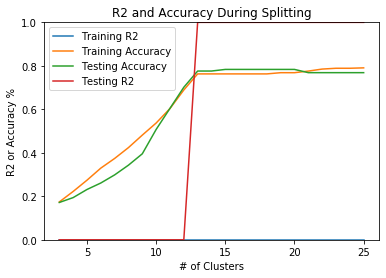

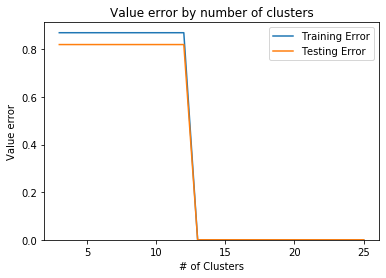

Splitting... |#Clusters:2:   0%|          | 0/23 [00:00<?, ?it/s]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].uniqu

Splitting... |#Clusters:7:  22%|██▏       | 5/23 [00:04<00:16,  1.10it/s]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER

Splitting... |#Clusters:12:  43%|████▎     | 10/23 [00:11<00:17,  1.31s/it]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUST

Splitting... |#Clusters:17:  65%|██████▌   | 15/23 [00:19<00:13,  1.70s/it]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUST

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureW

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureW

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureW

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureW

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureW

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureW

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

Optimal # of clusters reached


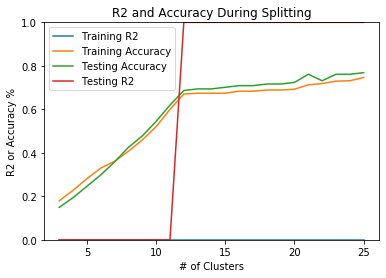

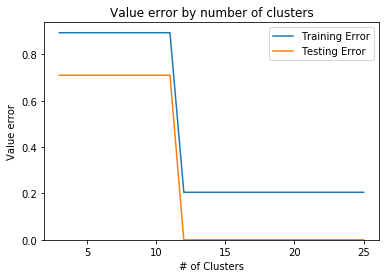

Splitting... |#Clusters:2:   0%|          | 0/23 [00:00<?, ?it/s]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].uniqu

Splitting... |#Clusters:7:  22%|██▏       | 5/23 [00:04<00:16,  1.06it/s]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER

Splitting... |#Clusters:12:  43%|████▎     | 10/23 [00:10<00:15,  1.17s/it]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

Optimal # of clusters reached


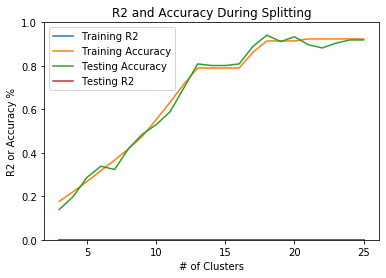

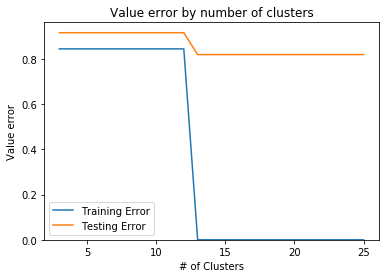

Splitting... |#Clusters:2:   0%|          | 0/23 [00:00<?, ?it/s]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].uniqu

Splitting... |#Clusters:7:  22%|██▏       | 5/23 [00:04<00:17,  1.06it/s]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER

Splitting... |#Clusters:12:  43%|████▎     | 10/23 [00:10<00:15,  1.19s/it]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUST

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/t

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/t

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/t

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/t

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/t

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/t

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/t

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/t

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/t

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/t

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/t

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/t

Optimal # of clusters reached


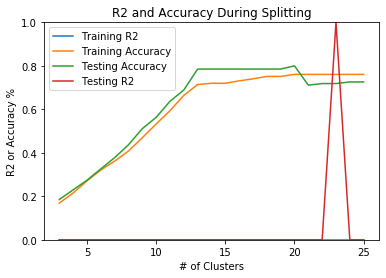

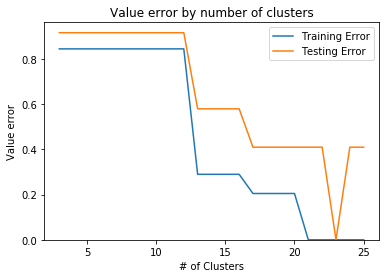

Splitting... |#Clusters:2:   0%|          | 0/23 [00:00<?, ?it/s]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].uniqu

Splitting... |#Clusters:7:  22%|██▏       | 5/23 [00:04<00:16,  1.11it/s]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER

Splitting... |#Clusters:12:  43%|████▎     | 10/23 [00:10<00:16,  1.25s/it]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUST

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: Settin

Optimal # of clusters reached


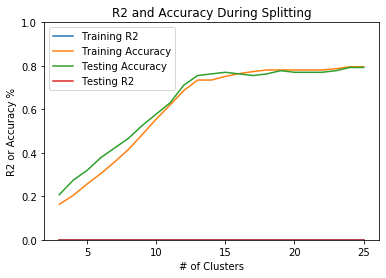

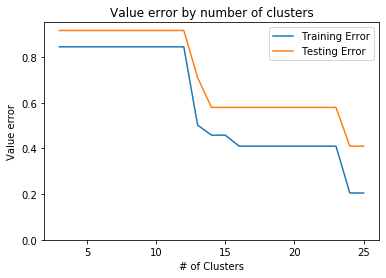

Splitting... |#Clusters:2:   0%|          | 0/21 [00:00<?, ?it/s]

best clusters: 23


Splitting... |#Clusters:16:  67%|██████▋   | 14/21 [00:14<00:08,  1.26s/it]

Splitting... |#Clusters:17:  71%|███████▏  | 15/21 [00:15<00:07,  1.33s/it]

Splitting... |#Clusters:18:  76%|███████▌  | 16/21 [00:17<00:07,  1.45s/it]

Splitting... |#Clusters:19:  81%|████████  | 17/21 [00:19<00:06,  1.53s/it]

Splitting... |#Clusters:20:  86%|████████▌ | 18/21 [00:20<00:04,  1.57s/it]

Splitting... |#Clusters:21:  90%|█████████ | 19/21 [00:22<00:03,  1.71s/it]

Splitting... |#Clusters:22:  95%|█████████▌| 20/21 [00:24<00:01,  1.78s/it]

Splitting... |#Clusters:22:  95%|█████████▌| 20/21 [00:26<00:01,  1.35s/it]

Optimal # of clusters reached


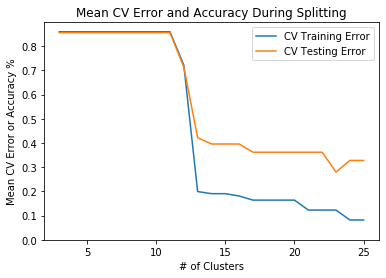

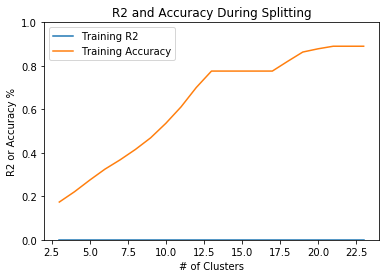

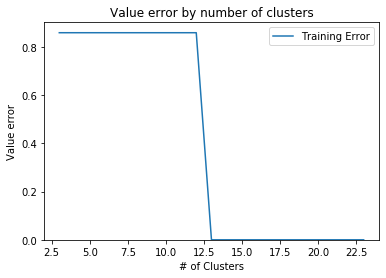

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


     ID  TIME  FEATURE_0  FEATURE_1 ACTION   RISK  OG_CLUSTER  \
0     0     0   0.767503  -0.718378      2 -0.004           0   
1     0     1   1.155328  -0.151008      2 -0.004           1   
2     0     2   2.182783  -0.151938      1 -0.004           2   
3     0     3   2.199943  -1.197584      1 -0.004           7   
4     0     4   2.344576  -2.379013      1 -0.004          12   
..   ..   ...        ...        ...    ...    ...         ...   
669  29    17   3.881947  -1.272436      2 -0.004           8   
670  29    18   4.624341  -1.900790      1 -0.004           9   
671  29    19   4.675794  -2.595698      1 -0.004          14   
672  29    20   4.528784  -3.512571      1 -0.004          19   
673  29    21   4.057960  -4.321474   None  1.000          24   

                                          x_t2  \
0     [1.919783668471858, -0.6223148217263522]   
1    [2.5900281733700465, -0.5715150301587083]   
2    [2.4214381827953164, -1.5500030423805606]   
3     [2.9537360117

  0%|          | 0/100 [00:00<?, ?it/s]

[-0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792  0.976    1.      -0.00792 -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792 -0.00792  0.976    1.      -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792
 -0.00792 -0.00792  0.976    1.      -0.00792 -0.00792 -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792 -0.00792  0.976    1.      -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792 -0.00792
 -0.00792 -0.00792 -0.00792  0.976    1.      -0.00

  1%|          | 1/100 [00:00<00:15,  6.24it/s]

[array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([0.06537773]) array([0.0460929])
 array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([0.91391034]) array([0.76151328]) array([0.9922384])
 array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([0.02774886]) array([-0.0117616]) array([0.02680806])
 array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([0.95248]) array([0.70412918])
 array([0.9922384]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([-0

[array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([-0.0117616]) array([-0.0117616]) array([-0.0117616])
 array([0.00752323]) array([0.00752323]) array([0.00752323])
 array([0.00752323]) array([0.00752323]) array([0.00799363])
 array([0.00799363]) array([0.02680806]) array([0.02680806])
 array([0.02680806]) array([0.02680806]) array([0.02774886])
 array([0.0460929]) array([0.0475041]) array([0.06537773])
 array([0.06537773]) array([0.06725933]) array([0.08466256])
 array([0.08466256]) array([0.08466256]) array([0.10394739])
 array([0.10394739]) array([0.12323222]) array([0.12323222])
 array([0.14251706]) array([0.16180189]) array([0.21965638])
 array([0.27751088]) array([0.33677658]) array([0.37393504])
 array([0.39463107]) array

  2%|▏         | 2/100 [00:14<07:00,  4.29s/it]

[array([-0.01552637]) array([-0.01552637]) array([-0.01552637])
 array([-0.01552637]) array([-0.01552637]) array([-0.01023461])
 array([-0.00982897]) array([0.00575133]) array([0.06838579])
 array([-0.00704479]) array([0.00110487]) array([0.02666027])
 array([-0.00391029]) array([0.17204089]) array([0.21055339])
 array([-0.01099058]) array([0.24717161]) array([0.74235662])
 array([0.81820526]) array([0.70303462]) array([1.02099865])
 array([-0.01552637]) array([-0.01552637]) array([-0.01552637])
 array([-0.01514839]) array([-0.01552637]) array([-0.0038089])
 array([-0.01552637]) array([-0.01552637]) array([-0.00236148])
 array([-0.01401444]) array([0.01284999]) array([0.00112334])
 array([0.12397255]) array([0.06387766]) array([0.03368514])
 array([0.03945633]) array([0.05364447]) array([-0.00947864])
 array([-0.01363645]) array([0.00526268]) array([0.20294764])
 array([0.86479536]) array([0.762939]) array([0.76570038])
 array([1.02099865]) array([-0.01552637]) array([-0.01552637])
 ar

[array([-0.01552637]) array([-0.01552637]) array([-0.01552637])
 array([-0.01552637]) array([-0.01552637]) array([-0.01552637])
 array([-0.01552637]) array([-0.01552637]) array([-0.01514839])
 array([-0.01514839]) array([-0.0147704]) array([-0.01439242])
 array([-0.01439242]) array([-0.01401444]) array([-0.01401444])
 array([-0.01401444]) array([-0.01401444]) array([-0.01401444])
 array([-0.01397756]) array([-0.01363645]) array([-0.01363645])
 array([-0.01360879]) array([-0.01325847]) array([-0.01325847])
 array([-0.01320315]) array([-0.01288049]) array([-0.01288049])
 array([-0.01288049]) array([-0.01288049]) array([-0.01281595])
 array([-0.01250251]) array([-0.01250251]) array([-0.01250251])
 array([-0.01250251]) array([-0.01244719]) array([-0.01242875])
 array([-0.01242875]) array([-0.01174654]) array([-0.01169122])
 array([-0.01165434]) array([-0.01165434]) array([-0.01165434])
 array([-0.01133168]) array([-0.01099058]) array([-0.01099058])
 array([-0.01096292]) array([-0.0109537])

  3%|▎         | 3/100 [00:27<11:10,  6.91s/it]

[array([-0.01820755]) array([-0.01920915]) array([0.02482604])
 array([-0.00817181]) array([0.02238688]) array([0.01227139])
 array([0.00958432]) array([0.09563965]) array([0.1316817])
 array([0.03553964]) array([0.04898344]) array([0.11525129])
 array([0.07181353]) array([0.19128564]) array([0.5111685])
 array([0.03008976]) array([0.77455213]) array([0.77574056])
 array([0.72195591]) array([0.64956046]) array([1.05334848])
 array([-0.01883801]) array([-0.0190899]) array([-0.01847387])
 array([-0.01665934]) array([-0.01196999]) array([0.0095059])
 array([0.00486024]) array([-0.01579629]) array([0.0251161])
 array([0.02607391]) array([0.05780004]) array([0.13763581])
 array([0.29435125]) array([0.07422342]) array([0.06828623])
 array([0.11047434]) array([0.09706125]) array([0.18039791])
 array([0.04380794]) array([0.73580088]) array([0.73785672])
 array([0.73899223]) array([0.5747696]) array([0.68645063])
 array([1.05334848]) array([-0.01921405]) array([-0.01921348])
 array([-0.01883801

[array([-0.01921405]) array([-0.01921348]) array([-0.01921237])
 array([-0.01921195]) array([-0.01921177]) array([-0.01921104])
 array([-0.01920935]) array([-0.01920915]) array([-0.01920886])
 array([-0.01920804]) array([-0.01920764]) array([-0.01920606])
 array([-0.01920602]) array([-0.01920579]) array([-0.01920427])
 array([-0.0192034]) array([-0.01920316]) array([-0.01920123])
 array([-0.01915657]) array([-0.01915443]) array([-0.01915272])
 array([-0.01915121]) array([-0.01913763]) array([-0.01913735])
 array([-0.01909731]) array([-0.01909597]) array([-0.0190899])
 array([-0.01908833]) array([-0.01908688]) array([-0.01908636])
 array([-0.01908612]) array([-0.01907878]) array([-0.01906654])
 array([-0.01897136]) array([-0.01896395]) array([-0.01896321])
 array([-0.01896239]) array([-0.01896094]) array([-0.01883801])
 array([-0.01883689]) array([-0.01883644]) array([-0.01882905])
 array([-0.01871207]) array([-0.01871132]) array([-0.01870587])
 array([-0.01866904]) array([-0.0186198]) 

  4%|▍         | 4/100 [00:40<14:08,  8.84s/it]

[array([-0.01502563]) array([-0.00593236]) array([0.012348])
 array([0.01903656]) array([0.07864914]) array([0.08554681])
 array([0.07202155]) array([0.20336381]) array([0.24388418])
 array([0.143396]) array([0.12465859]) array([0.21860848])
 array([0.19308482]) array([0.25155051]) array([0.52700819])
 array([0.63824067]) array([0.73555959]) array([0.73004275])
 array([0.68348592]) array([0.64431779]) array([1.11573841])
 array([-0.02244382]) array([-0.01685592]) array([0.00762627])
 array([0.01166195]) array([0.00790072]) array([0.07919037])
 array([0.06884284]) array([0.01529614]) array([0.12350082])
 array([0.07794214]) array([0.11424944]) array([0.22378981])
 array([0.2133993]) array([0.17672008]) array([0.25386528])
 array([0.23914474]) array([0.24992954]) array([0.14339697])
 array([0.71206632]) array([0.74169336]) array([0.70779947])
 array([0.70258078]) array([0.7021707]) array([0.60565827])
 array([1.11573841]) array([-0.02240426]) array([-0.02170918])
 array([-0.01796334]) ar

[array([-0.02267555]) array([-0.02267117]) array([-0.02265157])
 array([-0.02255371]) array([-0.02251213]) array([-0.02250761])
 array([-0.02244931]) array([-0.02244382]) array([-0.02242846])
 array([-0.02242378]) array([-0.02240426]) array([-0.02238954])
 array([-0.02236038]) array([-0.0223577]) array([-0.02235191])
 array([-0.02234132]) array([-0.02232257]) array([-0.02211542])
 array([-0.022075]) array([-0.02200328]) array([-0.02170918])
 array([-0.02167868]) array([-0.02163462]) array([-0.02142521])
 array([-0.02131265]) array([-0.02110327]) array([-0.02107868])
 array([-0.02102993]) array([-0.02101617]) array([-0.02100929])
 array([-0.02100835]) array([-0.0209642]) array([-0.02093373])
 array([-0.0209318]) array([-0.02089536]) array([-0.02087417])
 array([-0.02082043]) array([-0.02081895]) array([-0.02076139])
 array([-0.02074473]) array([-0.02072287]) array([-0.0206913])
 array([-0.02067257]) array([-0.02065602]) array([-0.02055496])
 array([-0.02050501]) array([-0.02049009]) arr

  5%|▌         | 5/100 [00:53<15:54, 10.05s/it]

[array([0.0057683]) array([0.26981085]) array([0.14750337])
 array([0.31641836]) array([0.22284638]) array([0.20578517])
 array([0.17703377]) array([0.21571747]) array([0.28327282])
 array([0.25082476]) array([0.20637733]) array([0.20920137])
 array([0.22849001]) array([0.28962509]) array([0.54942869])
 array([0.68617619]) array([0.70183951]) array([0.70107058])
 array([0.66025026]) array([0.66354455]) array([1.18524082])
 array([-0.02443578]) array([0.11399594]) array([0.17769534])
 array([0.11191875]) array([0.08622018]) array([0.15674705])
 array([0.16329895]) array([0.24851742]) array([0.15158152])
 array([0.18514203]) array([0.25580282]) array([0.28457112])
 array([0.30117326]) array([0.26139812]) array([0.46961962])
 array([0.20318225]) array([0.35128406]) array([0.56092167])
 array([0.6918163]) array([0.73696664]) array([0.7166076])
 array([0.67836799]) array([0.67388207]) array([0.64156136])
 array([1.18524082]) array([-0.02384665]) array([-0.02138774])
 array([0.00400492]) arr

[array([-0.02443578]) array([-0.02413862]) array([-0.02393742])
 array([-0.02384665]) array([-0.02380377]) array([-0.0223934])
 array([-0.02207581]) array([-0.02188933]) array([-0.02186948])
 array([-0.02184836]) array([-0.02138774]) array([-0.02134378])
 array([-0.0211541]) array([-0.02105138]) array([-0.02090187])
 array([-0.02075011]) array([-0.0206322]) array([-0.02033025])
 array([-0.02031013]) array([-0.02022421]) array([-0.0200251])
 array([-0.01952607]) array([-0.01589835]) array([-0.01519052])
 array([-0.01061421]) array([-0.00970804]) array([-0.00945987])
 array([-0.008515]) array([-0.00849619]) array([-0.00838196])
 array([-0.00779451]) array([-0.00728601]) array([-0.00569496])
 array([-0.0053295]) array([-0.00440973]) array([-0.00276852])
 array([-0.00222948]) array([-0.00200843]) array([-0.00184186])
 array([-0.00104119]) array([-0.0005921]) array([-0.00056891])
 array([0.00054345]) array([0.00339355]) array([0.00400492])
 array([0.0057683]) array([0.00602834]) array([0.00

  6%|▌         | 6/100 [01:06<17:04, 10.90s/it]

[array([0.23226231]) array([0.2701894]) array([0.26482441])
 array([0.27856397]) array([0.23620084]) array([0.22985062])
 array([0.19414776]) array([0.26083524]) array([0.34716523])
 array([0.32483155]) array([0.26042632]) array([0.32779299])
 array([0.31655216]) array([0.59009344]) array([0.61970702])
 array([0.68641733]) array([0.69291033]) array([0.67192976])
 array([0.64410975]) array([0.51304481]) array([1.11680904])
 array([0.00498158]) array([0.20244402]) array([0.23368519])
 array([0.27450333]) array([0.14496505]) array([0.1978126])
 array([0.19155958]) array([0.2134785]) array([0.23581614])
 array([0.23936174]) array([0.29371326]) array([0.28275888])
 array([0.2903404]) array([0.52591092]) array([0.65305107])
 array([0.31910576]) array([0.61332697]) array([0.63084868])
 array([0.70056429]) array([0.70095277]) array([0.68202185])
 array([0.66659484]) array([0.61760553]) array([0.48757024])
 array([1.11680904]) array([0.00709989]) array([0.00710402])
 array([0.08924123]) array([

[array([-0.00161152]) array([-0.00154791]) array([0.00287587])
 array([0.00498158]) array([0.00709989]) array([0.00710402])
 array([0.00867247]) array([0.01162265]) array([0.01410535])
 array([0.01563114]) array([0.02156226]) array([0.02339265])
 array([0.02344887]) array([0.02668324]) array([0.03053029])
 array([0.03177452]) array([0.03457676]) array([0.03464369])
 array([0.03596196]) array([0.03831385]) array([0.04215676])
 array([0.0535038]) array([0.0593643]) array([0.064369])
 array([0.06516891]) array([0.06586456]) array([0.06677105])
 array([0.07106036]) array([0.07163289]) array([0.08027593])
 array([0.08285432]) array([0.08327964]) array([0.08502142])
 array([0.08762432]) array([0.08854052]) array([0.08924123])
 array([0.09176349]) array([0.09640906]) array([0.09706165])
 array([0.09737294]) array([0.09835996]) array([0.09916257])
 array([0.10177931]) array([0.10534337]) array([0.10603995])
 array([0.1082197]) array([0.11129969]) array([0.11174695])
 array([0.11566811]) array(

  7%|▋         | 7/100 [01:19<17:54, 11.56s/it]

[array([0.27294736]) array([0.30980876]) array([0.27835451])
 array([0.26729184]) array([0.36563004]) array([0.3805294])
 array([0.24667647]) array([0.29477566]) array([0.59172431])
 array([0.60010299]) array([0.28479017]) array([0.57170583])
 array([0.57307343]) array([0.63723214]) array([0.64271986])
 array([0.67082772]) array([0.67490257]) array([0.65632023])
 array([0.6257045]) array([0.56176516]) array([1.20749829])
 array([0.20078243]) array([0.20675942]) array([0.28113275])
 array([0.28489064]) array([0.21131282]) array([0.2551942])
 array([0.23066221]) array([0.25236997]) array([0.25726312])
 array([0.29181001]) array([0.565141]) array([0.30875003])
 array([0.54211251]) array([0.59060449]) array([0.65253843])
 array([0.55672125]) array([0.63796462]) array([0.64082806])
 array([0.65464193]) array([0.67067346]) array([0.67687178])
 array([0.64991559]) array([0.59578235]) array([0.57723926])
 array([1.20749829]) array([0.15519644]) array([0.14691907])
 array([0.1731158]) array([0.

[array([0.10695136]) array([0.11900827]) array([0.12004952])
 array([0.12058966]) array([0.12308261]) array([0.12406405])
 array([0.12928306]) array([0.13220152]) array([0.13796146])
 array([0.1383709]) array([0.14183674]) array([0.1444981])
 array([0.14509963]) array([0.14584694]) array([0.14597471])
 array([0.14691907]) array([0.14993567]) array([0.15168985])
 array([0.15260177]) array([0.1540636]) array([0.15519644])
 array([0.15676764]) array([0.15754897]) array([0.15758746])
 array([0.15931133]) array([0.16115378]) array([0.16357379])
 array([0.16388734]) array([0.16550401]) array([0.16635781])
 array([0.16699069]) array([0.16806755]) array([0.16837041])
 array([0.16961721]) array([0.1731158]) array([0.17378349])
 array([0.17390546]) array([0.17446216]) array([0.17458806])
 array([0.17552934]) array([0.17785847]) array([0.17814462])
 array([0.17828818]) array([0.17850563]) array([0.17901574])
 array([0.17983096]) array([0.17992898]) array([0.180048])
 array([0.18597045]) array([0.

  8%|▊         | 8/100 [01:32<18:22, 11.98s/it]

[array([0.2688171]) array([0.34578694]) array([0.32204296])
 array([0.30706636]) array([0.33624622]) array([0.5384146])
 array([0.26760263]) array([0.52600458]) array([0.63085273])
 array([0.61334244]) array([0.50615842]) array([0.61931499])
 array([0.60998804]) array([0.64139106]) array([0.64556091])
 array([0.66046197]) array([0.65567]) array([0.64357156])
 array([0.63032909]) array([0.62761917]) array([1.24721133])
 array([0.21443492]) array([0.25827859]) array([0.32526249])
 array([0.2982029]) array([0.25216323]) array([0.28218387])
 array([0.27473871]) array([0.34452871]) array([0.38735532])
 array([0.55620139]) array([0.61752052]) array([0.52989528])
 array([0.6179722]) array([0.62275599]) array([0.64786441])
 array([0.61739348]) array([0.63973015]) array([0.64125878])
 array([0.6558602]) array([0.65284301]) array([0.6543807])
 array([0.63736971]) array([0.64261052]) array([0.62878056])
 array([1.24721133]) array([0.18789728]) array([0.19459552])
 array([0.21955435]) array([0.253

[array([0.16770242]) array([0.17194201]) array([0.1720543])
 array([0.17225918]) array([0.17462576]) array([0.17625265])
 array([0.17748051]) array([0.17925213]) array([0.18397936])
 array([0.18601249]) array([0.18650486]) array([0.18789728])
 array([0.18895438]) array([0.18926279]) array([0.19459552])
 array([0.19466298]) array([0.19827857]) array([0.19906978])
 array([0.19987936]) array([0.20086846]) array([0.20127061])
 array([0.20209427]) array([0.20362205]) array([0.20461482])
 array([0.20692997]) array([0.21123292]) array([0.21361452])
 array([0.21443492]) array([0.21603988]) array([0.21666859])
 array([0.21843309]) array([0.21955435]) array([0.2202925])
 array([0.22189786]) array([0.22219574]) array([0.22237412])
 array([0.22286161]) array([0.22598201]) array([0.22598686])
 array([0.22638715]) array([0.22762137]) array([0.22862218])
 array([0.2307405]) array([0.23111232]) array([0.23131881])
 array([0.23146028]) array([0.23260483]) array([0.23264192])
 array([0.23506026]) array(

  9%|▉         | 9/100 [01:44<18:20, 12.10s/it]

[array([0.29874974]) array([0.34901718]) array([0.29391702])
 array([0.32591796]) array([0.47345125]) array([0.58466087])
 array([0.48503593]) array([0.59203712]) array([0.63178069])
 array([0.61836131]) array([0.58300925]) array([0.62346753])
 array([0.62436817]) array([0.63025746]) array([0.63069539])
 array([0.62256161]) array([0.6359219]) array([0.63305496])
 array([0.624834]) array([0.62023832]) array([1.45820005])
 array([0.25250748]) array([0.29299708]) array([0.32083304])
 array([0.30831667]) array([0.33990475]) array([0.5005507])
 array([0.43849637]) array([0.33954649]) array([0.5090918])
 array([0.59571531]) array([0.62284881]) array([0.58850367])
 array([0.61800682]) array([0.61936216]) array([0.63218297])
 array([0.6227184]) array([0.62136574]) array([0.6229019])
 array([0.63600163]) array([0.63602013]) array([0.63660478])
 array([0.63118718]) array([0.62947059]) array([0.6283757])
 array([1.45820005]) array([0.24114201]) array([0.24999954])
 array([0.25289646]) array([0.28

[array([0.21622612]) array([0.22726739]) array([0.2274304])
 array([0.23229016]) array([0.23598325]) array([0.23751004])
 array([0.23767962]) array([0.23794054]) array([0.23813775])
 array([0.23840712]) array([0.2396676]) array([0.24114201])
 array([0.24200141]) array([0.24201238]) array([0.24372177])
 array([0.24437139]) array([0.24491171]) array([0.24599238])
 array([0.24770558]) array([0.24891413]) array([0.24999954])
 array([0.25020728]) array([0.25038981]) array([0.25118937])
 array([0.25206639]) array([0.25211825]) array([0.25250748])
 array([0.25289646]) array([0.2533354]) array([0.25455427])
 array([0.25523513]) array([0.25564608]) array([0.25721417])
 array([0.25726131]) array([0.2574166]) array([0.25828554])
 array([0.25854421]) array([0.25869012]) array([0.25969388])
 array([0.26086482]) array([0.26109759]) array([0.26181951])
 array([0.26244225]) array([0.26377888]) array([0.26479015])
 array([0.26556196]) array([0.26641534]) array([0.26657506])
 array([0.26689116]) array([

 10%|█         | 10/100 [01:58<18:43, 12.48s/it]

[array([0.28433616]) array([0.38166735]) array([0.30613672])
 array([0.47060904]) array([0.56117393]) array([0.60203324])
 array([0.54174784]) array([0.59637512]) array([0.61721398])
 array([0.60298277]) array([0.60052261]) array([0.61369252])
 array([0.60619756]) array([0.61447375]) array([0.63187347])
 array([0.60946209]) array([0.61957935]) array([0.61720056])
 array([0.61930931]) array([0.63686481]) array([1.5456606])
 array([0.28233906]) array([0.31040389]) array([0.3637861])
 array([0.31207067]) array([0.4155788]) array([0.54715283])
 array([0.53562666]) array([0.46531606]) array([0.56601335])
 array([0.60053687]) array([0.61300795]) array([0.59849969])
 array([0.61157311]) array([0.60419373]) array([0.61858248])
 array([0.61074638]) array([0.60992665]) array([0.59559563])
 array([0.60705968]) array([0.61982272]) array([0.61933991])
 array([0.61638924]) array([0.63336746]) array([0.6166288])
 array([1.5456606]) array([0.27323869]) array([0.27254349])
 array([0.28170614]) array([0

[array([0.24607346]) array([0.25270755]) array([0.26052888])
 array([0.26384574]) array([0.26540301]) array([0.26681427])
 array([0.26725916]) array([0.27020456]) array([0.27039424])
 array([0.27077299]) array([0.27168374]) array([0.27254349])
 array([0.2731527]) array([0.27317665]) array([0.27323869])
 array([0.2734679]) array([0.27377626]) array([0.27873187])
 array([0.28011552]) array([0.28111557]) array([0.28141151])
 array([0.28170614]) array([0.2821421]) array([0.28227367])
 array([0.28233906]) array([0.28285424]) array([0.28300893])
 array([0.28322689]) array([0.28368042]) array([0.28425176])
 array([0.28433616]) array([0.28442652]) array([0.2854959])
 array([0.28557744]) array([0.28620859]) array([0.28624441])
 array([0.28663884]) array([0.28704726]) array([0.28711899])
 array([0.2875]) array([0.28773706]) array([0.28877126])
 array([0.28920346]) array([0.28942002]) array([0.28947545])
 array([0.28993194]) array([0.29057685]) array([0.29063293])
 array([0.29084728]) array([0.29

 11%|█         | 11/100 [02:11<19:00, 12.81s/it]

[array([0.31653146]) array([0.37355436]) array([0.46004801])
 array([0.53321613]) array([0.57055347]) array([0.59049202])
 array([0.57675593]) array([0.5912064]) array([0.60197378])
 array([0.59287484]) array([0.59156965]) array([0.60152344])
 array([0.59574007]) array([0.59709713]) array([0.60038222])
 array([0.59135038]) array([0.60246099]) array([0.60511795])
 array([0.62283365]) array([0.67176408]) array([1.54904981])
 array([0.29406818]) array([0.32138411]) array([0.34614379])
 array([0.46017663]) array([0.50225714]) array([0.57615413])
 array([0.56308231]) array([0.54271462]) array([0.57537562])
 array([0.58993352]) array([0.60172659]) array([0.59239912])
 array([0.60549268]) array([0.59203952]) array([0.60185274])
 array([0.60081299]) array([0.59692292]) array([0.57823816])
 array([0.59228153]) array([0.60252821]) array([0.60432761])
 array([0.61404755]) array([0.61501266]) array([0.66886073])
 array([1.54904981]) array([0.2899887]) array([0.28955066])
 array([0.3167776]) array(

[array([0.27266854]) array([0.28082552]) array([0.28257999])
 array([0.28422941]) array([0.28561663]) array([0.28601464])
 array([0.28618512]) array([0.28641823]) array([0.28716162])
 array([0.28769466]) array([0.28836143]) array([0.28955066])
 array([0.2899887]) array([0.29204604]) array([0.29259401])
 array([0.29310265]) array([0.29406818]) array([0.29462308])
 array([0.2948798]) array([0.29577116]) array([0.29597185])
 array([0.29687504]) array([0.29986757]) array([0.29989138])
 array([0.30002693]) array([0.30252034]) array([0.30588703])
 array([0.30592132]) array([0.30800735]) array([0.30964652])
 array([0.31139228]) array([0.31157359]) array([0.31463667])
 array([0.31653146]) array([0.3167776]) array([0.31678499])
 array([0.31750005]) array([0.31751797]) array([0.31821645])
 array([0.31845094]) array([0.31869155]) array([0.3195631])
 array([0.31980647]) array([0.32008531]) array([0.32046984])
 array([0.32116207]) array([0.32118461]) array([0.32120206])
 array([0.32138411]) array([

 12%|█▏        | 12/100 [02:26<19:54, 13.58s/it]

[array([0.35201545]) array([0.42857837]) array([0.52079753])
 array([0.55896858]) array([0.57262242]) array([0.58166613])
 array([0.57514102]) array([0.58456067]) array([0.58544427])
 array([0.58190973]) array([0.58302804]) array([0.58493231])
 array([0.58288052]) array([0.62036518]) array([0.60072884])
 array([0.58417375]) array([0.59779523]) array([0.60078928])
 array([0.65208428]) array([0.64826472]) array([1.53283891])
 array([0.32856522]) array([0.35849383]) array([0.44016565])
 array([0.52842569]) array([0.54724883]) array([0.57450823])
 array([0.56724955]) array([0.55861204]) array([0.57338048])
 array([0.57823974]) array([0.58631238]) array([0.58770445])
 array([0.61892231]) array([0.58400092]) array([0.587643])
 array([0.58680778]) array([0.58136309]) array([0.57160683])
 array([0.57986646]) array([0.59026613]) array([0.60247175])
 array([0.5989676]) array([0.63591272]) array([0.64751717])
 array([1.53283891]) array([0.3216971]) array([0.31340149])
 array([0.39661899]) array([

[array([0.2976213]) array([0.30080545]) array([0.30176567])
 array([0.30178078]) array([0.31142529]) array([0.31310391])
 array([0.31340149]) array([0.3135896]) array([0.3153039])
 array([0.31553989]) array([0.31563846]) array([0.31744065])
 array([0.31776744]) array([0.31947272]) array([0.31994912])
 array([0.32130272]) array([0.3216971]) array([0.32310576])
 array([0.32475506]) array([0.32856522]) array([0.33114602])
 array([0.3359851]) array([0.34023002]) array([0.34282651])
 array([0.34378255]) array([0.34387739]) array([0.34557616])
 array([0.34606325]) array([0.34695283]) array([0.34732976])
 array([0.34940626]) array([0.35141413]) array([0.35144003])
 array([0.35160819]) array([0.35201545]) array([0.35330962])
 array([0.35348761]) array([0.35473172]) array([0.35574394])
 array([0.356261]) array([0.3581555]) array([0.35817067])
 array([0.35849383]) array([0.35863281]) array([0.35917007])
 array([0.35932345]) array([0.35937179]) array([0.36044314])
 array([0.36133435]) array([0.36

 13%|█▎        | 13/100 [02:40<19:40, 13.57s/it]

[array([0.45923981]) array([0.49816188]) array([0.54156065])
 array([0.55905674]) array([0.56939858]) array([0.56708867])
 array([0.56743151]) array([0.58056067]) array([0.58641745])
 array([0.57715424]) array([0.57725274]) array([0.59016296])
 array([0.57809558]) array([0.58272523]) array([0.59482268])
 array([0.5761555]) array([0.59393403]) array([0.62479026])
 array([0.6253153]) array([0.64914409]) array([1.55226884])
 array([0.36531285]) array([0.43541067]) array([0.50410918])
 array([0.54375969]) array([0.55038973]) array([0.56786138])
 array([0.56331578]) array([0.55776121]) array([0.56889464])
 array([0.56768851]) array([0.58329623]) array([0.58952785])
 array([0.57858193]) array([0.58624793]) array([0.58558727])
 array([0.58392143]) array([0.59008339]) array([0.56547378])
 array([0.58627024]) array([0.58447045]) array([0.60346654])
 array([0.62344725]) array([0.62267952]) array([0.64899899])
 array([1.55226884]) array([0.33749553]) array([0.3420983])
 array([0.45376562]) array(

[array([0.33557249]) array([0.33632282]) array([0.33749553])
 array([0.33824021]) array([0.3420983]) array([0.3459794])
 array([0.34909631]) array([0.35050575]) array([0.35197715])
 array([0.3540295]) array([0.35480402]) array([0.35793487])
 array([0.36044541]) array([0.36125757]) array([0.36250569])
 array([0.36311858]) array([0.36531285]) array([0.36910803])
 array([0.36927285]) array([0.37052532]) array([0.37924065])
 array([0.39657462]) array([0.39670053]) array([0.4039736])
 array([0.40596747]) array([0.40661393]) array([0.40999409])
 array([0.41041621]) array([0.41055076]) array([0.41566691])
 array([0.41775598]) array([0.41940268]) array([0.41969258])
 array([0.41994085]) array([0.42024524]) array([0.42135598])
 array([0.42179748]) array([0.42298151]) array([0.42439628])
 array([0.42611449]) array([0.42670477]) array([0.42710843])
 array([0.42832656]) array([0.4283701]) array([0.42944206])
 array([0.42998088]) array([0.43063623]) array([0.43069875])
 array([0.43070843]) array([0

 14%|█▍        | 14/100 [02:53<19:18, 13.47s/it]

[array([0.50323792]) array([0.52396261]) array([0.54222396])
 array([0.55359609]) array([0.57701823]) array([0.57203684])
 array([0.56590288]) array([0.57015154]) array([0.57494888])
 array([0.57270295]) array([0.57045268]) array([0.57203956])
 array([0.57342677]) array([0.58321345]) array([0.5973641])
 array([0.57247985]) array([0.6091792]) array([0.62074898])
 array([0.63562808]) array([0.68710081]) array([1.52622103])
 array([0.42322247]) array([0.49305648]) array([0.52531613])
 array([0.54228204]) array([0.5488142]) array([0.56524562])
 array([0.56521227]) array([0.55455457]) array([0.55825693])
 array([0.56667822]) array([0.57354712]) array([0.57381341])
 array([0.58030403]) array([0.58164846]) array([0.57259657])
 array([0.57101901]) array([0.57854658]) array([0.56311065])
 array([0.58396844]) array([0.60848178]) array([0.61664371])
 array([0.6159344]) array([0.61612362]) array([0.68407675])
 array([1.52622103]) array([0.39966194]) array([0.42955283])
 array([0.49754865]) array([

[array([0.39966194]) array([0.40755845]) array([0.41594981])
 array([0.41701292]) array([0.41796616]) array([0.4194563])
 array([0.42045075]) array([0.42163218]) array([0.42179503])
 array([0.42218581]) array([0.42274817]) array([0.4230686])
 array([0.42322247]) array([0.42457435]) array([0.42532501])
 array([0.42541203]) array([0.42753417]) array([0.42955283])
 array([0.43307473]) array([0.43372107]) array([0.43394586])
 array([0.4345579]) array([0.43468039]) array([0.44179611])
 array([0.44282603]) array([0.45660775]) array([0.45803256])
 array([0.46916191]) array([0.46968964]) array([0.4716298])
 array([0.47175649]) array([0.47300587]) array([0.47305882])
 array([0.4742995]) array([0.47467421]) array([0.4755925])
 array([0.47636475]) array([0.47671136]) array([0.47696942])
 array([0.47782172]) array([0.47804433]) array([0.4809766])
 array([0.48333679]) array([0.48461598]) array([0.48466105])
 array([0.48579052]) array([0.48672932]) array([0.48719091])
 array([0.48741747]) array([0.4

 15%|█▌        | 15/100 [03:06<18:46, 13.25s/it]

[array([0.51436529]) array([0.52284136]) array([0.53753615])
 array([0.55131797]) array([0.55498038]) array([0.55802415])
 array([0.55585716]) array([0.57056469]) array([0.56863442])
 array([0.56227896]) array([0.56850267]) array([0.58251646])
 array([0.57191365]) array([0.57016727]) array([0.59252052])
 array([0.5966288]) array([0.60516888]) array([0.61675735])
 array([0.66572573]) array([0.65629782]) array([1.54717822])
 array([0.4800095]) array([0.51096511]) array([0.52482522])
 array([0.53867211]) array([0.54203697]) array([0.55528411])
 array([0.55190294]) array([0.55866598]) array([0.55910927])
 array([0.5594631]) array([0.57201512]) array([0.57522615])
 array([0.56987173]) array([0.56661334]) array([0.56134282])
 array([0.57813321]) array([0.56404134]) array([0.56071087])
 array([0.59935921]) array([0.60364669]) array([0.60973924])
 array([0.60962927]) array([0.63428109]) array([0.63915037])
 array([1.54717822]) array([0.46469886]) array([0.48188823])
 array([0.51726893]) array(

[array([0.46469886]) array([0.46699399]) array([0.46740238])
 array([0.46978934]) array([0.47480484]) array([0.47514839])
 array([0.47532841]) array([0.47568644]) array([0.47582843])
 array([0.47616193]) array([0.47735814]) array([0.47772292])
 array([0.47880243]) array([0.4800095]) array([0.48002324])
 array([0.48011256]) array([0.48065791]) array([0.48106518])
 array([0.48168113]) array([0.48188823]) array([0.48260928])
 array([0.48269091]) array([0.48278633]) array([0.48322665])
 array([0.48327637]) array([0.48409401]) array([0.48461136])
 array([0.48462495]) array([0.48519712]) array([0.49272422])
 array([0.49355685]) array([0.49506734]) array([0.49606876])
 array([0.49923223]) array([0.49948341]) array([0.50050896])
 array([0.50124186]) array([0.5020336]) array([0.50221674])
 array([0.50375761]) array([0.50378906]) array([0.50431784])
 array([0.50461506]) array([0.50493901]) array([0.50611416])
 array([0.50621976]) array([0.5063326]) array([0.50672943])
 array([0.50691352]) array(

 16%|█▌        | 16/100 [03:20<18:45, 13.40s/it]

[array([0.51374066]) array([0.52831532]) array([0.53610866])
 array([0.54695529]) array([0.55424463]) array([0.55577766])
 array([0.54860109]) array([0.56262935]) array([0.56225482])
 array([0.55869335]) array([0.56361709]) array([0.56485147])
 array([0.55869123]) array([0.56479736]) array([0.59373888])
 array([0.58966563]) array([0.60411211]) array([0.6402933])
 array([0.6435002]) array([0.69350457]) array([1.54699311])
 array([0.49618279]) array([0.51871412]) array([0.52817338])
 array([0.53879131]) array([0.5424514]) array([0.5485441])
 array([0.54603481]) array([0.54308397]) array([0.54913044])
 array([0.55359058]) array([0.55781039]) array([0.56493934])
 array([0.58961201]) array([0.55879359]) array([0.56430348])
 array([0.56359097]) array([0.55868407]) array([0.57654876])
 array([0.59403049]) array([0.59572033]) array([0.61536697])
 array([0.6334308]) array([0.66213581]) array([0.66695903])
 array([1.54699311]) array([0.49030041]) array([0.4981804])
 array([0.51366468]) array([0.

[array([0.48834005]) array([0.48946161]) array([0.4899915])
 array([0.49021604]) array([0.49030041]) array([0.49263087])
 array([0.4934497]) array([0.49441417]) array([0.49445305])
 array([0.49474984]) array([0.49524448]) array([0.49558803])
 array([0.49571048]) array([0.49610027]) array([0.49618279])
 array([0.49633681]) array([0.49647784]) array([0.49671222])
 array([0.49699265]) array([0.49765911]) array([0.49783411])
 array([0.49790603]) array([0.4981804]) array([0.4984145])
 array([0.49867885]) array([0.49878379]) array([0.49906062])
 array([0.49906858]) array([0.49952864]) array([0.50206269])
 array([0.50280789]) array([0.50330161]) array([0.50455878])
 array([0.50499429]) array([0.50565616]) array([0.50570916])
 array([0.50599607]) array([0.50687113]) array([0.50828378])
 array([0.50833393]) array([0.50846188]) array([0.50852537])
 array([0.50973708]) array([0.50980213]) array([0.51003087])
 array([0.51006906]) array([0.51024808]) array([0.51040642])
 array([0.51083102]) array([

 17%|█▋        | 17/100 [03:32<18:00, 13.02s/it]

[array([0.51420843]) array([0.53228914]) array([0.5254435])
 array([0.54235106]) array([0.54464535]) array([0.54662393])
 array([0.54242001]) array([0.56900922]) array([0.57531729])
 array([0.55304559]) array([0.55940655]) array([0.58384501])
 array([0.56401696]) array([0.59322792]) array([0.61325919])
 array([0.59006989]) array([0.61815609]) array([0.62535913])
 array([0.67979202]) array([0.66578544]) array([1.56153673])
 array([0.49914961]) array([0.51653523]) array([0.53070305])
 array([0.52766855]) array([0.53352275]) array([0.54185768])
 array([0.54118795]) array([0.5402617]) array([0.5574776])
 array([0.54561734]) array([0.55277049]) array([0.56387098])
 array([0.58483571]) array([0.5563779]) array([0.56581315])
 array([0.5786092]) array([0.56489225]) array([0.57547978])
 array([0.59749881]) array([0.61945143]) array([0.61941638])
 array([0.63167643]) array([0.63118263]) array([0.66955168])
 array([1.56153673]) array([0.49436831]) array([0.49975928])
 array([0.5156866]) array([0.

[array([0.49333824]) array([0.49436831]) array([0.49499856])
 array([0.49573029]) array([0.49600931]) array([0.49731464])
 array([0.49844484]) array([0.49877741]) array([0.49879161])
 array([0.49914961]) array([0.49918379]) array([0.49945057])
 array([0.49954237]) array([0.49975928]) array([0.49980941])
 array([0.4998402]) array([0.49993116]) array([0.50006294])
 array([0.50063357]) array([0.50197988]) array([0.50221595])
 array([0.50263488]) array([0.50263908]) array([0.50284361])
 array([0.50365053]) array([0.50388788]) array([0.50442353])
 array([0.50463986]) array([0.50482272]) array([0.50779044])
 array([0.50785338]) array([0.5082777]) array([0.50861961])
 array([0.50971707]) array([0.51026348]) array([0.51033082])
 array([0.510577]) array([0.51190619]) array([0.51251261])
 array([0.51264799]) array([0.51285836]) array([0.5129033])
 array([0.51292554]) array([0.51296186]) array([0.51304623])
 array([0.51365534]) array([0.51368462]) array([0.5137656])
 array([0.51411189]) array([0.

 18%|█▊        | 18/100 [03:41<16:19, 11.95s/it]

[array([0.51178525]) array([0.52569732]) array([0.52160964])
 array([0.53553311]) array([0.55664675]) array([0.55196718])
 array([0.54307793]) array([0.55373993]) array([0.56823139])
 array([0.55250898]) array([0.55790042]) array([0.56200611])
 array([0.55701474]) array([0.56706447]) array([0.59427283])
 array([0.60149246]) array([0.62588802]) array([0.65542711])
 array([0.65597402]) array([0.6411045]) array([1.5539882])
 array([0.5017173]) array([0.51867619]) array([0.52284894])
 array([0.52402919]) array([0.53577747]) array([0.54369527])
 array([0.54395088]) array([0.53063608]) array([0.54935458])
 array([0.55018491]) array([0.55862173]) array([0.56943485])
 array([0.59048723]) array([0.56234922]) array([0.56986897])
 array([0.56278438]) array([0.56915514]) array([0.571888])
 array([0.60410658]) array([0.60674727]) array([0.6310218])
 array([0.64749187]) array([0.63241644]) array([0.64049323])
 array([1.5539882]) array([0.49876707]) array([0.49946962])
 array([0.50911883]) array([0.5

[array([0.4958172]) array([0.49724933]) array([0.49876707])
 array([0.49879739]) array([0.49946962]) array([0.49947042])
 array([0.49981186]) array([0.50003735]) array([0.50036668])
 array([0.50053541]) array([0.50064937]) array([0.50088143])
 array([0.50122363]) array([0.50155507]) array([0.5017173])
 array([0.50175187]) array([0.50198997]) array([0.50206248])
 array([0.50244156]) array([0.5026573]) array([0.50287921])
 array([0.50298192]) array([0.50301089]) array([0.5032544])
 array([0.50333464]) array([0.50353004]) array([0.50361837])
 array([0.50402382]) array([0.50458518]) array([0.50556166])
 array([0.50577094]) array([0.50577655]) array([0.50581004])
 array([0.50603926]) array([0.50613514]) array([0.50619542])
 array([0.50743925]) array([0.50804389]) array([0.50807711])
 array([0.50841537]) array([0.50859004]) array([0.50890459])
 array([0.50911883]) array([0.5104003]) array([0.51059501])
 array([0.5106353]) array([0.51138733]) array([0.51143371])
 array([0.51150486]) array([0.

 19%|█▉        | 19/100 [03:51<15:07, 11.20s/it]

[array([0.50590015]) array([0.54083718]) array([0.52237775])
 array([0.53427684]) array([0.54259354]) array([0.54880242])
 array([0.54076028]) array([0.5597296]) array([0.56733617])
 array([0.5570786]) array([0.55017152]) array([0.57414648])
 array([0.56228594]) array([0.56547362]) array([0.62237628])
 array([0.59146046]) array([0.62291666]) array([0.64401589])
 array([0.62932329]) array([0.66061606]) array([1.54715385])
 array([0.50112886]) array([0.51109254]) array([0.53779515])
 array([0.51701415]) array([0.52978709]) array([0.54084447])
 array([0.53773708]) array([0.54097157]) array([0.55578422])
 array([0.54700203]) array([0.55555668]) array([0.55976029])
 array([0.57777565]) array([0.55963659]) array([0.57687196])
 array([0.57117799]) array([0.571186]) array([0.57935442])
 array([0.60813724]) array([0.62851644]) array([0.62934525])
 array([0.63529886]) array([0.64689459]) array([0.61922049])
 array([1.54715385]) array([0.49804432]) array([0.49920658])
 array([0.50488734]) array([

[array([0.49633248]) array([0.49670768]) array([0.49699942])
 array([0.49761061]) array([0.49780778]) array([0.49789962])
 array([0.49804432]) array([0.49816321]) array([0.49856101])
 array([0.49868089]) array([0.4987106]) array([0.4990409])
 array([0.49908951]) array([0.49913753]) array([0.49920658])
 array([0.49924437]) array([0.49930506]) array([0.49953456])
 array([0.49957406]) array([0.49969744]) array([0.49981438])
 array([0.49988785]) array([0.50010901]) array([0.50020687])
 array([0.50047311]) array([0.50048948]) array([0.50068388])
 array([0.50084337]) array([0.50094185]) array([0.50112886])
 array([0.50144747]) array([0.50179242]) array([0.50211223])
 array([0.50220489]) array([0.50265365]) array([0.50281618])
 array([0.50285876]) array([0.50295771]) array([0.50376863])
 array([0.50397139]) array([0.50407421]) array([0.50408215])
 array([0.50435257]) array([0.50468526]) array([0.50469819])
 array([0.50488734]) array([0.5049834]) array([0.50501953])
 array([0.50504248]) array(

 20%|██        | 20/100 [04:00<14:12, 10.66s/it]

[array([0.51466697]) array([0.52876674]) array([0.519455])
 array([0.53430696]) array([0.54955115]) array([0.54964001])
 array([0.54516328]) array([0.55161488]) array([0.5577527])
 array([0.5523572]) array([0.55814476]) array([0.56365996])
 array([0.55592616]) array([0.56512974]) array([0.60320902])
 array([0.61919869]) array([0.61461067]) array([0.6171568])
 array([0.618051]) array([0.59801903]) array([1.54862428])
 array([0.49697798]) array([0.51396472]) array([0.525081])
 array([0.52241138]) array([0.53445263]) array([0.54579508])
 array([0.53830232]) array([0.5293108]) array([0.54350121])
 array([0.54527702]) array([0.55389172]) array([0.55954797])
 array([0.56167015]) array([0.55842751]) array([0.57287014])
 array([0.56027279]) array([0.56797186]) array([0.57569971])
 array([0.6178771]) array([0.62213731]) array([0.62020293])
 array([0.61515488]) array([0.61053302]) array([0.6025061])
 array([1.54862428]) array([0.4926736]) array([0.49175065])
 array([0.50665336]) array([0.5144974

[array([0.4892747]) array([0.4893343]) array([0.48948723])
 array([0.48951318]) array([0.49035068]) array([0.49111377])
 array([0.49175065]) array([0.49181569]) array([0.49224011])
 array([0.49240032]) array([0.49259218]) array([0.4926736])
 array([0.49271654]) array([0.49273064]) array([0.49302507])
 array([0.49372015]) array([0.49379227]) array([0.49488285])
 array([0.4961352]) array([0.4967327]) array([0.4967898])
 array([0.49684781]) array([0.49696222]) array([0.49697798])
 array([0.49706325]) array([0.49841217]) array([0.50142876])
 array([0.50259016]) array([0.50319908]) array([0.50350969])
 array([0.5037145]) array([0.50388324]) array([0.50392926])
 array([0.50460383]) array([0.50466705]) array([0.50518995])
 array([0.50531412]) array([0.50559335]) array([0.50599045])
 array([0.50617556]) array([0.50620548]) array([0.50657934])
 array([0.50665336]) array([0.50670717]) array([0.5074106])
 array([0.50762361]) array([0.50766475]) array([0.50787565])
 array([0.50794135]) array([0.50

 21%|██        | 21/100 [04:12<14:24, 10.95s/it]

[array([0.50228241]) array([0.52978118]) array([0.51644419])
 array([0.53923839]) array([0.53771414]) array([0.54143375])
 array([0.53648027]) array([0.54342427]) array([0.55901692])
 array([0.55734153]) array([0.54247447]) array([0.55220002])
 array([0.55162221]) array([0.58179254]) array([0.5899285])
 array([0.60431294]) array([0.60641814]) array([0.61277159])
 array([0.60355997]) array([0.63604217]) array([1.53665282])
 array([0.49957741]) array([0.51219386]) array([0.52644573])
 array([0.51627423]) array([0.52606978]) array([0.53572886])
 array([0.53542476]) array([0.53236777]) array([0.53501372])
 array([0.53837408]) array([0.55193699]) array([0.5475261])
 array([0.57526701]) array([0.56110423]) array([0.57593529])
 array([0.55076195]) array([0.56760045]) array([0.59611196])
 array([0.60002791]) array([0.60720858]) array([0.6142513])
 array([0.60374021]) array([0.61678721]) array([0.65174919])
 array([1.53665282]) array([0.49633381]) array([0.49389599])
 array([0.50461512]) array(

[array([0.48924618]) array([0.4899355]) array([0.48994281])
 array([0.49033705]) array([0.49037057]) array([0.49212366])
 array([0.49322387]) array([0.49389599]) array([0.49393579])
 array([0.49567215]) array([0.49633381]) array([0.4970503])
 array([0.49725201]) array([0.49727939]) array([0.49761445])
 array([0.49806979]) array([0.49823736]) array([0.49876776])
 array([0.49877628]) array([0.49923424]) array([0.49957741])
 array([0.49961357]) array([0.50045896]) array([0.50070585])
 array([0.50078476]) array([0.50090787]) array([0.50102716])
 array([0.50113987]) array([0.50116162]) array([0.50132633])
 array([0.50132703]) array([0.50148911]) array([0.50156718])
 array([0.50166264]) array([0.50179946]) array([0.50192407])
 array([0.50210254]) array([0.50228241]) array([0.50228664])
 array([0.50243597]) array([0.5026375]) array([0.50278894])
 array([0.50307586]) array([0.50312774]) array([0.50321536])
 array([0.50331773]) array([0.50338278]) array([0.50341352])
 array([0.50373981]) array(

 22%|██▏       | 22/100 [04:21<13:41, 10.53s/it]

[array([0.50376304]) array([0.52195222]) array([0.51374794])
 array([0.52856732]) array([0.53692746]) array([0.53724347])
 array([0.52684845]) array([0.54324611]) array([0.56600376])
 array([0.55155212]) array([0.5413833]) array([0.55531126])
 array([0.55356746]) array([0.57052736]) array([0.5892833])
 array([0.58486694]) array([0.59246249]) array([0.58992577])
 array([0.63660776]) array([0.64771435]) array([1.53236667])
 array([0.4948903]) array([0.50668499]) array([0.51229371])
 array([0.51774215]) array([0.52000122]) array([0.52702361])
 array([0.52538004]) array([0.53040468]) array([0.53736157])
 array([0.53794569]) array([0.55301463]) array([0.55107562])
 array([0.55245327]) array([0.56532718]) array([0.57975216])
 array([0.5520261]) array([0.57793628]) array([0.58077566])
 array([0.59709287]) array([0.59259721]) array([0.59070185])
 array([0.58906174]) array([0.60773884]) array([0.64837252])
 array([1.53236667]) array([0.49178976]) array([0.49396153])
 array([0.49950197]) array([

[array([0.48652455]) array([0.48829412]) array([0.4903668])
 array([0.49050897]) array([0.49067894]) array([0.49069505])
 array([0.49096293]) array([0.49108061]) array([0.49156984])
 array([0.49163078]) array([0.49178976]) array([0.49255921])
 array([0.49315952]) array([0.4931982]) array([0.49387205])
 array([0.49396153]) array([0.49396263]) array([0.4939912])
 array([0.49416336]) array([0.49421219]) array([0.4948903])
 array([0.49490201]) array([0.49581899]) array([0.49618212])
 array([0.49739204]) array([0.49770548]) array([0.49777486])
 array([0.49807389]) array([0.49817241]) array([0.49843867])
 array([0.49879498]) array([0.49941966]) array([0.49943972])
 array([0.49950197]) array([0.50041647]) array([0.5006544])
 array([0.50099894]) array([0.50128405]) array([0.5013373])
 array([0.50147332]) array([0.50149485]) array([0.50167995])
 array([0.50188678]) array([0.50192842]) array([0.5020203])
 array([0.50231184]) array([0.5024863]) array([0.50280898])
 array([0.50287079]) array([0.50

 23%|██▎       | 23/100 [04:31<13:10, 10.27s/it]

[array([0.49941479]) array([0.51895319]) array([0.50863502])
 array([0.52031903]) array([0.53920959]) array([0.54261117])
 array([0.53241842]) array([0.54417985]) array([0.56385328])
 array([0.56021339]) array([0.54295138]) array([0.55943927])
 array([0.56028958]) array([0.56737927]) array([0.57984373])
 array([0.57885697]) array([0.58934127]) array([0.61343288])
 array([0.61247488]) array([0.61265925]) array([1.53555736])
 array([0.49334767]) array([0.50217271]) array([0.51545098])
 array([0.51253678]) array([0.51831053]) array([0.53167688])
 array([0.52987732]) array([0.51977847]) array([0.53130372])
 array([0.5430764]) array([0.56161953]) array([0.54883941])
 array([0.5571601]) array([0.558065]) array([0.57005906])
 array([0.56045623]) array([0.56581256]) array([0.56972968])
 array([0.57638871]) array([0.5788338]) array([0.60396009])
 array([0.61803437]) array([0.61799436]) array([0.60117642])
 array([1.53555736]) array([0.49050282]) array([0.49254774])
 array([0.49818241]) array([0

[array([0.48525265]) array([0.48727071]) array([0.48814709])
 array([0.48818701]) array([0.48827198]) array([0.48878491])
 array([0.48894537]) array([0.48916904]) array([0.48987658])
 array([0.49050282]) array([0.49079669]) array([0.49159925])
 array([0.49219217]) array([0.49244796]) array([0.49245672])
 array([0.49254774]) array([0.4928471]) array([0.49305482])
 array([0.49310118]) array([0.49334767]) array([0.49357736])
 array([0.493832]) array([0.49410876]) array([0.49429772])
 array([0.49441948]) array([0.49455464]) array([0.49510018])
 array([0.49540519]) array([0.49585022]) array([0.49588362])
 array([0.49600001]) array([0.49605617]) array([0.4961619])
 array([0.49652684]) array([0.49654716]) array([0.49657962])
 array([0.49688202]) array([0.49694279]) array([0.4971386])
 array([0.497404]) array([0.49758533]) array([0.49776776])
 array([0.49799251]) array([0.49799838]) array([0.49818241])
 array([0.49821353]) array([0.49842226]) array([0.49842296])
 array([0.49893105]) array([0.4

 24%|██▍       | 24/100 [04:41<12:45, 10.07s/it]

[array([0.49390845]) array([0.51076433]) array([0.50261233])
 array([0.51656307]) array([0.52531525]) array([0.54416115])
 array([0.52095866]) array([0.54958933]) array([0.55405737])
 array([0.55267986]) array([0.54947472]) array([0.55274241])
 array([0.55059939]) array([0.56091379]) array([0.58343395])
 array([0.56577394]) array([0.6003309]) array([0.60913661])
 array([0.6006298]) array([0.61434822]) array([1.52991918])
 array([0.48816517]) array([0.49811251]) array([0.50709343])
 array([0.50352674]) array([0.51137256]) array([0.52333059])
 array([0.52011989]) array([0.52169725]) array([0.53189023])
 array([0.5450095]) array([0.551209]) array([0.54908443])
 array([0.56178765]) array([0.55413292]) array([0.55973582])
 array([0.55393913]) array([0.56426702]) array([0.55808589])
 array([0.57963194]) array([0.59851975]) array([0.60246231])
 array([0.60503449]) array([0.59943129]) array([0.60670877])
 array([1.52991918]) array([0.48465606]) array([0.48564238])
 array([0.49433362]) array([0

[array([0.48286752]) array([0.48296766]) array([0.48418356])
 array([0.48454408]) array([0.48465606]) array([0.48492016])
 array([0.48561814]) array([0.48562156]) array([0.48564238])
 array([0.48580198]) array([0.48603742]) array([0.48605711])
 array([0.48605987]) array([0.48632296]) array([0.48645784])
 array([0.48656591]) array([0.48660573]) array([0.48672845])
 array([0.4877858]) array([0.4880914]) array([0.48810587])
 array([0.48816517]) array([0.48873318]) array([0.48881162])
 array([0.48887289]) array([0.4891566]) array([0.48962477])
 array([0.48982808]) array([0.48994278]) array([0.4903674])
 array([0.49045517]) array([0.49046645]) array([0.49099171])
 array([0.49130732]) array([0.4914623]) array([0.49188388])
 array([0.49220598]) array([0.49227117]) array([0.49258301])
 array([0.49266594]) array([0.49271687]) array([0.49273538])
 array([0.49293398]) array([0.49297811]) array([0.4937066])
 array([0.49378824]) array([0.49390845]) array([0.49433362])
 array([0.49442767]) array([0.

 25%|██▌       | 25/100 [04:50<12:22,  9.90s/it]

[array([0.49032341]) array([0.50687257]) array([0.50452579])
 array([0.51672589]) array([0.52976707]) array([0.53592767])
 array([0.52925279]) array([0.54484147]) array([0.55026452])
 array([0.54296469]) array([0.53297575]) array([0.54417644])
 array([0.54481938]) array([0.55032031]) array([0.57434815])
 array([0.58545306]) array([0.58656205]) array([0.58301236])
 array([0.60612501]) array([0.60269986]) array([1.52386048])
 array([0.48366181]) array([0.49182345]) array([0.50126671])
 array([0.50604382]) array([0.51229058]) array([0.5300592])
 array([0.52265721]) array([0.5129141]) array([0.53079956])
 array([0.53688948]) array([0.54432927]) array([0.54199597])
 array([0.5489179]) array([0.54883488]) array([0.55060633])
 array([0.54380564]) array([0.5497827]) array([0.55529735])
 array([0.58640577]) array([0.58849796]) array([0.58511362])
 array([0.58216175]) array([0.58509967]) array([0.63009052])
 array([1.52386048]) array([0.48164955]) array([0.48209135])
 array([0.48639831]) array([

[array([0.47884893]) array([0.47921153]) array([0.48018199])
 array([0.48036769]) array([0.48086736]) array([0.48093277])
 array([0.481146]) array([0.4812834]) array([0.48131482])
 array([0.48150723]) array([0.48164955]) array([0.48209135])
 array([0.48211368]) array([0.48241801]) array([0.48258121])
 array([0.48286006]) array([0.48292982]) array([0.48322841])
 array([0.48329092]) array([0.48366181]) array([0.48368241])
 array([0.4841418]) array([0.48422617]) array([0.48428857])
 array([0.48430829]) array([0.48440871]) array([0.48444323])
 array([0.48449131]) array([0.4847487]) array([0.48489626])
 array([0.48524461]) array([0.48564552]) array([0.48639831])
 array([0.48641398]) array([0.48661796]) array([0.48678194])
 array([0.48685142]) array([0.48690367]) array([0.48715342])
 array([0.48724679]) array([0.48750371]) array([0.4876016])
 array([0.48831225]) array([0.48842047]) array([0.48860189])
 array([0.48904459]) array([0.48930248]) array([0.4893355])
 array([0.48951409]) array([0.4

 26%|██▌       | 26/100 [04:59<12:01,  9.75s/it]

[array([0.48420065]) array([0.51104042]) array([0.49953101])
 array([0.52158771]) array([0.52600811]) array([0.53090835])
 array([0.52607848]) array([0.53425792]) array([0.54144518])
 array([0.53810301]) array([0.53269608]) array([0.53638994])
 array([0.53546709]) array([0.541635]) array([0.57948427])
 array([0.57241221]) array([0.57284741]) array([0.5828742])
 array([0.57105486]) array([0.59851906]) array([1.5277647])
 array([0.47865563]) array([0.48721949]) array([0.50618265])
 array([0.49917657]) array([0.50966175]) array([0.5267305])
 array([0.5207436]) array([0.51518085]) array([0.52541647])
 array([0.53114221]) array([0.53366937]) array([0.54117441])
 array([0.53661896]) array([0.53978937]) array([0.55108858])
 array([0.53458492]) array([0.55009852]) array([0.56534091])
 array([0.56940873]) array([0.57173154]) array([0.57697459])
 array([0.5809084]) array([0.58795216]) array([0.57629879])
 array([1.5277647]) array([0.47534726]) array([0.47627844])
 array([0.48320809]) array([0.49

[array([0.47168789]) array([0.47285923]) array([0.47325613])
 array([0.47534726]) array([0.47546835]) array([0.47552487])
 array([0.47563085]) array([0.47574041]) array([0.47627844])
 array([0.47651463]) array([0.47683333]) array([0.47714837])
 array([0.47742768]) array([0.47749731]) array([0.47766038])
 array([0.47768241]) array([0.47769473]) array([0.47774272])
 array([0.47786769]) array([0.47793235]) array([0.47811636])
 array([0.47851197]) array([0.47865563]) array([0.47913398])
 array([0.47933396]) array([0.47941765]) array([0.47958488])
 array([0.47978098]) array([0.48020394]) array([0.48072816])
 array([0.48087364]) array([0.48157914]) array([0.48191079])
 array([0.48200765]) array([0.48204133]) array([0.48286403])
 array([0.48287352]) array([0.48308788]) array([0.48315101])
 array([0.48320809]) array([0.48323269]) array([0.48349187])
 array([0.48388685]) array([0.4840959]) array([0.48410533])
 array([0.48420065]) array([0.48428382]) array([0.48428917])
 array([0.48468348]) arra

 27%|██▋       | 27/100 [05:14<13:46, 11.32s/it]

[array([0.48529576]) array([0.50852816]) array([0.50099228])
 array([0.51092796]) array([0.51850945]) array([0.52010043])
 array([0.51745387]) array([0.52582059]) array([0.53478148])
 array([0.53440769]) array([0.52681465]) array([0.52987909])
 array([0.53179039]) array([0.54674661]) array([0.56257645])
 array([0.56176449]) array([0.56403482]) array([0.57020701])
 array([0.5705727]) array([0.57214442]) array([1.51834983])
 array([0.47564708]) array([0.49390561]) array([0.50387332])
 array([0.50172244]) array([0.50756666]) array([0.51724352])
 array([0.51585451]) array([0.50946606]) array([0.51913242])
 array([0.52297689]) array([0.53001312]) array([0.52963615])
 array([0.53385128]) array([0.54274873]) array([0.55354216])
 array([0.5289728]) array([0.54965508]) array([0.55116038])
 array([0.56020055]) array([0.5654501]) array([0.56511196])
 array([0.56842965]) array([0.55771004]) array([0.56900787])
 array([1.51834983]) array([0.47128493]) array([0.47013222])
 array([0.48092435]) array(

[array([0.46899979]) array([0.46952412]) array([0.46986677])
 array([0.47005578]) array([0.47013222]) array([0.47047786])
 array([0.47048637]) array([0.47115234]) array([0.47115865])
 array([0.47128493]) array([0.47155628]) array([0.47197137])
 array([0.47198104]) array([0.47198398]) array([0.47241478])
 array([0.47265798]) array([0.47297244]) array([0.47320096])
 array([0.47406173]) array([0.47564708]) array([0.47568235])
 array([0.47575218]) array([0.47683685]) array([0.47713475])
 array([0.47736623]) array([0.47758136]) array([0.47767627])
 array([0.47805667]) array([0.4783073]) array([0.47841895])
 array([0.4786516]) array([0.47929175]) array([0.47950666])
 array([0.48017678]) array([0.48051423]) array([0.48092435])
 array([0.48152804]) array([0.4818144]) array([0.48195725])
 array([0.48221003]) array([0.48241747]) array([0.48296593])
 array([0.48306858]) array([0.48337141]) array([0.48368756])
 array([0.48437882]) array([0.48444237]) array([0.48460795])
 array([0.48469431]) array(

 28%|██▊       | 28/100 [05:27<14:05, 11.74s/it]

[array([0.48486015]) array([0.49430923]) array([0.49607345])
 array([0.50560637]) array([0.51209801]) array([0.51682407])
 array([0.51011339]) array([0.51766757]) array([0.53706271])
 array([0.53463799]) array([0.51721211]) array([0.5353122])
 array([0.53397891]) array([0.54376725]) array([0.54748587])
 array([0.5476375]) array([0.55317055]) array([0.556237])
 array([0.56026763]) array([0.55011463]) array([1.50593885])
 array([0.47691149]) array([0.48728682]) array([0.49234887])
 array([0.49615617]) array([0.50199485]) array([0.51058373])
 array([0.50880164]) array([0.50563833]) array([0.51152135])
 array([0.51771222]) array([0.53617757]) array([0.51981486])
 array([0.53286237]) array([0.53848265]) array([0.54078377])
 array([0.53454293]) array([0.53971581]) array([0.53845092])
 array([0.54990889]) array([0.55459722]) array([0.55453479])
 array([0.54975789]) array([0.55128667]) array([0.5480047])
 array([1.50593885]) array([0.46822314]) array([0.46983092])
 array([0.47839547]) array([0

[array([0.46708353]) array([0.46776834]) array([0.46822314])
 array([0.46853374]) array([0.46893247]) array([0.46946756])
 array([0.46983092]) array([0.47005614]) array([0.47131315])
 array([0.47244196]) array([0.47252417]) array([0.4731173])
 array([0.47329307]) array([0.47356124]) array([0.47413292])
 array([0.47413987]) array([0.47457435]) array([0.47462795])
 array([0.47473631]) array([0.47516433]) array([0.47523394])
 array([0.47590745]) array([0.47600425]) array([0.47664802])
 array([0.47691149]) array([0.47694833]) array([0.47721295])
 array([0.47728306]) array([0.47733373]) array([0.47739313])
 array([0.47755214]) array([0.47784309]) array([0.47784327])
 array([0.4781141]) array([0.47839547]) array([0.4785013])
 array([0.47860398]) array([0.47880826]) array([0.47892637])
 array([0.47932182]) array([0.4793247]) array([0.47936916])
 array([0.48037007]) array([0.48076886]) array([0.48092518])
 array([0.48140024]) array([0.48148262]) array([0.48164459])
 array([0.48249329]) array([

 29%|██▉       | 29/100 [05:37<13:15, 11.21s/it]

[array([0.47939778]) array([0.49309479]) array([0.49057266])
 array([0.49895919]) array([0.50378321]) array([0.51770488])
 array([0.50218489]) array([0.51830944]) array([0.5267984])
 array([0.52646832]) array([0.51659978]) array([0.52610529])
 array([0.52607933]) array([0.52711124]) array([0.5363018])
 array([0.53616146]) array([0.53822098]) array([0.5444542])
 array([0.54085811]) array([0.55127408]) array([1.49984723])
 array([0.47182999]) array([0.48227792]) array([0.49202582])
 array([0.49219288]) array([0.49629566]) array([0.50355365])
 array([0.50213534]) array([0.49671727]) array([0.50707836])
 array([0.51934758]) array([0.52630708]) array([0.51808516])
 array([0.52434794]) array([0.52427857]) array([0.53021656])
 array([0.52530367]) array([0.52948412]) array([0.53001507])
 array([0.540698]) array([0.53974961]) array([0.54191209])
 array([0.54158676]) array([0.538788]) array([0.55081857])
 array([1.49984723]) array([0.47047189]) array([0.46916855])
 array([0.47779923]) array([0.4

[array([0.46512153]) array([0.46663088]) array([0.46702239])
 array([0.46776146]) array([0.46802079]) array([0.46815539])
 array([0.46830919]) array([0.46859929]) array([0.46861954])
 array([0.46879991]) array([0.46916855]) array([0.4702813])
 array([0.47047189]) array([0.47091175]) array([0.47138221])
 array([0.4716429]) array([0.47182999]) array([0.47183136])
 array([0.47186997]) array([0.47218341]) array([0.47229628])
 array([0.47301333]) array([0.47329106]) array([0.4733426])
 array([0.47367643]) array([0.47375525]) array([0.47449087])
 array([0.47464905]) array([0.47469959]) array([0.4748584])
 array([0.47486364]) array([0.47549763]) array([0.47564051])
 array([0.47600876]) array([0.47610493]) array([0.47629794])
 array([0.4763065]) array([0.47649008]) array([0.47681858])
 array([0.4770808]) array([0.47709809]) array([0.47710145])
 array([0.47755607]) array([0.47771024]) array([0.47779916])
 array([0.47779923]) array([0.47809571]) array([0.47817412])
 array([0.4781921]) array([0.4

 30%|███       | 30/100 [05:49<13:24, 11.49s/it]

[array([0.47578956]) array([0.49110093]) array([0.48340486])
 array([0.49259936]) array([0.50001912]) array([0.51060955])
 array([0.50309445]) array([0.5103466]) array([0.5154131])
 array([0.51307395]) array([0.51061374]) array([0.51380784])
 array([0.51410198]) array([0.5188416]) array([0.52655781])
 array([0.52526485]) array([0.52910117]) array([0.52706487])
 array([0.5389787]) array([0.52799549]) array([1.49482436])
 array([0.46707496]) array([0.47710289]) array([0.48745234])
 array([0.48363425]) array([0.49040764]) array([0.50271951])
 array([0.49854828]) array([0.49055119]) array([0.50203459])
 array([0.51179378]) array([0.51402877]) array([0.51082296])
 array([0.51278667]) array([0.5143329]) array([0.51915835])
 array([0.51318806]) array([0.51783977]) array([0.5207532])
 array([0.52854671]) array([0.52690076]) array([0.52823722])
 array([0.52604175]) array([0.52540474]) array([0.52983051])
 array([1.49482436]) array([0.46392841]) array([0.46423942])
 array([0.47368254]) array([0.

[array([0.46207019]) array([0.46261787]) array([0.46285868])
 array([0.46366375]) array([0.46367874]) array([0.46392841])
 array([0.46408582]) array([0.46420208]) array([0.46423942])
 array([0.46430005]) array([0.46576037]) array([0.46579792])
 array([0.46583639]) array([0.46592015]) array([0.46608994])
 array([0.46627599]) array([0.46664798]) array([0.46668256])
 array([0.46707496]) array([0.46709621]) array([0.46810652])
 array([0.46868391]) array([0.46915122]) array([0.46945982])
 array([0.4700631]) array([0.47021774]) array([0.47059227])
 array([0.47082782]) array([0.47090703]) array([0.47137568])
 array([0.47138542]) array([0.47138714]) array([0.47142617])
 array([0.47168889]) array([0.47181232]) array([0.47195762])
 array([0.47267785]) array([0.47296027]) array([0.47314839])
 array([0.47318289]) array([0.47329682]) array([0.47368254])
 array([0.47378706]) array([0.4738801]) array([0.47407517])
 array([0.474223]) array([0.47462878]) array([0.47484001])
 array([0.47497265]) array([

 31%|███       | 31/100 [06:02<13:32, 11.77s/it]

[array([0.46955547]) array([0.47948957]) array([0.47718481])
 array([0.48711764]) array([0.49435249]) array([0.49890484])
 array([0.49466435]) array([0.49916911]) array([0.50596749])
 array([0.50508695]) array([0.49858608]) array([0.50401029])
 array([0.50376485]) array([0.50688116]) array([0.51094919])
 array([0.5110442]) array([0.51783629]) array([0.52853222])
 array([0.52536102]) array([0.55318579]) array([1.4952729])
 array([0.46477511]) array([0.47313941]) array([0.47615995])
 array([0.47716047]) array([0.48276296]) array([0.49408038])
 array([0.49173245]) array([0.48687718]) array([0.49599463])
 array([0.4988294]) array([0.50429996]) array([0.49975845])
 array([0.50407136]) array([0.50448703]) array([0.50989383])
 array([0.50327668]) array([0.50826066]) array([0.50866299])
 array([0.5136228]) array([0.51361711]) array([0.52690469])
 array([0.52374509]) array([0.52123417]) array([0.55075034])
 array([1.4952729]) array([0.46202992]) array([0.46401347])
 array([0.46778603]) array([0

[array([0.45993231]) array([0.46102596]) array([0.4613935])
 array([0.4615231]) array([0.46182991]) array([0.46202992])
 array([0.46234733]) array([0.46258651]) array([0.46293757])
 array([0.4633149]) array([0.46344389]) array([0.46344959])
 array([0.46346496]) array([0.46347495]) array([0.46350946])
 array([0.46357316]) array([0.46359332]) array([0.4639278])
 array([0.46396311]) array([0.46401347]) array([0.46421029])
 array([0.4643085]) array([0.46447276]) array([0.46452831])
 array([0.46460874]) array([0.46477511]) array([0.46489215])
 array([0.4649481]) array([0.46503286]) array([0.46510004])
 array([0.4652193]) array([0.46531984]) array([0.46563336])
 array([0.46571584]) array([0.46599387]) array([0.46631081])
 array([0.46651281]) array([0.46666781]) array([0.46740827])
 array([0.46740856]) array([0.46771511]) array([0.46778603])
 array([0.46815049]) array([0.46815468]) array([0.46852528])
 array([0.46857217]) array([0.46874883]) array([0.46907963])
 array([0.46911628]) array([0.4

 32%|███▏      | 32/100 [06:12<12:54, 11.39s/it]

[array([0.46316465]) array([0.46824697]) array([0.47401525])
 array([0.47968571]) array([0.48430701]) array([0.49092986])
 array([0.48353463]) array([0.49017801]) array([0.49452324])
 array([0.49485616]) array([0.48895611]) array([0.49448424])
 array([0.49399847]) array([0.49583513]) array([0.50343877])
 array([0.50640876]) array([0.50826234]) array([0.50750316])
 array([0.53537519]) array([0.58371404]) array([1.48628684])
 array([0.45868992]) array([0.46277614]) array([0.46717937])
 array([0.47401761]) array([0.47849674]) array([0.48345585])
 array([0.48277002]) array([0.48068361]) array([0.48463031])
 array([0.49044815]) array([0.49465881]) array([0.48975257])
 array([0.49307529]) array([0.49312677]) array([0.49750786])
 array([0.49412719]) array([0.4953533]) array([0.49611772])
 array([0.51214964]) array([0.50856845]) array([0.51045464])
 array([0.50606082]) array([0.50915923]) array([0.58328971])
 array([1.48628684]) array([0.4555326]) array([0.45676399])
 array([0.46023371]) array

[array([0.45422135]) array([0.45503514]) array([0.45526178])
 array([0.45548818]) array([0.4555326]) array([0.45562185])
 array([0.45567927]) array([0.45632361]) array([0.45676399])
 array([0.45676774]) array([0.45677136]) array([0.45704586])
 array([0.45726573]) array([0.45729002]) array([0.45773588])
 array([0.45802477]) array([0.45806154]) array([0.45814351])
 array([0.45827794]) array([0.45831273]) array([0.45850301])
 array([0.45855054]) array([0.45864387]) array([0.45868381])
 array([0.45868992]) array([0.45895827]) array([0.4591905])
 array([0.45943303]) array([0.45943597]) array([0.45953549])
 array([0.45954005]) array([0.4600795]) array([0.46023371])
 array([0.46026512]) array([0.46040295]) array([0.46043562])
 array([0.46049307]) array([0.46064056]) array([0.46069128])
 array([0.4607615]) array([0.46087913]) array([0.46089691])
 array([0.46120701]) array([0.4612727]) array([0.46130743])
 array([0.46150117]) array([0.46150946]) array([0.46174625])
 array([0.46175882]) array([0

 33%|███▎      | 33/100 [06:22<12:15, 10.98s/it]

[array([0.45497979]) array([0.46029326]) array([0.46670885])
 array([0.47129734]) array([0.47502234]) array([0.4793768])
 array([0.4752212]) array([0.47961482]) array([0.48372172])
 array([0.48299048]) array([0.48008936]) array([0.48259683])
 array([0.48228588]) array([0.4846442]) array([0.49648216])
 array([0.49522102]) array([0.50030699]) array([0.5156356])
 array([0.51821241]) array([0.50690657]) array([1.47571225])
 array([0.44976964]) array([0.45513411]) array([0.45956917])
 array([0.46727137]) array([0.46945542]) array([0.47583971])
 array([0.47340393]) array([0.47054881]) array([0.47546983])
 array([0.48060647]) array([0.48252]) array([0.48216755])
 array([0.48241199]) array([0.48264396]) array([0.48762736])
 array([0.48253292]) array([0.48482935]) array([0.48893197])
 array([0.49577074]) array([0.49516225]) array([0.50274007])
 array([0.50719399]) array([0.50785152]) array([0.5145178])
 array([1.47571225]) array([0.44806147]) array([0.44944375])
 array([0.45560217]) array([0.45

[array([0.44708755]) array([0.44741487]) array([0.44777048])
 array([0.44783919]) array([0.44806147]) array([0.44819139])
 array([0.44829751]) array([0.4484782]) array([0.44849367])
 array([0.44855085]) array([0.44858991]) array([0.44860735])
 array([0.44932497]) array([0.44944375]) array([0.44949859])
 array([0.44961487]) array([0.44963129]) array([0.44971122])
 array([0.44974337]) array([0.44976964]) array([0.45018419])
 array([0.45074816]) array([0.45108731]) array([0.45146613])
 array([0.45158185]) array([0.4519949]) array([0.45211124])
 array([0.45216477]) array([0.45221101]) array([0.45268095])
 array([0.45286753]) array([0.45311449]) array([0.4532536])
 array([0.45339367]) array([0.45347681]) array([0.45351308])
 array([0.45354177]) array([0.4537588]) array([0.4538211])
 array([0.45413514]) array([0.45418965]) array([0.45428963])
 array([0.45436277]) array([0.4543888]) array([0.45446798])
 array([0.45447986]) array([0.45453858]) array([0.45457088])
 array([0.45461415]) array([0.

 34%|███▍      | 34/100 [06:32<11:39, 10.60s/it]

[array([0.45014315]) array([0.46054366]) array([0.45707526])
 array([0.46208179]) array([0.46565112]) array([0.46857081])
 array([0.46564897]) array([0.46968262]) array([0.47693727])
 array([0.47226136]) array([0.4699109]) array([0.4710369])
 array([0.47122497]) array([0.47963559]) array([0.49119107])
 array([0.4828436]) array([0.5083155]) array([0.52455009])
 array([0.51286246]) array([0.50392509]) array([1.46442075])
 array([0.44189039]) array([0.4506904]) array([0.45937513])
 array([0.45706002]) array([0.4607426]) array([0.46570674])
 array([0.4645353]) array([0.46167757]) array([0.46643339])
 array([0.46908871]) array([0.47129453]) array([0.47044156])
 array([0.47638525]) array([0.47556107]) array([0.47831677])
 array([0.47095701]) array([0.47923659]) array([0.47936486])
 array([0.48786897]) array([0.49854587]) array([0.50741352])
 array([0.5227586]) array([0.51369519]) array([0.49629328])
 array([1.46442075]) array([0.440231]) array([0.44126756])
 array([0.44811613]) array([0.4535

[array([0.4397808]) array([0.44014886]) array([0.440231])
 array([0.44082398]) array([0.44119144]) array([0.44122503])
 array([0.44126756]) array([0.44160757]) array([0.44168616])
 array([0.44169794]) array([0.4417322]) array([0.44183227])
 array([0.44187107]) array([0.44189039]) array([0.44204704])
 array([0.44205492]) array([0.44206367]) array([0.44207998])
 array([0.44213962]) array([0.44214961]) array([0.44298997])
 array([0.44363081]) array([0.44391186]) array([0.44393054])
 array([0.4445408]) array([0.4451113]) array([0.44565898])
 array([0.44568569]) array([0.44573749]) array([0.44598939])
 array([0.44603463]) array([0.44631456]) array([0.44642195])
 array([0.44646733]) array([0.44650545]) array([0.44665935])
 array([0.44668335]) array([0.44684468]) array([0.44699355])
 array([0.44700319]) array([0.44701394]) array([0.44709143])
 array([0.44716775]) array([0.44720435]) array([0.447255])
 array([0.44725865]) array([0.44726509]) array([0.44729209])
 array([0.44730479]) array([0.44

 35%|███▌      | 35/100 [06:42<11:09, 10.30s/it]

[array([0.44310045]) array([0.44946486]) array([0.44859703])
 array([0.45414884]) array([0.45558248]) array([0.45849448])
 array([0.45539585]) array([0.4609786]) array([0.46978008])
 array([0.46541763]) array([0.45837999]) array([0.46423319])
 array([0.46445765]) array([0.47533719]) array([0.4912983])
 array([0.48467725]) array([0.49773182]) array([0.4988347])
 array([0.49797652]) array([0.5260124]) array([1.45346819])
 array([0.43580023]) array([0.44521118]) array([0.44853662])
 array([0.44883689]) array([0.45146102]) array([0.45537107])
 array([0.45467513]) array([0.45238207]) array([0.45744969])
 array([0.4605201]) array([0.46482904]) array([0.45985606])
 array([0.46572338]) array([0.47050302]) array([0.46953367])
 array([0.46380941]) array([0.47286077]) array([0.47149381])
 array([0.49489884]) array([0.50363853]) array([0.50692998])
 array([0.49524076]) array([0.50098605]) array([0.52085492])
 array([1.45346819]) array([0.43323852]) array([0.43669453])
 array([0.44299531]) array([0

[array([0.43323852]) array([0.43384769]) array([0.43398554])
 array([0.43439731]) array([0.43451586]) array([0.43487679])
 array([0.43489212]) array([0.43509437]) array([0.4352496])
 array([0.43544607]) array([0.43580023]) array([0.43589664])
 array([0.43593009]) array([0.43595014]) array([0.43637981])
 array([0.43649012]) array([0.43661187]) array([0.43662398])
 array([0.43669453]) array([0.43695534]) array([0.43699226])
 array([0.4371971]) array([0.43884621]) array([0.43886377])
 array([0.4392415]) array([0.44005385]) array([0.4400786])
 array([0.44030751]) array([0.44057864]) array([0.44070049])
 array([0.44082787]) array([0.44083575]) array([0.44090207])
 array([0.44101352]) array([0.44104516]) array([0.44119621])
 array([0.4417213]) array([0.44175888]) array([0.44188782])
 array([0.44194281]) array([0.44228492]) array([0.44235912])
 array([0.44236794]) array([0.44236943]) array([0.44260192])
 array([0.44277183]) array([0.4427946]) array([0.44283996])
 array([0.44292399]) array([0.

 36%|███▌      | 36/100 [06:51<10:50, 10.17s/it]

[array([0.43480577]) array([0.44743903]) array([0.43935481])
 array([0.44639094]) array([0.44659841]) array([0.45257823])
 array([0.44721771]) array([0.45244702]) array([0.45946786])
 array([0.45921844]) array([0.45119291]) array([0.45480022])
 array([0.45501415]) array([0.46443585]) array([0.47773505])
 array([0.48866709]) array([0.49288396]) array([0.48729094])
 array([0.49739166]) array([0.50999667]) array([1.44678479])
 array([0.43230964]) array([0.43951101]) array([0.44440005])
 array([0.43934634]) array([0.44264315]) array([0.44778771])
 array([0.44503472]) array([0.44946637]) array([0.44688715])
 array([0.45262071]) array([0.45519464]) array([0.45509089])
 array([0.4596083]) array([0.45883534]) array([0.46740835])
 array([0.45458]) array([0.46691944]) array([0.47290713])
 array([0.49626864]) array([0.4929979]) array([0.48802858])
 array([0.48655907]) array([0.48935955]) array([0.50666721])
 array([1.44678479]) array([0.43110788]) array([0.43055348])
 array([0.43322183]) array([0

[array([0.4282737]) array([0.4295378]) array([0.43007215])
 array([0.43025909]) array([0.43034707]) array([0.43042395])
 array([0.43048697]) array([0.43050331]) array([0.43055348])
 array([0.43064631]) array([0.43078063]) array([0.43096122])
 array([0.43096952]) array([0.4310197]) array([0.43106329])
 array([0.43106654]) array([0.43110788]) array([0.43116033])
 array([0.43120574]) array([0.43129664]) array([0.43153199])
 array([0.43169027]) array([0.43171727]) array([0.43172033])
 array([0.43183926]) array([0.43185518]) array([0.4318939])
 array([0.43195043]) array([0.43195228]) array([0.43205271])
 array([0.43216448]) array([0.43216739]) array([0.4322959])
 array([0.43230964]) array([0.43239874]) array([0.4326593])
 array([0.43269086]) array([0.43273358]) array([0.43274153])
 array([0.43277908]) array([0.43300971]) array([0.43301789])
 array([0.43320882]) array([0.43322183]) array([0.4335197])
 array([0.43363181]) array([0.43366506]) array([0.43369933])
 array([0.43373362]) array([0.4

 37%|███▋      | 37/100 [07:01<10:33, 10.05s/it]

[array([0.42777047]) array([0.44456174]) array([0.44088177])
 array([0.44685393]) array([0.4386694]) array([0.44209248])
 array([0.43903796]) array([0.44447276]) array([0.45306396])
 array([0.45022717]) array([0.44244688]) array([0.45039576])
 array([0.45075981]) array([0.45861999]) array([0.4721101])
 array([0.47333702]) array([0.4756181]) array([0.48210432])
 array([0.4980604]) array([0.48828043]) array([1.43974481])
 array([0.42410259]) array([0.43031577]) array([0.44200682])
 array([0.43828809]) array([0.43382561]) array([0.43926104])
 array([0.43736971]) array([0.43810427]) array([0.44093362])
 array([0.44300557]) array([0.45193195]) array([0.44425691])
 array([0.44993957]) array([0.4564829]) array([0.46448941])
 array([0.4495394]) array([0.46235347]) array([0.47240698])
 array([0.47502846]) array([0.4748591]) array([0.47605776])
 array([0.48173384]) array([0.48009792]) array([0.48668314])
 array([1.43974481]) array([0.42125941]) array([0.42196249])
 array([0.42687022]) array([0.4

[array([0.42038885]) array([0.42092708]) array([0.42096587])
 array([0.42097982]) array([0.42125941]) array([0.42175996])
 array([0.42179237]) array([0.4219265]) array([0.42193369])
 array([0.42196249]) array([0.42218433]) array([0.42230783])
 array([0.42239254]) array([0.42260251]) array([0.42265725])
 array([0.42299981]) array([0.42305353]) array([0.4233296])
 array([0.42339955]) array([0.42347677]) array([0.42355874])
 array([0.42357989]) array([0.42380698]) array([0.42383161])
 array([0.4238535]) array([0.42386702]) array([0.42403235])
 array([0.42404221]) array([0.42409863]) array([0.42410259])
 array([0.4248689]) array([0.42499508]) array([0.42511236])
 array([0.42516793]) array([0.42537058]) array([0.42558306])
 array([0.42578994]) array([0.42585976]) array([0.4264383])
 array([0.42669621]) array([0.42687022]) array([0.42687434])
 array([0.42714345]) array([0.42715776]) array([0.42730966])
 array([0.42752456]) array([0.42777047]) array([0.42795541])
 array([0.42799618]) array([0

 38%|███▊      | 38/100 [07:12<10:39, 10.32s/it]

[array([0.42672588]) array([0.43154606]) array([0.4264518])
 array([0.43137482]) array([0.43482874]) array([0.43609357])
 array([0.43135053]) array([0.43885448]) array([0.45097665])
 array([0.44899982]) array([0.43640034]) array([0.44864731])
 array([0.44755729]) array([0.45636148]) array([0.464936])
 array([0.46121966]) array([0.46955973]) array([0.47989885])
 array([0.47566036]) array([0.46162317]) array([1.430799])
 array([0.41946527]) array([0.4248191]) array([0.42810444])
 array([0.42778492]) array([0.42651243]) array([0.4312343])
 array([0.43034636]) array([0.42874972]) array([0.43290091])
 array([0.43820438]) array([0.44885359]) array([0.43929405])
 array([0.44674605]) array([0.45461018]) array([0.46004049])
 array([0.44793398]) array([0.45893397]) array([0.45952369])
 array([0.46184914]) array([0.46760459]) array([0.47713058])
 array([0.47568672]) array([0.46690712]) array([0.4633427])
 array([1.430799]) array([0.41544563]) array([0.41539541])
 array([0.41999766]) array([0.4265

[array([0.41394857]) array([0.41417503]) array([0.41514096])
 array([0.41539541]) array([0.41544563]) array([0.41553518])
 array([0.41569094]) array([0.4158353]) array([0.41603764])
 array([0.41645252]) array([0.41652273]) array([0.41677062])
 array([0.41688558]) array([0.41690778]) array([0.41700903])
 array([0.41717092]) array([0.41717921]) array([0.41721512])
 array([0.41722825]) array([0.41732579]) array([0.41733552])
 array([0.41757493]) array([0.41760484]) array([0.41762547])
 array([0.41770977]) array([0.41794118]) array([0.41830162])
 array([0.41833079]) array([0.41834385]) array([0.41841847])
 array([0.41844157]) array([0.41850657]) array([0.41875907])
 array([0.41882062]) array([0.4188211]) array([0.41946527])
 array([0.41966896]) array([0.41985123]) array([0.41996208])
 array([0.41999766]) array([0.42004037]) array([0.4201816])
 array([0.42021135]) array([0.42027768]) array([0.42041526])
 array([0.42089997]) array([0.42104775]) array([0.42121802])
 array([0.42137983]) array(

 39%|███▉      | 39/100 [07:22<10:15, 10.10s/it]

[array([0.41408956]) array([0.42417296]) array([0.41774012])
 array([0.421931]) array([0.42466006]) array([0.43294993])
 array([0.42333209]) array([0.43428835]) array([0.44683609])
 array([0.44396245]) array([0.43296299]) array([0.44561937])
 array([0.44475141]) array([0.44752041]) array([0.45498313])
 array([0.45928569]) array([0.46166524]) array([0.46437002])
 array([0.46111182]) array([0.51068414]) array([1.42341229])
 array([0.41350008]) array([0.41800394]) array([0.42154119])
 array([0.4161183]) array([0.41938769]) array([0.42396507])
 array([0.4219594]) array([0.42055973]) array([0.4260994])
 array([0.43534541]) array([0.4456871]) array([0.43365417])
 array([0.44352208]) array([0.44449508]) array([0.44829212])
 array([0.44506905]) array([0.4471965]) array([0.44935935])
 array([0.46099559]) array([0.46147992]) array([0.46309184])
 array([0.46107752]) array([0.46243933]) array([0.50857242])
 array([1.42341229]) array([0.41146397]) array([0.41115995])
 array([0.41103801]) array([0.4

[array([0.40851621]) array([0.40856084]) array([0.40917089])
 array([0.40973211]) array([0.40990736]) array([0.40994053])
 array([0.41031309]) array([0.4103961]) array([0.41068095])
 array([0.41089899]) array([0.41091352]) array([0.41096685])
 array([0.41103801]) array([0.41115995]) array([0.41118017])
 array([0.41124898]) array([0.41130667]) array([0.41132799])
 array([0.41140383]) array([0.41146265]) array([0.41146397])
 array([0.41150707]) array([0.41151967]) array([0.41177896])
 array([0.41190834]) array([0.41201561]) array([0.41202869])
 array([0.41225362]) array([0.41256933]) array([0.41263396])
 array([0.4127585]) array([0.41285797]) array([0.41297848])
 array([0.41303193]) array([0.41313215]) array([0.41322465])
 array([0.41328675]) array([0.41331943]) array([0.41334822])
 array([0.41344356]) array([0.41348881]) array([0.41350006])
 array([0.41350008]) array([0.41350914]) array([0.41354174])
 array([0.41356505]) array([0.41364375]) array([0.41379477])
 array([0.41380458]) array

 40%|████      | 40/100 [07:31<09:59,  9.99s/it]

[array([0.40595105]) array([0.41308753]) array([0.40981533])
 array([0.41605553]) array([0.42015089]) array([0.43150473])
 array([0.41951193]) array([0.43140735]) array([0.43556164])
 array([0.43568701]) array([0.43101194]) array([0.43547072])
 array([0.43522569]) array([0.43555419]) array([0.44343956])
 array([0.45011787]) array([0.4490119]) array([0.4496274])
 array([0.48046839]) array([0.47973128]) array([1.42182823])
 array([0.40364911]) array([0.40993869]) array([0.41160065])
 array([0.40789452]) array([0.41190728]) array([0.42009479])
 array([0.4181967]) array([0.41169986]) array([0.421824])
 array([0.43281861]) array([0.43532899]) array([0.43083808])
 array([0.43417523]) array([0.43341862]) array([0.44016149])
 array([0.43546168]) array([0.4383202]) array([0.44391701])
 array([0.4507208]) array([0.45097551]) array([0.45142623])
 array([0.44787346]) array([0.465577]) array([0.48449077])
 array([1.42182823]) array([0.40318175]) array([0.40331493])
 array([0.404051]) array([0.40687

[array([0.39971693]) array([0.40043895]) array([0.40131689])
 array([0.40167442]) array([0.40241066]) array([0.40259368])
 array([0.40271949]) array([0.40274149]) array([0.40278211])
 array([0.40281995]) array([0.40289521]) array([0.40296558])
 array([0.40313561]) array([0.40318175]) array([0.40324587])
 array([0.40328355]) array([0.40331493]) array([0.40336311])
 array([0.40339756]) array([0.40341284]) array([0.40364911])
 array([0.40368405]) array([0.40369086]) array([0.40378006])
 array([0.40391868]) array([0.40398971]) array([0.404051])
 array([0.40406453]) array([0.40418076]) array([0.40420046])
 array([0.40422286]) array([0.40444602]) array([0.40449639])
 array([0.40457247]) array([0.40484984]) array([0.40486232])
 array([0.40492415]) array([0.40503316]) array([0.40512976])
 array([0.40515331]) array([0.40518138]) array([0.40550674])
 array([0.40555208]) array([0.40558455]) array([0.40579816])
 array([0.40582448]) array([0.40582859]) array([0.40584547])
 array([0.40590316]) array

 41%|████      | 41/100 [07:41<09:46,  9.95s/it]

[array([0.3964006]) array([0.40552684]) array([0.40270617])
 array([0.41005588]) array([0.4172604]) array([0.4217856])
 array([0.4166263]) array([0.4212853]) array([0.4269808])
 array([0.42378922]) array([0.42149582]) array([0.42481615])
 array([0.42472273]) array([0.43026667]) array([0.43979729])
 array([0.43714046]) array([0.44541392]) array([0.45859095])
 array([0.45164736]) array([0.45761621]) array([1.41871845])
 array([0.39690984]) array([0.40279327]) array([0.4036099])
 array([0.40131169]) array([0.40563654]) array([0.41766859])
 array([0.41494176]) array([0.40923169]) array([0.41814707])
 array([0.42261439]) array([0.42484578]) array([0.42351826])
 array([0.42554756]) array([0.42846092]) array([0.43285735])
 array([0.42491645]) array([0.43163066]) array([0.43378899])
 array([0.4393218]) array([0.440595]) array([0.44655921])
 array([0.4613357]) array([0.44553516]) array([0.45426035])
 array([1.41871845]) array([0.39497981]) array([0.39407737])
 array([0.39584686]) array([0.39764

[array([0.3929566]) array([0.39304031]) array([0.39314472])
 array([0.3932668]) array([0.39385776]) array([0.39407737])
 array([0.39431186]) array([0.39442436]) array([0.39473944])
 array([0.39476896]) array([0.39488054]) array([0.39490071])
 array([0.39497981]) array([0.395233]) array([0.39530595])
 array([0.39530767]) array([0.39532032]) array([0.39536973])
 array([0.39543029]) array([0.3955735]) array([0.39557871])
 array([0.39563934]) array([0.39564447]) array([0.39568666])
 array([0.39569689]) array([0.39580547]) array([0.39584558])
 array([0.39584686]) array([0.39586242]) array([0.39592176])
 array([0.39592378]) array([0.39610013]) array([0.39616423])
 array([0.39622658]) array([0.39628185]) array([0.39631434])
 array([0.39632199]) array([0.39634313]) array([0.3964006])
 array([0.39642393]) array([0.39644184]) array([0.39665757])
 array([0.39690984]) array([0.39691239]) array([0.39692508])
 array([0.39696402]) array([0.39697219]) array([0.39712119])
 array([0.3973355]) array([0.3

 42%|████▏     | 42/100 [07:51<09:31,  9.85s/it]

[array([0.39072138]) array([0.39885398]) array([0.39587161])
 array([0.40392629]) array([0.40913252]) array([0.41320866])
 array([0.40781916]) array([0.4134421]) array([0.42226941])
 array([0.41926667]) array([0.41206041]) array([0.4187889])
 array([0.41888511]) array([0.42298521]) array([0.43463381])
 array([0.42657216]) array([0.45123674]) array([0.44847165])
 array([0.44583484]) array([0.49854295]) array([1.41023428])
 array([0.38738919]) array([0.39228985]) array([0.39781576])
 array([0.39558682]) array([0.40216516]) array([0.40844539])
 array([0.40604491]) array([0.40483035]) array([0.40966002])
 array([0.4121807]) array([0.41884323]) array([0.41364743])
 array([0.43220734]) array([0.41951069]) array([0.42358929])
 array([0.41866435]) array([0.42268092]) array([0.42343204])
 array([0.42495355]) array([0.44478829]) array([0.4414316])
 array([0.44385117]) array([0.44134903]) array([0.49889867])
 array([1.41023428]) array([0.38592519]) array([0.38553841])
 array([0.38842111]) array([

[array([0.38466065]) array([0.38491249]) array([0.38521143])
 array([0.38553841]) array([0.38557552]) array([0.38580749])
 array([0.3858465]) array([0.38592519]) array([0.38601962])
 array([0.3860292]) array([0.38623271]) array([0.38627787])
 array([0.38636328]) array([0.38637189]) array([0.38643731])
 array([0.38646627]) array([0.38655247]) array([0.38666613])
 array([0.38683497]) array([0.38717077]) array([0.38720181])
 array([0.38726702]) array([0.38738919]) array([0.38775242])
 array([0.38778324]) array([0.38792078]) array([0.38798272])
 array([0.38799991]) array([0.38803004]) array([0.38814569])
 array([0.38829577]) array([0.38834966]) array([0.38841561])
 array([0.38842111]) array([0.38847556]) array([0.38848874])
 array([0.38857261]) array([0.38862257]) array([0.38870084])
 array([0.38893747]) array([0.38893858]) array([0.38897926])
 array([0.38910011]) array([0.38914233]) array([0.38915444])
 array([0.38930834]) array([0.38940731]) array([0.38941975])
 array([0.38943706]) array

 43%|████▎     | 43/100 [08:01<09:19,  9.81s/it]

[array([0.3830084]) array([0.38924795]) array([0.39299435])
 array([0.39778553]) array([0.39997806]) array([0.40714879])
 array([0.40023433]) array([0.41302474]) array([0.41218105])
 array([0.41277568]) array([0.4109406]) array([0.4135936])
 array([0.41055278]) array([0.41444166]) array([0.42576965])
 array([0.42998834]) array([0.43312371]) array([0.43363876])
 array([0.45059936]) array([0.48709492]) array([1.39995176])
 array([0.3789465]) array([0.38445587]) array([0.3880216])
 array([0.39256959]) array([0.39518711]) array([0.40030851])
 array([0.39921966]) array([0.39698022]) array([0.40630829])
 array([0.40691611]) array([0.41059896]) array([0.41153528])
 array([0.41068556]) array([0.40995039]) array([0.41367441])
 array([0.4145865]) array([0.41270542]) array([0.41699365])
 array([0.43204768]) array([0.4350557]) array([0.43794573])
 array([0.43110358]) array([0.45009638]) array([0.48778996])
 array([1.39995176]) array([0.37843511]) array([0.37823449])
 array([0.38204245]) array([0.3

[array([0.37644883]) array([0.37698713]) array([0.37706419])
 array([0.37765223]) array([0.37774547]) array([0.377794])
 array([0.3779589]) array([0.37807209]) array([0.37823449])
 array([0.37843511]) array([0.37853851]) array([0.37861405])
 array([0.37864892]) array([0.37865897]) array([0.37874076])
 array([0.3789465]) array([0.37897416]) array([0.37899328])
 array([0.37924379]) array([0.37964932]) array([0.3797293])
 array([0.37980239]) array([0.37981478]) array([0.37991381])
 array([0.38004654]) array([0.38031657]) array([0.38065137])
 array([0.38075723]) array([0.38081073]) array([0.38097724])
 array([0.38137422]) array([0.38153218]) array([0.38204245])
 array([0.38218168]) array([0.38231189]) array([0.38237075])
 array([0.38239035]) array([0.38242766]) array([0.38265794])
 array([0.38279126]) array([0.38281853]) array([0.3828531])
 array([0.3830084]) array([0.38316787]) array([0.38317153])
 array([0.38332905]) array([0.38332966]) array([0.38345143])
 array([0.3834583]) array([0.38

 44%|████▍     | 44/100 [08:11<09:17,  9.96s/it]

[array([0.3754287]) array([0.38965412]) array([0.38487443])
 array([0.39574945]) array([0.40043939]) array([0.39863461])
 array([0.39890236]) array([0.40142235]) array([0.40272026])
 array([0.40133292]) array([0.39949842]) array([0.40187287])
 array([0.40187543]) array([0.41409266]) array([0.42914029])
 array([0.42035512]) array([0.42500256]) array([0.45051985])
 array([0.46074181]) array([0.53443659]) array([1.40028937])
 array([0.37290864]) array([0.37901917]) array([0.38809196])
 array([0.38485333]) array([0.3903261]) array([0.39911963])
 array([0.39605059]) array([0.39113272]) array([0.39560185])
 array([0.39932974]) array([0.40233242]) array([0.40223541])
 array([0.4097281]) array([0.40760138]) array([0.41324785])
 array([0.40157983]) array([0.40810628]) array([0.41482521])
 array([0.42441409]) array([0.42401506]) array([0.43443241])
 array([0.44719385]) array([0.48655808]) array([0.51769746])
 array([1.40028937]) array([0.37089895]) array([0.3716545])
 array([0.37562922]) array([

[array([0.36970411]) array([0.37047208]) array([0.37067518])
 array([0.37067711]) array([0.37076787]) array([0.37086623])
 array([0.37089161]) array([0.37089895]) array([0.37092546])
 array([0.3716545]) array([0.37182268]) array([0.37185641])
 array([0.37204539]) array([0.37228559]) array([0.37241273])
 array([0.37266524]) array([0.37270333]) array([0.37282356])
 array([0.37290864]) array([0.37294978]) array([0.37311108])
 array([0.37330175]) array([0.37348606]) array([0.37384873])
 array([0.37385113]) array([0.37388221]) array([0.37419379])
 array([0.37419515]) array([0.37428329]) array([0.37458699])
 array([0.37465384]) array([0.37473379]) array([0.37498348])
 array([0.37506402]) array([0.37509512]) array([0.3754287])
 array([0.37545403]) array([0.37546551]) array([0.375511])
 array([0.37562922]) array([0.37564401]) array([0.37570355])
 array([0.37570582]) array([0.37579648]) array([0.37596907])
 array([0.37609846]) array([0.37612176]) array([0.37612296])
 array([0.37622108]) array([

 45%|████▌     | 45/100 [08:22<09:23, 10.25s/it]

[array([0.37296869]) array([0.37866357]) array([0.37844097])
 array([0.38610119]) array([0.38921478]) array([0.39010643])
 array([0.38903342]) array([0.39342017]) array([0.39916733])
 array([0.39466523]) array([0.39271681]) array([0.40091991])
 array([0.39692734]) array([0.40574686]) array([0.42584568])
 array([0.40909011]) array([0.43780252]) array([0.44731328])
 array([0.51300459]) array([0.4919736]) array([1.38904135])
 array([0.36592957]) array([0.37729721]) array([0.37746246])
 array([0.3791743]) array([0.38113628]) array([0.38777957])
 array([0.3868964]) array([0.38732761]) array([0.39093151])
 array([0.39153358]) array([0.40471325]) array([0.39595772])
 array([0.4006881]) array([0.40081728]) array([0.40714869])
 array([0.4040233]) array([0.40512932]) array([0.40770583])
 array([0.41513955]) array([0.44052961]) array([0.44047064])
 array([0.46015654]) array([0.4547107]) array([0.4892004])
 array([1.38904135]) array([0.3641369]) array([0.36455052])
 array([0.37176892]) array([0.37

[array([0.36346883]) array([0.36394402]) array([0.36410575])
 array([0.3641369]) array([0.36441689]) array([0.36443266])
 array([0.36447482]) array([0.36455052]) array([0.36475681])
 array([0.36485197]) array([0.36504926]) array([0.3652722])
 array([0.36537013]) array([0.36547535]) array([0.36592957])
 array([0.36604025]) array([0.36738643]) array([0.36752149])
 array([0.36776481]) array([0.36789292]) array([0.36813797])
 array([0.3687114]) array([0.36915572]) array([0.36930198])
 array([0.3696669]) array([0.36976282]) array([0.36986547])
 array([0.36988542]) array([0.36996972]) array([0.37003886])
 array([0.37027961]) array([0.37041597]) array([0.37050428])
 array([0.37051709]) array([0.37104044]) array([0.37107777])
 array([0.37118379]) array([0.37140375]) array([0.37142249])
 array([0.37176892]) array([0.37205811]) array([0.37222966])
 array([0.37243249]) array([0.37271538]) array([0.37292855])
 array([0.37296869]) array([0.37306876]) array([0.37329945])
 array([0.3734179]) array([0

 46%|████▌     | 46/100 [08:33<09:30, 10.56s/it]

[array([0.36759768]) array([0.37661243]) array([0.37425395])
 array([0.38037122]) array([0.38414898]) array([0.3866125])
 array([0.3837849]) array([0.40139518]) array([0.4019547])
 array([0.39695389]) array([0.40071803]) array([0.39559972])
 array([0.39547828]) array([0.40267333]) array([0.42568663])
 array([0.4198885]) array([0.44686767]) array([0.48313767])
 array([0.46461272]) array([0.49426014]) array([1.38775848])
 array([0.36316743]) array([0.36777246]) array([0.3746916])
 array([0.37521913]) array([0.37810731]) array([0.38334385])
 array([0.38452187]) array([0.3784654]) array([0.38314587])
 array([0.38595009]) array([0.39266635]) array([0.40191171])
 array([0.40307704]) array([0.3945603]) array([0.40026093])
 array([0.39535287]) array([0.40056942]) array([0.40287105])
 array([0.42528653]) array([0.43612583]) array([0.46670107])
 array([0.4672566]) array([0.47256933]) array([0.48244628])
 array([1.38775848]) array([0.36160839]) array([0.36067436])
 array([0.36489348]) array([0.36

[array([0.36023851]) array([0.3606535]) array([0.36067436])
 array([0.36090971]) array([0.36097614]) array([0.36111667])
 array([0.36134202]) array([0.36160839]) array([0.36193322])
 array([0.36202576]) array([0.36203211]) array([0.36247087])
 array([0.36250477]) array([0.36264617]) array([0.36284926])
 array([0.36285854]) array([0.36316743]) array([0.36332343])
 array([0.36335851]) array([0.36350464]) array([0.36351255])
 array([0.36359389]) array([0.36391931]) array([0.36397903])
 array([0.36420852]) array([0.36421078]) array([0.36442425])
 array([0.36452615]) array([0.36460547]) array([0.36460643])
 array([0.3646402]) array([0.36467714]) array([0.36474222])
 array([0.36489348]) array([0.36491401]) array([0.36500585])
 array([0.36517273]) array([0.36532856]) array([0.36536686])
 array([0.36555984]) array([0.36557014]) array([0.36566063])
 array([0.36567466]) array([0.3657848]) array([0.36580752])
 array([0.3658215]) array([0.36588991]) array([0.3660997])
 array([0.36622229]) array([0

 47%|████▋     | 47/100 [08:46<09:56, 11.25s/it]

[array([0.3604833]) array([0.37078696]) array([0.36900144])
 array([0.38316761]) array([0.3816264]) array([0.38468124])
 array([0.37741295]) array([0.38922181]) array([0.4033851])
 array([0.39177634]) array([0.39255576]) array([0.40225492])
 array([0.39735146]) array([0.41923787]) array([0.43924016])
 array([0.43370587]) array([0.45371275]) array([0.46035343])
 array([0.46864036]) array([0.50143507]) array([1.39276107])
 array([0.35636516]) array([0.36425467]) array([0.3689086])
 array([0.36674771]) array([0.37103568]) array([0.37721833])
 array([0.37735041]) array([0.37509714]) array([0.38078731])
 array([0.38526488]) array([0.39013538]) array([0.3937589])
 array([0.43709826]) array([0.40302808]) array([0.40101422])
 array([0.39567059]) array([0.40086115]) array([0.40929211])
 array([0.44729845]) array([0.45675028]) array([0.45990795])
 array([0.46054742]) array([0.47848505]) array([0.49610934])
 array([1.39276107]) array([0.35442942]) array([0.35553079])
 array([0.35902003]) array([0

[array([0.3537953]) array([0.35423053]) array([0.35442942])
 array([0.35455422]) array([0.35458621]) array([0.35458659])
 array([0.3546766]) array([0.35488686]) array([0.3549237])
 array([0.35516369]) array([0.35521431]) array([0.35521488])
 array([0.35553079]) array([0.35563852]) array([0.3558767])
 array([0.3560873]) array([0.35610706]) array([0.35615022])
 array([0.35615489]) array([0.35634298]) array([0.35636516])
 array([0.35656591]) array([0.3575251]) array([0.35755762])
 array([0.35789862]) array([0.35808913]) array([0.35822612])
 array([0.35823282]) array([0.35839217]) array([0.35870857])
 array([0.35885173]) array([0.35891356]) array([0.35902003])
 array([0.35907947]) array([0.359097]) array([0.35916249])
 array([0.35922458]) array([0.35927544]) array([0.35930659])
 array([0.35937315]) array([0.35963212]) array([0.35966181])
 array([0.35976812]) array([0.35977996]) array([0.3598544])
 array([0.3604499]) array([0.3604677]) array([0.3604833])
 array([0.36080862]) array([0.360911

 48%|████▊     | 48/100 [09:02<11:00, 12.71s/it]

[array([0.35611167]) array([0.37484676]) array([0.36484264])
 array([0.3837947]) array([0.38403927]) array([0.38565329])
 array([0.37658295]) array([0.40922022]) array([0.40727417])
 array([0.39715311]) array([0.39778997]) array([0.42587648])
 array([0.40520925]) array([0.40601391]) array([0.4333408])
 array([0.4478979]) array([0.44741011]) array([0.45472509])
 array([0.49196205]) array([0.46051324]) array([1.40376332])
 array([0.35188221]) array([0.36290033]) array([0.36920972])
 array([0.36371277]) array([0.36724112]) array([0.37696091])
 array([0.37725579]) array([0.37851574]) array([0.3799405])
 array([0.38261071]) array([0.40899522]) array([0.40705616])
 array([0.42046216]) array([0.41173956]) array([0.4086444])
 array([0.41681087]) array([0.40768822]) array([0.42124745])
 array([0.44087879]) array([0.45178724]) array([0.45006439])
 array([0.45468989]) array([0.46690067]) array([0.4798578])
 array([1.40376332]) array([0.34918446]) array([0.34969861])
 array([0.3548781]) array([0.3

[array([0.34804379]) array([0.34855598]) array([0.34896388])
 array([0.34904885]) array([0.34916867]) array([0.34918446])
 array([0.34938313]) array([0.34965771]) array([0.34969861])
 array([0.3499266]) array([0.35003713]) array([0.35007653])
 array([0.3502676]) array([0.35056025]) array([0.3505965])
 array([0.35070457]) array([0.35084158]) array([0.35086619])
 array([0.35159924]) array([0.35188221]) array([0.3520929])
 array([0.35223055]) array([0.35244085]) array([0.35248773])
 array([0.35253574]) array([0.35255016]) array([0.35328761])
 array([0.35332396]) array([0.3534439]) array([0.35376893])
 array([0.35390354]) array([0.35391491]) array([0.35412699])
 array([0.35425226]) array([0.3542677]) array([0.35451141])
 array([0.35452382]) array([0.35463895]) array([0.35486896])
 array([0.3548781]) array([0.35499174]) array([0.35509409])
 array([0.355225]) array([0.35533312]) array([0.35560219])
 array([0.35580643]) array([0.35585967]) array([0.35604837])
 array([0.35611167]) array([0.356

 49%|████▉     | 49/100 [09:13<10:18, 12.12s/it]

[array([0.35805352]) array([0.38255061]) array([0.36208724])
 array([0.37390504]) array([0.40304625]) array([0.39673361])
 array([0.3986309]) array([0.40152509]) array([0.40377274])
 array([0.39803312]) array([0.39920603]) array([0.40690553])
 array([0.40198854]) array([0.41705133]) array([0.43971141])
 array([0.43348329]) array([0.44805816]) array([0.48057393])
 array([0.46216156]) array([0.48273418]) array([1.40228788])
 array([0.34829039]) array([0.36215453]) array([0.37544229])
 array([0.36308761]) array([0.36819453]) array([0.39681294])
 array([0.38597422]) array([0.37912718]) array([0.3869968])
 array([0.39462784]) array([0.4066984]) array([0.4072152])
 array([0.41565785]) array([0.40937487]) array([0.4176156])
 array([0.40708883]) array([0.41066958]) array([0.42597839])
 array([0.43373659]) array([0.44123357]) array([0.46470827])
 array([0.47166363]) array([0.45786412]) array([0.45629099])
 array([1.40228788]) array([0.34573938]) array([0.34695875])
 array([0.35142531]) array([0

[array([0.34317055]) array([0.34402315]) array([0.34402944])
 array([0.34546294]) array([0.34555536]) array([0.34573938])
 array([0.34641468]) array([0.34659128]) array([0.34695875])
 array([0.34743554]) array([0.34744322]) array([0.34764814])
 array([0.34765878]) array([0.34785945]) array([0.3480431])
 array([0.34809286]) array([0.34821832]) array([0.34829039])
 array([0.34831079]) array([0.34834127]) array([0.34897311])
 array([0.34902535]) array([0.34912136]) array([0.34994321])
 array([0.35008541]) array([0.35011427]) array([0.35062514])
 array([0.35115214]) array([0.35124161]) array([0.35130588])
 array([0.35142531]) array([0.35167093]) array([0.35176652])
 array([0.35176998]) array([0.35184798]) array([0.35186013])
 array([0.35214405]) array([0.35220996]) array([0.35222706])
 array([0.35254282]) array([0.35255052]) array([0.35255821])
 array([0.3534838]) array([0.35367972]) array([0.3544098])
 array([0.35455744]) array([0.35456139]) array([0.35464232])
 array([0.35518637]) array(

 50%|█████     | 50/100 [09:24<09:56, 11.93s/it]

[array([0.3587728]) array([0.36730403]) array([0.35991867])
 array([0.3850117]) array([0.39095554]) array([0.39322065])
 array([0.38460701]) array([0.40466319]) array([0.40714295])
 array([0.3991227]) array([0.39849562]) array([0.41106233])
 array([0.40578931]) array([0.41273497]) array([0.44390577])
 array([0.43641818]) array([0.44987471]) array([0.45618727])
 array([0.46659496]) array([0.51918616]) array([1.39566831])
 array([0.35088468]) array([0.35781558]) array([0.36464711])
 array([0.36317544]) array([0.37563901]) array([0.38660252])
 array([0.38663463]) array([0.3900524]) array([0.39404301])
 array([0.3920936]) array([0.4020633]) array([0.41557471])
 array([0.41992803]) array([0.40860436]) array([0.41756388])
 array([0.40990287]) array([0.41658619]) array([0.42002079])
 array([0.44552642]) array([0.45511964]) array([0.45323425])
 array([0.45702028]) array([0.46949923]) array([0.49464944])
 array([1.39566831]) array([0.34183002]) array([0.34507028])
 array([0.35063835]) array([0.

[array([0.33958223]) array([0.34080325]) array([0.34183002])
 array([0.34252507]) array([0.34346294]) array([0.3437551])
 array([0.34446406]) array([0.34446514]) array([0.34450505])
 array([0.34451544]) array([0.34465214]) array([0.34507028])
 array([0.34513743]) array([0.34540713]) array([0.34619185])
 array([0.34647029]) array([0.34677312]) array([0.34722614])
 array([0.34743662]) array([0.34753282]) array([0.34781616])
 array([0.34787991]) array([0.34816049]) array([0.34845964])
 array([0.34854786]) array([0.34895842]) array([0.34954265])
 array([0.34982254]) array([0.35009084]) array([0.35017418])
 array([0.35027373]) array([0.35063835]) array([0.3507288])
 array([0.35086289]) array([0.35088468]) array([0.35100279])
 array([0.35100304]) array([0.35102612]) array([0.35130213])
 array([0.35131776]) array([0.35150156]) array([0.35183724])
 array([0.3518724]) array([0.35196605]) array([0.3525555])
 array([0.3525925]) array([0.35424287]) array([0.35465018])
 array([0.35490353]) array([0

 51%|█████     | 51/100 [09:35<09:25, 11.53s/it]

[array([0.34953235]) array([0.36900151]) array([0.37273169])
 array([0.37890432]) array([0.3901392]) array([0.39449845])
 array([0.38491101]) array([0.39508682]) array([0.40770104])
 array([0.40073309]) array([0.39730279]) array([0.40231857])
 array([0.40279335]) array([0.41312453]) array([0.45167627])
 array([0.44611325]) array([0.44506144]) array([0.44882037])
 array([0.4885823]) array([0.48669703]) array([1.39485742])
 array([0.34920844]) array([0.35139867]) array([0.36484571])
 array([0.37617281]) array([0.37752879]) array([0.38566695])
 array([0.38257358]) array([0.37927981]) array([0.38818097])
 array([0.39174618]) array([0.40162187]) array([0.40205454])
 array([0.40674118]) array([0.40689084]) array([0.41660834])
 array([0.40142841]) array([0.41184259]) array([0.42245604])
 array([0.44290547]) array([0.44996085]) array([0.44886929])
 array([0.45373098]) array([0.4539146]) array([0.48048056])
 array([1.39485742]) array([0.34574533]) array([0.34488795])
 array([0.34849971]) array(

[array([0.34158395]) array([0.34216067]) array([0.34230424])
 array([0.34291024]) array([0.34291734]) array([0.34390036])
 array([0.34427087]) array([0.34430507]) array([0.34453795])
 array([0.34488795]) array([0.34553004]) array([0.34574533])
 array([0.34589322]) array([0.34625338]) array([0.34629279])
 array([0.34754507]) array([0.34760038]) array([0.34765119])
 array([0.3476743]) array([0.34790281]) array([0.34790953])
 array([0.34823324]) array([0.34849971]) array([0.34850177])
 array([0.34866448]) array([0.3486722]) array([0.34868401])
 array([0.34886512]) array([0.34889604]) array([0.34904599])
 array([0.34920844]) array([0.34945128]) array([0.3494536])
 array([0.34953155]) array([0.34953235]) array([0.34955327])
 array([0.34965654]) array([0.34968139]) array([0.34970459])
 array([0.3497851]) array([0.34997139]) array([0.35013973])
 array([0.35029025]) array([0.35036071]) array([0.35037824])
 array([0.35041822]) array([0.3504218]) array([0.35058554])
 array([0.35059849]) array([0

 52%|█████▏    | 52/100 [09:46<09:11, 11.49s/it]

[array([0.35042704]) array([0.36689078]) array([0.36709573])
 array([0.38383867]) array([0.38500541]) array([0.39114881])
 array([0.38284401]) array([0.39188465]) array([0.40305539])
 array([0.40102223]) array([0.39530643]) array([0.39958179])
 array([0.3980073]) array([0.41613429]) array([0.43307136])
 array([0.431271]) array([0.44634163]) array([0.46788468])
 array([0.48038982]) array([0.49622406]) array([1.38240235])
 array([0.34266142]) array([0.35521951]) array([0.36329542])
 array([0.36766311]) array([0.37829436]) array([0.38471992])
 array([0.38101221]) array([0.38036233]) array([0.38461647])
 array([0.39199193]) array([0.39811237]) array([0.40219467])
 array([0.40013988]) array([0.40762259]) array([0.41856679])
 array([0.39762963]) array([0.41450835]) array([0.4298462])
 array([0.4313306]) array([0.43632361]) array([0.46359362])
 array([0.46633108]) array([0.46743485]) array([0.49897103])
 array([1.38240235]) array([0.34041169]) array([0.34118147])
 array([0.34995439]) array([0

[array([0.33777413]) array([0.33880613]) array([0.33890397])
 array([0.33970551]) array([0.33973484]) array([0.33975994])
 array([0.33995364]) array([0.34039219]) array([0.34041169])
 array([0.34081098]) array([0.34111089]) array([0.34118147])
 array([0.34159157]) array([0.34199272]) array([0.34228797])
 array([0.34237486]) array([0.34251082]) array([0.34266142])
 array([0.34298883]) array([0.34334117]) array([0.34357454])
 array([0.34359788]) array([0.34469981]) array([0.34542098])
 array([0.34651498]) array([0.34738829]) array([0.34750582])
 array([0.34756092]) array([0.34772947]) array([0.34813562])
 array([0.34877956]) array([0.34943736]) array([0.34947473])
 array([0.34948132]) array([0.34955827]) array([0.3496721])
 array([0.34984059]) array([0.3499494]) array([0.34995439])
 array([0.35012344]) array([0.35042599]) array([0.35042704])
 array([0.35045717]) array([0.3506242]) array([0.35067877])
 array([0.35080838]) array([0.35098744]) array([0.35105586])
 array([0.35125367]) array(

 53%|█████▎    | 53/100 [09:58<08:55, 11.40s/it]

[array([0.35314773]) array([0.37626077]) array([0.36627957])
 array([0.3743349]) array([0.38377269]) array([0.38692692])
 array([0.38043957]) array([0.38709097]) array([0.40829485])
 array([0.39878104]) array([0.38600381]) array([0.4065949])
 array([0.3991825]) array([0.42847839]) array([0.45137893])
 array([0.43534742]) array([0.44860062]) array([0.46108889])
 array([0.47848876]) array([0.49421028]) array([1.37602537])
 array([0.34352627]) array([0.36079307]) array([0.37170262])
 array([0.36806958]) array([0.37174609]) array([0.37921729])
 array([0.37613401]) array([0.37298455]) array([0.38063577])
 array([0.38719133]) array([0.40890667]) array([0.3908516])
 array([0.4425769]) array([0.40847846]) array([0.41850577])
 array([0.40687938]) array([0.41399124]) array([0.41846417])
 array([0.44650871]) array([0.44868323]) array([0.45581908])
 array([0.45782603]) array([0.46272122]) array([0.48701995])
 array([1.37602537]) array([0.33952305]) array([0.33873747])
 array([0.35316577]) array([0

[array([0.33719809]) array([0.33805515]) array([0.33830648])
 array([0.33853399]) array([0.33860005]) array([0.33873747])
 array([0.33919493]) array([0.33952305]) array([0.33958774])
 array([0.33994951]) array([0.34062884]) array([0.3409959])
 array([0.3411861]) array([0.34134451]) array([0.34140333])
 array([0.34140586]) array([0.34167535]) array([0.34207637])
 array([0.3430955]) array([0.34326656]) array([0.34352627])
 array([0.34641876]) array([0.34660881]) array([0.34696616])
 array([0.34701075]) array([0.34813573]) array([0.34962791])
 array([0.34968577]) array([0.3504156]) array([0.3504361])
 array([0.35048644]) array([0.35152396]) array([0.3516718])
 array([0.3519236]) array([0.35225179]) array([0.35255343])
 array([0.35256093]) array([0.35264229]) array([0.35269787])
 array([0.35284885]) array([0.35303364]) array([0.35306077])
 array([0.35314773]) array([0.35316577]) array([0.35327544])
 array([0.35348323]) array([0.35362745]) array([0.3537022])
 array([0.35380685]) array([0.35

 54%|█████▍    | 54/100 [10:08<08:33, 11.17s/it]

[array([0.35685063]) array([0.3711833]) array([0.36185491])
 array([0.37232619]) array([0.37996593]) array([0.38670809])
 array([0.37494028]) array([0.40899436]) array([0.41833186])
 array([0.40637017]) array([0.40279817]) array([0.42285779])
 array([0.40289528]) array([0.41295211]) array([0.43392287])
 array([0.44407196]) array([0.44641414]) array([0.46425223])
 array([0.48112018]) array([0.48975205]) array([1.39045885])
 array([0.34589087]) array([0.35851574]) array([0.36869764])
 array([0.36180593]) array([0.36861388]) array([0.37557624])
 array([0.37372763]) array([0.37172731]) array([0.39590232])
 array([0.39119962]) array([0.41160337]) array([0.42715555])
 array([0.41585846]) array([0.40902051]) array([0.41746471])
 array([0.40989693]) array([0.41793081]) array([0.42071426])
 array([0.44329646]) array([0.44436419]) array([0.45315685])
 array([0.44965673]) array([0.46896259]) array([0.48735213])
 array([1.39045885]) array([0.34198683]) array([0.34452123])
 array([0.35252549]) arra

[array([0.33954132]) array([0.34198683]) array([0.34237849])
 array([0.3424985]) array([0.34269894]) array([0.34275223])
 array([0.34369507]) array([0.34452123]) array([0.34479661])
 array([0.34482011]) array([0.34485297]) array([0.34505621])
 array([0.34526893]) array([0.34548139]) array([0.34589087])
 array([0.34601074]) array([0.3465171]) array([0.34657548])
 array([0.34673359]) array([0.34707315]) array([0.34738543])
 array([0.347431]) array([0.34761779]) array([0.34763976])
 array([0.34767613]) array([0.34826435]) array([0.34841071])
 array([0.34853079]) array([0.34854176]) array([0.34872871])
 array([0.34898935]) array([0.34904855]) array([0.34971598])
 array([0.34972632]) array([0.34990316]) array([0.34994191])
 array([0.35129467]) array([0.35220198]) array([0.35240408])
 array([0.35249503]) array([0.35252549]) array([0.35287903])
 array([0.35341235]) array([0.35344167]) array([0.35374723])
 array([0.35423106]) array([0.35456087]) array([0.35512595])
 array([0.355578]) array([0.

 55%|█████▌    | 55/100 [10:21<08:39, 11.54s/it]

[array([0.35222635]) array([0.37656939]) array([0.3586608])
 array([0.38172411]) array([0.40185985]) array([0.39456107])
 array([0.39782417]) array([0.40197577]) array([0.410291])
 array([0.40602372]) array([0.39825438]) array([0.40158251])
 array([0.40653614]) array([0.42487343]) array([0.45765728])
 array([0.43762751]) array([0.44248824]) array([0.46404845])
 array([0.48262774]) array([0.46455855]) array([1.40088766])
 array([0.3474412]) array([0.35707617]) array([0.37536949])
 array([0.36047879]) array([0.37582488]) array([0.3917671])
 array([0.38816676]) array([0.36974553]) array([0.38785832])
 array([0.39841702]) array([0.40363646]) array([0.41367329])
 array([0.42221054]) array([0.41349088]) array([0.42028382])
 array([0.40271384]) array([0.42290954]) array([0.42371939])
 array([0.43382457]) array([0.43988054]) array([0.45386666])
 array([0.46278193]) array([0.46852511]) array([0.47216927])
 array([1.40088766]) array([0.34572057]) array([0.34399108])
 array([0.34875099]) array([0

[array([0.3401939]) array([0.34092941]) array([0.34136341])
 array([0.34146746]) array([0.34277328]) array([0.34336109])
 array([0.34399108]) array([0.34433318]) array([0.34435265])
 array([0.34441532]) array([0.3452487]) array([0.34527903])
 array([0.34572057]) array([0.34634489]) array([0.34685324])
 array([0.34700649]) array([0.34709938]) array([0.34711818])
 array([0.3474412]) array([0.34746762]) array([0.34767992])
 array([0.34779978]) array([0.34785758]) array([0.34796085])
 array([0.34796618]) array([0.34851794]) array([0.34871333])
 array([0.34875099]) array([0.34880515]) array([0.34892647])
 array([0.34895582]) array([0.34916198]) array([0.34932563])
 array([0.3493435]) array([0.34941695]) array([0.34943657])
 array([0.34960385]) array([0.3496815]) array([0.34993006])
 array([0.34997527]) array([0.35015599]) array([0.35024308])
 array([0.35059129]) array([0.35088447]) array([0.35147456])
 array([0.35181264]) array([0.35186935]) array([0.35198404])
 array([0.35210748]) array([0

 56%|█████▌    | 56/100 [10:32<08:26, 11.51s/it]

[array([0.34985137]) array([0.36568247]) array([0.35975732])
 array([0.38556843]) array([0.39373022]) array([0.39407594])
 array([0.39077758]) array([0.40635458]) array([0.41711792])
 array([0.40482729]) array([0.40037734]) array([0.40683458])
 array([0.40571209]) array([0.41335183]) array([0.43395074])
 array([0.43422164]) array([0.45951322]) array([0.46963934])
 array([0.4681034]) array([0.48371196]) array([1.39590621])
 array([0.34367184]) array([0.3594357]) array([0.36313075])
 array([0.3594193]) array([0.36712079]) array([0.38822861])
 array([0.38523592]) array([0.38871944]) array([0.39468019])
 array([0.39686653]) array([0.40356308]) array([0.41002994])
 array([0.44412392]) array([0.40575165]) array([0.41631038])
 array([0.40443413]) array([0.41525528]) array([0.42219423])
 array([0.43997755]) array([0.4466611]) array([0.46294203])
 array([0.45921814]) array([0.46439456]) array([0.47726277])
 array([1.39590621]) array([0.3415979]) array([0.34160408])
 array([0.34761122]) array([0

[array([0.33978414]) array([0.34002271]) array([0.34096609])
 array([0.34136968]) array([0.3415979]) array([0.34159875])
 array([0.34160408]) array([0.34163298]) array([0.34180347])
 array([0.3420668]) array([0.34307683]) array([0.34316392])
 array([0.34332795]) array([0.34367184]) array([0.34369273])
 array([0.34378659]) array([0.34402043]) array([0.34402576])
 array([0.34404201]) array([0.3444376]) array([0.34453729])
 array([0.34466957]) array([0.3446998]) array([0.34497399])
 array([0.34579381]) array([0.34605848]) array([0.34624702])
 array([0.34624792]) array([0.3463125]) array([0.3465185])
 array([0.34659489]) array([0.34679083]) array([0.34728396])
 array([0.347295]) array([0.34761122]) array([0.34803017])
 array([0.34827924]) array([0.3483767]) array([0.34845102])
 array([0.34847529]) array([0.34949577]) array([0.34959844])
 array([0.34985137]) array([0.35030012]) array([0.35091512])
 array([0.35095002]) array([0.35121345]) array([0.35149372])
 array([0.35160375]) array([0.351

 57%|█████▋    | 57/100 [10:43<08:04, 11.27s/it]

[array([0.3478012]) array([0.3626012]) array([0.37159577])
 array([0.38385511]) array([0.39155994]) array([0.39407238])
 array([0.38802831]) array([0.40667023]) array([0.41225572])
 array([0.40153209]) array([0.39898722]) array([0.41678647])
 array([0.40658579]) array([0.41235407]) array([0.4364427])
 array([0.44077918]) array([0.44294385]) array([0.45127607])
 array([0.47763795]) array([0.4620199]) array([1.4070512])
 array([0.34610547]) array([0.35093541]) array([0.36020901])
 array([0.37384659]) array([0.37911481]) array([0.38685319])
 array([0.38439971]) array([0.38111377]) array([0.40157613])
 array([0.39288774]) array([0.40649701]) array([0.4021403])
 array([0.41071393]) array([0.41069917]) array([0.41557204])
 array([0.41532889]) array([0.41420576]) array([0.41820487])
 array([0.44168728]) array([0.44880443]) array([0.45331136])
 array([0.45094857]) array([0.45842996]) array([0.45802667])
 array([1.4070512]) array([0.34300524]) array([0.34041451])
 array([0.34535574]) array([0.3

[array([0.3382475]) array([0.33907621]) array([0.33952878])
 array([0.34025155]) array([0.3402595]) array([0.34041451])
 array([0.34064803]) array([0.34068605]) array([0.3407078])
 array([0.34128464]) array([0.34137254]) array([0.34300524])
 array([0.34305777]) array([0.3432791]) array([0.34339378])
 array([0.34391253]) array([0.34407777]) array([0.34416627])
 array([0.3442735]) array([0.34445318]) array([0.34474925])
 array([0.34504265]) array([0.34505803]) array([0.34506347])
 array([0.34508925]) array([0.34512909]) array([0.34535574])
 array([0.34553035]) array([0.34562065]) array([0.34566245])
 array([0.34583061]) array([0.34589928]) array([0.34610547])
 array([0.34636585]) array([0.34691035]) array([0.34745086])
 array([0.3478012]) array([0.34797494]) array([0.34813202])
 array([0.34814431]) array([0.34819829]) array([0.34820159])
 array([0.34821334]) array([0.34834535]) array([0.34839606])
 array([0.34878024]) array([0.34893082]) array([0.34919294])
 array([0.34921183]) array([0.

 58%|█████▊    | 58/100 [10:55<08:03, 11.51s/it]

[array([0.34762707]) array([0.3639574]) array([0.3674547])
 array([0.38715784]) array([0.39566332]) array([0.39628626])
 array([0.39680779]) array([0.39605115]) array([0.4077492])
 array([0.40283513]) array([0.39995044]) array([0.40398795])
 array([0.40068826]) array([0.41856299]) array([0.43310244])
 array([0.43887894]) array([0.44251308]) array([0.45898154])
 array([0.45027502]) array([0.46177854]) array([1.38939489])
 array([0.33945074]) array([0.34741863]) array([0.36286973])
 array([0.36849286]) array([0.38521809]) array([0.39226463])
 array([0.3908129]) array([0.38275343]) array([0.38814106])
 array([0.39627309]) array([0.41093062]) array([0.40428664])
 array([0.4130532]) array([0.40644069]) array([0.41610801])
 array([0.40388168]) array([0.41595881]) array([0.424153])
 array([0.43971263]) array([0.43989785]) array([0.4475913])
 array([0.4562902]) array([0.46830643]) array([0.48221155])
 array([1.38939489]) array([0.33740678]) array([0.33879973])
 array([0.35011247]) array([0.359

[array([0.33598982]) array([0.33620901]) array([0.33636399])
 array([0.33689603]) array([0.33740678]) array([0.33780969])
 array([0.33795745]) array([0.33802258]) array([0.33834883])
 array([0.33841796]) array([0.33842796]) array([0.33844117])
 array([0.33860468]) array([0.33870483]) array([0.33879973])
 array([0.33912919]) array([0.33919781]) array([0.33924141])
 array([0.33945074]) array([0.34001993]) array([0.34046098])
 array([0.34046666]) array([0.34221572]) array([0.34300537])
 array([0.34338575]) array([0.34398833]) array([0.34412699])
 array([0.34499782]) array([0.34525487]) array([0.34539836])
 array([0.34616339]) array([0.34618259]) array([0.3465811])
 array([0.3466732]) array([0.34673155]) array([0.34694967])
 array([0.34695837]) array([0.34713001]) array([0.34717289])
 array([0.34741863]) array([0.34751196]) array([0.34762707])
 array([0.34763939]) array([0.34765659]) array([0.34773805])
 array([0.34779386]) array([0.34788939]) array([0.34795186])
 array([0.34803993]) array

 59%|█████▉    | 59/100 [11:06<07:45, 11.35s/it]

[array([0.35337771]) array([0.36794079]) array([0.37027577])
 array([0.38532667]) array([0.38898252]) array([0.39170932])
 array([0.38350854]) array([0.3978849]) array([0.40486023])
 array([0.40076514]) array([0.40115309]) array([0.41107711])
 array([0.40250623]) array([0.41086621]) array([0.42872346])
 array([0.42917249]) array([0.4392788]) array([0.43891675])
 array([0.45303771]) array([0.47565967]) array([1.38094364])
 array([0.33881612]) array([0.35637932]) array([0.36341945])
 array([0.37240201]) array([0.37536754]) array([0.38428618])
 array([0.38269021]) array([0.38349719]) array([0.39272918])
 array([0.3925307]) array([0.40310383]) array([0.40592707])
 array([0.39921345]) array([0.40913773]) array([0.41529654])
 array([0.41072929]) array([0.41258689]) array([0.42378764])
 array([0.43504292]) array([0.44216303]) array([0.43979783])
 array([0.43637869]) array([0.45557318]) array([0.47905203])
 array([1.38094364]) array([0.33514976]) array([0.33467518])
 array([0.35559314]) array(

[array([0.33389981]) array([0.33421614]) array([0.33457083])
 array([0.33460797]) array([0.33467518]) array([0.33477273])
 array([0.33483077]) array([0.33514976]) array([0.33652088])
 array([0.3369984]) array([0.33733795]) array([0.33735847])
 array([0.3376784]) array([0.33773635]) array([0.33775533])
 array([0.33789542]) array([0.33809742]) array([0.33830431])
 array([0.33881612]) array([0.33936794]) array([0.33963226])
 array([0.34401422]) array([0.34536397]) array([0.34904167])
 array([0.34931789]) array([0.34956107]) array([0.3505205])
 array([0.35129949]) array([0.3514063]) array([0.35190089])
 array([0.35211057]) array([0.35211833]) array([0.35224966])
 array([0.35231252]) array([0.35233485]) array([0.35257425])
 array([0.35297976]) array([0.35304806]) array([0.35333155])
 array([0.35335985]) array([0.35337771]) array([0.35349745])
 array([0.35357218]) array([0.35366019]) array([0.35368355])
 array([0.35383678]) array([0.35389414]) array([0.3540147])
 array([0.35404069]) array([0

 60%|██████    | 60/100 [11:17<07:25, 11.14s/it]

[array([0.35471779]) array([0.37053004]) array([0.37033603])
 array([0.3802642]) array([0.38929883]) array([0.39001591])
 array([0.38491212]) array([0.38990314]) array([0.40447268])
 array([0.40309367]) array([0.39008054]) array([0.40043948])
 array([0.39969096]) array([0.40818478]) array([0.42035287])
 array([0.42372246]) array([0.42717884]) array([0.4367184])
 array([0.43578586]) array([0.43899773]) array([1.3897454])
 array([0.34595577]) array([0.35655206]) array([0.36687693])
 array([0.37279446]) array([0.37780265]) array([0.38411664])
 array([0.38308871]) array([0.37707679]) array([0.38357445])
 array([0.38938508]) array([0.40205254]) array([0.393015])
 array([0.39941794]) array([0.40487909]) array([0.41165024])
 array([0.39997941]) array([0.409332]) array([0.41540552])
 array([0.42646847]) array([0.42859964]) array([0.4327125])
 array([0.43575315]) array([0.42667487]) array([0.4380058])
 array([1.3897454]) array([0.34334162]) array([0.34547372])
 array([0.35203016]) array([0.3596

[array([0.34212674]) array([0.34235128]) array([0.34256375])
 array([0.34272181]) array([0.34282959]) array([0.34290403])
 array([0.34316375]) array([0.34321941]) array([0.34334162])
 array([0.34352494]) array([0.34352951]) array([0.34423365])
 array([0.3445222]) array([0.34547372]) array([0.34548159])
 array([0.34577428]) array([0.34582142]) array([0.34593696])
 array([0.34595577]) array([0.34632914]) array([0.34648661])
 array([0.34682216]) array([0.34684139]) array([0.34694417])
 array([0.34725308]) array([0.347783]) array([0.34812903])
 array([0.34840833]) array([0.34851007]) array([0.34853886])
 array([0.34866016]) array([0.34876326]) array([0.34925456])
 array([0.34943057]) array([0.34979644]) array([0.34988121])
 array([0.35066584]) array([0.35070744]) array([0.35107119])
 array([0.35161906]) array([0.35170647]) array([0.35179815])
 array([0.35203016]) array([0.3521251]) array([0.35213113])
 array([0.35225289]) array([0.35228085]) array([0.35251267])
 array([0.35265457]) array([

 61%|██████    | 61/100 [11:27<07:05, 10.91s/it]

[array([0.35433453]) array([0.37821294]) array([0.36521244])
 array([0.37783895]) array([0.37934155]) array([0.38644008])
 array([0.37690661]) array([0.38802768]) array([0.39995903])
 array([0.39927986]) array([0.38758746]) array([0.39803008])
 array([0.39804978]) array([0.40333817]) array([0.43274789])
 array([0.4144097]) array([0.42390945]) array([0.42922085])
 array([0.43023823]) array([0.42852987]) array([1.37024547])
 array([0.34326965]) array([0.36259611]) array([0.37276328])
 array([0.36592296]) array([0.37007744]) array([0.37731599])
 array([0.37582119]) array([0.37667454]) array([0.38177318])
 array([0.3891901]) array([0.39826636]) array([0.38850271])
 array([0.40901605]) array([0.39950827]) array([0.40621624])
 array([0.39781972]) array([0.40442893]) array([0.40772277])
 array([0.41485898]) array([0.42435233]) array([0.42452099])
 array([0.4231537]) array([0.42022635]) array([0.4203062])
 array([1.37024547]) array([0.34176963]) array([0.34011558])
 array([0.35269071]) array([

[array([0.33914193]) array([0.33922886]) array([0.33973483])
 array([0.33974462]) array([0.34007446]) array([0.34011391])
 array([0.34011558]) array([0.34025523]) array([0.34041702])
 array([0.34084959]) array([0.34132222]) array([0.34170746])
 array([0.34176963]) array([0.34229418]) array([0.34311757])
 array([0.34312322]) array([0.34320647]) array([0.34326965])
 array([0.3438569]) array([0.34451602]) array([0.345235])
 array([0.34726053]) array([0.34835216]) array([0.34867733])
 array([0.34890614]) array([0.34928256]) array([0.34936232])
 array([0.34949145]) array([0.34955993]) array([0.34959803])
 array([0.35012675]) array([0.35029928]) array([0.35040567])
 array([0.35063458]) array([0.35184434]) array([0.35220641])
 array([0.35232324]) array([0.35247776]) array([0.35257154])
 array([0.35269071]) array([0.35288835]) array([0.35315922])
 array([0.35344862]) array([0.3537907]) array([0.35390999])
 array([0.35391697]) array([0.35403068]) array([0.35433453])
 array([0.35444118]) array([

 62%|██████▏   | 62/100 [11:37<06:50, 10.80s/it]

[array([0.35868362]) array([0.36655613]) array([0.36201926])
 array([0.37033499]) array([0.3743332]) array([0.38546799])
 array([0.37463237]) array([0.39632758]) array([0.40264569])
 array([0.39702162]) array([0.39419114]) array([0.40858618])
 array([0.39820949]) array([0.39995247]) array([0.41337077])
 array([0.4132779]) array([0.41512482]) array([0.42368161])
 array([0.42522873]) array([0.46216392]) array([1.37645275])
 array([0.34890138]) array([0.36395142]) array([0.36644369])
 array([0.36321581]) array([0.36722176]) array([0.37556192])
 array([0.37099941]) array([0.36823858]) array([0.37930659])
 array([0.38637839]) array([0.39287266]) array([0.39754212])
 array([0.40438174]) array([0.3951258]) array([0.40165786])
 array([0.4046835]) array([0.40369088]) array([0.40099739])
 array([0.41054937]) array([0.41265066]) array([0.42034904])
 array([0.42120579]) array([0.43234552]) array([0.43864004])
 array([1.37645275]) array([0.34284845]) array([0.345168])
 array([0.35422389]) array([0.

[array([0.34216162]) array([0.34270829]) array([0.34284845])
 array([0.34301112]) array([0.34317361]) array([0.34337781])
 array([0.34375814]) array([0.34415109]) array([0.34434504])
 array([0.34461687]) array([0.34488645]) array([0.34511344])
 array([0.345168]) array([0.3453677]) array([0.34581297])
 array([0.3462978]) array([0.34632848]) array([0.34639408])
 array([0.34766158]) array([0.34849004]) array([0.34853478])
 array([0.34868382]) array([0.34883477]) array([0.34890138])
 array([0.3491805]) array([0.34937071]) array([0.34969666])
 array([0.34992195]) array([0.35001362]) array([0.35009726])
 array([0.3502248]) array([0.35080462]) array([0.35099806])
 array([0.35197009]) array([0.35226623]) array([0.35280688])
 array([0.35283406]) array([0.35321485]) array([0.35362435])
 array([0.35395915]) array([0.35395935]) array([0.35409878])
 array([0.35422389]) array([0.35442372]) array([0.35485364])
 array([0.35487581]) array([0.35520834]) array([0.35532666])
 array([0.35628963]) array([0.

 63%|██████▎   | 63/100 [11:49<06:44, 10.92s/it]

[array([0.351148]) array([0.36862634]) array([0.3564052])
 array([0.36757139]) array([0.37880662]) array([0.38842101])
 array([0.3798582]) array([0.38983226]) array([0.39138347])
 array([0.39222791]) array([0.3907178]) array([0.39300334])
 array([0.39349756]) array([0.40109802]) array([0.40938557])
 array([0.40306669]) array([0.40606923]) array([0.40995348])
 array([0.4438001]) array([0.46331494]) array([1.38135902])
 array([0.35007812]) array([0.35360965]) array([0.36537846])
 array([0.3564455]) array([0.36415069]) array([0.37991982])
 array([0.3771418]) array([0.36468773]) array([0.37722841])
 array([0.384668]) array([0.39294266]) array([0.39138969])
 array([0.43500069]) array([0.41391679]) array([0.39687671])
 array([0.39237795]) array([0.39835799]) array([0.39703926])
 array([0.41029562]) array([0.40783006]) array([0.41121189])
 array([0.40985562]) array([0.42880499]) array([0.46402599])
 array([1.38135902]) array([0.34573347]) array([0.34393608])
 array([0.34981065]) array([0.3533

[array([0.3438758]) array([0.34389575]) array([0.34393608])
 array([0.34423679]) array([0.34426209]) array([0.34479683])
 array([0.34539876]) array([0.34573347]) array([0.34606726])
 array([0.34612417]) array([0.34637214]) array([0.3464845])
 array([0.34678484]) array([0.34687573]) array([0.34719105])
 array([0.34720828]) array([0.34795921]) array([0.34796718])
 array([0.34801935]) array([0.34817591]) array([0.34828739])
 array([0.34832504]) array([0.34835696]) array([0.34845141])
 array([0.34846411]) array([0.34869896]) array([0.34870657])
 array([0.34873266]) array([0.34874707]) array([0.34881398])
 array([0.34892689]) array([0.34908637]) array([0.3495853])
 array([0.34974159]) array([0.34981065]) array([0.34993826])
 array([0.35002594]) array([0.35006308]) array([0.35007812])
 array([0.35018536]) array([0.35030023]) array([0.35030731])
 array([0.3503417]) array([0.35045409]) array([0.35051628])
 array([0.35051996]) array([0.35070988]) array([0.350821])
 array([0.35089079]) array([0.

 64%|██████▍   | 64/100 [11:59<06:29, 10.81s/it]

[array([0.34582275]) array([0.35545677]) array([0.35422864])
 array([0.36780739]) array([0.37521206]) array([0.38001836])
 array([0.37319187]) array([0.39512938]) array([0.39515732])
 array([0.39335142]) array([0.38587817]) array([0.41953064])
 array([0.40146289]) array([0.4254466]) array([0.42780995])
 array([0.39442507]) array([0.40635935]) array([0.42924613])
 array([0.45145317]) array([0.50003173]) array([1.404703])
 array([0.3410646]) array([0.35128032]) array([0.35386215])
 array([0.35423657]) array([0.36351478]) array([0.37420266])
 array([0.3727516]) array([0.36950674]) array([0.38265616])
 array([0.37969205]) array([0.41057836]) array([0.40227065])
 array([0.41747474]) array([0.40578419]) array([0.39331052])
 array([0.41407775]) array([0.39202821]) array([0.39077362])
 array([0.39611017]) array([0.39831777]) array([0.41607577])
 array([0.42522505]) array([0.45392321]) array([0.49659435])
 array([1.404703]) array([0.34005864]) array([0.34036649])
 array([0.3460817]) array([0.35

[array([0.33733187]) array([0.3383422]) array([0.33994969])
 array([0.34004711]) array([0.34005864]) array([0.34028185])
 array([0.34036649]) array([0.34038247]) array([0.34049553])
 array([0.3404957]) array([0.34052358]) array([0.34058212])
 array([0.34073908]) array([0.34089489]) array([0.3410646])
 array([0.34108826]) array([0.34110777]) array([0.34147694])
 array([0.34152935]) array([0.34197612]) array([0.34224423])
 array([0.34277304]) array([0.34352226]) array([0.34373503])
 array([0.34395295]) array([0.34395615]) array([0.34411845])
 array([0.34413]) array([0.34426223]) array([0.3442669])
 array([0.34444134]) array([0.34516303]) array([0.34521934])
 array([0.34524779]) array([0.34527508]) array([0.3456971])
 array([0.34582275]) array([0.34584612]) array([0.34585961])
 array([0.34590379]) array([0.34591215]) array([0.34591901])
 array([0.34601426]) array([0.34604337]) array([0.3460817])
 array([0.34699785]) array([0.3470956]) array([0.3472318])
 array([0.34761376]) array([0.34769

 65%|██████▌   | 65/100 [12:10<06:22, 10.92s/it]

[array([0.34174919]) array([0.34907841]) array([0.35723815])
 array([0.36341747]) array([0.40034705]) array([0.39355322])
 array([0.39165527]) array([0.39650048]) array([0.40139821])
 array([0.39914566]) array([0.40871894]) array([0.4013789])
 array([0.39951934]) array([0.39944124]) array([0.4079521])
 array([0.38991695]) array([0.42497233]) array([0.43580387])
 array([0.45347227]) array([0.46351982]) array([1.4080617])
 array([0.34055222]) array([0.34243799]) array([0.34763081])
 array([0.35955424]) array([0.36635137]) array([0.38628007])
 array([0.38471421]) array([0.36738185]) array([0.37890558])
 array([0.38807208]) array([0.39545404]) array([0.41100726])
 array([0.39886832]) array([0.39701442]) array([0.40058812])
 array([0.40233478]) array([0.39601514]) array([0.38228133])
 array([0.39928337]) array([0.41055497]) array([0.42765405])
 array([0.4391237]) array([0.44854301]) array([0.44826526])
 array([1.4080617]) array([0.33772915]) array([0.33604449])
 array([0.34050853]) array([0

[array([0.33495053]) array([0.3349926]) array([0.33541734])
 array([0.3355009]) array([0.33604449]) array([0.33610886])
 array([0.33612199]) array([0.33629772]) array([0.33646899])
 array([0.33668715]) array([0.33669989]) array([0.33706004])
 array([0.33722233]) array([0.33772915]) array([0.33802941])
 array([0.33805459]) array([0.33829552]) array([0.33831533])
 array([0.33854073]) array([0.3386717]) array([0.33897012])
 array([0.33900236]) array([0.33912265]) array([0.33922526])
 array([0.33934898]) array([0.3396015]) array([0.33981224])
 array([0.34015876]) array([0.3401721]) array([0.34022004])
 array([0.34022069]) array([0.34024156]) array([0.34030866])
 array([0.34035263]) array([0.34039843]) array([0.34042108])
 array([0.34050853]) array([0.34051227]) array([0.34055222])
 array([0.3406068]) array([0.3406618]) array([0.34074362])
 array([0.34076582]) array([0.34077559]) array([0.34078822])
 array([0.34081413]) array([0.34087394]) array([0.3409143])
 array([0.34095425]) array([0.34

 66%|██████▌   | 66/100 [12:21<06:06, 10.78s/it]

[array([0.33709144]) array([0.3459383]) array([0.35502458])
 array([0.37881553]) array([0.38936706]) array([0.38865949])
 array([0.38277516]) array([0.39173674]) array([0.39468858])
 array([0.396742]) array([0.39218592]) array([0.39879296])
 array([0.39587919]) array([0.40197792]) array([0.41196595])
 array([0.4048235]) array([0.42670579]) array([0.44222174])
 array([0.44980527]) array([0.46541129]) array([1.39147039])
 array([0.3310265]) array([0.33651788]) array([0.34565858])
 array([0.3578041]) array([0.36479745]) array([0.38377622])
 array([0.38398448]) array([0.38685155]) array([0.38586926])
 array([0.39017257]) array([0.39367486]) array([0.39561546])
 array([0.40590765]) array([0.39543822]) array([0.390496])
 array([0.39884885]) array([0.38770857]) array([0.38099656])
 array([0.41394345]) array([0.42155821]) array([0.43188028])
 array([0.43986009]) array([0.4340239]) array([0.45309514])
 array([1.39147039]) array([0.32901539]) array([0.33170771])
 array([0.34071235]) array([0.344

[array([0.3287387]) array([0.32901539]) array([0.3291341])
 array([0.32945234]) array([0.32961226]) array([0.32972028])
 array([0.32984569]) array([0.33019678]) array([0.33039398])
 array([0.33046767]) array([0.33078728]) array([0.33079017])
 array([0.33083448]) array([0.33088397]) array([0.33088923])
 array([0.3310265]) array([0.33115927]) array([0.33122562])
 array([0.33143167]) array([0.33151336]) array([0.33170771])
 array([0.33268901]) array([0.33284239]) array([0.33432789])
 array([0.33433998]) array([0.33440057]) array([0.33488238])
 array([0.33544761]) array([0.3358607]) array([0.33603362])
 array([0.33605125]) array([0.33611037]) array([0.33621616])
 array([0.33628471]) array([0.33629687]) array([0.33646847])
 array([0.33651788]) array([0.33651909]) array([0.33656656])
 array([0.33690791]) array([0.33697388]) array([0.33700631])
 array([0.33709144]) array([0.33713412]) array([0.3372437])
 array([0.33727284]) array([0.33732548]) array([0.33737446])
 array([0.33739243]) array([0

 67%|██████▋   | 67/100 [12:32<05:58, 10.88s/it]

[array([0.33974586]) array([0.35633857]) array([0.36763942])
 array([0.37303675]) array([0.38292116]) array([0.38300557])
 array([0.38026476]) array([0.38914905]) array([0.38970562])
 array([0.38526201]) array([0.38573318]) array([0.3927988])
 array([0.38713408]) array([0.3941617]) array([0.4100199])
 array([0.41099121]) array([0.42418013]) array([0.43251794])
 array([0.43855273]) array([0.44852335]) array([1.379976])
 array([0.32861189]) array([0.34450704]) array([0.35228048])
 array([0.37139233]) array([0.37249961]) array([0.37963812])
 array([0.37609755]) array([0.37912788]) array([0.38315783])
 array([0.38413599]) array([0.38886485]) array([0.38957767])
 array([0.39418098]) array([0.38892825]) array([0.38758265])
 array([0.39104674]) array([0.3850569]) array([0.39054668])
 array([0.41178603]) array([0.4261971]) array([0.42867877])
 array([0.42796645]) array([0.43567519]) array([0.47106162])
 array([1.379976]) array([0.32464173]) array([0.32513923])
 array([0.33842396]) array([0.343

[array([0.32464173]) array([0.32471132]) array([0.32503763])
 array([0.32513923]) array([0.3252426]) array([0.32527339])
 array([0.3256099]) array([0.32643805]) array([0.3268928])
 array([0.32689674]) array([0.32692526]) array([0.3270308])
 array([0.32704989]) array([0.32712283]) array([0.32719891])
 array([0.32778273]) array([0.3278777]) array([0.32838923])
 array([0.32861189]) array([0.32929848]) array([0.32931285])
 array([0.33447378]) array([0.33491667]) array([0.33531903])
 array([0.3353431]) array([0.33536956]) array([0.3357687])
 array([0.33619709]) array([0.33624907]) array([0.33629011])
 array([0.33688566]) array([0.33736773]) array([0.33741484])
 array([0.33749897]) array([0.3375364]) array([0.33762793])
 array([0.3376556]) array([0.33779335]) array([0.33792625])
 array([0.33792792]) array([0.33802294]) array([0.33806654])
 array([0.3380692]) array([0.33810679]) array([0.33826211])
 array([0.33828138]) array([0.33835249]) array([0.33841177])
 array([0.33842396]) array([0.3385

 68%|██████▊   | 68/100 [12:42<05:42, 10.71s/it]

[array([0.34109348]) array([0.3585803]) array([0.3638216])
 array([0.37105988]) array([0.37887767]) array([0.37879228])
 array([0.37588683]) array([0.38031291]) array([0.38111015])
 array([0.37937588]) array([0.37905735]) array([0.38220545])
 array([0.37963513]) array([0.38957431]) array([0.41025293])
 array([0.41118478]) array([0.42138075]) array([0.43273447])
 array([0.4377981]) array([0.49062844]) array([1.37776779])
 array([0.32777155]) array([0.34348703]) array([0.35745849])
 array([0.36648034]) array([0.36991125]) array([0.3754044])
 array([0.37500835]) array([0.36957132]) array([0.37541951])
 array([0.37674167]) array([0.38069256]) array([0.38250338])
 array([0.42937777]) array([0.38120855]) array([0.38993321])
 array([0.38069332]) array([0.38718343]) array([0.39910865])
 array([0.41553907]) array([0.42173712]) array([0.42691917])
 array([0.42889525]) array([0.42749733]) array([0.48257747])
 array([1.37776779]) array([0.32673532]) array([0.32903273])
 array([0.34317601]) array([

[array([0.32586765]) array([0.32673532]) array([0.32721749])
 array([0.3274391]) array([0.32748117]) array([0.32750103])
 array([0.32762278]) array([0.32777155]) array([0.3281121])
 array([0.32816602]) array([0.3283299]) array([0.32834266])
 array([0.32840254]) array([0.3285238]) array([0.32868823])
 array([0.32902729]) array([0.32903273]) array([0.3293146])
 array([0.3295208]) array([0.32970525]) array([0.33125489])
 array([0.33262732]) array([0.33456824]) array([0.33488005])
 array([0.3368107]) array([0.33706791]) array([0.33727716])
 array([0.33753957]) array([0.33780181]) array([0.33899434])
 array([0.33903477]) array([0.3392222]) array([0.33966299])
 array([0.33972203]) array([0.33975155]) array([0.33980703])
 array([0.34033642]) array([0.34035905]) array([0.34048367])
 array([0.34077672]) array([0.34093277]) array([0.34109348])
 array([0.3411205]) array([0.34112527]) array([0.34116762])
 array([0.34121141]) array([0.34121811]) array([0.3412219])
 array([0.34127366]) array([0.3413

 69%|██████▉   | 69/100 [12:52<05:27, 10.56s/it]

[array([0.34626578]) array([0.37184758]) array([0.35760207])
 array([0.36732038]) array([0.36900148]) array([0.36883413])
 array([0.36856675]) array([0.39012514]) array([0.39023708])
 array([0.37826853]) array([0.38015287]) array([0.40859302])
 array([0.38951932]) array([0.38703939]) array([0.41334692])
 array([0.40565799]) array([0.41451593]) array([0.42228643])
 array([0.45447922]) array([0.45492576]) array([1.380544])
 array([0.33134018]) array([0.349979]) array([0.36824944])
 array([0.35829873]) array([0.36326062]) array([0.36848833])
 array([0.3672715]) array([0.36779269]) array([0.38156327])
 array([0.36880968]) array([0.38021502]) array([0.39090758])
 array([0.38539901]) array([0.38061262]) array([0.39107748])
 array([0.40119927]) array([0.38973518]) array([0.39500995])
 array([0.41201213]) array([0.41403413]) array([0.41849887])
 array([0.4197846]) array([0.44371323]) array([0.45975506])
 array([1.380544]) array([0.32840164]) array([0.32872535])
 array([0.3461646]) array([0.351

[array([0.32707947]) array([0.32725438]) array([0.32780256])
 array([0.32840164]) array([0.32872535]) array([0.32898411])
 array([0.32901597]) array([0.32921186]) array([0.32939397])
 array([0.32995834]) array([0.33003091]) array([0.33013889])
 array([0.33029121]) array([0.33035972]) array([0.33036699])
 array([0.33134018]) array([0.33174951]) array([0.33176156])
 array([0.33179498]) array([0.33203728]) array([0.33238784])
 array([0.33617767]) array([0.33749957]) array([0.33808223])
 array([0.33842579]) array([0.33907626]) array([0.33972118])
 array([0.33989114]) array([0.34012698]) array([0.34026984])
 array([0.34084075]) array([0.34094225]) array([0.34158303])
 array([0.34179632]) array([0.34222418]) array([0.34244606])
 array([0.34267293]) array([0.34303472]) array([0.34312302])
 array([0.3431502]) array([0.34378248]) array([0.34393117])
 array([0.34431034]) array([0.34443667]) array([0.34455403])
 array([0.34480515]) array([0.34505446]) array([0.34530516])
 array([0.34548555]) arra

 70%|███████   | 70/100 [13:03<05:18, 10.63s/it]

[array([0.34844233]) array([0.36289346]) array([0.35659987])
 array([0.36060419]) array([0.38662783]) array([0.37889599])
 array([0.37885826]) array([0.37546269]) array([0.38131486])
 array([0.37669162]) array([0.37567077]) array([0.38381513])
 array([0.38187553]) array([0.39229244]) array([0.40591194])
 array([0.40428849]) array([0.41570375]) array([0.44977942])
 array([0.43328047]) array([0.44760792]) array([1.38541723])
 array([0.34020618]) array([0.35342295]) array([0.35777388])
 array([0.35602635]) array([0.36397081]) array([0.37597644])
 array([0.37826571]) array([0.36536858]) array([0.36922499])
 array([0.37601417]) array([0.38888029]) array([0.38942884])
 array([0.39742884]) array([0.38500264]) array([0.39049694])
 array([0.384406]) array([0.38910649]) array([0.39530203])
 array([0.40638833]) array([0.41328877]) array([0.43653588])
 array([0.44227575]) array([0.43303558]) array([0.43919276])
 array([1.38541723]) array([0.33422337]) array([0.33716409])
 array([0.3462487]) array(

[array([0.33251912]) array([0.33312646]) array([0.33373585])
 array([0.33422337]) array([0.33560128]) array([0.33576402])
 array([0.33604685]) array([0.33621764]) array([0.33640213])
 array([0.33649687]) array([0.33656482]) array([0.33661241])
 array([0.33663635]) array([0.33716409]) array([0.33870226])
 array([0.3388014]) array([0.33881086]) array([0.33894411])
 array([0.33904392]) array([0.33907372]) array([0.33922975])
 array([0.3396113]) array([0.33964935]) array([0.33974163])
 array([0.33982544]) array([0.34002703]) array([0.34020618])
 array([0.34026074]) array([0.3403233]) array([0.34036657])
 array([0.34066927]) array([0.34095089]) array([0.34161821])
 array([0.34168815]) array([0.34176497]) array([0.34197822])
 array([0.34218521]) array([0.34279925]) array([0.34303863])
 array([0.3431645]) array([0.34419685]) array([0.34435213])
 array([0.34483541]) array([0.34533348]) array([0.34589884])
 array([0.34617421]) array([0.3462487]) array([0.34654429])
 array([0.3467477]) array([0.

 71%|███████   | 71/100 [13:15<05:14, 10.85s/it]

[array([0.34764728]) array([0.3578028]) array([0.35273559])
 array([0.36683475]) array([0.37091519]) array([0.37140262])
 array([0.36916845]) array([0.38926402]) array([0.39554153])
 array([0.3803605]) array([0.37833613]) array([0.40144983])
 array([0.38885107]) array([0.39210458]) array([0.4136651])
 array([0.39772325]) array([0.42256253]) array([0.43009472])
 array([0.43514147]) array([0.44875196]) array([1.37098312])
 array([0.34170879]) array([0.34838628]) array([0.35285363])
 array([0.35049495]) array([0.35788771]) array([0.36969555])
 array([0.36583969]) array([0.37266029]) array([0.3733485])
 array([0.37180108]) array([0.3875272]) array([0.39243512])
 array([0.38054055]) array([0.38664305]) array([0.38888614])
 array([0.3984824]) array([0.383769]) array([0.38985043])
 array([0.41620549]) array([0.43184631]) array([0.42785792])
 array([0.42123743]) array([0.42729833]) array([0.44696887])
 array([1.37098312]) array([0.33628761]) array([0.33588861])
 array([0.34183989]) array([0.34

[array([0.33401904]) array([0.33496705]) array([0.33513986])
 array([0.33588861]) array([0.3360986]) array([0.33613913])
 array([0.33615583]) array([0.33628761]) array([0.33649419])
 array([0.33701571]) array([0.33732913]) array([0.33740992])
 array([0.33795395]) array([0.33804715]) array([0.33832446])
 array([0.33837702]) array([0.33876754]) array([0.33896629])
 array([0.33900077]) array([0.33902986]) array([0.33909287])
 array([0.339141]) array([0.33935771]) array([0.34035704])
 array([0.34052867]) array([0.3406264]) array([0.340687])
 array([0.34093075]) array([0.34097015]) array([0.34098236])
 array([0.34099646]) array([0.34111284]) array([0.3411916])
 array([0.34120303]) array([0.34165084]) array([0.34170879])
 array([0.34182908]) array([0.34183989]) array([0.34188221])
 array([0.34188346]) array([0.34196728]) array([0.34203124])
 array([0.34256921]) array([0.34293437]) array([0.343071])
 array([0.3433911]) array([0.34365303]) array([0.34410796])
 array([0.3448191]) array([0.34512

 72%|███████▏  | 72/100 [13:27<05:13, 11.21s/it]

[array([0.34222623]) array([0.35551112]) array([0.35380966])
 array([0.36005548]) array([0.37681107]) array([0.3811843])
 array([0.36787426]) array([0.37162368]) array([0.38112097])
 array([0.37579108]) array([0.37523653]) array([0.3727362])
 array([0.37870149]) array([0.39103187]) array([0.40193422])
 array([0.41701289]) array([0.4165209]) array([0.42168611])
 array([0.4388035]) array([0.43598295]) array([1.37110871])
 array([0.33684253]) array([0.34587051]) array([0.35157174])
 array([0.35736908]) array([0.35960881]) array([0.3667878])
 array([0.36885596]) array([0.36102139]) array([0.36423363])
 array([0.37608253]) array([0.3767033]) array([0.37750551])
 array([0.3887756]) array([0.37890039]) array([0.3889014])
 array([0.3760741]) array([0.38432992]) array([0.3932528])
 array([0.41669573]) array([0.41878044]) array([0.41799998])
 array([0.41977581]) array([0.44322493]) array([0.42218228])
 array([1.37110871]) array([0.33285111]) array([0.33580048])
 array([0.33920355]) array([0.3421

[array([0.33180953]) array([0.33191421]) array([0.33262729])
 array([0.33285111]) array([0.33443686]) array([0.3344604])
 array([0.33449104]) array([0.33481143]) array([0.33492899])
 array([0.3349324]) array([0.33515904]) array([0.33550268])
 array([0.33557818]) array([0.33568562]) array([0.33580048])
 array([0.33582051]) array([0.33586403]) array([0.33594473])
 array([0.3359461]) array([0.33665788]) array([0.33666553])
 array([0.33670596]) array([0.33684253]) array([0.33707158])
 array([0.33731268]) array([0.33755641]) array([0.3377318])
 array([0.33778723]) array([0.33786648]) array([0.33796392])
 array([0.3381541]) array([0.33819525]) array([0.33855676])
 array([0.33889601]) array([0.33920355]) array([0.33927488])
 array([0.33939761]) array([0.33953292]) array([0.33961924])
 array([0.33964148]) array([0.33990349]) array([0.3403793])
 array([0.34053649]) array([0.34056076]) array([0.34063577])
 array([0.34064907]) array([0.34070877]) array([0.34071214])
 array([0.34072791]) array([0.

 73%|███████▎  | 73/100 [13:42<05:39, 12.56s/it]

[array([0.33521206]) array([0.35988201]) array([0.34865434])
 array([0.36765078]) array([0.36471961]) array([0.36596454])
 array([0.36383952]) array([0.37138967]) array([0.37767537])
 array([0.37350152]) array([0.3712036]) array([0.37875862])
 array([0.37254032]) array([0.38886907]) array([0.40467877])
 array([0.40307135]) array([0.40989103]) array([0.42137931])
 array([0.440461]) array([0.41805277]) array([1.36286511])
 array([0.33211954]) array([0.34383923]) array([0.35536011])
 array([0.34923163]) array([0.35276945]) array([0.36247416])
 array([0.36048377]) array([0.36375809]) array([0.3687151])
 array([0.36789748]) array([0.3764093]) array([0.37747516])
 array([0.37632894]) array([0.37881281]) array([0.39221421])
 array([0.37704354]) array([0.38755325]) array([0.40045879])
 array([0.40725365]) array([0.41031495]) array([0.41386056])
 array([0.42511036]) array([0.40949991]) array([0.41456202])
 array([1.36286511]) array([0.32961839]) array([0.32980527])
 array([0.33716266]) array([0

[array([0.32715044]) array([0.32743263]) array([0.32749429])
 array([0.32868885]) array([0.32881321]) array([0.32888831])
 array([0.32905464]) array([0.32906172]) array([0.32961839])
 array([0.32980383]) array([0.32980527]) array([0.3298501])
 array([0.33030151]) array([0.3304892]) array([0.33152188])
 array([0.33153708]) array([0.33159758]) array([0.3315977])
 array([0.3317385]) array([0.3320282]) array([0.33211954])
 array([0.33307257]) array([0.3335888]) array([0.33381671])
 array([0.3347124]) array([0.33514698]) array([0.33521206])
 array([0.33530089]) array([0.33568707]) array([0.33580033])
 array([0.33586294]) array([0.33590282]) array([0.33590478])
 array([0.33603743]) array([0.33617393]) array([0.33636343])
 array([0.33656938]) array([0.3366819]) array([0.33671])
 array([0.33671235]) array([0.33679507]) array([0.33682285])
 array([0.336931]) array([0.33700977]) array([0.33716266])
 array([0.33720177]) array([0.3372232]) array([0.33748245])
 array([0.33756194]) array([0.33793077

 74%|███████▍  | 74/100 [13:57<05:46, 13.32s/it]

[array([0.33699441]) array([0.35192624]) array([0.34778379])
 array([0.35578098]) array([0.36358473]) array([0.36406545])
 array([0.36018191]) array([0.36224803]) array([0.38045828])
 array([0.37481866]) array([0.36462298]) array([0.37374159])
 array([0.37333239]) array([0.38644634]) array([0.41674898])
 array([0.39941761]) array([0.41067371]) array([0.41868476])
 array([0.40723785]) array([0.44635655]) array([1.36412171])
 array([0.33032418]) array([0.34519746]) array([0.34814571])
 array([0.34992927]) array([0.355591]) array([0.35999356])
 array([0.35761748]) array([0.35309537]) array([0.35856771])
 array([0.36267704]) array([0.37369947]) array([0.36566807])
 array([0.39135463]) array([0.38403612]) array([0.391106])
 array([0.37369089]) array([0.39003079]) array([0.39253509])
 array([0.40435833]) array([0.40575]) array([0.41175958])
 array([0.41291474]) array([0.41393501]) array([0.42649806])
 array([1.36412171]) array([0.32758396]) array([0.32640704])
 array([0.33825457]) array([0.3

[array([0.32510081]) array([0.32611507]) array([0.32640704])
 array([0.32717429]) array([0.32720213]) array([0.32721541])
 array([0.32740658]) array([0.32748323]) array([0.32758396])
 array([0.32792408]) array([0.32795078]) array([0.3282523])
 array([0.32863284]) array([0.32871869]) array([0.32911161])
 array([0.32911994]) array([0.32952861]) array([0.3300307])
 array([0.33032418]) array([0.33047694]) array([0.33200895])
 array([0.33256842]) array([0.33275495]) array([0.33279304])
 array([0.33357141]) array([0.33357964]) array([0.33372071])
 array([0.33385803]) array([0.33450685]) array([0.33481169])
 array([0.33500304]) array([0.33517832]) array([0.33659931])
 array([0.33699441]) array([0.33730301]) array([0.3373157])
 array([0.33744194]) array([0.33764279]) array([0.33784791])
 array([0.33787201]) array([0.33789645]) array([0.33799397])
 array([0.33810477]) array([0.33811434]) array([0.33813052])
 array([0.33816192]) array([0.33825457]) array([0.33833453])
 array([0.33840132]) array(

 75%|███████▌  | 75/100 [14:15<06:02, 14.48s/it]

[array([0.33611199]) array([0.34378074]) array([0.34209942])
 array([0.35172057]) array([0.35371085]) array([0.36363848])
 array([0.35172099]) array([0.36945476]) array([0.37995654])
 array([0.37717823]) array([0.36594454]) array([0.37587999])
 array([0.37593041]) array([0.37923447]) array([0.39173893])
 array([0.39412404]) array([0.39845587]) array([0.4018524])
 array([0.43004012]) array([0.43128236]) array([1.35679489])
 array([0.33381127]) array([0.33627754]) array([0.34321896])
 array([0.34219149]) array([0.34614899]) array([0.35196256])
 array([0.34937783]) array([0.35125518]) array([0.36142992])
 array([0.36395922]) array([0.37596685]) array([0.37308728])
 array([0.37696463]) array([0.37513194]) array([0.38451765])
 array([0.37472404]) array([0.38118617]) array([0.38664477])
 array([0.39747757]) array([0.400276]) array([0.40105148])
 array([0.40298608]) array([0.40556269]) array([0.41666374])
 array([1.35679489]) array([0.32836276]) array([0.32677191])
 array([0.33382202]) array(

[array([0.32574165]) array([0.32677191]) array([0.32690529])
 array([0.32693631]) array([0.32715723]) array([0.32719469])
 array([0.32787225]) array([0.32836276]) array([0.3287093])
 array([0.32888577]) array([0.329046]) array([0.32934947])
 array([0.32935382]) array([0.32957714]) array([0.32958662])
 array([0.32962787]) array([0.32969352]) array([0.32988362])
 array([0.33008018]) array([0.33023093]) array([0.33035893])
 array([0.33041948]) array([0.33063895]) array([0.33067583])
 array([0.33101313]) array([0.33114876]) array([0.33115635])
 array([0.33156152]) array([0.33161375]) array([0.33183491])
 array([0.33192587]) array([0.33210759]) array([0.33224173])
 array([0.33251874]) array([0.33266909]) array([0.33269331])
 array([0.33275304]) array([0.33277473]) array([0.33290799])
 array([0.33299243]) array([0.3333197]) array([0.33348139])
 array([0.33351394]) array([0.33353175]) array([0.33375793])
 array([0.33381127]) array([0.33382202]) array([0.33385205])
 array([0.33395564]) array([

 76%|███████▌  | 76/100 [14:26<05:25, 13.55s/it]

[array([0.33093885]) array([0.34251096]) array([0.33813364])
 array([0.34684385]) array([0.36116798]) array([0.36438686])
 array([0.35827641]) array([0.36368865]) array([0.37119504])
 array([0.36993058]) array([0.36266302]) array([0.36882877])
 array([0.36833364]) array([0.37994136]) array([0.39223555])
 array([0.38986882]) array([0.3954688]) array([0.40976263])
 array([0.4080457]) array([0.42451032]) array([1.35835937])
 array([0.3269977]) array([0.33505431]) array([0.3413661])
 array([0.34027068]) array([0.34454737]) array([0.35756179])
 array([0.35278193]) array([0.34443567]) array([0.35456614])
 array([0.36572265]) array([0.36888667]) array([0.36385788])
 array([0.37365532]) array([0.37408383]) array([0.3789765])
 array([0.36896488]) array([0.37870434]) array([0.38197971])
 array([0.38891035]) array([0.39104095]) array([0.40237293])
 array([0.40698496]) array([0.39972952]) array([0.42427722])
 array([1.35835937]) array([0.32325072]) array([0.32430438])
 array([0.32967178]) array([0

[array([0.32151711]) array([0.32254323]) array([0.32281297])
 array([0.32290274]) array([0.32294747]) array([0.32323582])
 array([0.32325072]) array([0.32348154]) array([0.32359234])
 array([0.32379984]) array([0.32394409]) array([0.32430438])
 array([0.32495182]) array([0.32504023]) array([0.32517449])
 array([0.32536352]) array([0.32541246]) array([0.32542927])
 array([0.32561004]) array([0.32566908]) array([0.32677977])
 array([0.3269977]) array([0.32704143]) array([0.32705077])
 array([0.327413]) array([0.32795428]) array([0.32819532])
 array([0.32822689]) array([0.3282499]) array([0.32829842])
 array([0.3283544]) array([0.32847363]) array([0.32862917])
 array([0.32901002]) array([0.3290397]) array([0.32915112])
 array([0.3293407]) array([0.32938768]) array([0.32945077])
 array([0.32967178]) array([0.32972934]) array([0.32973636])
 array([0.33023217]) array([0.3305022]) array([0.33055969])
 array([0.3307545]) array([0.33093885]) array([0.33106356])
 array([0.3311696]) array([0.3313

 77%|███████▋  | 77/100 [14:37<04:53, 12.74s/it]

[array([0.32862478]) array([0.3366916]) array([0.33239915])
 array([0.34778138]) array([0.35026443]) array([0.35810673])
 array([0.3517116]) array([0.3603632]) array([0.36861319])
 array([0.36559013]) array([0.35928754]) array([0.36548381])
 array([0.36486897]) array([0.37074278]) array([0.38962163])
 array([0.38189781]) array([0.39636236]) array([0.40326537])
 array([0.41355191]) array([0.42551793]) array([1.35109722])
 array([0.32266603]) array([0.32918535]) array([0.33628154])
 array([0.33258399]) array([0.34081167]) array([0.35272895])
 array([0.35141101]) array([0.34847419]) array([0.35512125])
 array([0.35850551]) array([0.3649066]) array([0.3612892])
 array([0.38026138]) array([0.36610411]) array([0.37291791])
 array([0.36433868]) array([0.37206788]) array([0.37065892])
 array([0.38966063]) array([0.39439151]) array([0.40038569])
 array([0.39798372]) array([0.41597941]) array([0.41886914])
 array([1.35109722]) array([0.32055345]) array([0.3212996])
 array([0.32576349]) array([0.

[array([0.31841079]) array([0.3190832]) array([0.31923795])
 array([0.32055345]) array([0.32064731]) array([0.3209007])
 array([0.32103449]) array([0.3211272]) array([0.32119193])
 array([0.3212996]) array([0.32138279]) array([0.32147466])
 array([0.32166969]) array([0.32186358]) array([0.3225529])
 array([0.32266603]) array([0.32271722]) array([0.32279738])
 array([0.32290418]) array([0.32296629]) array([0.32305148])
 array([0.32319748]) array([0.32320183]) array([0.32328923])
 array([0.32338766]) array([0.32360326]) array([0.32381387])
 array([0.32384039]) array([0.3241112]) array([0.32424186])
 array([0.32429451]) array([0.32465769]) array([0.3247903])
 array([0.32480233]) array([0.32501403]) array([0.32517688])
 array([0.32524263]) array([0.32542726]) array([0.3255027])
 array([0.32565153]) array([0.32576349]) array([0.32583673])
 array([0.3259038]) array([0.32627793]) array([0.32630828])
 array([0.32640112]) array([0.3266062]) array([0.32669139])
 array([0.32684142]) array([0.3268

 78%|███████▊  | 78/100 [14:49<04:35, 12.50s/it]

[array([0.32214495]) array([0.33965541]) array([0.33600584])
 array([0.34263077]) array([0.3482312]) array([0.353464])
 array([0.34800887]) array([0.36250165]) array([0.37098378])
 array([0.36022389]) array([0.36411222]) array([0.37902757])
 array([0.36712549]) array([0.37008735]) array([0.38440071])
 array([0.38417313]) array([0.3869421]) array([0.40062399])
 array([0.41322884]) array([0.43083465]) array([1.35793237])
 array([0.3186272]) array([0.32779609]) array([0.33305366])
 array([0.33613119]) array([0.34086315]) array([0.34831453])
 array([0.34570271]) array([0.34103928]) array([0.35250154])
 array([0.35420165]) array([0.36593566]) array([0.36143206])
 array([0.36216673]) array([0.36447312]) array([0.36808969])
 array([0.37365943]) array([0.36795939]) array([0.36680206])
 array([0.39007907]) array([0.39078552]) array([0.39300981])
 array([0.39975685]) array([0.39727505]) array([0.42530175])
 array([1.35793237]) array([0.31667236]) array([0.3166429])
 array([0.32104857]) array([0.

[array([0.31493362]) array([0.31506107]) array([0.31508939])
 array([0.31518323]) array([0.31532997]) array([0.31560214])
 array([0.3156215]) array([0.31606829]) array([0.3166429])
 array([0.31667236]) array([0.31687505]) array([0.31739904])
 array([0.31753592]) array([0.31800471]) array([0.31829217])
 array([0.31830544]) array([0.31837462]) array([0.31855553])
 array([0.3186272]) array([0.31875075]) array([0.31876869])
 array([0.31908134]) array([0.3193164]) array([0.31937868])
 array([0.31966827]) array([0.31976822]) array([0.31998012])
 array([0.3199904]) array([0.3201986]) array([0.3204452])
 array([0.32057557]) array([0.32089183]) array([0.32104016])
 array([0.32104857]) array([0.32113674]) array([0.32114424])
 array([0.32116349]) array([0.32168233]) array([0.32172293])
 array([0.32214478]) array([0.32214495]) array([0.32214731])
 array([0.32217104]) array([0.32242997]) array([0.32312439])
 array([0.32317858]) array([0.32327245]) array([0.32342134])
 array([0.32343077]) array([0.3

 79%|███████▉  | 79/100 [15:01<04:17, 12.27s/it]

[array([0.32350763]) array([0.33044602]) array([0.33076153])
 array([0.34091283]) array([0.3519963]) array([0.35812394])
 array([0.35166064]) array([0.35549364]) array([0.36152627])
 array([0.35789632]) array([0.36465057]) array([0.35551547])
 array([0.35570034]) array([0.36618101]) array([0.38343302])
 array([0.3766034]) array([0.39237522]) array([0.39674601])
 array([0.42008403]) array([0.40703911]) array([1.35253763])
 array([0.31530469]) array([0.32317632]) array([0.33000313])
 array([0.33077642]) array([0.33863357]) array([0.35043031])
 array([0.34958359]) array([0.33792079]) array([0.34688008])
 array([0.35367862]) array([0.35764692]) array([0.36211365])
 array([0.370474]) array([0.35860056]) array([0.37075037])
 array([0.35516783]) array([0.36192914]) array([0.36979682])
 array([0.37899044]) array([0.38767822]) array([0.39548258])
 array([0.39071456]) array([0.40660556]) array([0.40455509])
 array([1.35253763]) array([0.3122791]) array([0.31432007])
 array([0.31762082]) array([0

[array([0.3119123]) array([0.31217356]) array([0.31218586])
 array([0.3122791]) array([0.3125052]) array([0.31269398])
 array([0.31288275]) array([0.31299382]) array([0.31300264])
 array([0.31302827]) array([0.31304739]) array([0.31337135])
 array([0.31378422]) array([0.31381229]) array([0.31388255])
 array([0.31399261]) array([0.31430632]) array([0.31432007])
 array([0.31437671]) array([0.31495026]) array([0.31504563])
 array([0.31530469]) array([0.31564899]) array([0.3159285])
 array([0.31620202]) array([0.31624355]) array([0.31626394])
 array([0.31644521]) array([0.31690635]) array([0.31699178])
 array([0.31701772]) array([0.31713735]) array([0.31719176])
 array([0.31736265]) array([0.3174164]) array([0.31762082])
 array([0.31803378]) array([0.31812708]) array([0.31817961])
 array([0.31835318]) array([0.31872373]) array([0.31889491])
 array([0.31922162]) array([0.31936446]) array([0.31941818])
 array([0.31965529]) array([0.31966401]) array([0.31972992])
 array([0.31978956]) array([0

 80%|████████  | 80/100 [15:12<04:01, 12.07s/it]

[array([0.31824717]) array([0.33343303]) array([0.32886342])
 array([0.34057058]) array([0.34249295]) array([0.3447687])
 array([0.3427374]) array([0.35118091]) array([0.35702551])
 array([0.35397222]) array([0.34783473]) array([0.35818037])
 array([0.35282233]) array([0.36468353]) array([0.37810722])
 array([0.37486886]) array([0.38590685]) array([0.40324968])
 array([0.39974683]) array([0.40342593]) array([1.34582135])
 array([0.31286303]) array([0.32258357]) array([0.3305936])
 array([0.32852467]) array([0.33396627]) array([0.34341414])
 array([0.34135202]) array([0.34278355]) array([0.34863877])
 array([0.34878436]) array([0.35291583]) array([0.35550429])
 array([0.35739374]) array([0.35704077]) array([0.3633574])
 array([0.35658364]) array([0.36454213]) array([0.36384069])
 array([0.38234365]) array([0.38211727]) array([0.39599038])
 array([0.40069789]) array([0.39948504]) array([0.40200663])
 array([1.34582135]) array([0.30927251]) array([0.31083844])
 array([0.317083]) array([0.

[array([0.30789647]) array([0.30811949]) array([0.30834407])
 array([0.3084896]) array([0.3085985]) array([0.30927251])
 array([0.30953907]) array([0.30955535]) array([0.30955571])
 array([0.30962166]) array([0.31020239]) array([0.31064872])
 array([0.31083844]) array([0.31096164]) array([0.31181684])
 array([0.31194122]) array([0.31205149]) array([0.31249775])
 array([0.31251902]) array([0.31286303]) array([0.31364197])
 array([0.31448747]) array([0.31481412]) array([0.31487692])
 array([0.31488879]) array([0.31496754]) array([0.31515883])
 array([0.3155601]) array([0.31574548]) array([0.31613635])
 array([0.31677265]) array([0.31679758]) array([0.31688247])
 array([0.31692768]) array([0.31695816]) array([0.31706559])
 array([0.317083]) array([0.31723101]) array([0.31780911])
 array([0.31782918]) array([0.31790115]) array([0.31800143])
 array([0.31811072]) array([0.31819274]) array([0.31824717])
 array([0.31837888]) array([0.31849375]) array([0.31851787])
 array([0.31857999]) array([0

 81%|████████  | 81/100 [15:22<03:36, 11.39s/it]

[array([0.31543307]) array([0.32642028]) array([0.32851809])
 array([0.33580434]) array([0.34288857]) array([0.34320372])
 array([0.34161835]) array([0.34318958]) array([0.35556602])
 array([0.35173324]) array([0.34999377]) array([0.35062616])
 array([0.35108045]) array([0.35982843]) array([0.37490591])
 array([0.37615751]) array([0.38653442]) array([0.38827802])
 array([0.40066711]) array([0.42196049]) array([1.3397121])
 array([0.31075022]) array([0.31877423]) array([0.32402547])
 array([0.33106729]) array([0.33393448]) array([0.34110004])
 array([0.34096888]) array([0.33375562]) array([0.33974058])
 array([0.34287162]) array([0.35091313]) array([0.34758102])
 array([0.35532189]) array([0.35230999]) array([0.36135156])
 array([0.35039265]) array([0.35805779]) array([0.36212781])
 array([0.38311266]) array([0.3889213]) array([0.38697362])
 array([0.38687312]) array([0.38697016]) array([0.40429725])
 array([1.3397121]) array([0.30911729]) array([0.30950765])
 array([0.31450967]) array(

[array([0.30604658]) array([0.30684764]) array([0.30750739])
 array([0.30851112]) array([0.30874756]) array([0.30911729])
 array([0.30916727]) array([0.3091939]) array([0.3092206])
 array([0.30929254]) array([0.30946481]) array([0.30950765])
 array([0.30954505]) array([0.31003457]) array([0.31031288])
 array([0.31075022]) array([0.31090451]) array([0.31090824])
 array([0.31100009]) array([0.31131413]) array([0.31155762])
 array([0.31156045]) array([0.31174405]) array([0.31233026])
 array([0.31249701]) array([0.31251188]) array([0.31261085])
 array([0.31266413]) array([0.3128874]) array([0.31295089])
 array([0.31311127]) array([0.31311521]) array([0.31319251])
 array([0.31344273]) array([0.31361463]) array([0.31366778])
 array([0.31425806]) array([0.31437049]) array([0.31450967])
 array([0.31455942]) array([0.31468026]) array([0.31498005])
 array([0.31500716]) array([0.31518746]) array([0.31543307])
 array([0.31550255]) array([0.31553742]) array([0.31567306])
 array([0.31574386]) array(

 82%|████████▏ | 82/100 [15:32<03:16, 10.94s/it]

[array([0.31163459]) array([0.32409369]) array([0.32259869])
 array([0.33227044]) array([0.33507516]) array([0.34229683])
 array([0.33383035]) array([0.34120964]) array([0.35120787])
 array([0.34875961]) array([0.34127121]) array([0.34605636])
 array([0.3459506]) array([0.35340271]) array([0.3664868])
 array([0.37561717]) array([0.37636121]) array([0.3875424])
 array([0.39412215]) array([0.37345147]) array([1.33551037])
 array([0.30816342]) array([0.31595931]) array([0.32163241])
 array([0.32435276]) array([0.32881344]) array([0.3343911])
 array([0.33335045]) array([0.33330421]) array([0.338937])
 array([0.34045746]) array([0.34668896]) array([0.34316246])
 array([0.34656851]) array([0.35060949]) array([0.35943989])
 array([0.34431786]) array([0.35437839]) array([0.36299569])
 array([0.37612666]) array([0.37576675]) array([0.38583163])
 array([0.38665501]) array([0.37698846]) array([0.37738387])
 array([1.33551037]) array([0.30631806]) array([0.3056046])
 array([0.31148712]) array([0.3

[array([0.3037358]) array([0.30394696]) array([0.30424031])
 array([0.30471471]) array([0.3056046]) array([0.30568474])
 array([0.30572561]) array([0.30583329]) array([0.30586033])
 array([0.30607727]) array([0.30625885]) array([0.30631806])
 array([0.30636049]) array([0.30671297]) array([0.30683932])
 array([0.30686825]) array([0.30692044]) array([0.30719774])
 array([0.30733757]) array([0.30749464]) array([0.30767403])
 array([0.30776898]) array([0.30816342]) array([0.30816661])
 array([0.30835044]) array([0.30851635]) array([0.30855223])
 array([0.30899687]) array([0.30906167]) array([0.30974089])
 array([0.31001528]) array([0.31003106]) array([0.31052447])
 array([0.31057115]) array([0.31067002]) array([0.31076778])
 array([0.31083832]) array([0.31117401]) array([0.31126009])
 array([0.31139203]) array([0.31148712]) array([0.31163459])
 array([0.31207772]) array([0.31212748]) array([0.31219355])
 array([0.31221041]) array([0.31229168]) array([0.31240039])
 array([0.31242373]) array

 83%|████████▎ | 83/100 [15:42<03:01, 10.68s/it]

[array([0.31048977]) array([0.32545886]) array([0.31939687])
 array([0.32628363]) array([0.33151904]) array([0.33370129])
 array([0.33025935]) array([0.33635614]) array([0.34520069])
 array([0.34441789]) array([0.33449163]) array([0.34351604])
 array([0.34315071]) array([0.34999601]) array([0.36474819])
 array([0.36809451]) array([0.37674579]) array([0.38394134])
 array([0.37301164]) array([0.36274801]) array([1.33026495])
 array([0.30387477]) array([0.3197576]) array([0.32178099])
 array([0.32216447]) array([0.32634141]) array([0.33059314])
 array([0.3281188]) array([0.32933342]) array([0.33068738])
 array([0.33605426]) array([0.34474598]) array([0.33719184])
 array([0.34171935]) array([0.34895258]) array([0.35556661])
 array([0.34292675]) array([0.35387929]) array([0.36180913])
 array([0.37336232]) array([0.37378828]) array([0.37931354])
 array([0.38177478]) array([0.37462308]) array([0.35616821])
 array([1.33026495]) array([0.30117132]) array([0.30180891])
 array([0.30964572]) array

[array([0.29950115]) array([0.30003242]) array([0.30081387])
 array([0.30117132]) array([0.30180891]) array([0.30187726])
 array([0.30190589]) array([0.30194399]) array([0.3022152])
 array([0.30253044]) array([0.30310979]) array([0.30318431])
 array([0.30325646]) array([0.30327502]) array([0.30339443])
 array([0.30347862]) array([0.30368837]) array([0.30370709])
 array([0.30387477]) array([0.30396893]) array([0.30466905])
 array([0.30521581]) array([0.30646562]) array([0.30660139])
 array([0.30672611]) array([0.30696587]) array([0.30713738])
 array([0.30728054]) array([0.30767614]) array([0.30796254])
 array([0.30818108]) array([0.30833533]) array([0.30845298])
 array([0.30850001]) array([0.30871967]) array([0.30912788])
 array([0.30943886]) array([0.30964572]) array([0.30973363])
 array([0.3098596]) array([0.30997181]) array([0.31048977])
 array([0.31053135]) array([0.31070692]) array([0.31103573])
 array([0.31107192]) array([0.31117034]) array([0.31125661])
 array([0.31128419]) array

 84%|████████▍ | 84/100 [15:52<02:46, 10.40s/it]

[array([0.30987824]) array([0.3196119]) array([0.3152573])
 array([0.32547889]) array([0.32607381]) array([0.33211926])
 array([0.32413438]) array([0.33842706]) array([0.34401348])
 array([0.3422762]) array([0.33757631]) array([0.34194982])
 array([0.34210908]) array([0.35018333]) array([0.36149525])
 array([0.36365554]) array([0.36633833]) array([0.36375708])
 array([0.36284964]) array([0.36930182]) array([1.32464385])
 array([0.30500716]) array([0.31077311]) array([0.31838582])
 array([0.31703384]) array([0.31870885]) array([0.32467559])
 array([0.32307461]) array([0.32072934]) array([0.32434616])
 array([0.33336541]) array([0.34225317]) array([0.33873271])
 array([0.33956885]) array([0.34661419]) array([0.35372617])
 array([0.34225924]) array([0.34991048]) array([0.35750715])
 array([0.3680271]) array([0.36755426]) array([0.36375375])
 array([0.36162718]) array([0.40058461]) array([0.34910315])
 array([1.32464385]) array([0.30129627]) array([0.30204227])
 array([0.30835877]) array([

[array([0.30015139]) array([0.30040146]) array([0.30043801])
 array([0.30129627]) array([0.30166424]) array([0.30167513])
 array([0.30179977]) array([0.30204227]) array([0.30222208])
 array([0.30234041]) array([0.30236577]) array([0.30249958])
 array([0.302813]) array([0.30283593]) array([0.30284902])
 array([0.30303022]) array([0.3036058]) array([0.30408852])
 array([0.30411111]) array([0.30418163]) array([0.30465252])
 array([0.30478631]) array([0.3049878]) array([0.30500716])
 array([0.30504409]) array([0.30509091]) array([0.305174])
 array([0.30524916]) array([0.30547258]) array([0.30550731])
 array([0.30552302]) array([0.30560563]) array([0.30580211])
 array([0.30586369]) array([0.30642107]) array([0.30652003])
 array([0.3066878]) array([0.3069017]) array([0.3074213])
 array([0.30744879]) array([0.30753828]) array([0.30766102])
 array([0.30767976]) array([0.30829614]) array([0.30832368])
 array([0.30835877]) array([0.30853998]) array([0.30892799])
 array([0.30901957]) array([0.309

 85%|████████▌ | 85/100 [16:02<02:33, 10.26s/it]

[array([0.30690171]) array([0.31492743]) array([0.31002712])
 array([0.31701443]) array([0.32325003]) array([0.3299095])
 array([0.32076847]) array([0.32929138]) array([0.34054897])
 array([0.34013197]) array([0.3289423]) array([0.33842351])
 array([0.33889983]) array([0.3452903]) array([0.36933419])
 array([0.35615142]) array([0.35508356]) array([0.35378443])
 array([0.38104893]) array([0.38754604]) array([1.32162315])
 array([0.30135165]) array([0.30815911]) array([0.31262878])
 array([0.30986568]) array([0.31288456]) array([0.32215712])
 array([0.32173084]) array([0.31468397]) array([0.32214481])
 array([0.33195234]) array([0.33935237]) array([0.32965551])
 array([0.3388505]) array([0.34285975]) array([0.34622697])
 array([0.33873433]) array([0.34569149]) array([0.35081139])
 array([0.3520747]) array([0.35604811]) array([0.35521453])
 array([0.35618447]) array([0.3689442]) array([0.38477885])
 array([1.32162315]) array([0.29911984]) array([0.29993759])
 array([0.30366128]) array([0.

[array([0.2962433]) array([0.29736648]) array([0.2982032])
 array([0.29824691]) array([0.29843634]) array([0.29866037])
 array([0.29911984]) array([0.29919329]) array([0.29958011])
 array([0.29993759]) array([0.30001841]) array([0.3000609])
 array([0.30009167]) array([0.30028993]) array([0.30049101])
 array([0.30055275]) array([0.30064612]) array([0.30067715])
 array([0.3006816]) array([0.30070488]) array([0.30079307])
 array([0.30079367]) array([0.30081815]) array([0.30094441])
 array([0.30105971]) array([0.30116227]) array([0.30126094])
 array([0.30127709]) array([0.30135165]) array([0.30183178])
 array([0.30199044]) array([0.30201962]) array([0.30204585])
 array([0.30232215]) array([0.30240526]) array([0.3024602])
 array([0.30246706]) array([0.30257029]) array([0.30259144])
 array([0.30273278]) array([0.30310243]) array([0.30322938])
 array([0.30323736]) array([0.30339797]) array([0.30340467])
 array([0.30349494]) array([0.30366128]) array([0.30403202])
 array([0.30452939]) array([0

 86%|████████▌ | 86/100 [16:12<02:25, 10.38s/it]

[array([0.3005702]) array([0.31020716]) array([0.304934])
 array([0.31272407]) array([0.31809245]) array([0.32723386])
 array([0.31714484]) array([0.33228536]) array([0.33575714])
 array([0.33615362]) array([0.33374982]) array([0.33501635])
 array([0.33490063]) array([0.33804162]) array([0.34306752])
 array([0.34158461]) array([0.35215656]) array([0.3571746])
 array([0.35457949]) array([0.35003742]) array([1.32713936])
 array([0.29686491]) array([0.30344207]) array([0.3102334])
 array([0.30477597]) array([0.31023886]) array([0.31816288])
 array([0.31488553]) array([0.31359212]) array([0.32038795])
 array([0.32886701]) array([0.33580487]) array([0.33394495])
 array([0.334447]) array([0.33745183]) array([0.34130171])
 array([0.33475927]) array([0.33807508]) array([0.34150678])
 array([0.34255428]) array([0.34517475]) array([0.35552371])
 array([0.3555514]) array([0.35270793]) array([0.35411961])
 array([1.32713936]) array([0.29522166]) array([0.29609255])
 array([0.29818754]) array([0.30

[array([0.29369678]) array([0.29382565]) array([0.29393874])
 array([0.29415264]) array([0.29418059]) array([0.294235])
 array([0.294238]) array([0.2944569]) array([0.29463463])
 array([0.29503713]) array([0.29518278]) array([0.29522166])
 array([0.29565873]) array([0.295891]) array([0.29609255])
 array([0.29657047]) array([0.29669078]) array([0.29673266])
 array([0.29679727]) array([0.29684491]) array([0.29686491])
 array([0.29703139]) array([0.29703317]) array([0.29705789])
 array([0.29721336]) array([0.29721798]) array([0.29726265])
 array([0.29746442]) array([0.2976725]) array([0.29775647])
 array([0.29776783]) array([0.2977698]) array([0.29777376])
 array([0.29797193]) array([0.29818754]) array([0.29828842])
 array([0.29830554]) array([0.29839242]) array([0.29854305])
 array([0.29857596]) array([0.29892269]) array([0.29892796])
 array([0.29921874]) array([0.29924904]) array([0.29937571])
 array([0.29947127]) array([0.29951997]) array([0.29970247])
 array([0.29980648]) array([0.299

 87%|████████▋ | 87/100 [16:22<02:12, 10.21s/it]

[array([0.29687646]) array([0.30471495]) array([0.30232383])
 array([0.30762171]) array([0.32013275]) array([0.32296117])
 array([0.31858058]) array([0.32403281]) array([0.33070754])
 array([0.32926215]) array([0.32342791]) array([0.33051159])
 array([0.33058597]) array([0.3314768]) array([0.33740907])
 array([0.33564425]) array([0.34595775]) array([0.34931833])
 array([0.34611243]) array([0.432392]) array([1.31931409])
 array([0.29238966]) array([0.29994558]) array([0.30195882])
 array([0.30351445]) array([0.30685013]) array([0.31778197])
 array([0.3178763]) array([0.30793819]) array([0.31692752])
 array([0.32403459]) array([0.33117084]) array([0.32498345])
 array([0.34835015]) array([0.32964265]) array([0.33264727])
 array([0.330355]) array([0.33100981]) array([0.33236394])
 array([0.34235403]) array([0.34474028]) array([0.34448474])
 array([0.34787885]) array([0.37930301]) array([0.40976712])
 array([1.31931409]) array([0.29021547]) array([0.29106245])
 array([0.29419614]) array([0.

[array([0.28845955]) array([0.28927601]) array([0.28960338])
 array([0.29017984]) array([0.29018433]) array([0.29021547])
 array([0.29031412]) array([0.29063618]) array([0.29096329])
 array([0.29106245]) array([0.29110252]) array([0.2915229])
 array([0.29168023]) array([0.29174857]) array([0.29176926])
 array([0.29187493]) array([0.29199339]) array([0.29207582])
 array([0.29221437]) array([0.29232285]) array([0.29233422])
 array([0.29238966]) array([0.29243273]) array([0.29245953])
 array([0.29268721]) array([0.29316867]) array([0.29325398])
 array([0.29328457]) array([0.29330766]) array([0.29336038])
 array([0.29352708]) array([0.29363475]) array([0.29365])
 array([0.29373186]) array([0.29399924]) array([0.29416868])
 array([0.29419614]) array([0.29439585]) array([0.29464051])
 array([0.29515226]) array([0.2952012]) array([0.29532212])
 array([0.29547854]) array([0.29555481]) array([0.29557878])
 array([0.29581035]) array([0.29585078]) array([0.29589431])
 array([0.29592715]) array([0

 88%|████████▊ | 88/100 [16:32<02:01, 10.10s/it]

[array([0.29029271]) array([0.30457748]) array([0.29768613])
 array([0.30824681]) array([0.31276007]) array([0.3185369])
 array([0.31286103]) array([0.33283843]) array([0.33906449])
 array([0.32267655]) array([0.33009032]) array([0.33984841])
 array([0.32581934]) array([0.32488219]) array([0.33625974])
 array([0.33262771]) array([0.3356916]) array([0.34086926])
 array([0.39696861]) array([0.36646178]) array([1.32200204])
 array([0.28742201]) array([0.29447884]) array([0.30157508])
 array([0.29768041]) array([0.30478806]) array([0.31326724])
 array([0.31196384]) array([0.31207444]) array([0.31829205])
 array([0.31848024]) array([0.33328179]) array([0.33123699])
 array([0.32404106]) array([0.32464279]) array([0.32687148])
 array([0.33961655]) array([0.32456195]) array([0.326396])
 array([0.33591839]) array([0.33720583]) array([0.34148731])
 array([0.35033113]) array([0.38346272]) array([0.3753952])
 array([1.32200204]) array([0.28699621]) array([0.28660561])
 array([0.28958063]) array([0

[array([0.28465222]) array([0.28510813]) array([0.28562689])
 array([0.28619405]) array([0.28624301]) array([0.28631604])
 array([0.28640205]) array([0.28642226]) array([0.28660561])
 array([0.28664555]) array([0.28671421]) array([0.28697327])
 array([0.28699621]) array([0.28742201]) array([0.2877234])
 array([0.28775584]) array([0.28780057]) array([0.28783832])
 array([0.28798522]) array([0.28835341]) array([0.28860937])
 array([0.28876523]) array([0.28883287]) array([0.28903766])
 array([0.28905299]) array([0.28906311]) array([0.28908379])
 array([0.28935185]) array([0.28937145]) array([0.28953634])
 array([0.28958063]) array([0.28967598]) array([0.28978056])
 array([0.28991402]) array([0.28994082]) array([0.28996609])
 array([0.29004496]) array([0.29026886]) array([0.29027634])
 array([0.29029271]) array([0.29038926]) array([0.29077582])
 array([0.29084291]) array([0.29098165]) array([0.29100397])
 array([0.29116615]) array([0.29123665]) array([0.2913712])
 array([0.29139448]) array

 89%|████████▉ | 89/100 [16:42<01:49,  9.98s/it]

[array([0.28923902]) array([0.29637945]) array([0.2986067])
 array([0.30337217]) array([0.32283459]) array([0.31991971])
 array([0.31643849]) array([0.31764383]) array([0.3266845])
 array([0.32362636]) array([0.32298744]) array([0.32655463])
 array([0.3232594]) array([0.34046348]) array([0.33753009])
 array([0.32842503]) array([0.34354288]) array([0.38126463])
 array([0.37759095]) array([0.38587326]) array([1.32241125])
 array([0.2839032]) array([0.29101102]) array([0.29456599])
 array([0.30095826]) array([0.30572391]) array([0.31938778])
 array([0.31558323]) array([0.3037878]) array([0.31339933])
 array([0.32377627]) array([0.32374298]) array([0.32828395])
 array([0.33944017]) array([0.32761947]) array([0.32568435])
 array([0.32685385]) array([0.32597369]) array([0.32111347])
 array([0.32888787]) array([0.33351341]) array([0.35653994])
 array([0.37675898]) array([0.39833152]) array([0.36903572])
 array([1.32241125]) array([0.2815519]) array([0.2817859])
 array([0.2865311]) array([0.28

[array([0.28072135]) array([0.28090656]) array([0.2810181])
 array([0.28119703]) array([0.28127817]) array([0.2815519])
 array([0.28157554]) array([0.28159406]) array([0.2817859])
 array([0.28180187]) array([0.28215407]) array([0.28227269])
 array([0.28233108]) array([0.28256895]) array([0.28295781])
 array([0.28311033]) array([0.28372522]) array([0.28379728])
 array([0.2839032]) array([0.28405238]) array([0.28413066])
 array([0.28418982]) array([0.28427387]) array([0.28447464])
 array([0.28463458]) array([0.28485413]) array([0.28504595])
 array([0.28535359]) array([0.28544134]) array([0.28548469])
 array([0.28558277]) array([0.28599386]) array([0.2865311])
 array([0.28681809]) array([0.28695416]) array([0.28723946])
 array([0.28724233]) array([0.28724278]) array([0.28725996])
 array([0.28733134]) array([0.28763533]) array([0.28767369])
 array([0.28797476]) array([0.28826595]) array([0.28836833])
 array([0.28873916]) array([0.28884208]) array([0.2890242])
 array([0.28918751]) array([0.

 90%|█████████ | 90/100 [16:51<01:39,  9.92s/it]

[array([0.28290884]) array([0.29531027]) array([0.29394831])
 array([0.31176543]) array([0.31552997]) array([0.3146928])
 array([0.31352594]) array([0.32115335]) array([0.32360217])
 array([0.31941983]) array([0.31787768]) array([0.32935374])
 array([0.32513131]) array([0.32281599]) array([0.35262231])
 array([0.32482084]) array([0.36488386]) array([0.36951581])
 array([0.37859805]) array([0.40887785]) array([1.31741323])
 array([0.28127378]) array([0.28392911]) array([0.29435541])
 array([0.29348891]) array([0.30172963]) array([0.31193527])
 array([0.31082226]) array([0.31113028]) array([0.31637974])
 array([0.31594941]) array([0.32588196]) array([0.3261607])
 array([0.34581418]) array([0.3224222]) array([0.3218412])
 array([0.32761205]) array([0.32036652]) array([0.31695202])
 array([0.33434767]) array([0.36079123]) array([0.37135281])
 array([0.36252247]) array([0.35672939]) array([0.38854234])
 array([1.31741323]) array([0.27793319]) array([0.27845689])
 array([0.28258057]) array([

[array([0.27761401]) array([0.27762485]) array([0.2776561])
 array([0.27783785]) array([0.27793319]) array([0.27804089])
 array([0.27805833]) array([0.27829651]) array([0.27842326])
 array([0.27845689]) array([0.2785791]) array([0.2794953])
 array([0.27958267]) array([0.28017551]) array([0.28032143])
 array([0.28055099]) array([0.28060626]) array([0.28063542])
 array([0.28064915]) array([0.28066779]) array([0.28097931])
 array([0.280984]) array([0.28111172]) array([0.28127378])
 array([0.28153437]) array([0.28158274]) array([0.28158579])
 array([0.28185064]) array([0.28187533]) array([0.28200345])
 array([0.28203723]) array([0.28220477]) array([0.28223058])
 array([0.28223645]) array([0.28244343]) array([0.28244399])
 array([0.28249013]) array([0.28258057]) array([0.28263114])
 array([0.28269913]) array([0.28271772]) array([0.28274966])
 array([0.28276667]) array([0.28276888]) array([0.2827945])
 array([0.28289524]) array([0.28290884]) array([0.28322809])
 array([0.28337824]) array([0.

 91%|█████████ | 91/100 [17:01<01:29,  9.93s/it]

[array([0.28230398]) array([0.28904365]) array([0.29794621])
 array([0.30170595]) array([0.31559711]) array([0.31617157])
 array([0.31083875]) array([0.32706217]) array([0.32505731])
 array([0.31618339]) array([0.32521948]) array([0.32806969])
 array([0.31833721]) array([0.32539678]) array([0.33788336])
 array([0.35005197]) array([0.36035003]) array([0.36433671])
 array([0.3617759]) array([0.3894129]) array([1.3213937])
 array([0.27508294]) array([0.28377839]) array([0.28785342])
 array([0.30088848]) array([0.30339348]) array([0.31036236])
 array([0.3079916]) array([0.30394413]) array([0.31610982])
 array([0.31242402]) array([0.31616308]) array([0.32153366])
 array([0.32385224]) array([0.31858658]) array([0.32095548])
 array([0.32726268]) array([0.32200705]) array([0.31427598])
 array([0.35625996]) array([0.35901952]) array([0.36029799])
 array([0.35847056]) array([0.36036212]) array([0.37183393])
 array([1.3213937]) array([0.27334546]) array([0.27390041])
 array([0.28156626]) array([0

[array([0.2729186]) array([0.27325158]) array([0.27334546])
 array([0.27357845]) array([0.27358539]) array([0.2736079])
 array([0.27366282]) array([0.27371938]) array([0.27376077])
 array([0.27380708]) array([0.27390041]) array([0.27398089])
 array([0.27399976]) array([0.27404081]) array([0.27423858])
 array([0.274393]) array([0.27447649]) array([0.2745462])
 array([0.27458967]) array([0.27508294]) array([0.27531295])
 array([0.2785919]) array([0.27891721]) array([0.27894658])
 array([0.27896466]) array([0.27897187]) array([0.27907194])
 array([0.27919216]) array([0.27945606]) array([0.28028974])
 array([0.2803344]) array([0.28048187]) array([0.28059514])
 array([0.28066689]) array([0.28073793]) array([0.28121936])
 array([0.28128106]) array([0.28139793]) array([0.28152961])
 array([0.28156626]) array([0.28160776]) array([0.28162383])
 array([0.28163473]) array([0.28191075]) array([0.28193014])
 array([0.28197771]) array([0.28198627]) array([0.28201412])
 array([0.28217999]) array([0.2

 92%|█████████▏| 92/100 [17:11<01:18,  9.86s/it]

[array([0.27808844]) array([0.29837336]) array([0.29295291])
 array([0.30398118]) array([0.31447542]) array([0.31108757])
 array([0.3102425]) array([0.3114989]) array([0.31680203])
 array([0.31375573]) array([0.31160228]) array([0.31721977])
 array([0.31594762]) array([0.32095382]) array([0.34335214])
 array([0.34483547]) array([0.34828574]) array([0.36085215])
 array([0.374466]) array([0.37059241]) array([1.3072367])
 array([0.27375805]) array([0.28350214]) array([0.29679991])
 array([0.29308554]) array([0.3019651]) array([0.31122578])
 array([0.31031782]) array([0.30515997]) array([0.3075037])
 array([0.31205588]) array([0.31857071]) array([0.31788474])
 array([0.32519206]) array([0.31839417]) array([0.3253198])
 array([0.31749644]) array([0.31761072]) array([0.33954486])
 array([0.3464844]) array([0.35253201]) array([0.35127664])
 array([0.35351045]) array([0.35320793]) array([0.3606304])
 array([1.3072367]) array([0.27184696]) array([0.27270551])
 array([0.27948858]) array([0.28747

[array([0.27142231]) array([0.2715217]) array([0.2718389])
 array([0.27184696]) array([0.2720467]) array([0.27211925])
 array([0.27215787]) array([0.2722357]) array([0.27230837])
 array([0.27267507]) array([0.27270551]) array([0.27273585])
 array([0.27283048]) array([0.27287939]) array([0.27304723])
 array([0.27336806]) array([0.27351142]) array([0.27354251])
 array([0.27375805]) array([0.27410438]) array([0.27452168])
 array([0.27492907]) array([0.27547034]) array([0.27604821])
 array([0.27609345]) array([0.27651285]) array([0.27659162])
 array([0.27679658]) array([0.27679935]) array([0.27695122])
 array([0.27713745]) array([0.2772724]) array([0.27740761])
 array([0.27748809]) array([0.27750653]) array([0.27759358])
 array([0.27773446]) array([0.27783247]) array([0.27793549])
 array([0.27795161]) array([0.27802716]) array([0.27805479])
 array([0.27808844]) array([0.27821741]) array([0.27821791])
 array([0.27822379]) array([0.27824891]) array([0.27828625])
 array([0.27835128]) array([0

 93%|█████████▎| 93/100 [17:21<01:09,  9.88s/it]

[array([0.2825924]) array([0.29415897]) array([0.2928948])
 array([0.30359287]) array([0.30542713]) array([0.30659458])
 array([0.30444202]) array([0.31153917]) array([0.31239838])
 array([0.31034575]) array([0.30894343]) array([0.31573745])
 array([0.31282799]) array([0.32713511]) array([0.33596499])
 array([0.33847676]) array([0.34648915]) array([0.3590159])
 array([0.36569133]) array([0.36856616]) array([1.30206481])
 array([0.27031382]) array([0.28526518]) array([0.29064504])
 array([0.29409436]) array([0.29695962]) array([0.30258735])
 array([0.30338767]) array([0.30364771]) array([0.30803059])
 array([0.30582099]) array([0.30982359]) array([0.31477645])
 array([0.31055734]) array([0.32371643]) array([0.33130175])
 array([0.31576239]) array([0.32947992]) array([0.32998086])
 array([0.34043336]) array([0.34675742]) array([0.35738415])
 array([0.35055496]) array([0.34726079]) array([0.40244341])
 array([1.30206481]) array([0.26779256]) array([0.27055667])
 array([0.28193268]) array(

[array([0.26779256]) array([0.26787417]) array([0.26868705])
 array([0.26875372]) array([0.26875788]) array([0.2691995])
 array([0.26933009]) array([0.2693989]) array([0.26943186])
 array([0.26945945]) array([0.26957138]) array([0.26984651])
 array([0.26987157]) array([0.27022616]) array([0.27031382])
 array([0.27055667]) array([0.27155366]) array([0.27209052])
 array([0.27243155]) array([0.27259243]) array([0.27265634])
 array([0.27433724]) array([0.27697079]) array([0.27702134])
 array([0.27716421]) array([0.27813599]) array([0.27846196])
 array([0.27869719]) array([0.27880495]) array([0.27886812])
 array([0.27895453]) array([0.27914618]) array([0.27918862])
 array([0.27934699]) array([0.27955067]) array([0.28032972])
 array([0.28044456]) array([0.28109216]) array([0.28111065])
 array([0.28114602]) array([0.28119318]) array([0.2812049])
 array([0.28121438]) array([0.28135664]) array([0.28167406])
 array([0.28193268]) array([0.28221688]) array([0.2825924])
 array([0.28273649]) array([

 94%|█████████▍| 94/100 [17:31<00:59,  9.92s/it]

[array([0.28272444]) array([0.28939607]) array([0.29064338])
 array([0.29938286]) array([0.30266858]) array([0.30380407])
 array([0.29900175]) array([0.30208599]) array([0.31959392])
 array([0.31903226]) array([0.30228557]) array([0.31797399])
 array([0.31830107]) array([0.32337757]) array([0.33370811])
 array([0.33701844]) array([0.34480277]) array([0.36346277])
 array([0.35160898]) array([0.37768741]) array([1.29814397])
 array([0.27628808]) array([0.28015127]) array([0.28798687])
 array([0.29283866]) array([0.29680352]) array([0.29933599])
 array([0.29730546]) array([0.2952768]) array([0.29816249])
 array([0.30202974]) array([0.31913616]) array([0.30480385])
 array([0.31609465]) array([0.32153083]) array([0.32466681])
 array([0.31732459]) array([0.32354495]) array([0.3295419])
 array([0.34632736]) array([0.34326881]) array([0.3579876])
 array([0.35137423]) array([0.34681282]) array([0.38768575])
 array([1.29814397]) array([0.27226709]) array([0.27367294])
 array([0.27938744]) array(

[array([0.27014762]) array([0.27139868]) array([0.27171993])
 array([0.27226709]) array([0.27237663]) array([0.27266387])
 array([0.27268101]) array([0.27289534]) array([0.27322262])
 array([0.27337337]) array([0.27367294]) array([0.27372131])
 array([0.27384345]) array([0.27386801]) array([0.27390657])
 array([0.27398172]) array([0.2745484]) array([0.27496962])
 array([0.27522795]) array([0.2753464]) array([0.27555925])
 array([0.27556002]) array([0.27580895]) array([0.27592795])
 array([0.27598345]) array([0.27608773]) array([0.2761873])
 array([0.27628808]) array([0.27633452]) array([0.27638638])
 array([0.27650344]) array([0.27689026]) array([0.27691118])
 array([0.27693581]) array([0.27696577]) array([0.27730282])
 array([0.27766476]) array([0.27812846]) array([0.27812982])
 array([0.27864657]) array([0.27874709]) array([0.27917727])
 array([0.2792059]) array([0.27933582]) array([0.27938744])
 array([0.27952728]) array([0.27959234]) array([0.27972287])
 array([0.27985456]) array([

 95%|█████████▌| 95/100 [17:41<00:49,  9.93s/it]

[array([0.27927193]) array([0.2911465]) array([0.28517696])
 array([0.29480338]) array([0.29935942]) array([0.30505866])
 array([0.29102575]) array([0.30604559]) array([0.3148416])
 array([0.31178082]) array([0.30474701]) array([0.31230351])
 array([0.31256864]) array([0.31720229]) array([0.33639727])
 array([0.33867557]) array([0.34162377]) array([0.34145638])
 array([0.36830766]) array([0.38387142]) array([1.29496895])
 array([0.2716953]) array([0.28040312]) array([0.28946926])
 array([0.28573538]) array([0.28859506]) array([0.29171811])
 array([0.29160672]) array([0.29198639]) array([0.30044974])
 array([0.30822496]) array([0.31284263]) array([0.31183806])
 array([0.31550504]) array([0.32019806]) array([0.32316256])
 array([0.31175904]) array([0.31824566]) array([0.32891905])
 array([0.34060956]) array([0.3432265]) array([0.34211376])
 array([0.34038161]) array([0.34378982]) array([0.38039896])
 array([1.29496895]) array([0.26985614]) array([0.26996093])
 array([0.27746471]) array([

[array([0.26723323]) array([0.26844062]) array([0.26891227])
 array([0.26985614]) array([0.26996093]) array([0.27032846])
 array([0.27033683]) array([0.27082409]) array([0.27091255])
 array([0.27102659]) array([0.27122458]) array([0.27128986])
 array([0.27134632]) array([0.27138826]) array([0.2716953])
 array([0.27179233]) array([0.27213172]) array([0.27219563])
 array([0.27294676]) array([0.27301045]) array([0.2730273])
 array([0.27309696]) array([0.27397013]) array([0.27406086])
 array([0.2742647]) array([0.27452051]) array([0.27490884])
 array([0.27496419]) array([0.27524626]) array([0.27543712])
 array([0.2754405]) array([0.27544199]) array([0.27552569])
 array([0.27558309]) array([0.27558341]) array([0.27558494])
 array([0.27569755]) array([0.27583443]) array([0.27591969])
 array([0.27592895]) array([0.27645025]) array([0.27721703])
 array([0.27727502]) array([0.27746471]) array([0.27749414])
 array([0.27757895]) array([0.27764866]) array([0.27778977])
 array([0.27785686]) array([

 96%|█████████▌| 96/100 [17:56<00:45, 11.44s/it]

[array([0.27636635]) array([0.28575027]) array([0.28130169])
 array([0.28771039]) array([0.29703945]) array([0.30255066])
 array([0.29912292]) array([0.30314159]) array([0.31458919])
 array([0.31119281]) array([0.30239934]) array([0.30726674])
 array([0.30944371]) array([0.31622945]) array([0.34495709])
 array([0.33142141]) array([0.3338948]) array([0.35152516])
 array([0.37292658]) array([0.3845645]) array([1.29665612])
 array([0.26950619]) array([0.28004084]) array([0.28494606])
 array([0.28254633]) array([0.28744322]) array([0.29854106])
 array([0.29556327]) array([0.28779827]) array([0.29736788])
 array([0.30337594]) array([0.30784648]) array([0.30599084])
 array([0.32212399]) array([0.31536246]) array([0.32299304])
 array([0.30741542]) array([0.31818873]) array([0.32653542])
 array([0.33018031]) array([0.33221017]) array([0.34423377])
 array([0.34873929]) array([0.35719718]) array([0.39536288])
 array([1.29665612]) array([0.26813782]) array([0.26967223])
 array([0.27400054]) array

[array([0.26531699]) array([0.26685444]) array([0.26758572])
 array([0.26776737]) array([0.26779511]) array([0.26813782])
 array([0.26829176]) array([0.26845386]) array([0.26913511])
 array([0.26950619]) array([0.26967223]) array([0.2698042])
 array([0.26993562]) array([0.27010485]) array([0.27013281])
 array([0.27014547]) array([0.27015425]) array([0.27034579])
 array([0.27036611]) array([0.27063103]) array([0.2707958])
 array([0.27098494]) array([0.27136651]) array([0.27152746])
 array([0.27212576]) array([0.27240046]) array([0.27242472])
 array([0.27245542]) array([0.27266068]) array([0.2727678])
 array([0.27374804]) array([0.27392384]) array([0.27395181])
 array([0.27400054]) array([0.27403074]) array([0.27404124])
 array([0.27410111]) array([0.27411342]) array([0.27445362])
 array([0.27451818]) array([0.27472304]) array([0.27477635])
 array([0.27500974]) array([0.27568228]) array([0.27588165])
 array([0.27596138]) array([0.27601326]) array([0.27636635])
 array([0.27673223]) array(

 97%|█████████▋| 97/100 [18:09<00:35, 11.89s/it]

[array([0.27617864]) array([0.28259451]) array([0.27713536])
 array([0.28755054]) array([0.29355703]) array([0.29908346])
 array([0.29306307]) array([0.30583451]) array([0.31085188])
 array([0.30717016]) array([0.30799836]) array([0.30987431])
 array([0.30776231]) array([0.31685799]) array([0.32846821])
 array([0.32672192]) array([0.35053679]) array([0.36355573])
 array([0.36811361]) array([0.38161759]) array([1.29887209])
 array([0.26986793]) array([0.27580975]) array([0.28188587])
 array([0.27748923]) array([0.28267626]) array([0.29363237])
 array([0.2921402]) array([0.28716372]) array([0.2965557])
 array([0.30103086]) array([0.30828126]) array([0.30251176])
 array([0.30674513]) array([0.31260027]) array([0.31808128])
 array([0.30912285]) array([0.31338659]) array([0.31954667])
 array([0.33378828]) array([0.33722026]) array([0.35538302])
 array([0.36342274]) array([0.37008415]) array([0.37191557])
 array([1.29887209]) array([0.26685074]) array([0.26722745])
 array([0.27107024]) array

[array([0.26463908]) array([0.265681]) array([0.26593121])
 array([0.26652278]) array([0.26678536]) array([0.26685074])
 array([0.26722745]) array([0.26726229]) array([0.26733237])
 array([0.26750352]) array([0.2676714]) array([0.26809989])
 array([0.26812887]) array([0.2684385]) array([0.26851559])
 array([0.26855382]) array([0.26857487]) array([0.26861901])
 array([0.26861933]) array([0.26872572]) array([0.2687277])
 array([0.26889459]) array([0.26906133]) array([0.26906745])
 array([0.26911724]) array([0.26914796]) array([0.26948921])
 array([0.26956456]) array([0.26961229]) array([0.26979923])
 array([0.26986793]) array([0.26991237]) array([0.26991369])
 array([0.26995496]) array([0.27033163]) array([0.27033526])
 array([0.270519]) array([0.2705202]) array([0.27064481])
 array([0.27065918]) array([0.27084669]) array([0.27090884])
 array([0.27107024]) array([0.27119299]) array([0.27144224])
 array([0.27179989]) array([0.2721357]) array([0.2722486])
 array([0.27233696]) array([0.2725

 98%|█████████▊| 98/100 [18:20<00:23, 11.53s/it]

[array([0.27091859]) array([0.27810763]) array([0.27788023])
 array([0.2892445]) array([0.29267927]) array([0.29845818])
 array([0.29321727]) array([0.29678696]) array([0.30955153])
 array([0.30617162]) array([0.29696555]) array([0.30551959])
 array([0.30441045]) array([0.31967584]) array([0.33294528])
 array([0.33573094]) array([0.34769031]) array([0.36151987])
 array([0.36894164]) array([0.38231186]) array([1.28980909])
 array([0.26585311]) array([0.27199949]) array([0.27586488])
 array([0.27857824]) array([0.2816019]) array([0.29370468])
 array([0.29331741]) array([0.28388535]) array([0.29033154])
 array([0.29723961]) array([0.30647757]) array([0.29771039])
 array([0.33510755]) array([0.31089922]) array([0.31235112])
 array([0.30518276]) array([0.31397859]) array([0.31652592])
 array([0.34162973]) array([0.34598673]) array([0.3492284])
 array([0.35939348]) array([0.35835555]) array([0.36364119])
 array([1.28980909]) array([0.26315898]) array([0.26373183])
 array([0.267384]) array([0

[array([0.26175194]) array([0.26218878]) array([0.2623648])
 array([0.26315898]) array([0.26317292]) array([0.26336888])
 array([0.26357031]) array([0.26357058]) array([0.26373183])
 array([0.26379503]) array([0.26399497]) array([0.2641613])
 array([0.26445323]) array([0.26452428]) array([0.26474573])
 array([0.26479216]) array([0.26517875]) array([0.26529514])
 array([0.26554232]) array([0.26561057]) array([0.26564076])
 array([0.26582115]) array([0.26585311]) array([0.26603162])
 array([0.26635057]) array([0.26646168]) array([0.26699312])
 array([0.26701744]) array([0.26734692]) array([0.26736207])
 array([0.267384]) array([0.2674277]) array([0.26779502])
 array([0.26780173]) array([0.26780899]) array([0.26790268])
 array([0.26803098]) array([0.2683524]) array([0.26843984])
 array([0.26849702]) array([0.26869958]) array([0.26872156])
 array([0.268959]) array([0.26923601]) array([0.26927475])
 array([0.26957841]) array([0.26967962]) array([0.27001976])
 array([0.27020198]) array([0.27

 99%|█████████▉| 99/100 [18:30<00:11, 11.16s/it]

[array([0.26614014]) array([0.27884833]) array([0.27473865])
 array([0.28383254]) array([0.28749961]) array([0.29638056])
 array([0.29038486]) array([0.30791226]) array([0.30782158])
 array([0.30392353]) array([0.30021016]) array([0.30868173])
 array([0.30221594]) array([0.30736666]) array([0.32792901])
 array([0.33959579]) array([0.35145017]) array([0.35876126])
 array([0.36015525]) array([0.4143648]) array([1.29527304])
 array([0.26215291]) array([0.26544877]) array([0.27792827])
 array([0.2741173]) array([0.2789213]) array([0.28780743])
 array([0.28452222]) array([0.28538014]) array([0.29959266])
 array([0.29745229]) array([0.30364885]) array([0.30832741])
 array([0.30478569]) array([0.30755857]) array([0.31546465])
 array([0.30846022]) array([0.31199883]) array([0.32421325])
 array([0.33915172]) array([0.34950415]) array([0.35349586])
 array([0.35596571]) array([0.37012957]) array([0.37582671])
 array([1.29527304]) array([0.26092673]) array([0.26040889])
 array([0.26420447]) array(

[array([0.25834037]) array([0.25874853]) array([0.25934149])
 array([0.25940609]) array([0.26040889]) array([0.26058667])
 array([0.26078822]) array([0.26092673]) array([0.26099541])
 array([0.26107302]) array([0.26110312]) array([0.26115985])
 array([0.26143482]) array([0.26146884]) array([0.26173574])
 array([0.2619432]) array([0.26215291]) array([0.26217452])
 array([0.26225927]) array([0.26227996]) array([0.26235559])
 array([0.26238091]) array([0.26249431]) array([0.26265672])
 array([0.26267812]) array([0.26302415]) array([0.26304318])
 array([0.2631398]) array([0.26314447]) array([0.26320523])
 array([0.26320904]) array([0.2632303]) array([0.26340933])
 array([0.26345458]) array([0.26357312]) array([0.26359532])
 array([0.26359697]) array([0.26362087]) array([0.26377272])
 array([0.26378763]) array([0.26401347]) array([0.26405651])
 array([0.26415097]) array([0.26420447]) array([0.2643477])
 array([0.2643556]) array([0.26446112]) array([0.26483384])
 array([0.26505358]) array([0

100%|██████████| 100/100 [18:40<00:00, 11.20s/it]

N= 30  completed



Splitting... |#Clusters:2:   0%|          | 0/23 [00:00<?, ?it/s]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].uniq

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['CLUSTER'] = test_clusters
Splitting... |#Clusters:7:  22%|██▏       | 5/23 [00:07<00:26,  1.48s/it]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: Fut

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['CLUSTER'] = test_clusters
Splitting... |#Clusters:12:  43%|████▎     | 10/23 [00:15<00:23,  1.78s/it]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: F

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['CLUSTER'] = test_clusters
Splitting... |#Clusters:20:  78%|███████▊  | 18/23 [00:35<00:12,  2.55s/it]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['CLUSTER'] = test_clusters
Splitting... |#Clusters:24:  96%|█████████▌| 22/23 [00:45<00:02,  2.60s/it]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model

Optimal # of clusters reached


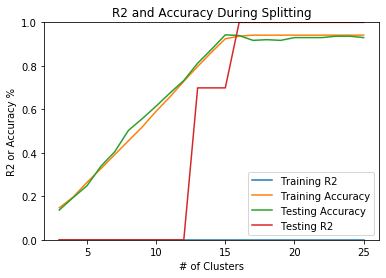

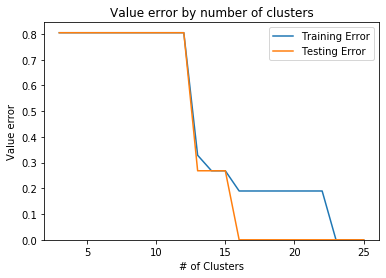

Splitting... |#Clusters:2:   0%|          | 0/23 [00:00<?, ?it/s]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].uniqu

/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:558: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['CLUSTER'] = test_clusters
Splitting... |#Clusters:7:  22%|██▏       | 5/23 [00:07<00:25,  1.42s/it]/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'End' in P_df['NEXT_CLUSTER'].unique():
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Algorithm/testing.py:80: Fut

KeyboardInterrupt: 

In [18]:
# creating new dataset and saving model and policies
ms = []
ps = []
for n in Ns:
    N = n
    df = createSamples(N, T_max, mazes[4], 0.4, reseed=True)
    df.to_csv('N=%i.csv'%n)
    
    m = MDP_model()
    m.fit_CV(df, # df: dataframe in the format ['ID', 'TIME', ...features..., 'RISK', 'ACTION']
        pfeatures, # int: number of features
        h, # int: time horizon (# of actions we want to optimize)
        max_k, # int: number of iterations
        distance_threshold, # clustering diameter for Agglomerative clustering
        cv, # number for cross validation
        th, # splitting threshold
        classification, # classification method
        split_classifier_params, # classification params
        clustering,# clustering method from Agglomerative, KMeans, and Birch
        n_clusters, # number of clusters for KMeans
        random_state,
        plot=True)
    ms.append(m)
    pickle.dump(m, open('model_N=%i.sav'%n, 'wb'))
    
    f, r = get_maze_transition_reward(mazes[4])
    Q, p, x_df = fitted_Q(100, df, 0.98, 2, [0, 1, 2, 3], f, r, True, 'ExtraTrees')
    pickle.dump(p, open('fitted_Q_policy_N=%i.sav'%n, 'wb'))
    ps.append(p)
    print('N=', n, ' completed')

Optimal Value: [2.24354046e-01 1.00000000e+00 8.96000000e-01 8.02400000e-01
 7.18160000e-01 6.42344000e-01 5.74109600e-01 5.12698640e-01
 4.57428776e-01 4.07685899e-01 3.62917309e-01 3.22625578e-01
 2.86363020e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.24354046e-01 2.53726718e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.24354046e-01 0.00000000e+00 1.99256272e-10
 0.00000000e+00]
Optimal Policy: [2 0 1 1 1 2 0 0 0 2 1 1 1 0 0 0 2 1 0 0 0 2 0 0 0]


/Users/janiceyang/Dropbox (MIT)/ORC UROP/Opioids/Maze/maze_functions.py:160: RuntimeWarning: invalid value encountered in true_divide
  ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid")


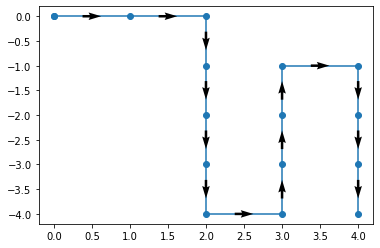

(array([0., 0., 1., 2., 2., 2., 2., 2., 3., 3., 3., 3., 4., 4., 4., 4.]),
 array([-0.,  0.,  0.,  0., -1., -2., -3., -4., -4., -3., -2., -1., -1.,
        -2., -3., -4.]))

In [24]:
opt_model_trajectory(ms[1], mazes[4])

In [27]:
policy_accuracy(ms[1], mazes[4], ms[1].df)

Optimal Value: [7.04370331e-01 7.22826868e-01 7.41660069e-01 8.84704957e-01
 9.06841793e-01 6.51186120e-01 7.04370331e-01 7.60877622e-01
 9.06841793e-01 9.29430401e-01 6.68557266e-01 6.86282924e-01
 7.80487369e-01 8.84704957e-01 9.52480001e-01 7.60877622e-01
 7.80487369e-01 8.00497316e-01 8.63010858e-01 9.76000001e-01
 7.41660069e-01 8.00497316e-01 8.20915628e-01 8.41750641e-01
 1.00000000e+00 9.55885364e-10]
Optimal Policy: [2 2 1 2 1 1 0 1 2 1 2 0 1 0 1 2 1 1 0 1 0 2 2 0 0 0]


0.8308605341246291

In [28]:
fitted_Q_policy_accuracy(p, mazes[4], ms[1].df)

Optimal Value: [7.04370331e-01 7.22826868e-01 7.41660069e-01 8.84704957e-01
 9.06841793e-01 6.51186120e-01 7.04370331e-01 7.60877622e-01
 9.06841793e-01 9.29430401e-01 6.68557266e-01 6.86282924e-01
 7.80487369e-01 8.84704957e-01 9.52480001e-01 7.60877622e-01
 7.80487369e-01 8.00497316e-01 8.63010858e-01 9.76000001e-01
 7.41660069e-01 8.00497316e-01 8.20915628e-01 8.41750641e-01
 1.00000000e+00 9.55885364e-10]
Optimal Policy: [2 2 1 2 1 1 0 1 2 1 2 0 1 0 1 2 1 1 0 1 0 2 2 0 0 0]


0.6958456973293768

In [ ]:
N = 200
df_full = createSamples(N, T_max, mazes[4], 0.4, reseed=True)
df_full.to_csv('N=300.csv')

In [ ]:
Ns = [10, 20, 30, 50, 70, 90, 110, 130, 150, 170, 200]

In [ ]:
# creating new dataset and saving model and policies
ms2 = []
ps2 = []
for n in Ns:
    df = df_full.loc[df_full['ID']<n]
    
    m = MDP_model()
    m.fit_CV(df, # df: dataframe in the format ['ID', 'TIME', ...features..., 'RISK', 'ACTION']
        pfeatures, # int: number of features
        h, # int: time horizon (# of actions we want to optimize)
        max_k, # int: number of iterations
        distance_threshold, # clustering diameter for Agglomerative clustering
        cv, # number for cross validation
        th, # splitting threshold
        classification, # classification method
        split_classifier_params, # classification params
        clustering,# clustering method from Agglomerative, KMeans, and Birch
        n_clusters, # number of clusters for KMeans
        random_state,
        plot=True)
    ms2.append(m)
    pickle.dump(m, open('subset_model_N=%i.sav'%n, 'wb'))
    
    f, r = get_maze_transition_reward(mazes[4])
    Q, p, x_df = fitted_Q(100, df, 0.98, 2, [0, 1, 2, 3], f, r, True, 'ExtraTrees')
    pickle.dump(p, open('subset_fitted_Q_policy_N=%i.sav'%n, 'wb'))
    ps2.append(p)
    print('N=', n, ' completed')